

# GAFA stock prices: Exploratory and predictive analysis 

<img src ='GAFA.jpg'>

Introduction<p>

1. Exploratory data analysis<br>
  1.1. GAFA stock prices 2013-2019<br>
      1.1.1. Data download<br>
      1.1.2. GAFA stock price visualization<br>
      1.1.3. A deeper look: GAFA Daily stock price difference<br>
      1.1.4. Data decomposition<p>
      
  1.2. Stock market Indexes  2013-2019 analysis<br>
      1.2.1. Indexes data download<br>
      1.2.2. Indexes exploratory analysis<br>
      1.2.3. A deeper look: Indexes Daily stock price difference<p>
    
  1.3. GAFA & Indexes stock prices analysis <br>
      1.3.1. Stock prices correlation<br>
      1.3.2. Rolling windows<br>
      1.3.3. Rolling Variance<br>
                
  1.4. GAFA Market Capitalisation 2013-2019<br>
      1.4.1. Data download<br>
      1.4.2. First look at GAFA's market capitalisation<br>
      1.4.3. Correlation<br>
       
  1.5. Data cleaning <br>
  
  1.6. Normalising data & ROI <br>
      1.6.1. Patterns of normalised data<br>
      1.6.2. Return on investments and Market capitalisation growth<br>
    
  1.7. GAFA Web&Mobile users in the world 2013-Q1 2019<br>
      1.7.1. Download and transpose the data<br>
      1.7.2. Exploratory analysis<br>
      1.7.3. Mobile users & Internet users data manipulating<br>
      
      <p>
    
2. Stock prices predictive modelling<br>
  2.1. Features engineering& Data Preprocessing<br>
  
  2.2. KNN<br>
      2.2.1. Google<br>
      2.2.2. Apple<br>
      2.2.3. Facebook<br>
      2.2.4. Amazon<br>
  
  2.3. Logistic regression<br>
      2.3.1. Google<br>
      2.3.2. Apple<br>
      2.3.3. Facebook<br>
      2.3.4. Amazon<br>
  
      
Conclusion


## Introduction

<b>GAFA</b> - four leading world internet companies - <b>Google(Alphabet), Apple, Facebook, Amazon</b> have grown rapidly during several last years and become one of the most expensive companies worldwide.

This project is focused on analysing its stock market performance as well as market capitalisations data. To have a bigger picture of a stock market three main indexes - S&P500, DowJones and NASDAQ - are also analysed. To enlarge the view on GAFA results it is proposed to look at data related to Internet users and mobile users in the world which could be one of the factors ot these companies success.

<b>First part</b> of the project is dedicated to exploratory analysis of stock market prices, indexes, market capitalisation data and Internet&mobile users.

In the <b>second part</b> two predictive models are developped to predict GAFA's stock prices changes.


<b>Data sources:</b><br>
1. Stock information: Daily GAFA stock prices and volume.
2. Stock information: Daily stock Indexes prices and volume.
3. GAFA financial data: Daily Market Capitalisation.
4. Market data: Number of Internet & Mobile users in the world by regions. The succes of these companies is due also to the growth of internet&mobile users, so it seems reasonable to take into account these data.

 



## PART I. Exploratory analysis

In [1]:
# Download all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


### 1.1. GAFA stock prices 2013 - 2019 (January - April) analysis

#### 1.1.1. Data download
- Data source: stock prices data on YahooFinance, data are provided in csv format.
- Period choosen: 6 last years from 2013 till 2018 (full years) plus the beginning of 2019 (January-April) is added to make the analysis more up to date.
- Data are downloaded separately for each company: Google, Apple, Facebook, Amazon.
- From all data provided by Yahoo Finance three most relevant features are kept: Date, Volume, Close ( i. e. close price).
- Column 'Data' is set as dataframe index and converted into datetime type data.
- Features are renamed to facilitate further data manipulating.
- Downloaded data into Pandas DataFrame are checked with head/tail method.


In [2]:
#GAFA stock data download

# Download Google stock prices into Pandas DataFrame

df_G = pd.read_csv('GOOG_daily_2013_2019.csv')
df_G = df_G[['Date', 'Close', 'Volume']].set_index('Date')
df_G.rename(columns={'Close':'Close Google', 'Volume':'Volume Google'}, inplace=True)
df_G.index = pd.to_datetime(df_G.index)
print(df_G.head())
print(df_G.tail())


# Download Apple stock prices into Pandas DataFrame

df_AP = pd.read_csv('AAPL_daily_2013-2019.csv')

df_AP = df_AP[['Date', 'Close', 'Volume']].set_index('Date')
df_AP.rename(columns={'Close':'Close Apple', 'Volume':'Volume Apple'}, inplace=True)
df_AP.index = pd.to_datetime(df_AP.index)
print(df_AP.head())
print(df_AP.tail())


            Close Google  Volume Google
Date                                   
2013-01-02    359.288177        5115500
2013-01-03    359.496826        4666500
2013-01-04    366.600616        5562800
2013-01-07    365.001007        3332900
2013-01-08    364.280701        3373900
            Close Google  Volume Google
Date                                   
2019-04-24   1256.000000        1018800
2019-04-25   1263.449951        1107300
2019-04-26   1272.180054        1241400
2019-04-29   1287.579956        2499400
2019-04-30   1188.479980        6207000
            Close Apple  Volume Apple
Date                                 
2013-01-02    78.432854     140129500
2013-01-03    77.442856      88241300
2013-01-04    75.285713     148583400
2013-01-07    74.842857     121039100
2013-01-08    75.044289     114676800
            Close Apple  Volume Apple
Date                                 
2019-04-24   207.160004      17540600
2019-04-25   205.279999      18543200
2019-04-26   204.30000

In [3]:
# Download  Facebook stock prices into Pandas DataFrame

df_FB = pd.read_csv('FB_daily_2013_2019.csv')
df_FB = df_FB[['Date', 'Close', 'Volume']].set_index('Date')
df_FB.rename(columns={'Close':'Close FB', 'Volume':'Volume FB'}, inplace=True)
df_FB.index = pd.to_datetime(df_FB.index)
print(df_FB.head())
print(df_FB.tail())

# Download Amazon stock prices into Pandas DataFrame

df_AMZ = pd.read_csv('AMZN_daily_2013-2019.csv')
df_AMZ = df_AMZ[['Date', 'Close', 'Volume']].set_index('Date')
df_AMZ.index = pd.to_datetime(df_AMZ.index)
df_AMZ.rename(columns={'Close':'Close Amazon', 'Volume':'Volume Amazon'}, inplace=True)
print(df_AMZ.head())
print(df_AMZ.tail())

             Close FB  Volume FB
Date                            
2013-01-02  28.000000   69846400
2013-01-03  27.770000   63140600
2013-01-04  28.760000   72715400
2013-01-07  29.420000   83781800
2013-01-08  29.059999   45871300
              Close FB  Volume FB
Date                             
2019-04-24  182.580002   37289900
2019-04-25  193.259995   54148800
2019-04-26  191.490005   22075000
2019-04-29  194.779999   19641300
2019-04-30  193.399994   23494700
            Close Amazon  Volume Amazon
Date                                   
2013-01-02    257.309998        3271000
2013-01-03    258.480011        2750900
2013-01-04    259.149994        1874200
2013-01-07    268.459991        4910000
2013-01-08    266.380005        3010700
            Close Amazon  Volume Amazon
Date                                   
2019-04-24   1901.750000        3675800
2019-04-25   1902.250000        6099100
2019-04-26   1950.630005        8432600
2019-04-29   1938.430054        4021300
2019-04-30 

<i>Data are downloaded correctly</i>

#### 1.1.2. GAFA stock price visualization<br>
Let's do first visualisations to get an idea of the data

- Firstly, plot all four companies stock market performance data.
- The order of data is kept following the acronym 'GAFA', it means that order is 
    1. Google
    2. Apple
    3. Facebook
    4. Amazon
- Colors of plotted lines are choosen in accordance to its brand (logo) colors. 


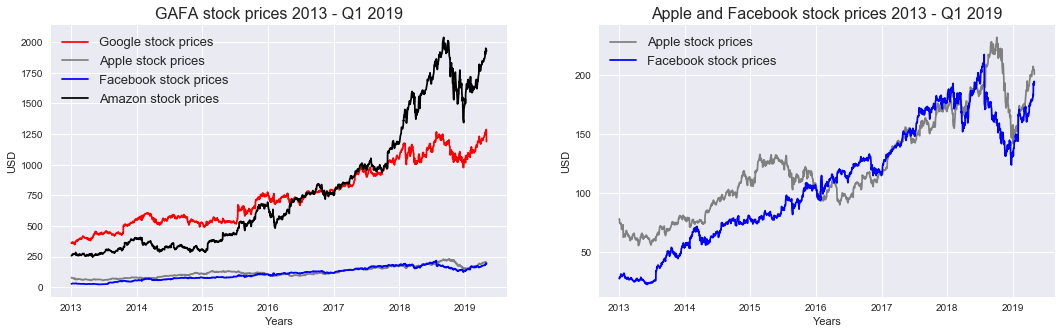

In [4]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.plot(df_G['Close Google'], 'r-', label='Google stock prices')
plt.plot(df_AP['Close Apple'], color='grey',label='Apple stock prices')
plt.plot(df_FB['Close FB'], 'b-', label='Facebook stock prices')
plt.plot(df_AMZ['Close Amazon'], color='black', label='Amazon stock prices')
plt.xlabel('Years')
plt.ylabel('USD')
plt.title('GAFA stock prices 2013 - Q1 2019', fontsize=16)
plt.legend(fontsize=13)



plt.subplot(1,2,2)
plt.plot(df_AP['Close Apple'], color='grey',label='Apple stock prices')
plt.plot(df_FB['Close FB'], 'b-', label='Facebook stock prices')
plt.title('Apple and Facebook stock prices 2013 - Q1 2019', fontsize=16)
plt.ylabel('USD')
plt.xlabel('Years')
plt.legend(fontsize=13)
plt.show()


While all companies performances plotted on one plot (on the left-hand side) we can see that :
1. There is significant difference in absolute values between Amazon&Google from one side and Apple&Facebook from another.<p>
    
2. For Amazon&Google we can see visible growth trend.<p>
    
3. Amazon is priced less than Google from 2013 till mi-2016, then it was at the same level during mi-2016 - Q4 2017. It performed extremely well during the period of Q4 2017 and especially in 2018, overpassed Google significantly. And despite of declining in the end of 2018 (Google was also declining at the same period) its stock prices are the highest of GAFA at the moment.<p>
    
4. Apple&Facebook trend is not very visible on the left-hand side plot that is why they are plotted separately.<p>
    
5. On Apple&Facebook plot we can see visible growth trend as well with declining period for Apple in 2015-2016, and for both of them in second half of 2018.

6. All four companies's stocks were  declining significantly in the end of 2018 but then they were growing in the beginning of 2019.

<i>After first visualisation let's look deeper at the data to find another trends and insights </i>

#### 1.1.3. A deeper look at GAFA stock prices: Daily stock price difference

One possible way to look deeper at stock data is to use shifting (lagging) (i.e. substracting the previous value from current value). Let's do that for GAFA using 'shift' method and plot the results. It shows us the volatility, the peaks and periods of increasing/declining.


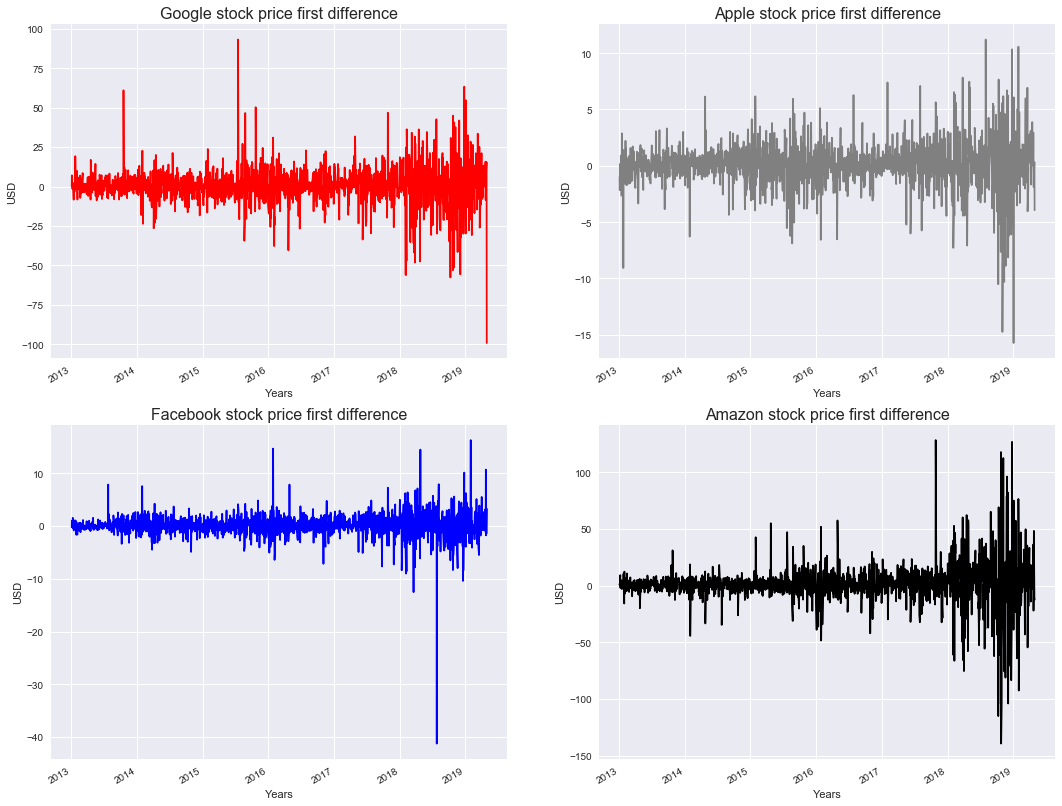

In [5]:
#Visualize GAFA daily stock price difference

plt.figure(figsize=(18,15))

plt.subplot(2,2,1)
diff_G = df_G['Close Google'] - df_G['Close Google'].shift(1) #difference between current value and previous value
diff_G.plot(color = 'red')
plt.title('Google stock price first difference', fontsize=16)
plt.xlabel('Years')
plt.ylabel('USD')

plt.subplot(2,2,2)
diff_AP = df_AP['Close Apple'] - df_AP['Close Apple'].shift(1)
diff_AP.plot(color = 'grey')
plt.title('Apple stock price first difference', fontsize=16)
plt.xlabel('Years')
plt.ylabel('USD')

plt.subplot(2,2,3)
diff_FB = df_FB['Close FB'] - df_FB['Close FB'].shift(1)
diff_FB.plot( color = 'blue')
plt.title('Facebook stock price first difference', fontsize=16)
plt.xlabel('Years')
plt.ylabel('USD')

plt.subplot(2,2,4)
diff_AMZ = df_AMZ['Close Amazon'] - df_AMZ['Close Amazon'].shift(1)
diff_AMZ.plot( color = 'black')
plt.title('Amazon stock price first difference', fontsize=16)
plt.xlabel('Years')
plt.ylabel('USD')

plt.show()

On the plots above we can see that:

Points are centered around 0. Where variance increases a lot it can indicate that the data are exponentially increasing/decreasing<p>

We can see when prices changed significantly (peaks up or down). <br>
For Google: we can see some in 2013, 2015, 2017, 2019 (decrease)   <br>
For Apple:  every year quite many  <br>
For Facebook: in 2013, very begginning of 2014, in the beginning of 2016, another several ones in 2016 and so on. The biggest one  (decrease) is in 2018   <br>
For Amazon: visible peaks in 2014, 2015,2016. Significant one (positive) in the end of 2017   <br>
<p>

Also we can see periods of volatility.<br>
For Google: period of 2018   <br>
For Apple: 2015, end of 2018   <br>
For Facebook:  2018  <br>
For Amazon: 2018, 2019

It would be interesting to look deeply at positive and negative fluctuations during the period and to count total losses and gains. If summarize positive changes and negative changes, it gives us an idea of total amount of losses and total amount of gains.  In other words, if we invest, how much money would be 'lost', 'gain' and what is the profit.


In [6]:
#function

def trends(df):

    positive = []
    negative = []
    
    for i in df:
        if i>0:
            positive.append(i) 
        else: 
            negative.append(i)
    positive_trend = np.array(positive)
    negative_trend = np.array(negative[1:])
    print(np.sum(positive_trend), np.sum(negative_trend))
    

google_trends = trends(diff_G)
apple_trends = trends(diff_AP)
facebook_trends = trends(diff_FB)
amazon_trends = trends(diff_AMZ)


# create DataFrame with summarised fluctuations
# "Absolute stock price change" row shows absolute price increase per stock 

df_trends = pd.DataFrame({'Google':[6437.719953999998, -5608.528150999999], 'Apple':[1135.7357269999998, -1013.4985829999998],\
                        'Facebook':[1181.6600600000004, -1016.2600660000002], 'Amazon':[8895.879179, -7226.669156999999]}, \
                         index=['Positive', 'Negative'])

df_trends.loc['Absolute stock price change']= df_trends.sum()
df_trends


6437.719953999998 -5608.528150999999
1135.7357269999998 -1013.4985829999998
1181.6600600000004 -1016.2600660000002
8895.879179 -7226.669156999999


Amazon        Apple     Facebook  \
Positive                     8895.879179  1135.735727  1181.660060   
Negative                    -7226.669157 -1013.498583 -1016.260066   
Absolute stock price change  1669.210022   122.237144   165.399994   

                                  Google  
Positive                     6437.719954  
Negative                    -5608.528151  
Absolute stock price change   829.191803

To inderstand better this result it is reasonable to plot it

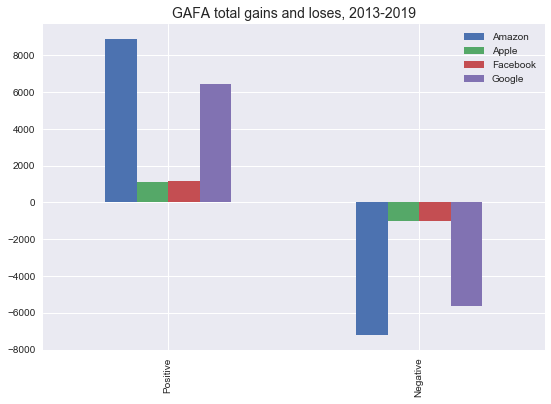

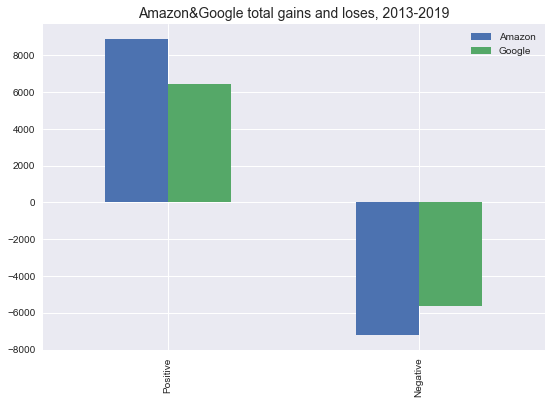

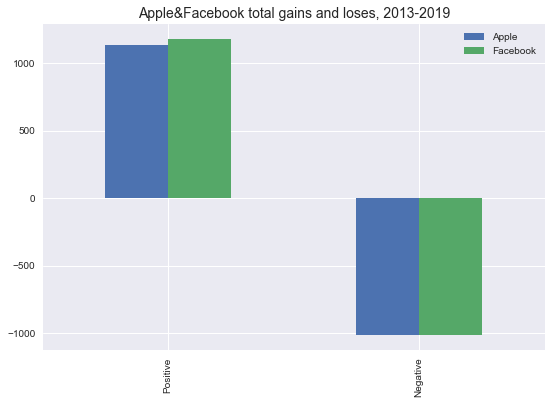

In [7]:
df_trends.loc[['Positive','Negative']].plot.bar(figsize=(9,6)).\
                                       set_title('GAFA total gains and loses, 2013-2019', fontsize=14);

df_trends.loc[['Positive','Negative'], ['Amazon', 'Google']].plot.bar(figsize=(9,6)).\
                                       set_title('Amazon&Google total gains and loses, 2013-2019', fontsize=14);

df_trends.loc[['Positive','Negative'], ['Apple', 'Facebook']].plot.bar(figsize=(9,6)).\
                                       set_title('Apple&Facebook total gains and loses, 2013-2019', fontsize=14);


Based on the plots above it can be concluded that:
- Total volume of gains/losses is very different between Amazon&Google from one side and Apple&Facebook on the other.
- To visualize better Apple&Facebook data they are plotted separately.
- It is visible that Amazon's stock price has grown more than Google's and
- Facebook's has grown more than Apple's

Let's visualize absolute stock prices changes

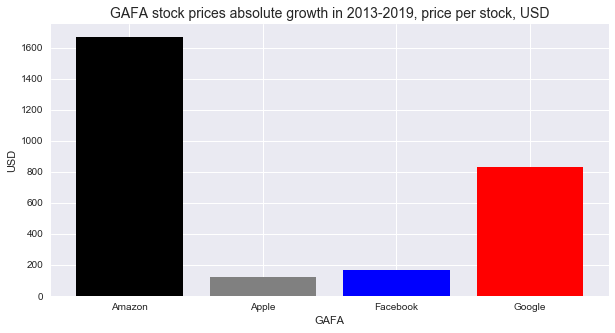

In [8]:
x_cor= np.arange(4)
GAFA = ['Amazon','Apple','Facebook','Google']
plt.figure(figsize=(10,5))
plt.bar(x_cor, df_trends.loc['Absolute stock price change'], color = ['black', 'grey', 'blue', 'red'] ) 
plt.xticks(x_cor, GAFA)
plt.ylabel('USD')
plt.xlabel('GAFA')
plt.title('GAFA stock prices absolute growth in 2013-2019, price per stock, USD', fontsize=14)
plt.show()

Amazon is the absolute leader, its stocks are 1 669 USD more expensive now comparing to 01-01-2013. For Google the difference is 829 USD. For Facebook: 165 USD and for Apple 122 USD. 

#### 1.1.4. Data decomposition
Let's look if there are seasonal or other trends in stock prices data.
As we've seen there is visible positive trend for all four companies. Let's decompose it to find out what trends could be there.

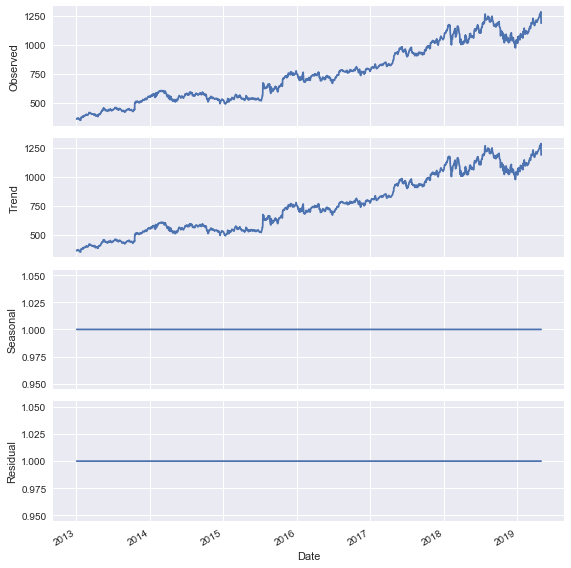

In [9]:
#Data Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8


#Let's start with Google
series = df_G['Close Google']
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
plt.show()



From the plot above on Google stock prices, it can be concluded that there is no seasonal component in data, we can see only trend presented.<p>
What for others companies?

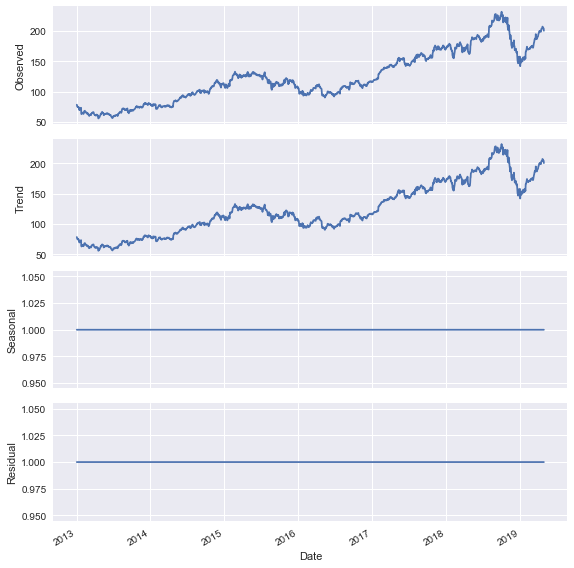

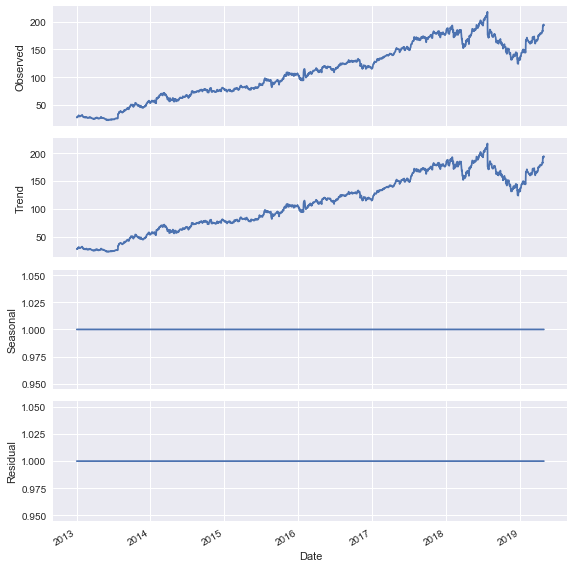

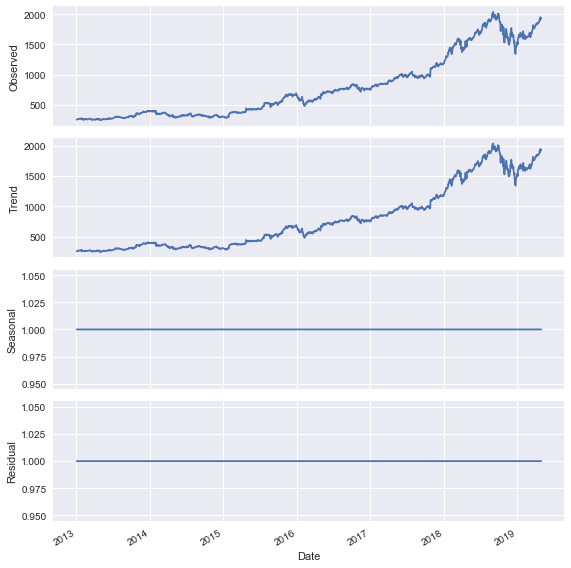

In [10]:
#Apple Data decomposition
series = df_AP['Close Apple']
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
plt.show()

#Facebook Data decomposition
series = df_FB['Close FB']
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
plt.show()

#Amazon Data decomposition
series = df_AMZ['Close Amazon']
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
plt.show()

For all other companies as demostrated above pattern in the same: there is no seasonal component, however trend is clearly visualised.<p>
After first exploratory analysis the following conclusions can be done:
- Threr is a clear trend for growth for all four companies. 
- There is a lot of volatility in the data 
- Some periods of volatility are the same for all companies
- Despite of a lot of period of losses all companies's stocks have been in positive trend, the biggest absolute growth is for Amazon's stocks, the most modest one is for Apple.
- There is no seasonal trend in GAFA's stocks, the volatilty is due to many other reasons but not to a seasonal component.
   


<i>Let's continue further analysis with widening stock market view and looking at main stock market Indexes, their performance during the same period</i><p>



### 1.2. Stock market Indexes  2013 - 2019 (January - April) analysis

To get a wider vision on stock market it seems to be reasonable to look at stock market indexes performance which reflect general stock market situation and trends. Next steps will be aimed to:
- look at stock market indexes performance during the same period,
- analise its trends 
- compare its performance with GAFA's one

As indexes for analysis  three main indexes were choosen: <b>S&P 500</b>, <b>Dow Jones</b> and <b>NASDAQ</b>*<br>

<i><font, size=2> <b>*S&P 500</b> - The S&P 500 stock market index comprises stocks issued by 500 large-cap companies and traded on American stock exchanges (including the 30 companies that comprise the Dow Jones Industrial Average), and covers about 80% of the American equity market by capitalization. The index has traditionally been capitalization-weighted; that is, movements in the prices of stocks with higher market capitalizations (the share price times the number of shares outstanding) had a greater impact on the value of the index than do companies with smaller market caps. The companies in the S&P 500 are selected so they are representative of the industries in the United States economy. It is one of the most commonly followed equity indices, and many consider it one of the best representations of the U.S. stock market.
(Source: Wikipedia, https://en.wikipedia.org/wiki/S%26P_500_Index)
    
<b>*Dow Jones</b> - The Dow Jones Industrial Average (DJIA) is a stock market index that indicates the value of 30 large, publicly owned companies based in the United States, and how they have traded in the stock market during various periods of time.[4] These 30 companies are also included in the S&P 500 Index. The value of the Dow is not a weighted arithmetic mean[5] and does not represent its component companies' market capitalization, but rather the sum of the price of one share of stock for each component company. The sum is corrected by a factor which changes whenever one of the component stocks has a stock split or stock dividend, so as to generate a consistent value for the index.
(Source: Wikipedia, https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average)

<b>*NASDAQ</b> - The NASDAQ Composite is a stock market index of the common stocks and similar securities (e.g. ADRs, tracking stocks, limited partnership interests) listed on the NASDAQ stock market. Along with the Dow Jones Average and S&P 500 it is one of the three most-followed indices in US stock markets. The composition of the NASDAQ Composite is heavily weighted towards information technology companies.
(Source: Wikipedia,https://en.wikipedia.org/wiki/NASDAQ_Composite) </i></font>


#### 1.2.1.  Indexes data download

- Data source: YahooFinance, same source as for GAFA stock prices, data are provided in csv format.
- Period choosen: 6 last years from 2013 till 2018 (full years) plus the beginning of 2019 (January-April) is added to make the analysis as more up to date.
- Data are downloaded separately for each index: S&P 500, DowJones, NASDAQ.
- From all data provided by Yahoo Finance three most relevant features are kept: Date, Volume, Close ( i. e. close price).
- Column 'Data' is set as dataframe index and converted into datetime type.
- Features are renamed to facilitate further data manipulating.
- Downloaded data into Pandas DataFrame are checked with head/tail method.



In [11]:
# S&P 500 index

df_SP = pd.read_csv('GSPC_daily_2013-2019.csv')
df_SP.head()
df_SP = df_SP[['Date', 'Close', 'Volume']].set_index('Date')
df_SP.rename(columns={'Close':'Close S&P 500', 'Volume':'Volume S&P500'}, inplace=True)
df_SP.index = pd.to_datetime(df_SP.index)
print(df_SP.head())
print(df_SP.tail())


# Dow Jones Index

df_DJ = pd.read_csv('DJI_2013_2019.csv')
df_DJ = df_DJ[['Date', 'Close', 'Volume']].set_index('Date')
df_DJ.rename(columns={'Close':'Close DJ', 'Volume':'Volume DJ'}, inplace=True)
df_DJ.index = pd.to_datetime(df_DJ.index)
print(df_DJ.head())
print(df_DJ.tail())


#Nasdaq index

df_ND = pd.read_csv('IXIC_daily_2013-2019.csv')
df_ND = df_ND[['Date', 'Close', 'Volume']].set_index('Date')
df_ND.rename(columns={'Close':'Close ND', 'Volume':'Volume ND'}, inplace=True)
df_ND.index = pd.to_datetime(df_ND.index)
print(df_ND.head())
print(df_ND.tail())


            Close S&P 500  Volume S&P500
Date                                    
2013-01-02    1462.420044     4202600000
2013-01-03    1459.369995     3829730000
2013-01-04    1466.469971     3424290000
2013-01-07    1461.890015     3304970000
2013-01-08    1457.150024     3601600000
            Close S&P 500  Volume S&P500
Date                                    
2019-04-24    2927.250000     3448960000
2019-04-25    2926.169922     3425280000
2019-04-26    2939.879883     3248500000
2019-04-29    2943.030029     3118780000
2019-04-30    2945.830078     3919330000
                Close DJ  Volume DJ
Date                               
2013-01-02  13412.549805  161430000
2013-01-03  13391.360352  129630000
2013-01-04  13435.209961  107590000
2013-01-07  13384.290039  113120000
2013-01-08  13328.849609  129570000
                Close DJ  Volume DJ
Date                               
2019-04-24  26597.050781  283370000
2019-04-25  26462.080078  296730000
2019-04-26  26543.330078  3172

<i>Data are downloaded correctly, let's continue with its exploratory analysis</i>

#### 1.2.2. Indexes  exploratory analysis

Let's visualise indexes data and plot its performance

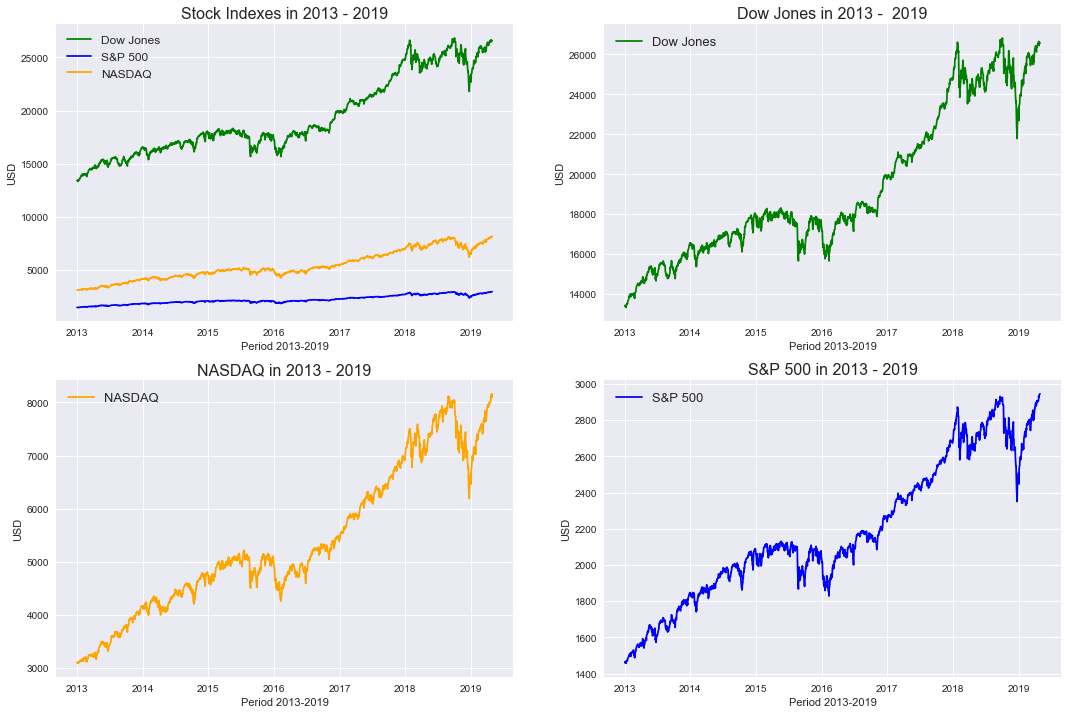

In [12]:
#Stock prices visualisation 

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.plot(df_DJ['Close DJ'], color = 'green', label = 'Dow Jones')
plt.plot(df_SP['Close S&P 500'], label = 'S&P 500', color = 'blue')
plt.plot(df_ND['Close ND'], color = 'orange', label = 'NASDAQ') 
plt.xlabel('Period 2013-2019')
plt.ylabel('USD')
plt.title('Stock Indexes in 2013 - 2019', fontsize=16)
plt.legend(fontsize=12)

plt.subplot(2,2,2)
plt.plot(df_DJ['Close DJ'], color = 'green', label = 'Dow Jones') 
plt.xlabel('Period 2013-2019')
plt.ylabel('USD')
plt.legend(fontsize=13)
plt.title('Dow Jones in 2013 -  2019', fontsize=16)

plt.subplot(2,2,3)
plt.plot(df_ND['Close ND'], color = 'orange', label = 'NASDAQ')  
plt.xlabel('Period 2013-2019')
plt.ylabel('USD')
plt.legend(fontsize=13)
plt.title('NASDAQ in 2013 - 2019', fontsize=16)

plt.subplot(2,2,4)
plt.plot(df_SP['Close S&P 500'], label = 'S&P 500', color = 'blue')
plt.xlabel('Period 2013-2019')
plt.ylabel('USD')
plt.title('S&P 500 in 2013 - 2019', fontsize=16)
plt.legend(fontsize=13)
plt.show()


1. At the first plot (up, left-hand side) we can see all three indexes data, its absolute values vary significantly. Hence, to visualise better each one of them, they are plotted separtely.<p>

2. While absolute value of indexes is different, we can see that pattern is seemed to be very similar.<p>

3. General data trend is growing, with some periods of decline.




#### 1.2.3. A deeper look at Indexes stock prices: Daily stock price difference

As it was done for GAFA stock prices,  indexes stock prices can be analysed in the same way, using shifting (lagging) with 'shift' method and  the results plotted.

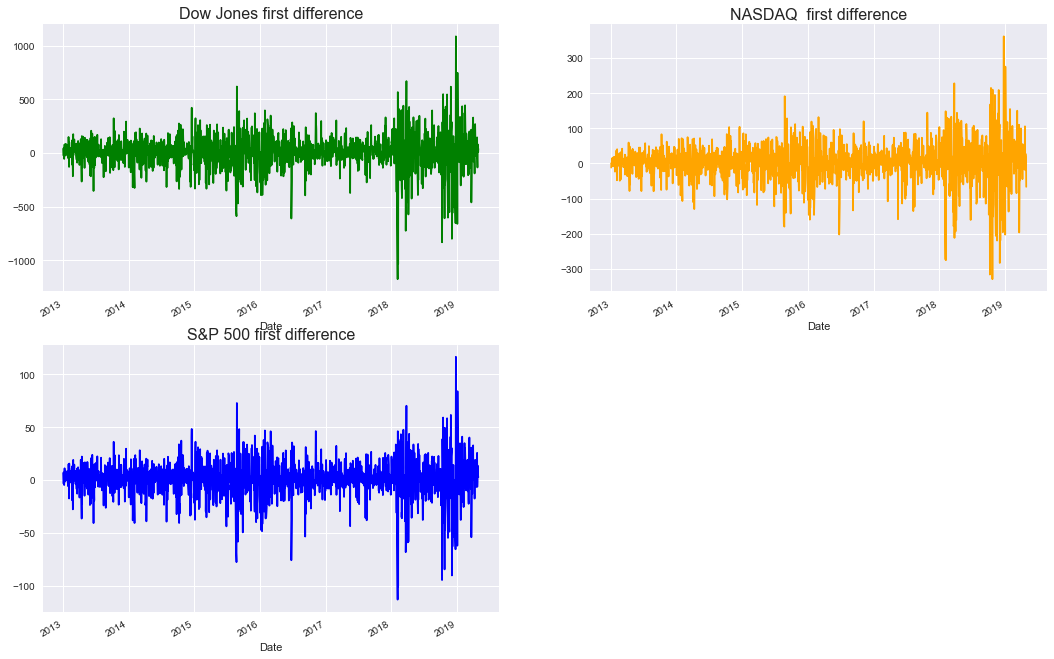

In [13]:
#Visualize Indexes daily stock price difference

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
diff_DJ = df_DJ['Close DJ'] - df_DJ['Close DJ'].shift(1) #difference between currant value and previous value
diff_DJ.plot(color = 'green')
plt.title('Dow Jones first difference', fontsize=16)

plt.subplot(2,2,2)
diff_ND = df_ND['Close ND'] - df_ND['Close ND'].shift(1)
diff_ND.plot(color = 'orange')
plt.title('NASDAQ  first difference', fontsize=16)

plt.subplot(2,2,3)
diff_SP = df_SP['Close S&P 500'] - df_SP['Close S&P 500'].shift(1)
diff_SP.plot(color = 'blue' )
plt.title('S&P 500 first difference', fontsize=16)


plt.show()

1. Here again we can see that idexes have quite similar behavoir
2. Peaks moment are pretty much the same for all three of indexes as well as periods of volatility.


We can see that index data while differ in absolute values are characterised by pretty similar patterns, however GAFA data paterns vary significantly between them. The common point is that all stock prices we've seen have very clear growth trend despite some preiodes of decline.

Now it would be interesting to look at absolute growth, as it has been seen for GAFA, i.e. difference between stock prices on 01.01.2013 and 30.04.2019. 


DowJones: 13412.549805 26592.910156
NASDAQ: 3112.26001 8095.390137
S&P 500: 1462.420044 2945.830078
Dow Jones absolute growth: 13180.360351000001
NASDAQ absolute growth: 4983.130127
S&P 500 absolute growth: 1483.410034


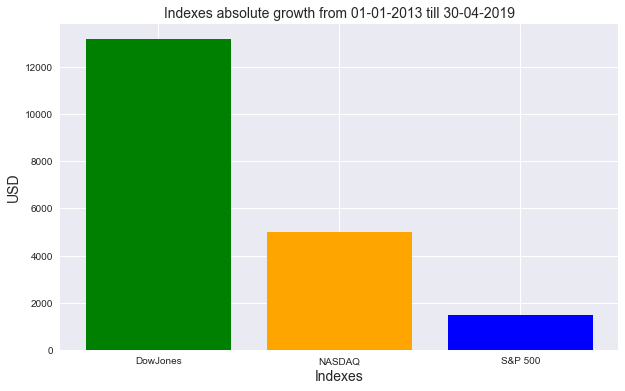

In [14]:
# Values on 01.01.2013 and 30.04.2019

print('DowJones:', df_DJ['Close DJ'][0], df_DJ['Close DJ'][-1])
print('NASDAQ:', df_ND['Close ND'][0], df_ND['Close ND'][-1])
print('S&P 500:', df_SP['Close S&P 500'][0], df_SP['Close S&P 500'][-1])


# Difference (absolute price growth)

DowJones = df_DJ['Close DJ'][-1] - df_DJ['Close DJ'][0]
print('Dow Jones absolute growth:', DowJones)

NASDAQ = df_ND['Close ND'][-1] - df_ND['Close ND'][0]
print('NASDAQ absolute growth:', NASDAQ)

S_P_500 = df_SP['Close S&P 500'][-1] - df_SP['Close S&P 500'][0]
print('S&P 500 absolute growth:', S_P_500)

plt.figure(figsize=(10,6))
plt.bar(np.arange(3), [DowJones, NASDAQ, S_P_500], color=['green', 'orange', 'blue'])
plt.title('Indexes absolute growth from 01-01-2013 till 30-04-2019', fontsize=14)
plt.xticks(np.arange(3), ['DowJones', 'NASDAQ', 'S&P 500'])
plt.ylabel('USD', fontsize=14)
plt.xlabel('Indexes', fontsize=14)
plt.show()

As visualised on the plot, Dow Jones Index has maximum absolute growth at about 13 000 USD/stock, NASDAQ - at about 5 000 USD, and S&P 500 - at about 1500 USD. But what about ROI (return on investment)? What stocks are more profitable form that point of view? It will be analysed further, in comparison with GAFA's ROI. 
<p>
Now let's see at GAFA and indexes stock prices together to know more if and how they are related to each other.

### 1.3 GAFA & Indexes Stock prices analysis 

To begin this analysis let's concatenate GAFA and Indexes DataFrames.

In [15]:
#Concatenate data frames in one

df = pd.concat([df_G, df_AP,  df_FB, df_AMZ, df_SP, df_DJ, df_ND], axis=1)
df.index = pd.to_datetime(df.index)
print(df.shape)
df.head()


(1592, 14)


Close Google  Volume Google  Close Apple  Volume Apple   Close FB  \
Date                                                                            
2013-01-02    359.288177        5115500    78.432854     140129500  28.000000   
2013-01-03    359.496826        4666500    77.442856      88241300  27.770000   
2013-01-04    366.600616        5562800    75.285713     148583400  28.760000   
2013-01-07    365.001007        3332900    74.842857     121039100  29.420000   
2013-01-08    364.280701        3373900    75.044289     114676800  29.059999   

            Volume FB  Close Amazon  Volume Amazon  Close S&P 500  \
Date                                                                
2013-01-02   69846400    257.309998        3271000    1462.420044   
2013-01-03   63140600    258.480011        2750900    1459.369995   
2013-01-04   72715400    259.149994        1874200    1466.469971   
2013-01-07   83781800    268.459991        4910000    1461.890015   
2013-01-08   45871300    266.380005        3010700    1457.150024   

            Volume S&P500      Close DJ  Volume DJ     Close ND   Volume ND  
Date                                                                         
2013-01-02     4202600000  13412.549805  161430000  3112.260010  2111300000  
2013-01-03     3829730000  13391.360352  129630000  3100.570068  1769420000  
2013-01-04     3424290000  13435.209961  107590000  3101.659912  1745140000  
2013-01-07     3304970000  13384.290039  113120000  3098.810059  1702540000  
2013-01-08     3601600000  13328.849609  129570000  3091.810059  1744380000

Now we've got Pandas DataFrame with close prices and volume prices of GAFA and three stock indexes (S&P 500, DowJones and Nasdaq).

Let's see how they are correlated

#### 1.3.1. Stock prices correlation

To compute stock prices correlation only close data are kept. 

In [16]:
# Create data frame for close price data for GAFA and Indexes

df_close = pd.concat([df_G['Close Google'], df_AP['Close Apple'], df_FB['Close FB'], df_AMZ['Close Amazon'], df_SP['Close S&P 500'], df_DJ['Close DJ'], df_ND['Close ND']], axis=1)
df_close.head()

Close Google  Close Apple   Close FB  Close Amazon  Close S&P 500  \
Date                                                                            
2013-01-02    359.288177    78.432854  28.000000    257.309998    1462.420044   
2013-01-03    359.496826    77.442856  27.770000    258.480011    1459.369995   
2013-01-04    366.600616    75.285713  28.760000    259.149994    1466.469971   
2013-01-07    365.001007    74.842857  29.420000    268.459991    1461.890015   
2013-01-08    364.280701    75.044289  29.059999    266.380005    1457.150024   

                Close DJ     Close ND  
Date                                   
2013-01-02  13412.549805  3112.260010  
2013-01-03  13391.360352  3100.570068  
2013-01-04  13435.209961  3101.659912  
2013-01-07  13384.290039  3098.810059  
2013-01-08  13328.849609  3091.810059

First, let's compute raw prices correlation and visualize it

Close Google  Close Apple  Close FB  Close Amazon  \
Close Google       1.000000     0.918166  0.956163      0.964089   
Close Apple        0.918166     1.000000  0.896824      0.914750   
Close FB           0.956163     0.896824  1.000000      0.880220   
Close Amazon       0.964089     0.914750  0.880220      1.000000   
Close S&P 500      0.964661     0.968071  0.947224      0.935301   
Close DJ           0.962045     0.957396  0.917001      0.953788   
Close ND           0.972723     0.973662  0.946314      0.954722   

               Close S&P 500  Close DJ  Close ND  
Close Google        0.964661  0.962045  0.972723  
Close Apple         0.968071  0.957396  0.973662  
Close FB            0.947224  0.917001  0.946314  
Close Amazon        0.935301  0.953788  0.954722  
Close S&P 500       1.000000  0.987862  0.995658  
Close DJ            0.987862  1.000000  0.987590  
Close ND            0.995658  0.987590  1.000000

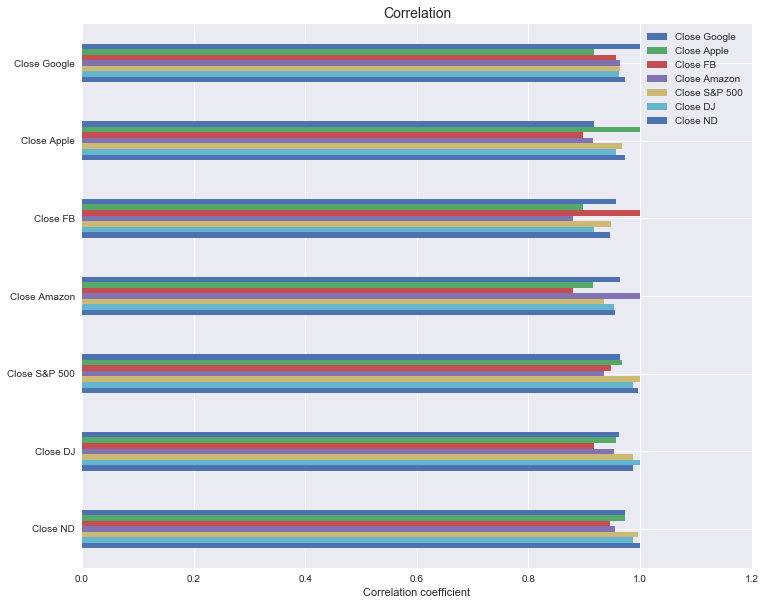

In [17]:
#Computing correlation

corr_plt = df_close.corr().plot.barh(figsize=(12,10))
corr_plt.set(xlim=(0,1.2))
corr_plt.set_title('Correlation', fontsize=14)
corr_plt.set_xlabel('Correlation coefficient')
corr_plt.invert_yaxis();
corr = df_close.corr()
corr

We can see that raw stock prices of GAFA and Indexes are strongly corellated. Correlation coefficient varies between 0.88 - 0.99 which could mean that periods of growth or decline are supposed to be similar.


For better understanding of correlation let's plot its data using heat map. It allows us to see better which stocks are correlated with the highest scores.

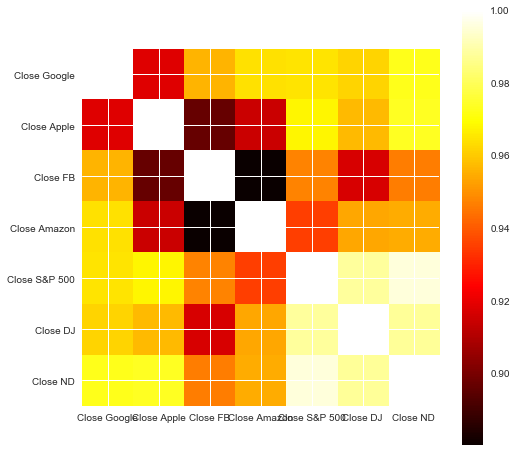

In [18]:
plt.imshow(corr, cmap='hot')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

Based on the plot above we can see that highest correlation is for Indexes.
Also Nasdaq index is highly correlated with Google & Apple, and S&P500 with Apple.
The lowest correlation here is between Facebook&Amazon and Apple&Facebook. But still these coefficients are quite high: 0.88 and 0.89

To extend correlation analysis let's look as well at the  <b>correlation of percent change<b>

In [19]:
pers_close = df_close.pct_change()
pers_close = pers_close[1:] #drop first row in data set with NA values
corr2 = pers_close.corr()
corr2

Close Google  Close Apple  Close FB  Close Amazon  \
Close Google       1.000000     0.417540  0.487478      0.590885   
Close Apple        0.417540     1.000000  0.329104      0.363710   
Close FB           0.487478     0.329104  1.000000      0.465260   
Close Amazon       0.590885     0.363710  0.465260      1.000000   
Close S&P 500      0.644561     0.560911  0.469424      0.572756   
Close DJ           0.581064     0.523573  0.396478      0.509009   
Close ND           0.720293     0.641761  0.566409      0.660934   

               Close S&P 500  Close DJ  Close ND  
Close Google        0.644561  0.581064  0.720293  
Close Apple         0.560911  0.523573  0.641761  
Close FB            0.469424  0.396478  0.566409  
Close Amazon        0.572756  0.509009  0.660934  
Close S&P 500       1.000000  0.965409  0.943427  
Close DJ            0.965409  1.000000  0.870468  
Close ND            0.943427  0.870468  1.000000

Just at a first look we can see that correlation is not so high. Let's plot it with heat map

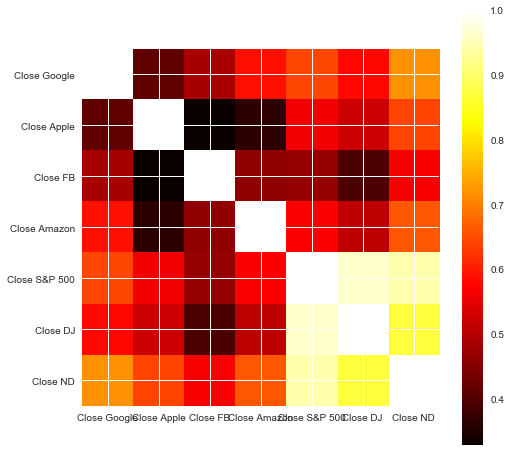

In [20]:
plt.imshow(corr2, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr2)), corr.columns)
plt.yticks(range(len(corr2)), corr.columns);

In fact, this plot is quite different from the previous one. Correlation coefficients are significantly lower. However, what we can see here that the pattern is pretty the same: Indexes are highly correlated as we saw on the previous plot, as well as NASDAQ with Google and Apple.


Let's visualize both correlations in pairplots.
Raw stock prices correlation:

C:\Users\User1\Anaconda3\envs\exts-aml2\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


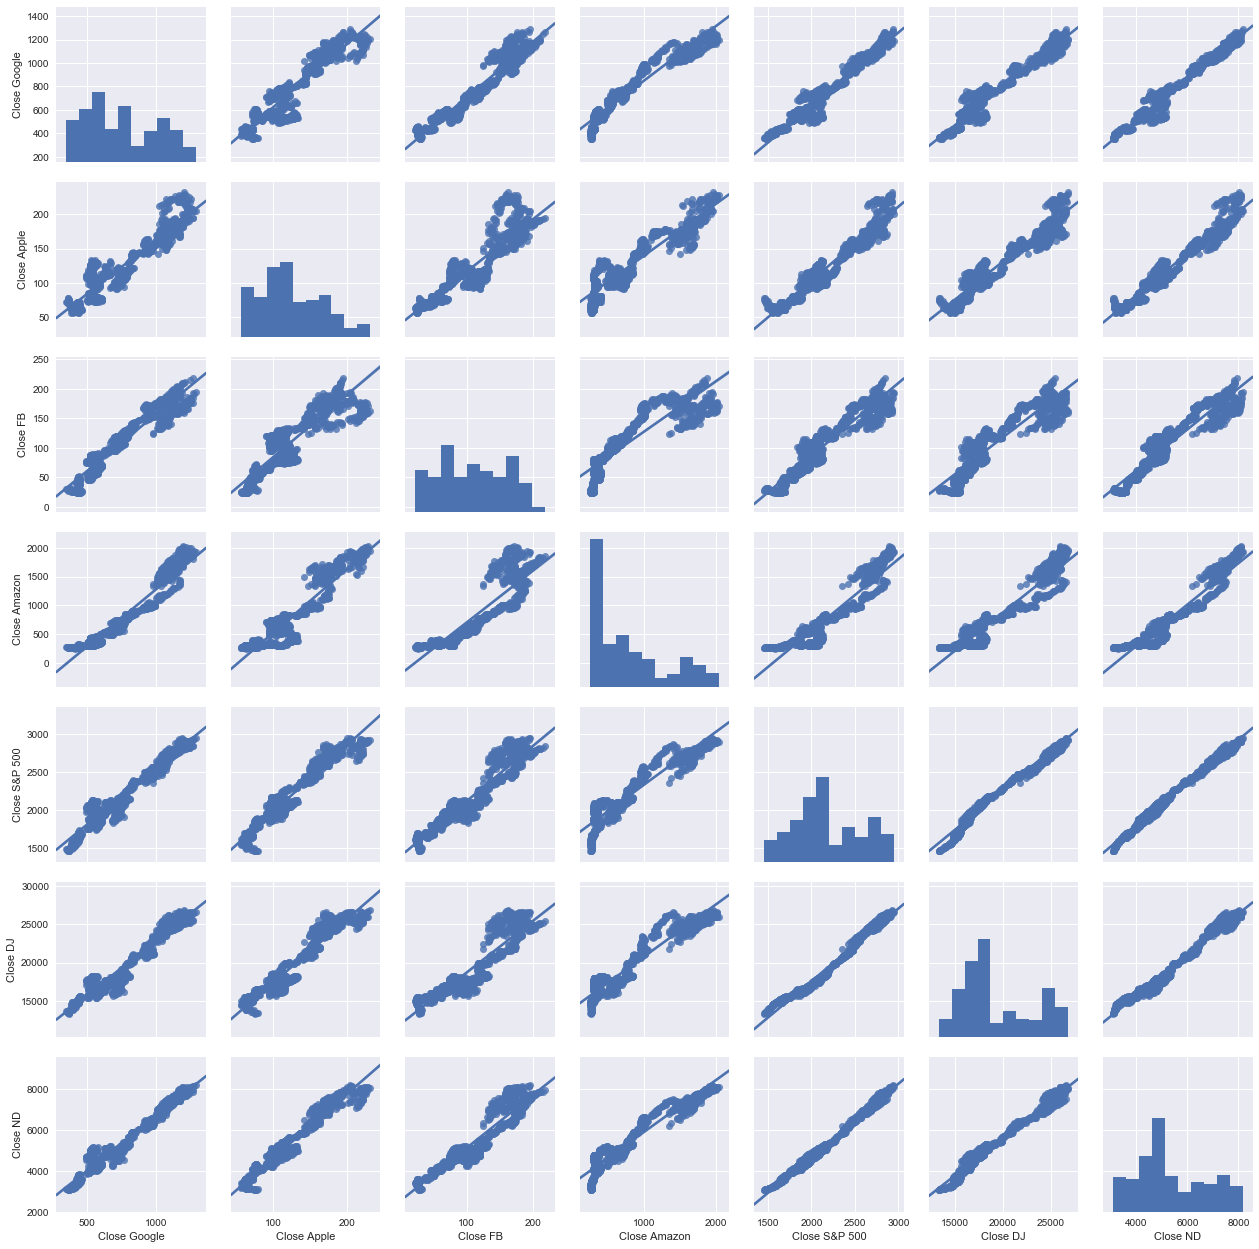

In [21]:
sns.pairplot(df_close, kind='reg');

Percent change correlation

C:\Users\User1\Anaconda3\envs\exts-aml2\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


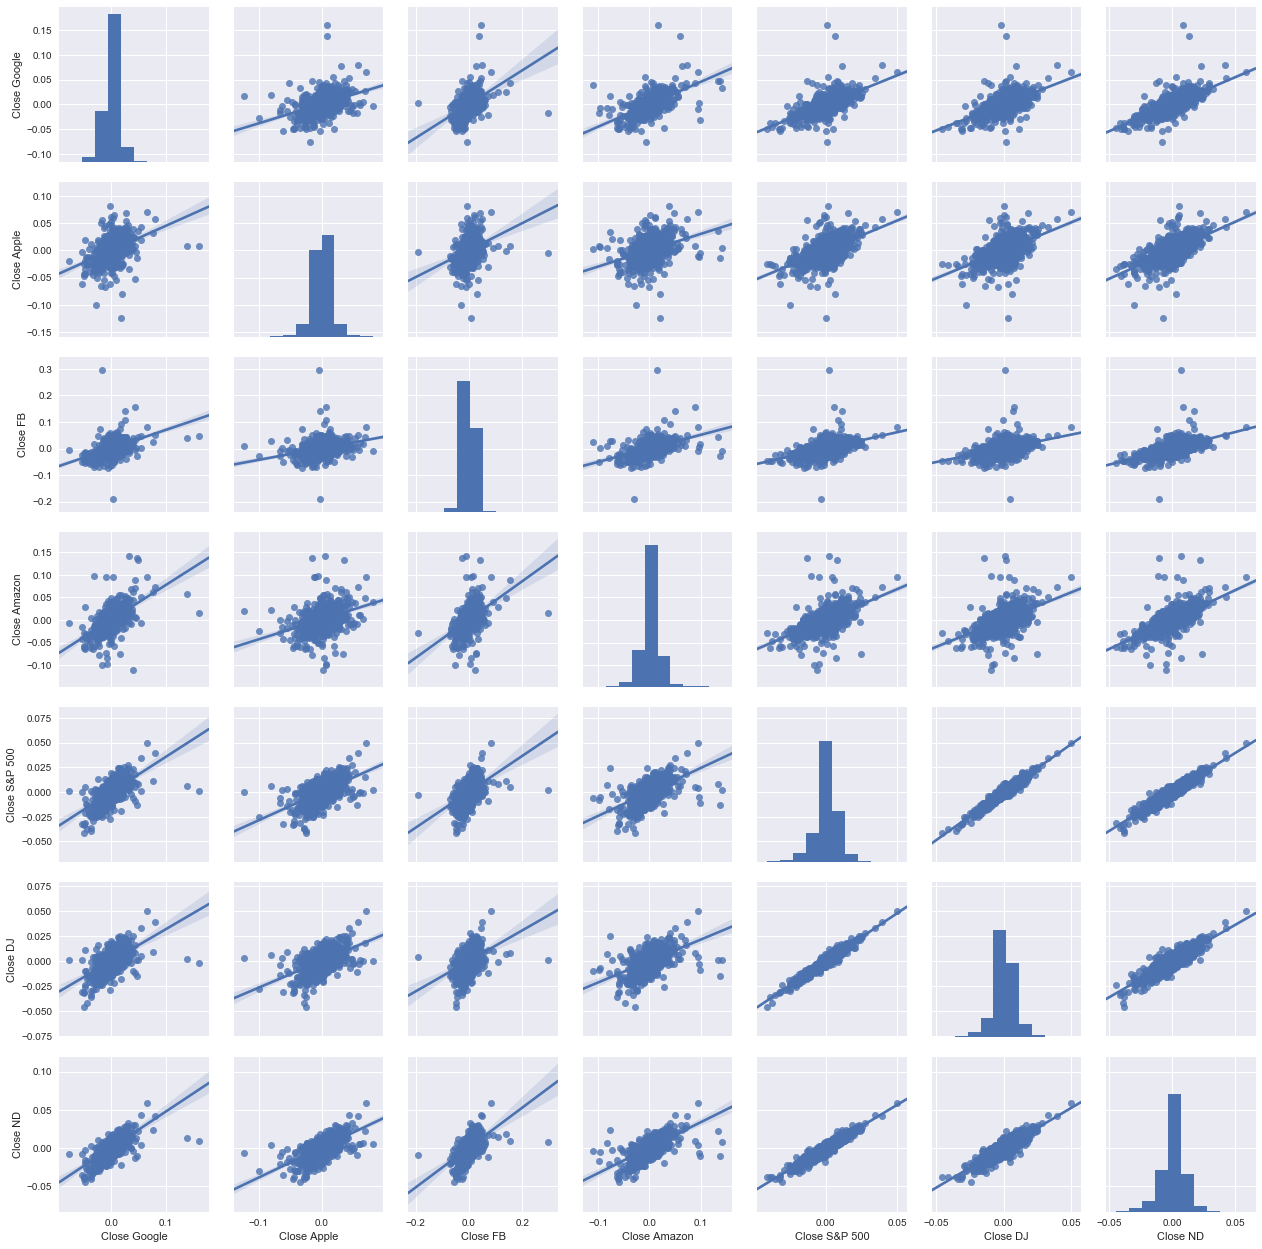

In [22]:
sns.pairplot(pers_close, kind='reg');

On this plot data are distrubuted differently, more concentrated than on the previous pairplot, which obviously affects correlation. But with the exception of indexes data, which keep very similar pattern as on previous plot and as we've seen above are still highly correlated.

To move forward our analysis let's look now at rolling data

#### 1.3.2 Rolling windows

To plan investments or just for analysis purposes it could be necessary to define favorable periods to invest. Usually periods of decline are favorable to buy and period of increase - to sell. To define more clear increasing/decreasing trends, rolling method can be used.

Let's apply it to the original data as well as to logarithmically transformed data.

In [23]:
df_close.head().round(2)

Close Google  Close Apple  Close FB  Close Amazon  Close S&P 500  \
Date                                                                           
2013-01-02        359.29        78.43     28.00        257.31        1462.42   
2013-01-03        359.50        77.44     27.77        258.48        1459.37   
2013-01-04        366.60        75.29     28.76        259.15        1466.47   
2013-01-07        365.00        74.84     29.42        268.46        1461.89   
2013-01-08        364.28        75.04     29.06        266.38        1457.15   

            Close DJ  Close ND  
Date                            
2013-01-02  13412.55   3112.26  
2013-01-03  13391.36   3100.57  
2013-01-04  13435.21   3101.66  
2013-01-07  13384.29   3098.81  
2013-01-08  13328.85   3091.81

In [24]:
# logarithmic transformation of close stock prices

df_close_log = df_close.apply(np.log).round(2)
df_close_log.head()

Close Google  Close Apple  Close FB  Close Amazon  Close S&P 500  \
Date                                                                           
2013-01-02          5.88         4.36      3.33          5.55           7.29   
2013-01-03          5.88         4.35      3.32          5.55           7.29   
2013-01-04          5.90         4.32      3.36          5.56           7.29   
2013-01-07          5.90         4.32      3.38          5.59           7.29   
2013-01-08          5.90         4.32      3.37          5.58           7.28   

            Close DJ  Close ND  
Date                            
2013-01-02      9.50      8.04  
2013-01-03      9.50      8.04  
2013-01-04      9.51      8.04  
2013-01-07      9.50      8.04  
2013-01-08      9.50      8.04

Let's  try different rolling  windows and begin with weekly window. 

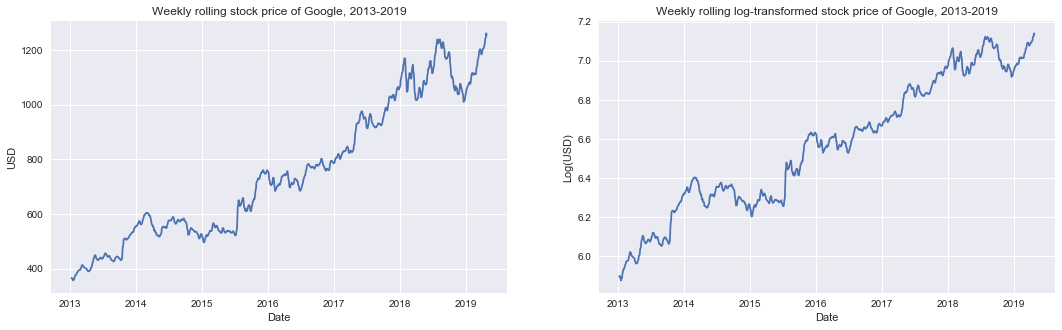

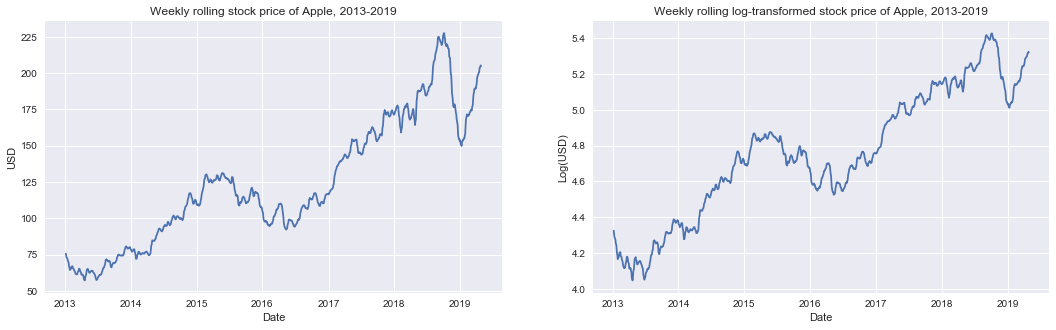

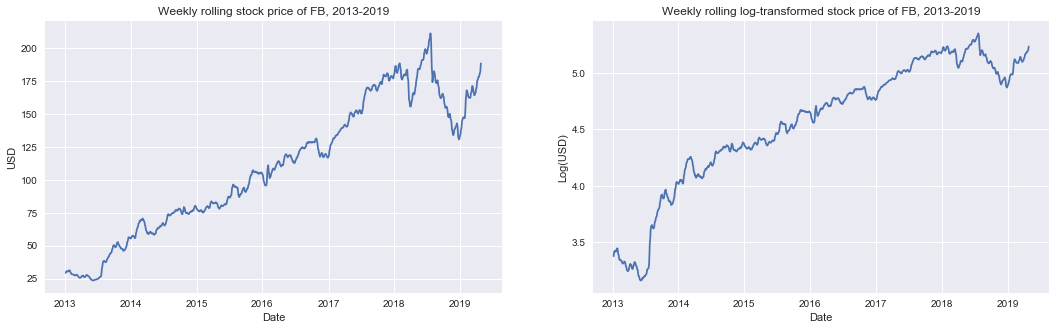

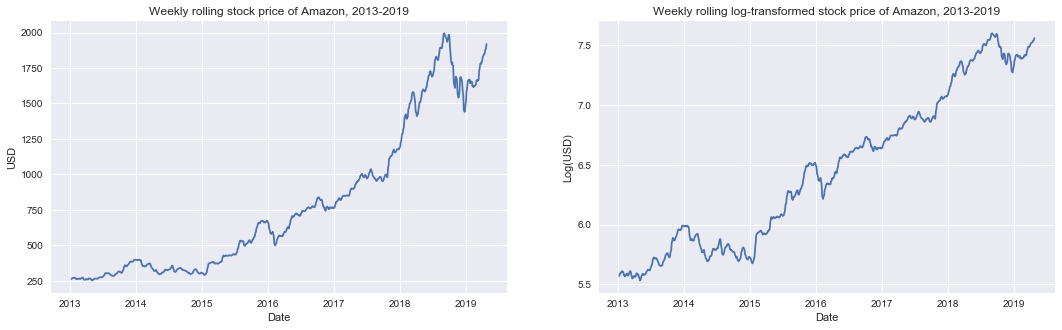

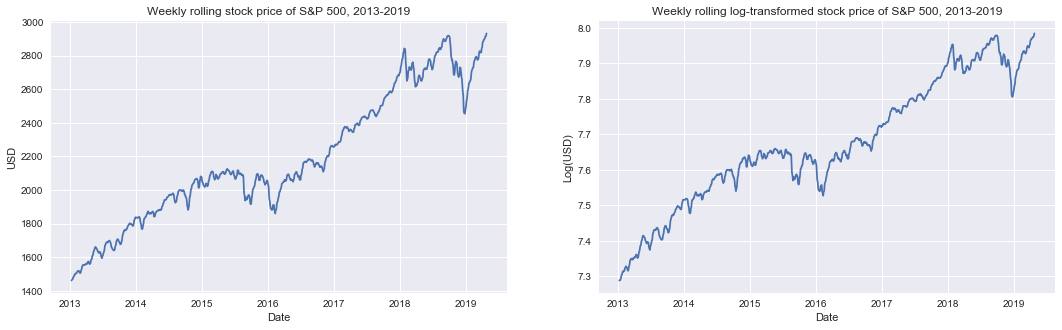

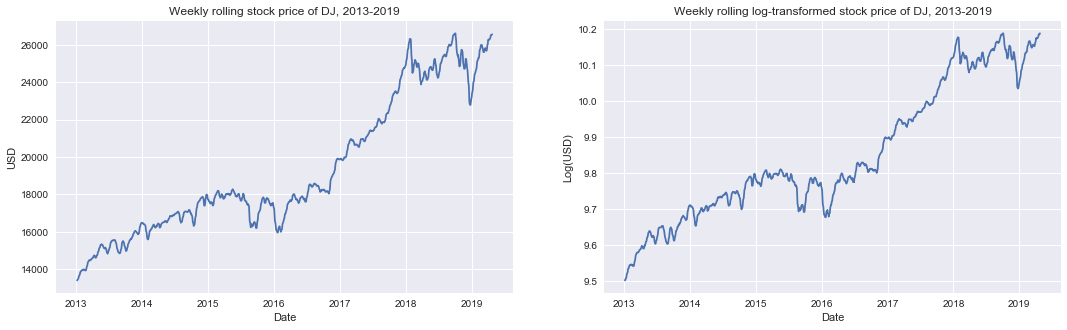

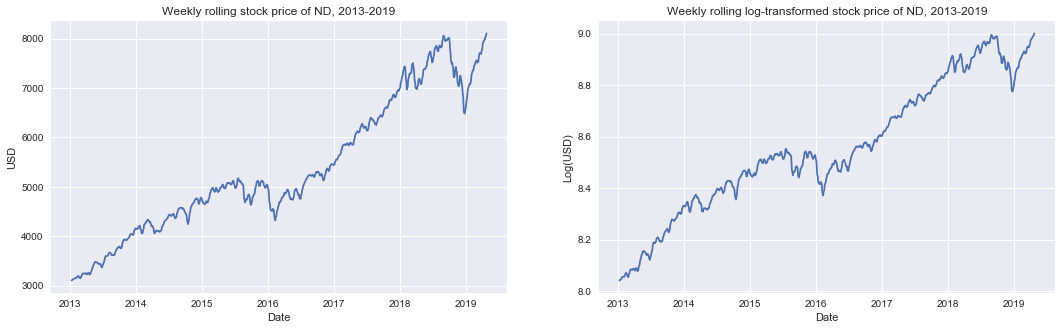

In [25]:
#Weekly rolling mean

rolling_weekly = df_close.rolling(7, center=True).mean()
rolling_weekly_log = df_close_log.rolling(7, center=True).mean()


for close in df_close:
    plt.figure(figsize=(18,5))
    
    plt.subplot(1,2,1)
    plt.plot(rolling_weekly[close])
    company = close[6:]
    the_title = 'Weekly rolling stock price of '+company+', 2013-2019'
    plt.title(the_title)
    plt.xlabel('Date')
    plt.ylabel('USD')
    
    plt.subplot(1,2,2)
    plt.plot(rolling_weekly_log[close])    
    plt.title('Weekly rolling log-transformed stock price of '+company+', 2013-2019')
    plt.xlabel('Date')
    plt.ylabel('Log(USD)')
    
    plt.show()
    


Weekly rolling data are smoother but there are still a lot of fluctuations and it is not very clear to define periods of increase/decline. To improve this, let's change rolling window to one month.


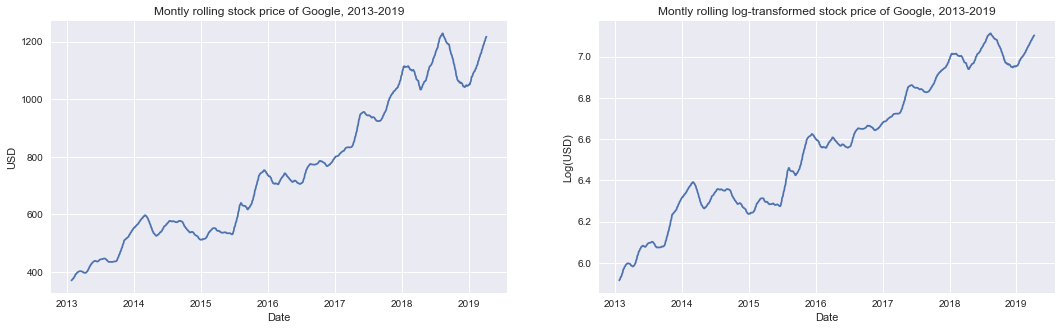

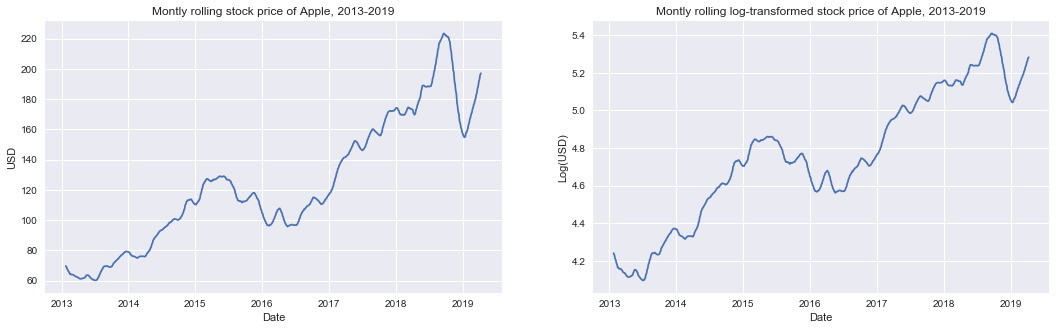

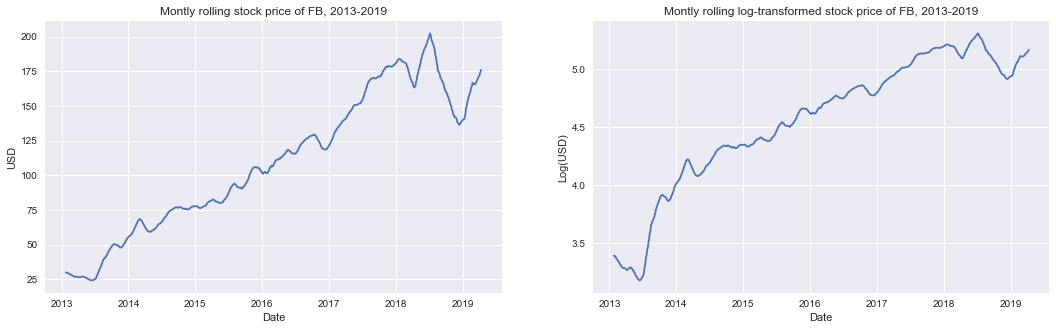

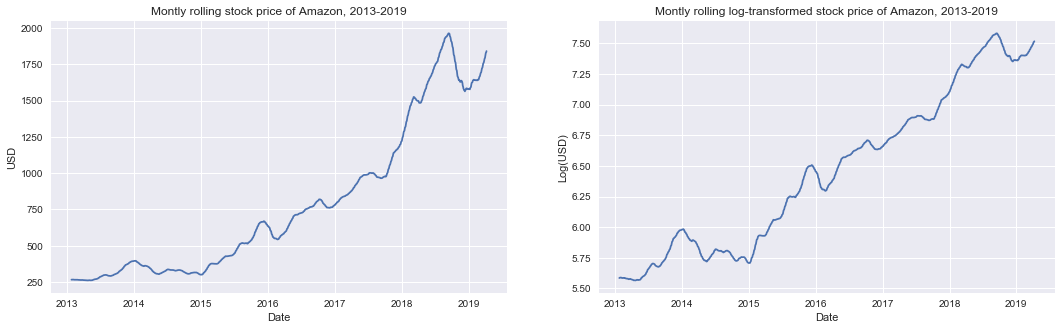

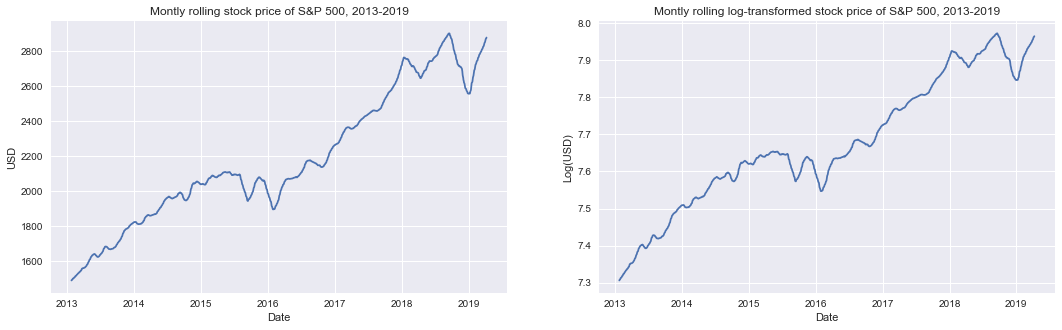

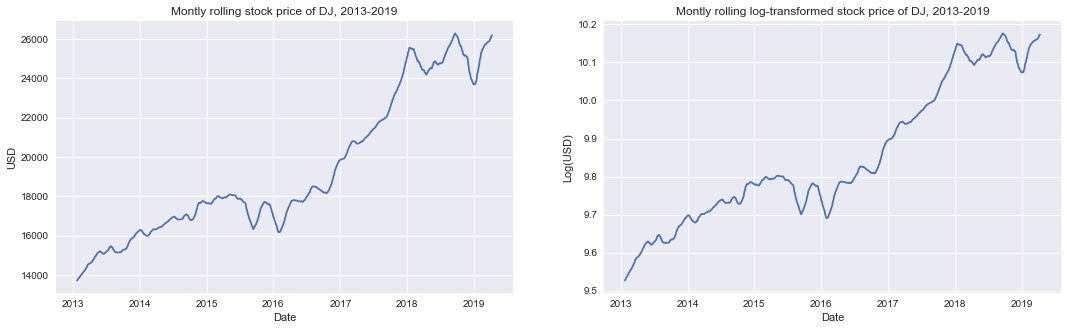

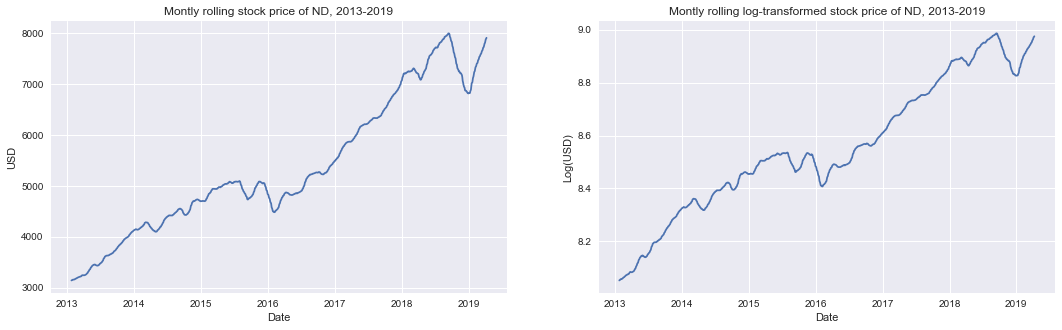

In [26]:
#Monthly rolling mean

rolling_monthly = df_close.rolling(30, center=True).mean()
rolling_monthly_log = df_close_log.rolling(30, center=True).mean()


for close in df_close:
    plt.figure(figsize=(18,5))
    
    plt.subplot(1,2,1)
    plt.plot(rolling_monthly[close])
    company = close[6:]
    the_title = 'Montly rolling stock price of '+company+', 2013-2019'
    plt.title(the_title)
    plt.xlabel('Date')
    plt.ylabel('USD')
    
    plt.subplot(1,2,2)
    plt.plot(rolling_monthly_log[close]) 
    plt.title('Montly rolling log-transformed stock price of '+company+', 2013-2019')
    plt.xlabel('Date')
    plt.ylabel('Log(USD)')
    
    plt.show()
    


With monthly rolling window we can see that data are smoother but still periods increase/decline are numerous.
Let's try three months rolling window

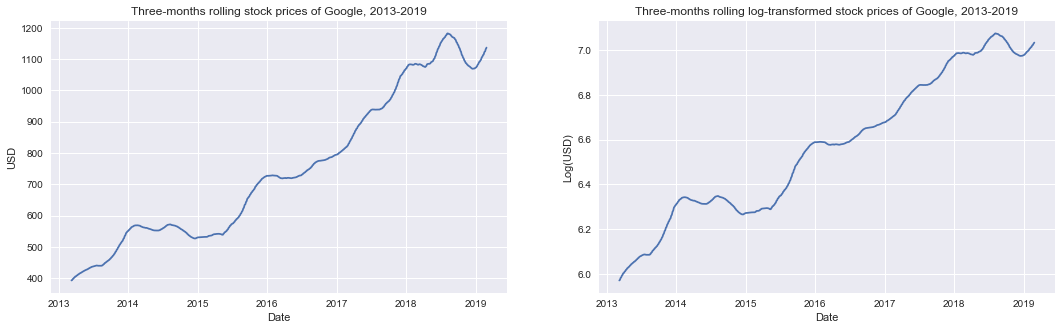

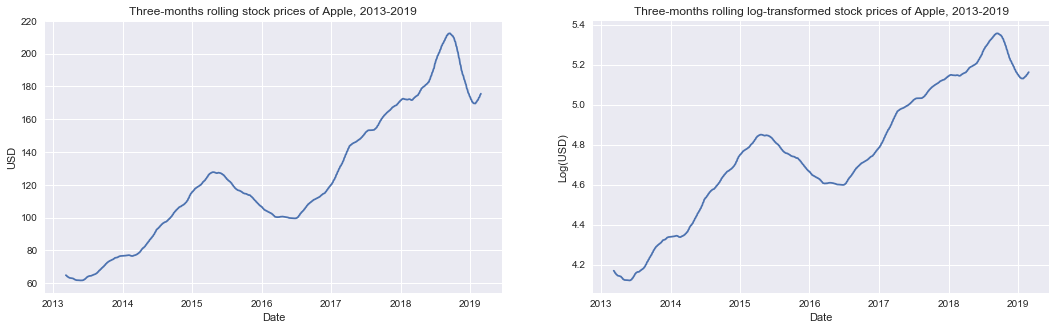

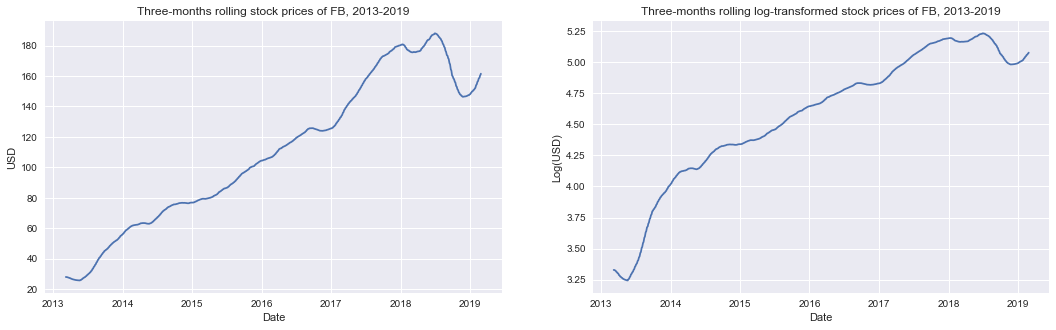

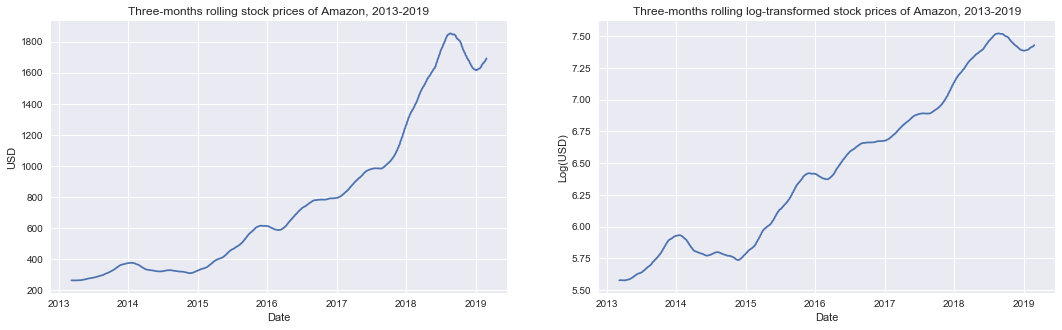

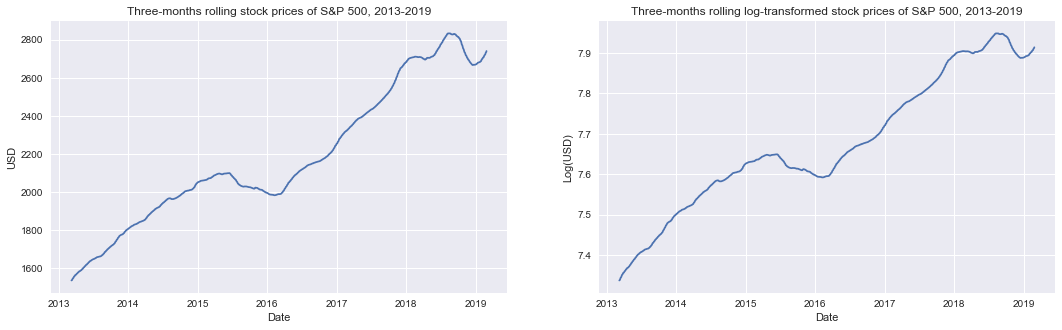

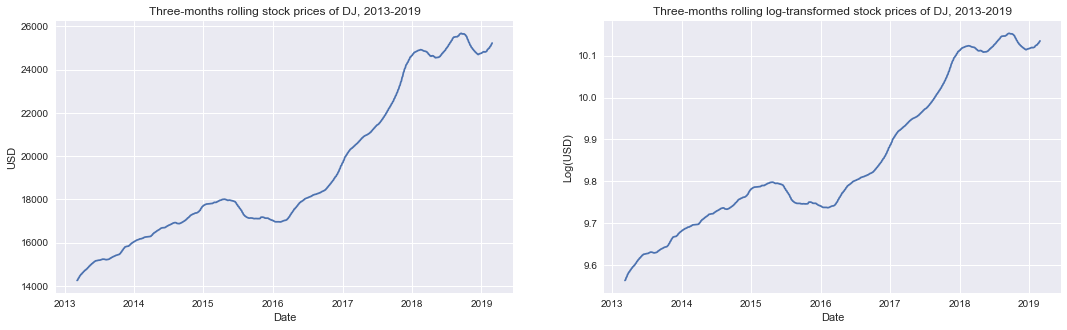

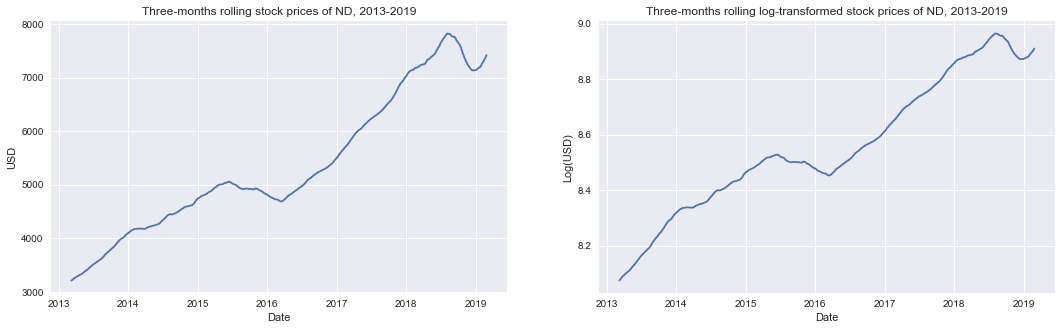

In [27]:
# Three months rolling mean

rolling_monthly = df_close.rolling(90, center=True).mean()
rolling_monthly_log = df_close_log.rolling(90, center=True).mean()


for close in df_close:
    plt.figure(figsize=(18,5))
    
    plt.subplot(1,2,1)
    plt.plot(rolling_monthly[close])
    company = close[6:]
    the_title = 'Three-months rolling stock prices of '+company+', 2013-2019'
    plt.title(the_title)
    plt.xlabel('Date')
    plt.ylabel('USD')
    
    plt.subplot(1,2,2)
    plt.plot(rolling_monthly_log[close]) 
    plt.title('Three-months rolling log-transformed stock prices of '+company+', 2013-2019')
    plt.xlabel('Date')
    plt.ylabel('Log(USD)')
    
    plt.show()
    
    

Here we can see trends which are much more visible, short periods of fluctuations are smoothed out and larger periods of increase/decline are visible and can be used for example for planning investments purposes.

Now let's look at the data variance.

#### 1.3.4 Rolling variance 

We can use rolling variance statistic to compare original data with log-transformed data.
Let's see 30 days and 7 days rolling variance. So for each company and index we get four plots that allows to visualize data through different angles.

Variance in investments is used to measure its volatility, the higher variance the greater is investment volatility as well as  the risk.

As a following step rolling variance is calculated and plotted.

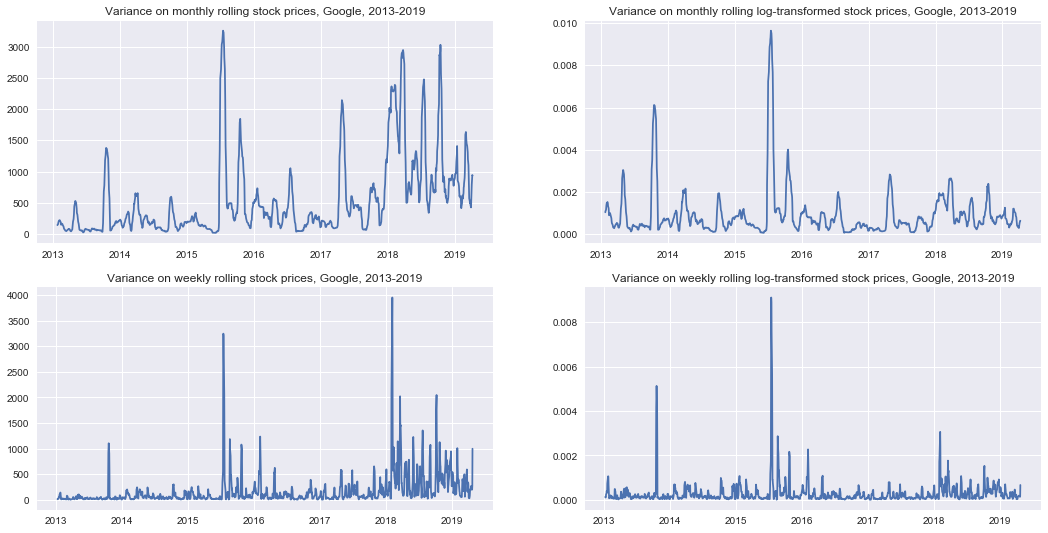

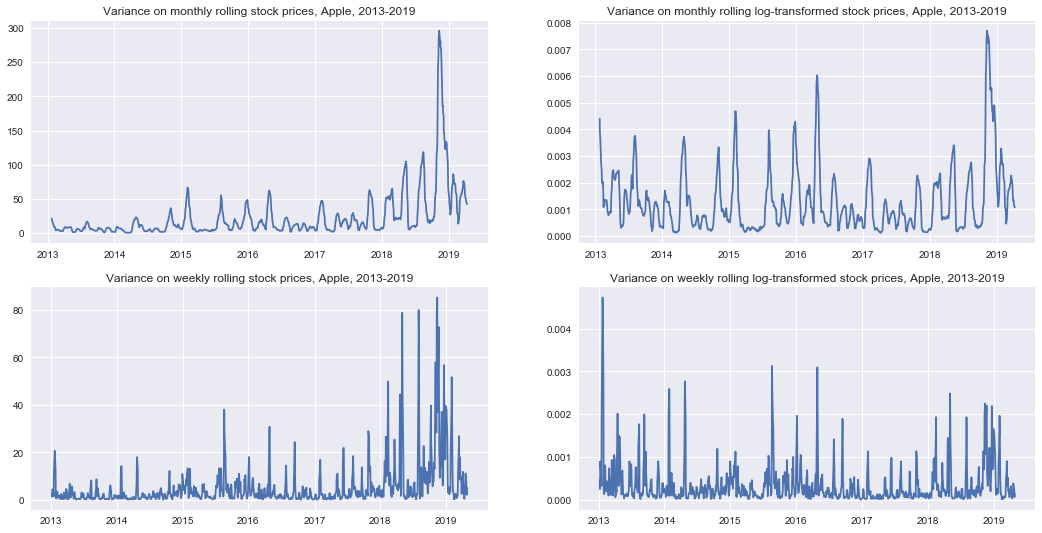

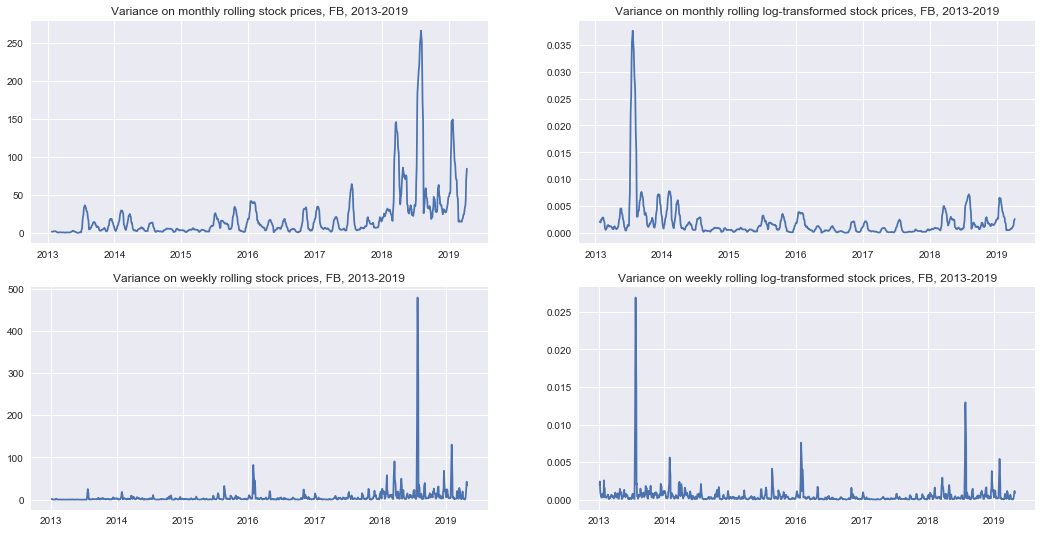

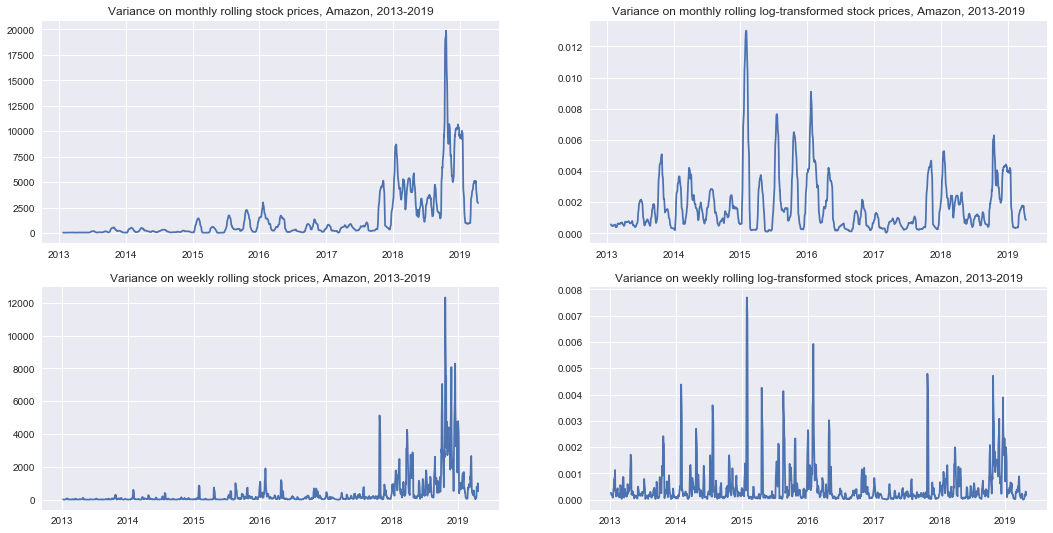

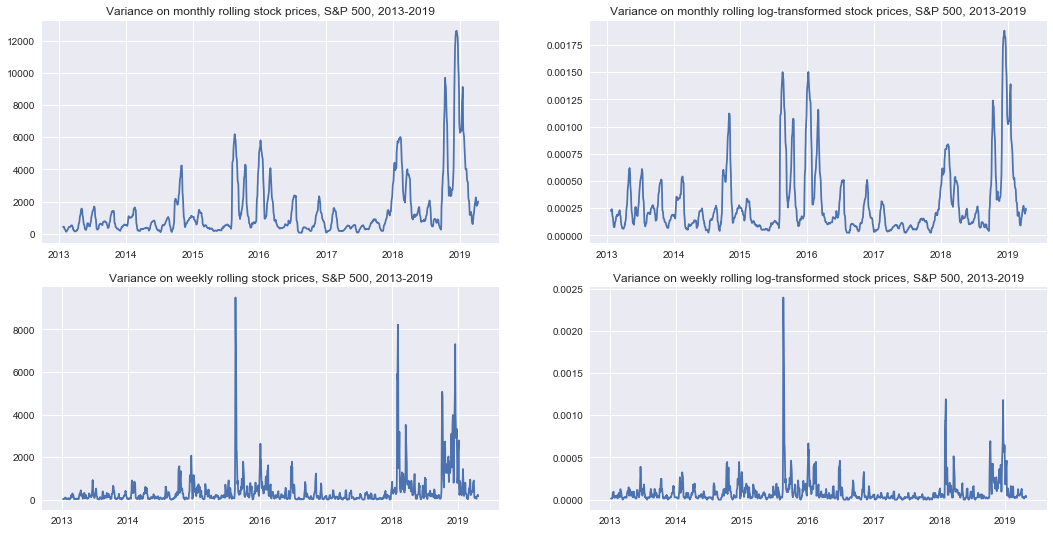

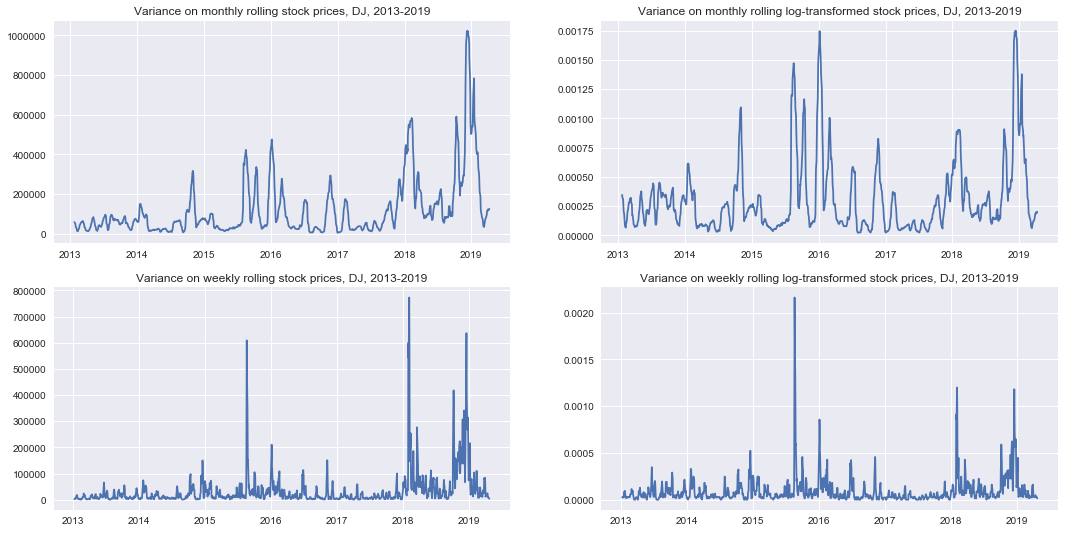

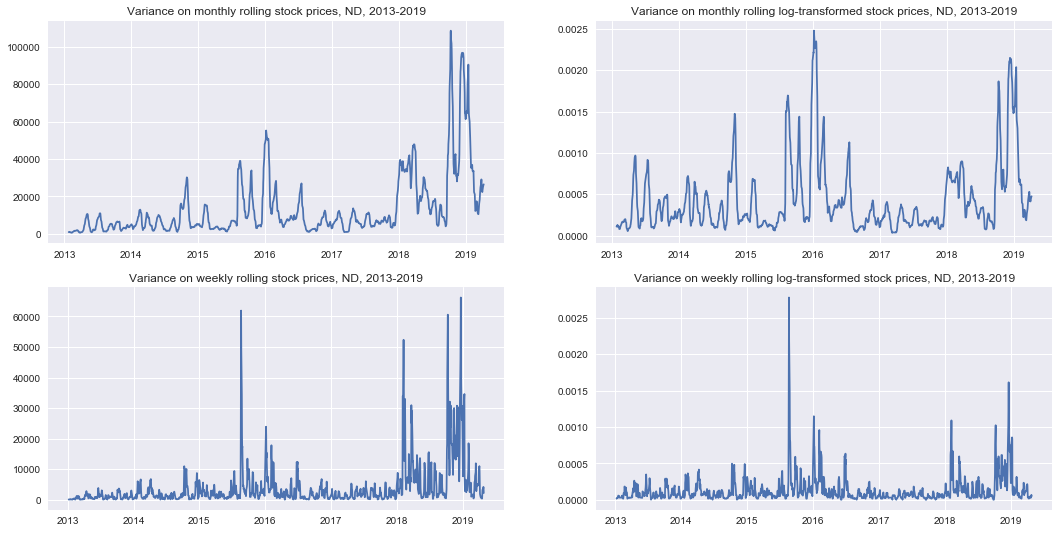

In [28]:
#Compute variance

variance1_1 = df_close.rolling(30, center=True).var()
variance1_2 = df_close_log.rolling(30, center=True).var()

variance2_1 = df_close.rolling(7, center=True).var()
variance2_2 = df_close_log.rolling(7, center=True).var()


#plot the data

for close in df_close:
    plt.figure(figsize = (18,9))
    plt.subplot(2,2,1)
    plt.plot(variance1_1[close])
    company = close[6:]
    the_title = 'Variance on monthly rolling stock prices, '+company+', 2013-2019' 
    plt.title(the_title)
    
    plt.subplot(2,2,2)
    plt.plot(variance1_2[close])
    the_title = 'Variance on monthly rolling log-transformed stock prices, '+company+', 2013-2019' 
    plt.title(the_title)
    
    plt.subplot(2,2,3)
    plt.plot(variance2_1[close])
    the_title = 'Variance on weekly rolling stock prices, '+company+', 2013-2019' 
    plt.title(the_title)
    
    plt.subplot(2,2,4)
    plt.plot(variance2_2[close])
    the_title = 'Variance on weekly rolling log-transformed stock prices, '+company+', 2013-2019' 
    plt.title(the_title)
    
    plt.show()


We can see that variance on raw data a log transformed data differs a lot. The most visible it is on Facebook data and Amazon data.
As to Indexes, all three have very similar patterns between them.

We've looked at and analysed stock prices. Now to have a bigger vision let's continue our analysis with market capitalistaion data for all four companies.

### 1.4. Market Capitalisation data
To complete GAFA analysis it is worth to look at its market capitalisation data which are supposd to be related to stock market performance.
Before start, let's download data.

- Data source: YChart, data are provided in csv format.
- Period choosen: 6 last years from 2013 till 2018 (full years) plus the beginning of 2019 (January-April) is added to make the analysis as more up to date as possible.
- Data are downloaded separately for each company.
- Column 'Data' is set as dataframe index and converted into datetime type.
- Features are renamed to facilitate further data manipulating.
- Downloaded data into Pandas DataFrame are checked with head method.


#### 1.4.1. Data download

In [29]:
# Google daily capitalisation data

df_G_cap = pd.read_csv('GOOG_market_cap_data.csv')
print(df_G_cap.shape)
df_G_cap.sort_values(by = 'Period', ascending=True, inplace=True )
df_G_cap.set_index('Period', inplace=True)
df_G_cap.index = pd.to_datetime(df_G_cap.index)
df_G_cap.rename(columns={'Market Cap':'Market Cap Google'}, inplace=True)
print(df_G_cap.head())


# Apple daily capitalisation data

df_AP_cap = pd.read_csv('AAPL_market_cap_data.csv')
print(df_AP_cap.shape)
df_AP_cap.sort_values(by = 'Period', ascending=True, inplace=True )
df_AP_cap.set_index('Period', inplace=True)
df_AP_cap.index = pd.to_datetime(df_AP_cap.index)
df_AP_cap.rename(columns={'Market Cap':'Market Cap APPLE'}, inplace=True)
print(df_AP_cap.head())


# Facebook daily capitalisation data

df_FB_cap = pd.read_csv('FB_market_cap_data.csv')
print(df_FB_cap.shape)
df_FB_cap.sort_values(by = 'Period', ascending=True, inplace=True )
df_FB_cap.set_index('Period', inplace=True)
df_FB_cap.index = pd.to_datetime(df_FB_cap.index)
df_FB_cap.rename(columns={'Market Cap':'Market Cap FB'}, inplace=True)
print(df_FB_cap.head())


# Amazon daily capitalisation data

df_AMZ_cap = pd.read_csv('AMZN_market_cap_data.csv')
print(df_AMZ_cap.shape)
df_AMZ_cap.sort_values(by = 'Period', ascending=True, inplace=True )
df_AMZ_cap.set_index('Period', inplace=True)
df_AMZ_cap.index = pd.to_datetime(df_AMZ_cap.index)
df_AMZ_cap.rename(columns={'Market Cap':'Market Cap AMZN'}, inplace=True)
print(df_AMZ_cap.head())

(1592, 2)
            Market Cap Google
Period                       
2013-01-02        238426.3057
2013-01-03        238564.7561
2013-01-04        243278.8851
2013-01-07        242217.3911
2013-01-08        241739.3847
(1592, 2)
            Market Cap APPLE
Period                      
2013-01-02       515560.3722
2013-01-03       509048.9501
2013-01-04       494873.3253
2013-01-07       491962.3066
2013-01-08       493286.3538
(1588, 2)
            Market Cap FB
Period                   
2013-01-02      66416.000
2013-01-03      65870.440
2013-01-04      68218.720
2013-01-07      69787.326
2013-01-08      68931.978
(1592, 2)
            Market Cap AMZN
Period                     
2013-01-02      116818.7400
2013-01-03      117349.9245
2013-01-04      117654.1000
2013-01-07      121880.4768
2013-01-08      120936.5200


<i>Data are downloaded correctly</i>

In [30]:
#Concatenate Market Capitalisation data

df_cap = pd.concat([df_G_cap, df_AP_cap, df_FB_cap, df_AMZ_cap], axis=1)
df_cap.head()

Market Cap Google  Market Cap APPLE  Market Cap FB  \
Period                                                           
2013-01-02        238426.3057       515560.3722      66416.000   
2013-01-03        238564.7561       509048.9501      65870.440   
2013-01-04        243278.8851       494873.3253      68218.720   
2013-01-07        242217.3911       491962.3066      69787.326   
2013-01-08        241739.3847       493286.3538      68931.978   

            Market Cap AMZN  
Period                       
2013-01-02      116818.7400  
2013-01-03      117349.9245  
2013-01-04      117654.1000  
2013-01-07      121880.4768  
2013-01-08      120936.5200

#### 1.4.2. First look at GAFA's market capitalisation

Let's visualise market capitalisation data for all four companies. To have a bigger picture data are plotted also with 3 months rolling window method applied. 

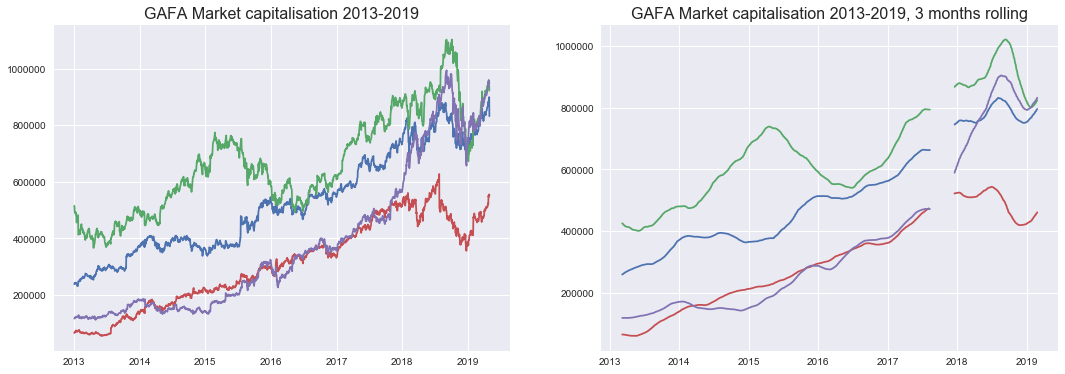

In [31]:
rolling_cap = df_cap.rolling(90, center=True).mean()

figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

ax1.plot(df_cap)
ax1.set_title('GAFA Market capitalisation 2013-2019', fontsize='16')

ax2.plot(rolling_cap)
ax2.set_title('GAFA Market capitalisation 2013-2019, 3 months rolling', fontsize='16');



Indeed, we can see that data pattern is pretty much the same as for stock data: there are a lot of fluctuations but with visible growth trend. On the right-hand side plot, data are plotted with 3 months rolling window, where trends are much more visible. There is also a 'hole' during 2017, apparently due to missing values. This is to be fixed later.

Now it would be interesting to find out if there is a correlation between stock prices and market capitalisation. 

#### 1.4.3. Correlation
Let's create a data frame with all data: close prices GAFA and idexes, volumes, market capitalisation and then select close data and market capitalisation data

In [32]:
#select close data and market capitalisation data

df_close_cap = pd.concat([df_close, df_cap], axis=1)
df_close_cap.head()


Close Google  Close Apple   Close FB  Close Amazon  Close S&P 500  \
2013-01-02    359.288177    78.432854  28.000000    257.309998    1462.420044   
2013-01-03    359.496826    77.442856  27.770000    258.480011    1459.369995   
2013-01-04    366.600616    75.285713  28.760000    259.149994    1466.469971   
2013-01-07    365.001007    74.842857  29.420000    268.459991    1461.890015   
2013-01-08    364.280701    75.044289  29.059999    266.380005    1457.150024   

                Close DJ     Close ND  Market Cap Google  Market Cap APPLE  \
2013-01-02  13412.549805  3112.260010        238426.3057       515560.3722   
2013-01-03  13391.360352  3100.570068        238564.7561       509048.9501   
2013-01-04  13435.209961  3101.659912        243278.8851       494873.3253   
2013-01-07  13384.290039  3098.810059        242217.3911       491962.3066   
2013-01-08  13328.849609  3091.810059        241739.3847       493286.3538   

            Market Cap FB  Market Cap AMZN  
2013-01-02      66416.000      116818.7400  
2013-01-03      65870.440      117349.9245  
2013-01-04      68218.720      117654.1000  
2013-01-07      69787.326      121880.4768  
2013-01-08      68931.978      120936.5200

Now let's calculate correlation on raw data and visualize it with a heat map

In [33]:
close_cap_corr = df_close_cap.corr()
close_cap_corr

Close Google  Close Apple  Close FB  Close Amazon  \
Close Google           1.000000     0.918166  0.956163      0.964089   
Close Apple            0.918166     1.000000  0.896824      0.914750   
Close FB               0.956163     0.896824  1.000000      0.880220   
Close Amazon           0.964089     0.914750  0.880220      1.000000   
Close S&P 500          0.964661     0.968071  0.947224      0.935301   
Close DJ               0.962045     0.957396  0.917001      0.953788   
Close ND               0.972723     0.973662  0.946314      0.954722   
Market Cap Google      0.999289     0.919776  0.962028      0.959076   
Market Cap APPLE       0.862691     0.988773  0.860616      0.851109   
Market Cap FB          0.952884     0.895461  0.999514      0.877647   
Market Cap AMZN        0.962755     0.914490  0.877334      0.999940   

                   Close S&P 500  Close DJ  Close ND  Market Cap Google  \
Close Google            0.964661  0.962045  0.972723           0.999289   
Close Apple             0.968071  0.957396  0.973662           0.919776   
Close FB                0.947224  0.917001  0.946314           0.962028   
Close Amazon            0.935301  0.953788  0.954722           0.959076   
Close S&P 500           1.000000  0.987862  0.995658           0.965309   
Close DJ                0.987862  1.000000  0.987590           0.958272   
Close ND                0.995658  0.987590  1.000000           0.972709   
Market Cap Google       0.965309  0.958272  0.972709           1.000000   
Market Cap APPLE        0.937564  0.919361  0.940418           0.865452   
Market Cap FB           0.944474  0.913693  0.943356           0.959241   
Market Cap AMZN         0.934627  0.953911  0.954086           0.957580   

                   Market Cap APPLE  Market Cap FB  Market Cap AMZN  
Close Google               0.862691       0.952884         0.962755  
Close Apple                0.988773       0.895461         0.914490  
Close FB                   0.860616       0.999514         0.877334  
Close Amazon               0.851109       0.877647         0.999940  
Close S&P 500              0.937564       0.944474         0.934627  
Close DJ                   0.919361       0.913693         0.953911  
Close ND                   0.940418       0.943356         0.954086  
Market Cap Google          0.865452       0.959241         0.957580  
Market Cap APPLE           1.000000       0.859497         0.850588  
Market Cap FB              0.859497       1.000000         0.874649  
Market Cap AMZN            0.850588       0.874649         1.000000

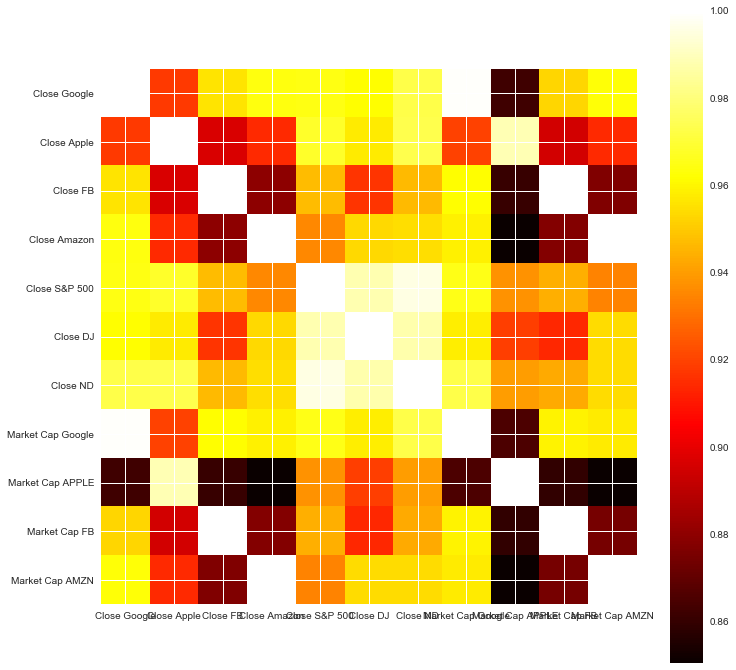

In [34]:
plt.figure(figsize=(12,12))
plt.imshow(close_cap_corr, cmap='hot')
plt.colorbar()
plt.xticks(range(len(close_cap_corr)), close_cap_corr.columns)
plt.yticks(range(len(close_cap_corr)), close_cap_corr.columns);

Here we can see that for all four companies correlation between close data and market capitalisation is very high, at about 0.99. It means that stocks fluctuations have immediate effect to company market capitalisation.

As we did for close prices, lets look for correlation on percent change

In [35]:
pers_close_cap = df_close_cap.pct_change()
pers_close_cap = pers_close_cap[1:] #drop first row in data set with NA values
close_cap_corr2 = pers_close_cap.corr()
close_cap_corr2

Close Google  Close Apple  Close FB  Close Amazon  \
Close Google           1.000000     0.417540  0.487478      0.590885   
Close Apple            0.417540     1.000000  0.329104      0.363710   
Close FB               0.487478     0.329104  1.000000      0.465260   
Close Amazon           0.590885     0.363710  0.465260      1.000000   
Close S&P 500          0.644561     0.560911  0.469424      0.572756   
Close DJ               0.581064     0.523573  0.396478      0.509009   
Close ND               0.720293     0.641761  0.566409      0.660934   
Market Cap Google      0.992021     0.415297  0.492213      0.590844   
Market Cap APPLE       0.418325     0.992231  0.332061      0.366163   
Market Cap FB          0.486344     0.327050  0.995051      0.463844   
Market Cap AMZN        0.591041     0.362816  0.465125      0.999326   

                   Close S&P 500  Close DJ  Close ND  Market Cap Google  \
Close Google            0.644561  0.581064  0.720293           0.992021   
Close Apple             0.560911  0.523573  0.641761           0.415297   
Close FB                0.469424  0.396478  0.566409           0.492213   
Close Amazon            0.572756  0.509009  0.660934           0.590844   
Close S&P 500           1.000000  0.965409  0.943427           0.645336   
Close DJ                0.965409  1.000000  0.870468           0.582254   
Close ND                0.943427  0.870468  1.000000           0.720459   
Market Cap Google       0.645336  0.582254  0.720459           1.000000   
Market Cap APPLE        0.560984  0.521934  0.641694           0.414541   
Market Cap FB           0.466838  0.394682  0.563779           0.491749   
Market Cap AMZN         0.572287  0.508904  0.660336           0.591343   

                   Market Cap APPLE  Market Cap FB  Market Cap AMZN  
Close Google               0.418325       0.486344         0.591041  
Close Apple                0.992231       0.327050         0.362816  
Close FB                   0.332061       0.995051         0.465125  
Close Amazon               0.366163       0.463844         0.999326  
Close S&P 500              0.560984       0.466838         0.572287  
Close DJ                   0.521934       0.394682         0.508904  
Close ND                   0.641694       0.563779         0.660336  
Market Cap Google          0.414541       0.491749         0.591343  
Market Cap APPLE           1.000000       0.329816         0.364586  
Market Cap FB              0.329816       1.000000         0.463898  
Market Cap AMZN            0.364586       0.463898         1.000000

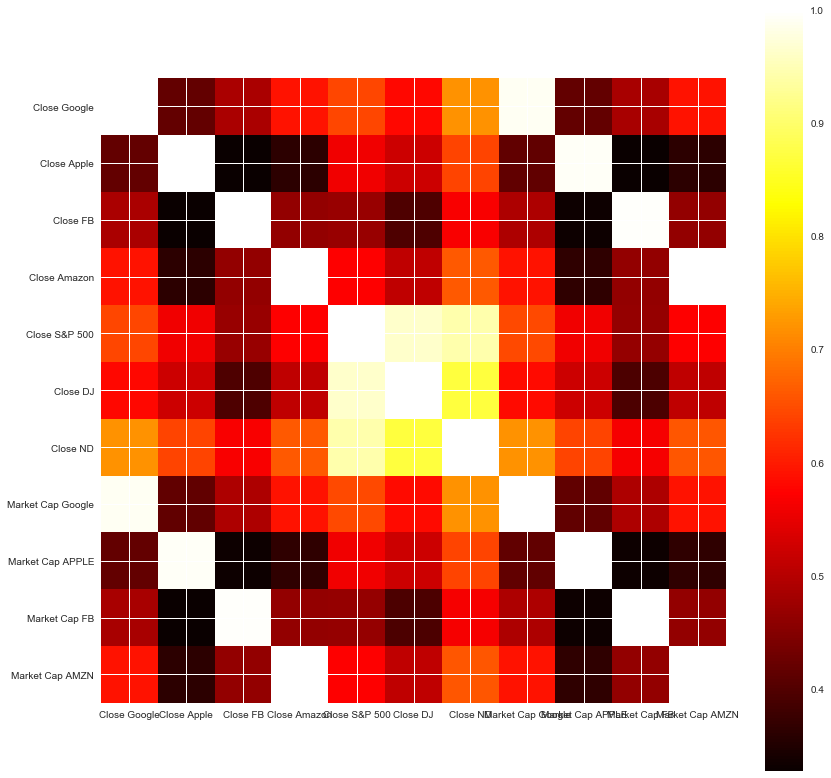

In [36]:
plt.figure(figsize=(14,14))
plt.imshow(close_cap_corr2, cmap='hot')
plt.colorbar()
plt.xticks(range(len(close_cap_corr2)), close_cap_corr2.columns)
plt.yticks(range(len(close_cap_corr2)), close_cap_corr2.columns);

Here we can see that correlation remains very high  between companies' stock prices and it s market capitalisation. Indexes also remain highly correlated.

We've seen that there are some missing values in market capitalisation data. Let's fix it and clean the data.

### 1.5. Cleaning dataset

In [37]:
#Concatenate stock prices and capitalisation data frames

df = pd.concat([df, df_cap], axis=1)
print(df.shape)
df.tail()

(1593, 18)


Close Google  Volume Google  Close Apple  Volume Apple  \
2019-04-24   1256.000000      1018800.0   207.160004    17540600.0   
2019-04-25   1263.449951      1107300.0   205.279999    18543200.0   
2019-04-26   1272.180054      1241400.0   204.300003    18649100.0   
2019-04-29   1287.579956      2499400.0   204.610001    22204700.0   
2019-04-30   1188.479980      6207000.0   200.669998    46534900.0   

              Close FB   Volume FB  Close Amazon  Volume Amazon  \
2019-04-24  182.580002  37289900.0   1901.750000      3675800.0   
2019-04-25  193.259995  54148800.0   1902.250000      6099100.0   
2019-04-26  191.490005  22075000.0   1950.630005      8432600.0   
2019-04-29  194.779999  19641300.0   1938.430054      4021300.0   
2019-04-30  193.399994  23494700.0   1926.520020      3506000.0   

            Close S&P 500  Volume S&P500      Close DJ    Volume DJ  \
2019-04-24    2927.250000   3.448960e+09  26597.050781  283370000.0   
2019-04-25    2926.169922   3.425280e+09  26462.080078  296730000.0   
2019-04-26    2939.879883   3.248500e+09  26543.330078  317290000.0   
2019-04-29    2943.030029   3.118780e+09  26554.390625  279450000.0   
2019-04-30    2945.830078   3.919330e+09  26592.910156  340320000.0   

               Close ND     Volume ND  Market Cap Google  Market Cap APPLE  \
2019-04-24  8102.009766  2.022490e+09        874781.9002       953158.6970   
2019-04-25  8118.680176  2.063270e+09        879842.9375       944508.6760   
2019-04-26  8146.399902  1.971270e+09        886840.9150       939999.6225   
2019-04-29  8161.850098  1.761110e+09        899878.8136       941425.9558   
2019-04-30  8095.390137  2.115770e+09        832370.5464       923297.7202   

            Market Cap FB  Market Cap AMZN  
2019-04-24    521172.5468      936292.0006  
2019-04-25    551658.4862      936538.1666  
2019-04-26    546606.0412      960357.1790  
2019-04-29    555997.3090      954350.7311  
2019-04-30    552058.1146      948487.0593

In [38]:
#check for null values

print(df.shape)
print(df.info())
df.isnull().sum()

(1593, 18)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1593 entries, 2013-01-02 to 2019-04-30
Data columns (total 18 columns):
Close Google         1592 non-null float64
Volume Google        1592 non-null float64
Close Apple          1592 non-null float64
Volume Apple         1592 non-null float64
Close FB             1592 non-null float64
Volume FB            1592 non-null float64
Close Amazon         1592 non-null float64
Volume Amazon        1592 non-null float64
Close S&P 500        1592 non-null float64
Volume S&P500        1592 non-null float64
Close DJ             1592 non-null float64
Volume DJ            1592 non-null float64
Close ND             1592 non-null float64
Volume ND            1592 non-null float64
Market Cap Google    1592 non-null float64
Market Cap APPLE     1592 non-null float64
Market Cap FB        1588 non-null float64
Market Cap AMZN      1592 non-null float64
dtypes: float64(18)
memory usage: 236.5 KB
None


Close Google         1
Volume Google        1
Close Apple          1
Volume Apple         1
Close FB             1
Volume FB            1
Close Amazon         1
Volume Amazon        1
Close S&P 500        1
Volume S&P500        1
Close DJ             1
Volume DJ            1
Close ND             1
Volume ND            1
Market Cap Google    1
Market Cap APPLE     1
Market Cap FB        5
Market Cap AMZN      1
dtype: int64

In [39]:
# Look for missing values and localize it in dataset

df['Close Apple'][df['Close Apple'].isnull()]
df['Close Apple']['2017-10-12':'2017-10-16']

2017-10-12    156.000000
2017-10-13    156.990005
2017-10-14           NaN
2017-10-16    159.880005
Name: Close Apple, dtype: float64

In [40]:
# Look for NaN values in another column
df['Volume Amazon'][df['Volume Amazon'].isnull()]

2017-10-14   NaN
Name: Volume Amazon, dtype: float64

In [41]:
# Here we can see all missing values in data set
df['2017-10-06':'2017-10-16']

Close Google  Volume Google  Close Apple  Volume Apple  \
2017-10-06    978.890015      1173900.0   155.300003    17407600.0   
2017-10-09    977.000000       891400.0   155.839996    16262900.0   
2017-10-10    972.599976       968400.0   155.899994    15617000.0   
2017-10-11    989.250000      1693300.0   156.550003    16905600.0   
2017-10-12    987.830017      1262400.0   156.000000    16125100.0   
2017-10-13    989.679993      1169800.0   156.990005    16394200.0   
2017-10-14           NaN            NaN          NaN           NaN   
2017-10-16    992.000000       910500.0   159.880005    24121500.0   

              Close FB   Volume FB  Close Amazon  Volume Amazon  \
2017-10-06  172.229996  13124500.0    989.580017      3782100.0   
2017-10-09  172.500000  14570400.0    990.989990      2938600.0   
2017-10-10  171.589996  11341100.0    987.200012      3084900.0   
2017-10-11  172.740005  11283700.0    995.000000      2337100.0   
2017-10-12  172.550003  10351000.0   1000.929993      4067300.0   
2017-10-13  173.740005  13658300.0   1002.940002      2431500.0   
2017-10-14         NaN         NaN           NaN            NaN   
2017-10-16  174.520004  11498800.0   1006.340027      2008900.0   

            Close S&P 500  Volume S&P500      Close DJ    Volume DJ  \
2017-10-06    2549.330078   2.884570e+09  22773.669922  221450000.0   
2017-10-09    2544.729980   2.483970e+09  22761.070313  310770000.0   
2017-10-10    2550.639893   2.960500e+09  22830.679688  319270000.0   
2017-10-11    2555.239990   2.976090e+09  22872.890625  316000000.0   
2017-10-12    2550.929932   3.151510e+09  22841.009766  291790000.0   
2017-10-13    2553.169922   3.149440e+09  22871.720703  259560000.0   
2017-10-14            NaN            NaN           NaN          NaN   
2017-10-16    2557.639893   2.916020e+09  22956.960938  247180000.0   

               Close ND     Volume ND  Market Cap Google  Market Cap APPLE  \
2017-10-06  6590.180176  1.742470e+09        690371.1356       796099.0153   
2017-10-09  6579.729980  1.490620e+09        689447.0649       798867.1638   
2017-10-10  6587.250000  1.799400e+09        686313.5620       799174.7359   
2017-10-11  6603.549805  1.830360e+09        698715.5635       802506.7666   
2017-10-12  6591.509766  2.000470e+09        698715.5635       799687.3560   
2017-10-13  6605.799805  1.756150e+09        700257.9973       804762.2950   
2017-10-14          NaN           NaN                NaN               NaN   
2017-10-16  6624.000000  1.629480e+09        701286.2865       819577.0159   

            Market Cap FB  Market Cap AMZN  
2017-10-06      500500.38        476977.56  
2017-10-09            NaN        477657.18  
2017-10-10            NaN        475830.40  
2017-10-11            NaN        479590.00  
2017-10-12            NaN        482448.26  
2017-10-13            NaN        483417.08  
2017-10-14      500500.38              NaN  
2017-10-16      507155.12        485055.88

In [42]:
#fill in missing data in 'Market Cap_FB' column

df['Market Cap FB'].fillna(value=500500.38, inplace=True)
df['2017-10-06':'2017-10-16']['Market Cap FB']

2017-10-06    500500.38
2017-10-09    500500.38
2017-10-10    500500.38
2017-10-11    500500.38
2017-10-12    500500.38
2017-10-13    500500.38
2017-10-14    500500.38
2017-10-16    507155.12
Name: Market Cap FB, dtype: float64

In [43]:
#drop the row with NaN values
df.dropna(inplace=True)

#check if the row was deleted
df['2017-10-12':'2017-10-17']

Close Google  Volume Google  Close Apple  Volume Apple  \
2017-10-12    987.830017      1262400.0   156.000000    16125100.0   
2017-10-13    989.679993      1169800.0   156.990005    16394200.0   
2017-10-16    992.000000       910500.0   159.880005    24121500.0   
2017-10-17    992.179993      1290200.0   160.470001    18997300.0   

              Close FB   Volume FB  Close Amazon  Volume Amazon  \
2017-10-12  172.550003  10351000.0   1000.929993      4067300.0   
2017-10-13  173.740005  13658300.0   1002.940002      2431500.0   
2017-10-16  174.520004  11498800.0   1006.340027      2008900.0   
2017-10-17  176.110001  15990100.0   1009.130005      2319700.0   

            Close S&P 500  Volume S&P500      Close DJ    Volume DJ  \
2017-10-12    2550.929932   3.151510e+09  22841.009766  291790000.0   
2017-10-13    2553.169922   3.149440e+09  22871.720703  259560000.0   
2017-10-16    2557.639893   2.916020e+09  22956.960938  247180000.0   
2017-10-17    2559.360107   2.889390e+09  22997.439453  273090000.0   

               Close ND     Volume ND  Market Cap Google  Market Cap APPLE  \
2017-10-12  6591.509766  2.000470e+09        698715.5635       799687.3560   
2017-10-13  6605.799805  1.756150e+09        700257.9973       804762.2950   
2017-10-16  6624.000000  1.629480e+09        701286.2865       819577.0159   
2017-10-17  6623.660156  1.647240e+09        702432.6900       822601.4745   

            Market Cap FB  Market Cap AMZN  
2017-10-12      500500.38        482448.26  
2017-10-13      500500.38        483417.08  
2017-10-16      507155.12        485055.88  
2017-10-17      511775.66        486400.66

In [44]:
#final check

df.isnull().sum().sum()

0

There is no more null values in dataset

Let's continue analysis and look  at pattern of normalised data, maybe that could give more insights. And secondly, look for ROI - return of investment and GAFA's  market capitalisation growth.

### 1.6. Normalised data & ROI 

Normalised data may allow to look at the data through a different angle. 

#### 1.6.1. Patterns of normalised data

To get normalised data MinMaxScaler method is used and then the result is plotted.

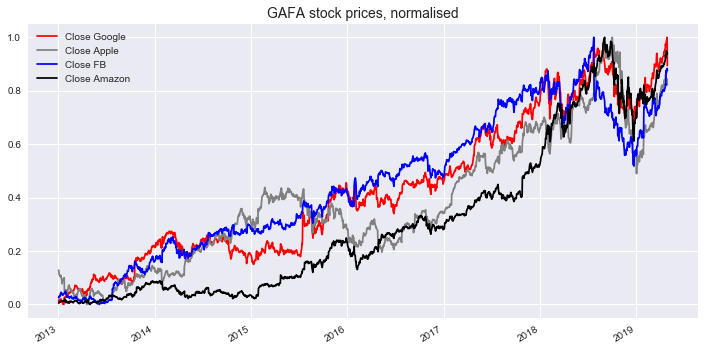

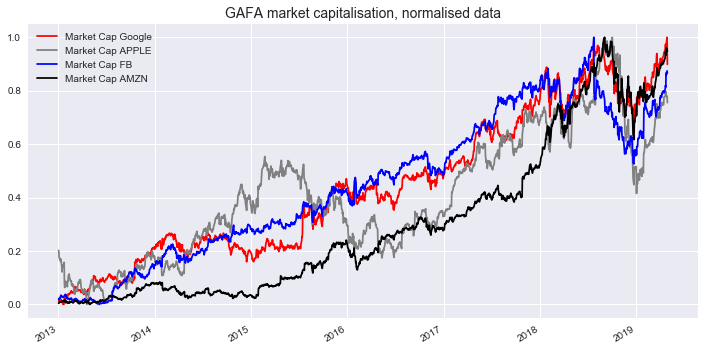

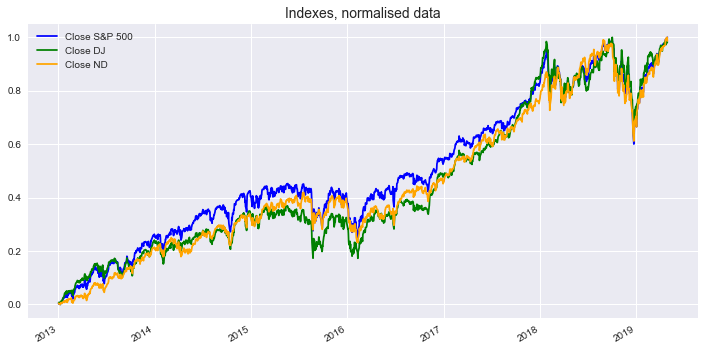

In [45]:
from sklearn.preprocessing import MinMaxScaler


values = df[['Close Google', 'Close Apple', 'Close FB', 'Close Amazon',
           'Close S&P 500', 'Close DJ', 'Close ND', 
            'Market Cap Google', 'Market Cap APPLE', 'Market Cap FB', 'Market Cap AMZN']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)

df_norm = pd.DataFrame(normalized, columns=['Close Google', 'Close Apple', 'Close FB', 'Close Amazon',
       'Close S&P 500', 'Close DJ', 'Close ND', 'Market Cap Google', 'Market Cap APPLE', 'Market Cap FB', 'Market Cap AMZN'], index=df.index)

df_norm.head()


stocks = df_norm[['Close Google', 'Close Apple', 'Close FB', 'Close Amazon']].plot(figsize=(12,6), color = ['red', 'grey', 'blue', 'black'] );
stocks.set_title('GAFA stock prices, normalised', fontsize=14);

capitalisation = df_norm[['Market Cap Google', 'Market Cap APPLE', 'Market Cap FB', 'Market Cap AMZN']].plot(figsize=(12,6), color = ['red', 'grey', 'blue', 'black']);
capitalisation .set_title('GAFA market capitalisation, normalised data', fontsize=14);

indexes = df_norm[['Close S&P 500', 'Close DJ', 'Close ND']].plot(figsize=(12,6), color = ['blue', 'green', 'orange']);
indexes.set_title('Indexes, normalised data', fontsize=14);




Pattern between stock prices data and market capitalisation are very similar, market capitalisation curve follows stock prices' for all four companies. It confirms results that have been got while correlation analysis.

As for Indexes data they have very similar pattern between them as well.

Let's now look at return on investments

#### 1.6.2. Return on investments
Before start, let's look at prices in 2013 and in 2019

In [46]:
df_close.head(3)

Close Google  Close Apple  Close FB  Close Amazon  Close S&P 500  \
Date                                                                           
2013-01-02    359.288177    78.432854     28.00    257.309998    1462.420044   
2013-01-03    359.496826    77.442856     27.77    258.480011    1459.369995   
2013-01-04    366.600616    75.285713     28.76    259.149994    1466.469971   

                Close DJ     Close ND  
Date                                   
2013-01-02  13412.549805  3112.260010  
2013-01-03  13391.360352  3100.570068  
2013-01-04  13435.209961  3101.659912

In [47]:
df_close.tail(3)

Close Google  Close Apple    Close FB  Close Amazon  \
Date                                                              
2019-04-26   1272.180054   204.300003  191.490005   1950.630005   
2019-04-29   1287.579956   204.610001  194.779999   1938.430054   
2019-04-30   1188.479980   200.669998  193.399994   1926.520020   

            Close S&P 500      Close DJ     Close ND  
Date                                                  
2019-04-26    2939.879883  26543.330078  8146.399902  
2019-04-29    2943.030029  26554.390625  8161.850098  
2019-04-30    2945.830078  26592.910156  8095.390137

ROI is calculated as  = (30.04.2019 price - 01.02.2013 price) / 01.02.2013 price

In [48]:
roi_stocks = []

for close in df_close:
    roi = ((df_close[close][-1]-df_close[close][0])/df_close[close][0])*100
    
    roi_stocks.append(roi)

df_roi = pd.DataFrame(roi_stocks, columns=['ROI, %'],\
                      index=['Google', 'Apple', 'Facebook', 'Amazon', 'S&P 500','Dow Jones','NASDAQ'])

df_roi = df_roi.sort_values(by='ROI, %', ascending=False)
df_roi

ROI, %
Amazon     648.715571
Facebook   590.714264
Google     230.787389
NASDAQ     160.112912
Apple      155.849415
S&P 500    101.435291
Dow Jones   98.268864

We can see that Amason and Facebook have the best results at about 650% and 590% for the period 2013-2019. Let's plot it


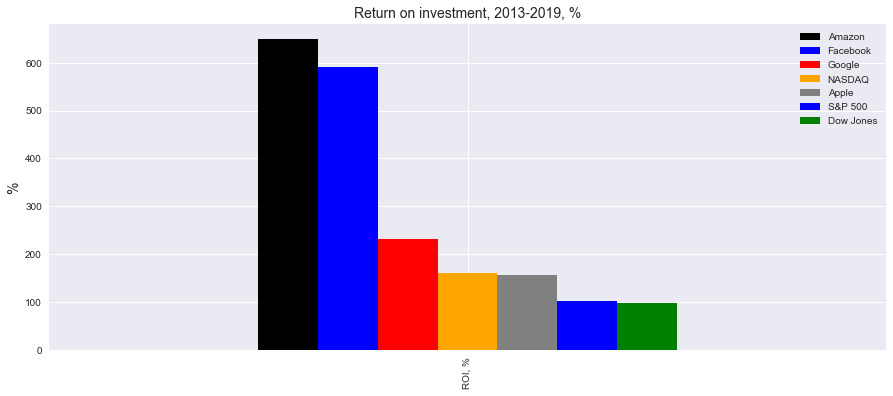

Amazon    Facebook      Google      NASDAQ       Apple  \
ROI, %  648.715571  590.714264  230.787389  160.112912  155.849415   

           S&P 500  Dow Jones  
ROI, %  101.435291  98.268864

In [49]:
df_roi_t = df_roi.sort_values(by='ROI, %', ascending=False).T

roi_plot = df_roi_t.plot.bar(figsize=(15,6), \
                        color=['black', 'blue', 'red', 'orange', 'grey', 'blue', 'green'])
roi_plot.set_title('Return on investment, 2013-2019, %', fontsize=14)
roi_plot.set_ylabel('%', fontsize=14)

plt.show()
df_roi_t 

Let's also compute one-year return on investments over the course of data set. The idea is to find which was the best moment to invest and to get maximum return one year later.   

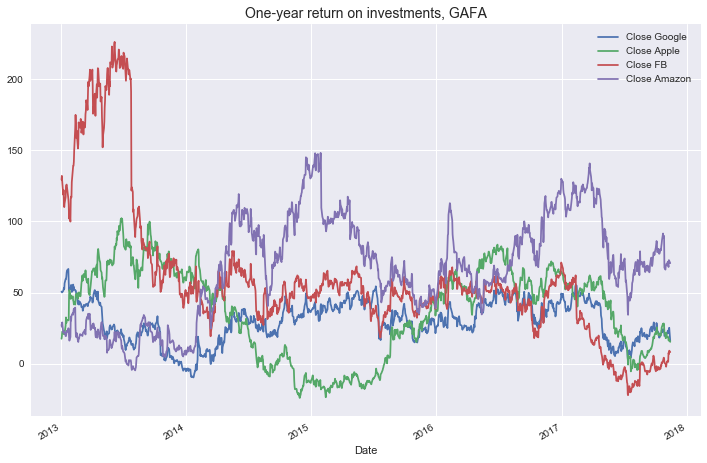

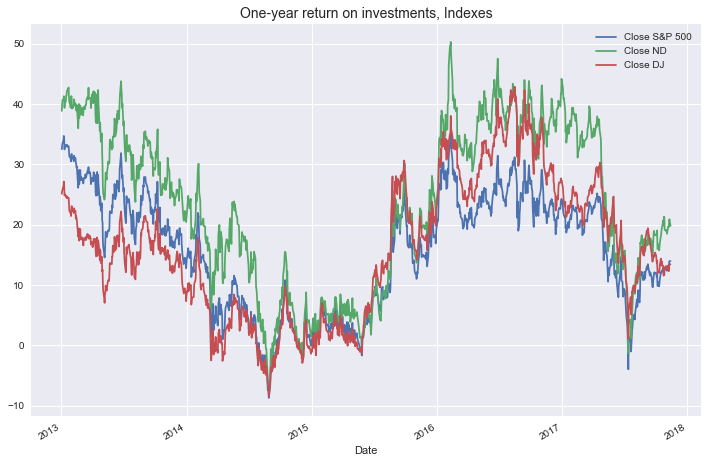

In [50]:
roi = 100*(df_close.shift(-365)/df_close-1)

roi_plot1 = roi[['Close Google','Close Apple', 'Close FB', 'Close Amazon']].plot(figsize=(12,8))
roi_plot1.set_title('One-year return on investments, GAFA', fontsize=14);


roi_plot2 = roi[['Close S&P 500','Close ND', 'Close DJ']].plot(figsize=(12,8))
roi_plot2.set_title('One-year return on investments, Indexes', fontsize=14);

Data for GAFA and for Indexes are plotted separately to have better visualisation.

Here we can see the most profitable periods to invest for Facebook for example it was in 2013, for Amazon in the beginning of 2015, etc.

Now let's look what is market capitalisation growth

#### 1.6.3 Market capitalisation growth
Let's look at market capitalisation growth. Firstly to check data at the beginning of 2013 and then at the end of april 2019 

In [51]:
df_cap.head(3)

Market Cap Google  Market Cap APPLE  Market Cap FB  \
Period                                                           
2013-01-02        238426.3057       515560.3722       66416.00   
2013-01-03        238564.7561       509048.9501       65870.44   
2013-01-04        243278.8851       494873.3253       68218.72   

            Market Cap AMZN  
Period                       
2013-01-02      116818.7400  
2013-01-03      117349.9245  
2013-01-04      117654.1000

In [52]:
df_cap.tail(3)

Market Cap Google  Market Cap APPLE  Market Cap FB  \
Period                                                           
2019-04-26        886840.9150       939999.6225    546606.0412   
2019-04-29        899878.8136       941425.9558    555997.3090   
2019-04-30        832370.5464       923297.7202    552058.1146   

            Market Cap AMZN  
Period                       
2019-04-26      960357.1790  
2019-04-29      954350.7311  
2019-04-30      948487.0593

Now let's calculate how much GAFA market capitalisation has changed during this period, in percentage

Growth, %
Google    249.110197
Apple      79.086247
Facebook  731.212531
Amazon    711.930568

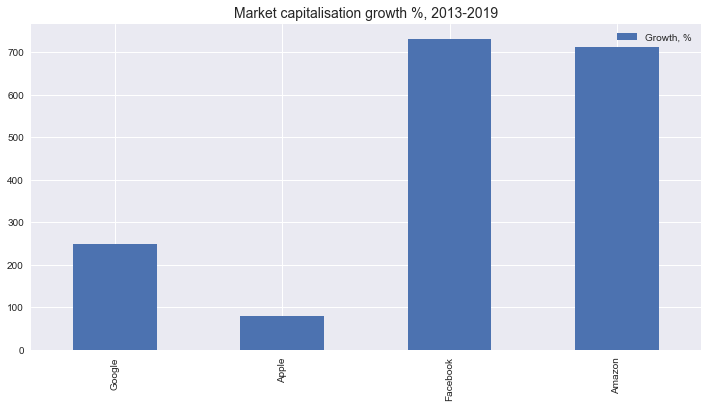

In [53]:
market_cap = []
for cap in df_cap:
    roi = ((df_cap[cap][-1]-df_cap[cap][0])/df_cap[cap][0])*100
    
    market_cap.append(roi)

df_market_cap = pd.DataFrame(market_cap,  index=['Google', 'Apple', 'Facebook', 'Amazon'], columns = ['Growth, %'])

market_cap_plot = df_market_cap.plot.bar(figsize=(12,6))
market_cap_plot.set_title('Market capitalisation growth %, 2013-2019', fontsize=14 )
df_market_cap

Market capitalization for Facebook and Amazon increased by 731% and 712% which is very impressive or about 8 times!
Market capitalisation for Google increased for about 250% which is also great result.
Market capitalization for Apple increased at about 80% or almost doubled.<p>

So as a conclusion it could be said that Facebook and Amazon performed better than others with impressive results, stock prices increased at about 7 times and companies market capitalisation at about 8 times.

All four companies are from tecnological sector and more precisely from Internet industry and depend very much on internet and mobile technologies and their spread worldwide. So as a next step of analysis it is proposed to look at the data on Internet and mobile users in the world and its evolution during last years.


### 1.7. Internet and Mobile users data

Success of GAFA can be partly explained by growing popularity of Internet and mobile technologies. Number of Internet and mobile users has been growing constantly during last 10-15 years. To enlarge the vision of GAFA success and its performance let's look how number of Internet and mobile users changed during the analysed period (2013-2019).

It would also interesting to split users geographically by regions and see the difference between them.

#### 1.7.1. Download and transpose the dara

Data source for this analysis is International Telecommunications Union (https://www.itu.int/en/ITU-D/Statistics/Pages/default.aspx) which are provided in csv format.

In [54]:
#Internet users in the world by regions, millions

df_web = pd.read_excel('InternetUsers.xlsx', sheet_name='Internet_users')
df_web = df_web.iloc[:,7:].round(2)
df_web.head()


2012     2013     2014     2015     2016     2017  2018*
Africa             85.26   107.24   131.83   163.79   190.11   213.33    242
Arab States       106.31   120.22   135.37   150.92   162.08   172.69    196
Asia & Pacific   1109.67  1239.01  1397.24  1552.23  1696.88  1813.02   1943
CIS               139.13   153.45   162.95   173.66   183.16   190.62    200
Europe            434.35   446.87   461.31   472.27   489.94   501.04    520

Here we downloaded file with number of Internet users by regions. Data are provided on yearly basis, 2018 figures are an estimation.

<i><font, size=2>CIS - The Commonwealth of Independent States (CIS) is a regional intergovernmental organization of 10 post-Soviet republics in Eurasia formed following the dissolution of the Soviet Union. It has an area of 20,368,759 km² (8,097,484 sq mi) and has an estimated population of 239,796,010.<br>
Source: https://en.wikipedia.org/wiki/Commonwealth_of_Independent_States</i></font>


Let's download data for mobile users.

In [55]:
#Mobile users in the world by regions, millions

df_mob = pd.read_excel('InternetUsers.xlsx', sheet_name='Mobile_subsriptions')
df_mob = df_mob.iloc[:,7:].round(2)
df_mob.head()

2012     2013     2014     2015     2016     2017    2018*
Africa            510.18   580.90   643.55   714.16   713.56   744.21   781.12
Arab States       381.64   407.70   415.03   417.20   415.56   422.70   435.61
Asia & Pacific   3234.35  3463.40  3680.55  3778.08  4093.94  4350.91  4625.94
CIS               305.51   318.85   323.19   328.61   332.37   333.42   331.19
Europe            800.41   813.83   809.37   807.16   809.58   811.14   814.81

Donwloaded data are of the same structure as for internet users. They are provided on yearly basis with an estimation for 2018.

To facilitate further analysis let's transpose both data frames, so thy are in the same format as data frames we used before, where years (dates) are index.

In [56]:
#Transpose dataset, Internet users

df_web_new = df_web.T
df_web_new

Africa   Arab States   Asia & Pacific     CIS   Europe   The Americas 
2012     85.26        106.31          1109.67  139.13   434.35         526.12
2013    107.24        120.22          1239.01  153.45   446.87         540.60
2014    131.83        135.37          1397.24  162.95   461.31         566.78
2015    163.79        150.92          1552.23  173.66   472.27         612.23
2016    190.11        162.08          1696.88  183.16   489.94         637.05
2017    213.33        172.69          1813.02  190.62   501.04         661.90
2018*   242.00        196.00          1943.00  200.00   520.00         688.00

In [57]:
#Transpose dataset, mobile users

df_mob_new = df_mob.T
df_mob_new

Africa   Arab States   Asia & Pacific     CIS   Europe   The Americas 
2012    510.18        381.64          3234.35  305.51   800.41         994.92
2013    580.90        407.70          3463.40  318.85   813.83        1042.98
2014    643.55        415.03          3680.55  323.19   809.37        1092.86
2015    714.16        417.20          3778.08  328.61   807.16        1102.60
2016    713.56        415.56          4093.94  332.37   809.58        1113.91
2017    744.21        422.70          4350.91  333.42   811.14        1119.54
2018*   781.12        435.61          4625.94  331.19   814.81        1139.92

#### 1.7.2. Exploratory analysis
Now let's visualize data to get a first idea about it.

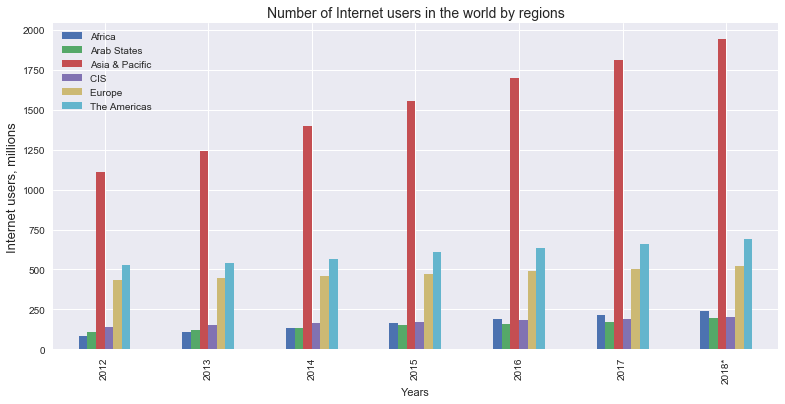

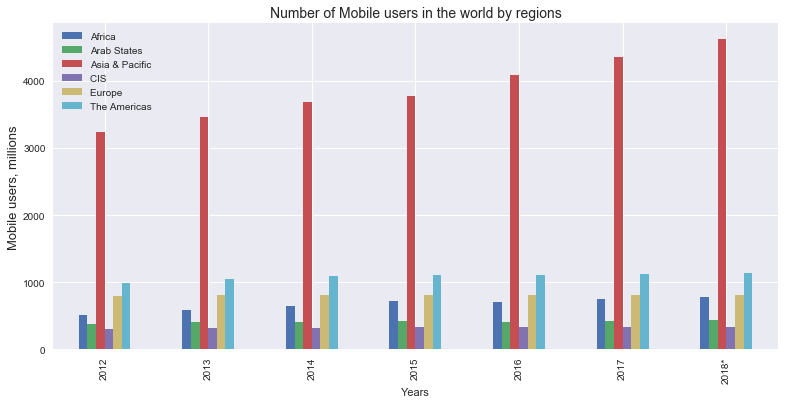

In [58]:
#Visualize dataset - Mobile Users in the world, by regions

web_plot = df_web_new.plot.bar(figsize=(13,6))
web_plot.set_title('Number of Internet users in the world by regions', fontsize=14)
web_plot.set_ylabel('Internet users, millions', fontsize=13)
web_plot.set_xlabel('Years')

mob_plot = df_mob_new.plot.bar(figsize=(13,6))
mob_plot.set_title('Number of Mobile users in the world by regions', fontsize=14)
mob_plot.set_ylabel('Mobile users, millions', fontsize=13)
mob_plot.set_xlabel('Years')
plt.show()


Here we can see a visible trend for increasing of number of Internet and mobile users. This is the case for each region. We can see as well that the biggest region in terms of number of users is Asia & Pasific. 

To see more in detail every region and its 'part', let's visualise data in a stacked plots

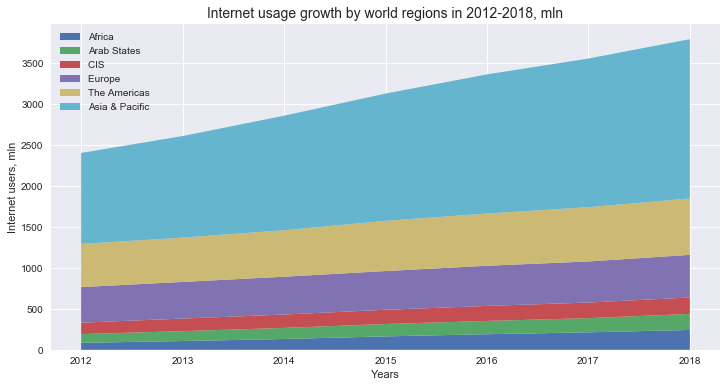

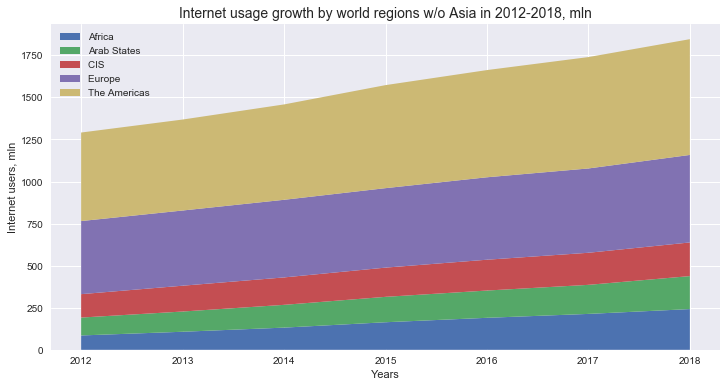

In [59]:
#Visualize dataset, Internet Users 

x = [2012,2013,2014,2015,2016,2017,2018]

fig, ax = plt.subplots(figsize=(12, 6))

labels = ['Africa ', 'Arab States ', 'CIS ', 'Europe ',   'The Americas ', 'Asia & Pacific ']
ax.stackplot(x, df_web_new['Africa '], df_web_new['Arab States '], df_web_new['CIS '], df_web_new['Europe '], 
             df_web_new['The Americas '], df_web_new['Asia & Pacific '], labels = labels )

ax.legend(loc='upper left')
plt.title('Internet usage growth by world regions in 2012-2018, mln', fontsize=14)
plt.ylabel('Internet users, mln')
plt.xlabel('Years')
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))

labels = ['Africa ', 'Arab States ', 'CIS ', 'Europe ',   'The Americas ']
ax.stackplot(x, df_web_new['Africa '], df_web_new['Arab States '], df_web_new['CIS '], df_web_new['Europe '], 
             df_web_new['The Americas '], labels = labels )

ax.legend(loc='upper left')
plt.title('Internet usage growth by world regions w/o Asia in 2012-2018, mln', fontsize=14)
plt.ylabel('Internet users, mln')
plt.xlabel('Years')
plt.show()


Here we can see clearer the trend for growth as well as a share of each region. The largest one is Asia & Pacific, then the Americas and Europe and then three smaller regions in terms of number of users which are: CIS, Arab States and Africa.

Europe's and Americas's shares are quite steady that can be explaned by high penetration of Internet in these countries; while Asia and Africa's ones have visible trend to growth which would demonstrate that level of Internet penetration is not achieved its maximum and there is a potential for further growth of internet users.


Let's plot in the same manner data for mobile users

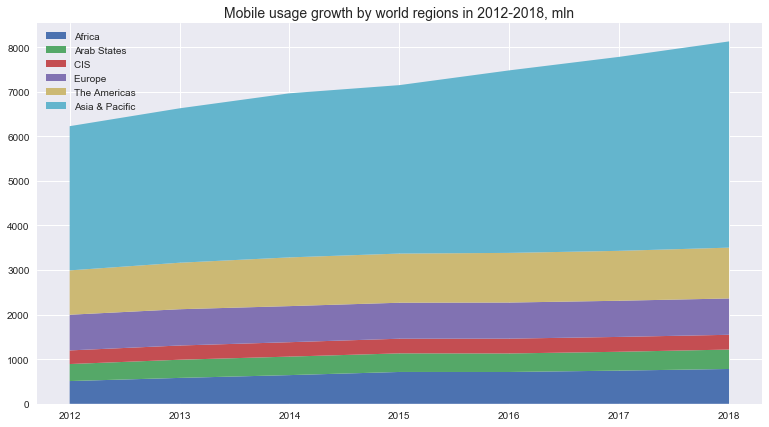

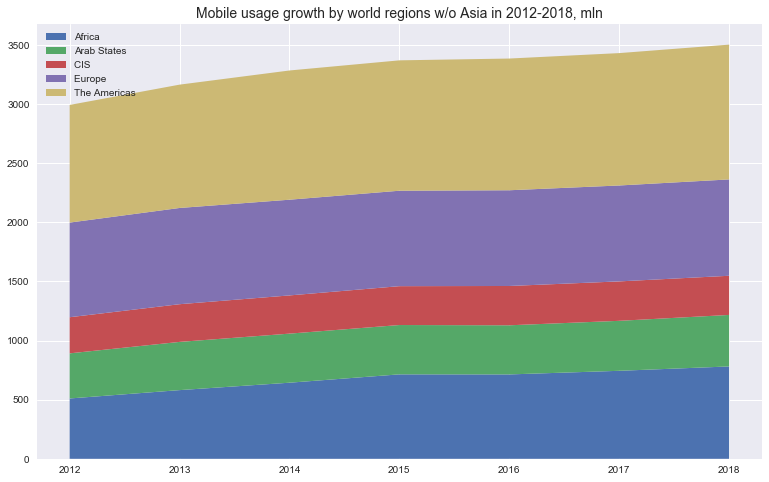

In [60]:
#Visualize dataset - Mobile Users in the world, by regions -2 

x = [2012,2013,2014,2015,2016,2017,2018]


fig, ax = plt.subplots(figsize=(13, 7))

labels = ['Africa ', 'Arab States ', 'CIS ', 'Europe ',   'The Americas ', 'Asia & Pacific ']
ax.stackplot(x, df_mob_new['Africa '], df_mob_new['Arab States '], df_mob_new['CIS '], df_mob_new['Europe '], 
             df_mob_new['The Americas '], df_mob_new['Asia & Pacific '], labels = labels )

ax.legend(loc='upper left')
plt.title('Mobile usage growth by world regions in 2012-2018, mln', fontsize=14)

plt.show()

fig, ax = plt.subplots(figsize=(13, 8))

labels = ['Africa ', 'Arab States ', 'CIS ', 'Europe ',   'The Americas ', 'Asia & Pacific ']
ax.stackplot(x, df_mob_new['Africa '], df_mob_new['Arab States '], df_mob_new['CIS '], df_mob_new['Europe '], 
             df_mob_new['The Americas '], labels = labels )

ax.legend(loc='upper left')
plt.title('Mobile usage growth by world regions w/o Asia in 2012-2018, mln', fontsize=14)

plt.show()

Here we can see the same pattern as above, however it can be stated that there is significant difference in absolute numbers of users: number of mobile users is much higher (about 8 bln) than internet users (about 3,7 bln).

#### 1.7.3. Mobile users & Internet users data manipulating

To use this data in further predictive analysis it is necessary to realize some manipulations in order they are of the same cardinality as stock market data. So it should be transformed from yearly scale to daily scale. It could be achieved by adding intermediate values using polyfit and polyval methods.

In [61]:
df_mob_new['Number'] = [1,2,3,4,5,6,7]
df_mob_new

Africa   Arab States   Asia & Pacific     CIS   Europe   The Americas   \
2012    510.18        381.64          3234.35  305.51   800.41         994.92   
2013    580.90        407.70          3463.40  318.85   813.83        1042.98   
2014    643.55        415.03          3680.55  323.19   809.37        1092.86   
2015    714.16        417.20          3778.08  328.61   807.16        1102.60   
2016    713.56        415.56          4093.94  332.37   809.58        1113.91   
2017    744.21        422.70          4350.91  333.42   811.14        1119.54   
2018*   781.12        435.61          4625.94  331.19   814.81        1139.92   

       Number  
2012        1  
2013        2  
2014        3  
2015        4  
2016        5  
2017        6  
2018*       7

In [62]:
x = df_mob_new.Number.values

def y_values(y):
    coefs = np.polyfit(x,y,deg=1)
    y_values = np.polyval(coefs, (np.linspace(x.min(), x.max(), num=1592))) #cardinality of stock market data set
    return y_values

Asia_mob_users = y_values(df_mob_new['Asia & Pacific '].values)
Africa__mob_users = y_values(df_mob_new['Africa '].values)
Arab_States__mob_users = y_values(df_mob_new['Arab States '].values)
CIS__mob_users = y_values(df_mob_new['CIS '].values)
Europe__mob_users = y_values(df_mob_new['Europe '].values)
Americas__mob_users = y_values(df_mob_new['The Americas '].values)



With the code above missing values were generated. Now let's add it to main data set

In [63]:
df['Asia_mob_users'] = Asia_mob_users.round(1)
df['Africa__mob_users'] = Africa__mob_users.round(1)
df['Arab_States__mob_users'] = Arab_States__mob_users.round(1)
df['CIS__mob_users'] = CIS__mob_users.round(1)
df['Europe__mob_users'] = Europe__mob_users.round(1)
df['Americas__mob_users'] = Americas__mob_users.round(1)
print(df.shape)
df.head(5)


(1592, 24)


Close Google  Volume Google  Close Apple  Volume Apple   Close FB  \
2013-01-02    359.288177      5115500.0    78.432854   140129500.0  28.000000   
2013-01-03    359.496826      4666500.0    77.442856    88241300.0  27.770000   
2013-01-04    366.600616      5562800.0    75.285713   148583400.0  28.760000   
2013-01-07    365.001007      3332900.0    74.842857   121039100.0  29.420000   
2013-01-08    364.280701      3373900.0    75.044289   114676800.0  29.059999   

             Volume FB  Close Amazon  Volume Amazon  Close S&P 500  \
2013-01-02  69846400.0    257.309998      3271000.0    1462.420044   
2013-01-03  63140600.0    258.480011      2750900.0    1459.369995   
2013-01-04  72715400.0    259.149994      1874200.0    1466.469971   
2013-01-07  83781800.0    268.459991      4910000.0    1461.890015   
2013-01-08  45871300.0    266.380005      3010700.0    1457.150024   

            Volume S&P500         ...           Market Cap Google  \
2013-01-02   4.202600e+09         ...                 238426.3057   
2013-01-03   3.829730e+09         ...                 238564.7561   
2013-01-04   3.424290e+09         ...                 243278.8851   
2013-01-07   3.304970e+09         ...                 242217.3911   
2013-01-08   3.601600e+09         ...                 241739.3847   

            Market Cap APPLE  Market Cap FB  Market Cap AMZN  Asia_mob_users  \
2013-01-02       515560.3722      66416.000      116818.7400          3207.8   
2013-01-03       509048.9501      65870.440      117349.9245          3208.7   
2013-01-04       494873.3253      68218.720      117654.1000          3209.5   
2013-01-07       491962.3066      69787.326      121880.4768          3210.4   
2013-01-08       493286.3538      68931.978      120936.5200          3211.3   

            Africa__mob_users  Arab_States__mob_users  CIS__mob_users  \
2013-01-02              540.1                   393.0           312.4   
2013-01-03              540.2                   393.0           312.4   
2013-01-04              540.4                   393.1           312.4   
2013-01-07              540.6                   393.1           312.4   
2013-01-08              540.7                   393.1           312.4   

            Europe__mob_users  Americas__mob_users  
2013-01-02              805.4               1021.4  
2013-01-03              805.4               1021.5  
2013-01-04              805.4               1021.6  
2013-01-07              805.4               1021.7  
2013-01-08              805.4               1021.7  

[5 rows x 24 columns]

The same approach is applied to generate values on daily basis for Internet users data

In [64]:
df_web_new['Number'] = [1,2,3,4,5,6,7]
df_web_new

Africa   Arab States   Asia & Pacific     CIS   Europe   The Americas   \
2012     85.26        106.31          1109.67  139.13   434.35         526.12   
2013    107.24        120.22          1239.01  153.45   446.87         540.60   
2014    131.83        135.37          1397.24  162.95   461.31         566.78   
2015    163.79        150.92          1552.23  173.66   472.27         612.23   
2016    190.11        162.08          1696.88  183.16   489.94         637.05   
2017    213.33        172.69          1813.02  190.62   501.04         661.90   
2018*   242.00        196.00          1943.00  200.00   520.00         688.00   

       Number  
2012        1  
2013        2  
2014        3  
2015        4  
2016        5  
2017        6  
2018*       7

In [65]:
x = df_web_new.Number.values

def y_values_web(y):
    coefs = np.polyfit(x,y,deg=1)
    y_values_web = np.polyval(coefs, (np.linspace(x.min(), x.max(), num=1592)))
    return y_values_web

Asia_web_users = y_values_web(df_web_new['Asia & Pacific '].values)
Africa__web_users = y_values_web(df_web_new['Africa '].values)
Arab_States__web_users = y_values_web(df_web_new['Arab States '].values)
CIS__web_users = y_values_web(df_web_new['CIS '].values)
Europe__web_users = y_values_web(df_web_new['Europe '].values)
Americas__web_users = y_values_web(df_web_new['The Americas '].values)


With the code above missing values were generated. Now they are added to main data set

In [66]:
df['Asia_web_users'] = Asia_web_users.round(1)
df['Africa__web_users'] = Africa__web_users.round(1)
df['Arab_States__web_users'] = Arab_States__web_users.round(1)
df['CIS__web_users'] = CIS__web_users.round(1)
df['Europe__web_users'] = Europe__web_users.round(1)
df['Americas__web_users'] = Americas__web_users.round(1)
df.tail(5)

Close Google  Volume Google  Close Apple  Volume Apple  \
2019-04-24   1256.000000      1018800.0   207.160004    17540600.0   
2019-04-25   1263.449951      1107300.0   205.279999    18543200.0   
2019-04-26   1272.180054      1241400.0   204.300003    18649100.0   
2019-04-29   1287.579956      2499400.0   204.610001    22204700.0   
2019-04-30   1188.479980      6207000.0   200.669998    46534900.0   

              Close FB   Volume FB  Close Amazon  Volume Amazon  \
2019-04-24  182.580002  37289900.0   1901.750000      3675800.0   
2019-04-25  193.259995  54148800.0   1902.250000      6099100.0   
2019-04-26  191.490005  22075000.0   1950.630005      8432600.0   
2019-04-29  194.779999  19641300.0   1938.430054      4021300.0   
2019-04-30  193.399994  23494700.0   1926.520020      3506000.0   

            Close S&P 500  Volume S&P500         ...           \
2019-04-24    2927.250000   3.448960e+09         ...            
2019-04-25    2926.169922   3.425280e+09         ...            
2019-04-26    2939.879883   3.248500e+09         ...            
2019-04-29    2943.030029   3.118780e+09         ...            
2019-04-30    2945.830078   3.919330e+09         ...            

            Arab_States__mob_users  CIS__mob_users  Europe__mob_users  \
2019-04-24                   434.1           337.0              813.5   
2019-04-25                   434.2           337.0              813.5   
2019-04-26                   434.2           337.1              813.5   
2019-04-29                   434.2           337.1              813.5   
2019-04-30                   434.3           337.1              813.5   

            Americas__mob_users  Asia_web_users  Africa__web_users  \
2019-04-24               1151.6          1956.7              240.9   
2019-04-25               1151.7          1957.2              241.0   
2019-04-26               1151.8          1957.8              241.1   
2019-04-29               1151.9          1958.3              241.2   
2019-04-30               1151.9          1958.8              241.3   

            Arab_States__web_users  CIS__web_users  Europe__web_users  \
2019-04-24                   191.8           201.4              517.1   
2019-04-25                   191.9           201.4              517.2   
2019-04-26                   191.9           201.5              517.2   
2019-04-29                   192.0           201.5              517.3   
2019-04-30                   192.0           201.5              517.3   

            Americas__web_users  
2019-04-24                689.8  
2019-04-25                689.9  
2019-04-26                690.0  
2019-04-29                690.1  
2019-04-30                690.2  

[5 rows x 30 columns]

Here it is main data set with Internet users and mobile users data. Let's do a final check 

In [67]:
#check data frame

print('DataFrame shape:', df.shape)
print('Null values in data frame:',df.isnull().sum().sum())
df.index = pd.to_datetime(df.index)
df.tail()

DataFrame shape: (1592, 30)
Null values in data frame: 0


Close Google  Volume Google  Close Apple  Volume Apple  \
2019-04-24   1256.000000      1018800.0   207.160004    17540600.0   
2019-04-25   1263.449951      1107300.0   205.279999    18543200.0   
2019-04-26   1272.180054      1241400.0   204.300003    18649100.0   
2019-04-29   1287.579956      2499400.0   204.610001    22204700.0   
2019-04-30   1188.479980      6207000.0   200.669998    46534900.0   

              Close FB   Volume FB  Close Amazon  Volume Amazon  \
2019-04-24  182.580002  37289900.0   1901.750000      3675800.0   
2019-04-25  193.259995  54148800.0   1902.250000      6099100.0   
2019-04-26  191.490005  22075000.0   1950.630005      8432600.0   
2019-04-29  194.779999  19641300.0   1938.430054      4021300.0   
2019-04-30  193.399994  23494700.0   1926.520020      3506000.0   

            Close S&P 500  Volume S&P500         ...           \
2019-04-24    2927.250000   3.448960e+09         ...            
2019-04-25    2926.169922   3.425280e+09         ...            
2019-04-26    2939.879883   3.248500e+09         ...            
2019-04-29    2943.030029   3.118780e+09         ...            
2019-04-30    2945.830078   3.919330e+09         ...            

            Arab_States__mob_users  CIS__mob_users  Europe__mob_users  \
2019-04-24                   434.1           337.0              813.5   
2019-04-25                   434.2           337.0              813.5   
2019-04-26                   434.2           337.1              813.5   
2019-04-29                   434.2           337.1              813.5   
2019-04-30                   434.3           337.1              813.5   

            Americas__mob_users  Asia_web_users  Africa__web_users  \
2019-04-24               1151.6          1956.7              240.9   
2019-04-25               1151.7          1957.2              241.0   
2019-04-26               1151.8          1957.8              241.1   
2019-04-29               1151.9          1958.3              241.2   
2019-04-30               1151.9          1958.8              241.3   

            Arab_States__web_users  CIS__web_users  Europe__web_users  \
2019-04-24                   191.8           201.4              517.1   
2019-04-25                   191.9           201.4              517.2   
2019-04-26                   191.9           201.5              517.2   
2019-04-29                   192.0           201.5              517.3   
2019-04-30                   192.0           201.5              517.3   

            Americas__web_users  
2019-04-24                689.8  
2019-04-25                689.9  
2019-04-26                690.0  
2019-04-29                690.1  
2019-04-30                690.2  

[5 rows x 30 columns]

After exploratory data analysis let's move to the predictive part of projet

## PART II. Predictive analysis

In the second part of project let's fit different models to predict stock prices changes for GAFA. Stock market is highly volatile and is influenced by many factors with a strong part of psychological, political and others not related directly to data. To face these limitations, predictive analysis will be focused on prediction price change, i.e. whether stock price will be go up or down. So it means that approach applied is a <b>supervised classification problem.</b>

First let's start with features engineering and data preprocessing.

### 2.1. Features engineering & Data preprocessing
First, let's apply logarithmic transformation to data set.

In [68]:
#logarithmic transformation of data set

df_log = np.log(df)
df_log.tail(5)

Close Google  Volume Google  Close Apple  Volume Apple  Close FB  \
2019-04-24      7.135687      13.834136     5.333491     16.680029  5.207188   
2019-04-25      7.141601      13.917435     5.324375     16.735614  5.264036   
2019-04-26      7.148487      14.031750     5.319590     16.741308  5.254836   
2019-04-29      7.160520      14.731561     5.321106     16.915815  5.271871   
2019-04-30      7.080430      15.641188     5.301662     17.655713  5.264761   

            Volume FB  Close Amazon  Volume Amazon  Close S&P 500  \
2019-04-24  17.434233      7.550530      15.117281       7.981819   
2019-04-25  17.807246      7.550793      15.623652       7.981450   
2019-04-26  16.909956      7.575908      15.947616       7.986124   
2019-04-29  16.793145      7.569634      15.207116       7.987195   
2019-04-30  16.972285      7.563471      15.069986       7.988146   

            Volume S&P500         ...           Arab_States__mob_users  \
2019-04-24      21.961339         ...                         6.073275   
2019-04-25      21.954449         ...                         6.073505   
2019-04-26      21.901459         ...                         6.073505   
2019-04-29      21.860708         ...                         6.073505   
2019-04-30      22.089187         ...                         6.073736   

            CIS__mob_users  Europe__mob_users  Americas__mob_users  \
2019-04-24        5.820083           6.701346             7.048908   
2019-04-25        5.820083           6.701346             7.048994   
2019-04-26        5.820380           6.701346             7.049081   
2019-04-29        5.820380           6.701346             7.049168   
2019-04-30        5.820380           6.701346             7.049168   

            Asia_web_users  Africa__web_users  Arab_States__web_users  \
2019-04-24        7.579015           5.484382                5.256453   
2019-04-25        7.579270           5.484797                5.256974   
2019-04-26        7.579577           5.485212                5.256974   
2019-04-29        7.579832           5.485626                5.257495   
2019-04-30        7.580087           5.486041                5.257495   

            CIS__web_users  Europe__web_users  Americas__web_users  
2019-04-24        5.305293           6.248236             6.536402  
2019-04-25        5.305293           6.248430             6.536547  
2019-04-26        5.305789           6.248430             6.536692  
2019-04-29        5.305789           6.248623             6.536837  
2019-04-30        5.305789           6.248623             6.536981  

[5 rows x 30 columns]

As we are operating with time-series data it is necessary to process preprocess the data adding previous time steps as input variables and use then next time step as the output variable.

Let's now add to data set features with previous days stock prices data.
To automate this process a function is created.

In [69]:
#Function to apply sliding window method with an option to tune window width (j)

def dataset(df, j, dropnan=True): #data frame, window width (j)
    cols, names = list(), list()
    
    for i in range(j, -1, -1):
        cols.append(df.shift(i)) #prices for previous days
        if i == 0:
            names += [('Day price (t)')] #Day price
        else:
            names += [('(t-%d)' % (i))]  #Price for previous days, (t-1), (t-2) etc.                
          
        data = pd.concat(cols, axis=1).diff() #concatenate and calculate difference between consecutive values
        
    if dropnan:
        data.dropna(inplace=True) # drop rows with NaN values
        data.columns = names
    return data


In [70]:
#Check the function on Google data with a window width of 5

google_data = dataset(df_log['Close Google'], 5)
google_data.tail()

(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)
2019-04-24  0.004926  0.007477  0.000024  0.010035  0.012501      -0.006784
2019-04-25  0.007477  0.000024  0.010035  0.012501 -0.006784       0.005914
2019-04-26  0.000024  0.010035  0.012501 -0.006784  0.005914       0.006886
2019-04-29  0.010035  0.012501 -0.006784  0.005914  0.006886       0.012032
2019-04-30  0.012501 -0.006784  0.005914  0.006886  0.012032      -0.080089

It seems that the function works.

Now we can start to fit a model.
First model proposed is k-Nearest Neighbors (k-NN)

### 2.2. K-Nearest Neighbors 

First,  Scikit-learn objects are downloaded.

Then a function is created which:
- defines input matrix and output vector,
- realizes train/test split,
- sets baseline for classification task,
- creates a classifier,
- defines a grid of values for hyperparameters,
- fits classifier,
- computes accuracy score and collects it and parameters values to Pandas DataFrame.


In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from sklearn.dummy import DummyClassifier


#function for k-NN model 

def data(df):
    #Input matrix
    X = df.values

    #Target variable
    y = np.where(df['Day price (t)'].shift(-1) > 0, 1, -1) #if next day log price percent change is positive 
                                                           #then '1', otherwise '-1'
    
    #Train/Test split
    split_share = 0.8
    split = int(split_share*len(df))

    # Train set
    X_train = X[:split]
    y_train = y[:split]
    
    #Test set
    X_test = X[split:]
    y_test = y[split:]
    
    #Print train/test sets's shapes
    print('Train set shape:', X_train.shape, y_train.shape )
    print('Test set shape:', X_test.shape, y_test.shape )      
    
    
    #create the dummy classifier
    dummy = DummyClassifier(strategy='most_frequent')
    
    #fit it to the train data
    dummy.fit(X_train, y_train)
    
    #Compute accuracy on the test set
    baseline_accuracy = dummy.score(X_test, y_test)
    print('Baseline accuracy: {:.3f}'.format(baseline_accuracy))
    
    
    #Create k-NN classifier
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
    ])

    #Define a grid of values for parameters
    grid = ParameterGrid({
        'knn__n_neighbors': [2, 5, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50],
        'knn__weights': ['uniform', 'distance'],
        'knn__p': [1,2]    
    })
    
    #Save accuracy on test set
    test_scores =[]
    
    for params_dict in grid:
        
        #Set parameters
        pipe.set_params(**params_dict)
        
        #Fit classifier
        pipe.fit(X_train, y_train)
        
        #Save accuracy on test set
        params_dict['accuracy'] = pipe.score(X_test, y_test)
        
        #Save result
        test_scores.append(params_dict)
    
    #Create data frame with test scores
    df_knn = pd.DataFrame(test_scores)
    
    #Top scores
    return df_knn.sort_values(by='accuracy', ascending=False).head()


Now as function is defined, let's apply it to google data with 5 days window width.





<img src ='googlelogo.png'>  
#### 2.2.1. Google: KNN 
##### 2.2.1.1. Google-1: Simple model (5 days window width)

In [72]:
#Apply function to fit KNN clasifier to Google data with a window width of 5
google_acc = data(google_data)
google_acc.head()

Train set shape: (1268, 6) (1268,)
Test set shape: (318, 6) (318,)
Baseline accuracy: 0.522


accuracy  knn__n_neighbors  knn__p knn__weights
46  0.553459                50       2      uniform
42  0.553459                45       2      uniform
44  0.547170                50       1      uniform
47  0.540881                50       2     distance
10  0.534591                 7       2      uniform

We can see that the baseline accuracy is about 0.52.
Maximal accuracy is about 0.55 on a test dataset, slightly better than baseline. That means that a little bit more than half of prediction will be correct.<br>

Let's automate the process of finding the combination with the best  accuracy...

In [73]:
#Find the combination with the best  accuracy 

def data_accuracy(data_acc):
    idx = np.argmax(data_acc.accuracy)
    top_accuracy = data_acc.accuracy[idx]
    k = data_acc.knn__n_neighbors[idx]
    d = data_acc.knn__p[idx]
    w = data_acc.knn__weights[idx]
    return print('Top_accuracy on test set: {:.2f} with k={}, distance metric={}, weighting function={}'.format(top_accuracy, k, d, w))

...and apply defined function.

In [74]:
#Find the combination with the best accuracy

data_accuracy(google_acc)

Top_accuracy on test set: 0.55 with k=50, distance metric=2, weighting function=uniform


C:\Users\User1\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Let's now visualise accuracies and  and put it into the Performance data frame to compare.

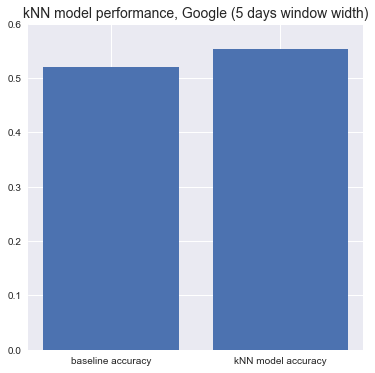

In [75]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.52, 0.553])
plt.xticks([1,2], ['baseline accuracy', 'kNN model accuracy'])
plt.ylim(0, 0.6)
plt.title('kNN model performance, Google (5 days window width)', fontsize=14);

In [76]:
#compare  performances

#model performance data frame
knn_google_simple = [0.522, 0.553]

df_performance_knn = pd.DataFrame({
                'knn_google_simple_model': knn_google_simple,
                
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance_knn

Baseline accuracy  Model accuracy
knn_google_simple_model              0.522           0.553

We can see on the plot that model accuracy in slightly better than baseline's.


Now let's define the function to compute predictions using hyperparameters to best model performance

In [77]:
#Function to fit classifier with values parameters and to compute predictions

def data_tuned(df, k, d, w):  #k - n_neighbors, d -distance metric, w - weights
    #Input matrix
    X = df.values

    #Target variable
    y = np.where(df['Day price (t)'].shift(-1) > 0, 1, -1) #if next day log price percent change is positive 
                                                           #then '1', otherwise '-1'
    
     #Train/Test split
    split_share = 0.8
    split = int(split_share*len(df))

    # Train set
    X_train = X[:split]
    y_train = y[:split]
    
    #Test set
    X_test = X[split:]
    y_test = y[split:]
    
    #Create k-NN classifier
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
    ])
           
    #Set parameters
    pipe.set_params(knn__n_neighbors=k, knn__p=d, knn__weights=w)
        
    #Fit classifier
    pipe.fit(X_train, y_train)
    
    #Compute predictions
    predictions = pipe.predict(X)    
        
    return predictions


With the function above, predictions are computed on Google data, with window width of 5.

In [78]:
#Compute predictions for Google data
#Put predictions in data frame with Google data

predictions_google = data_tuned(google_data, 50, 2, 'uniform')
google_data['y'] = np.where(google_data['Day price (t)'].shift(-1) > 0, 1, -1)
google_data['Predictions'] = predictions_google 
google_data.tail(5)


(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24  0.004926  0.007477  0.000024  0.010035  0.012501      -0.006784   
2019-04-25  0.007477  0.000024  0.010035  0.012501 -0.006784       0.005914   
2019-04-26  0.000024  0.010035  0.012501 -0.006784  0.005914       0.006886   
2019-04-29  0.010035  0.012501 -0.006784  0.005914  0.006886       0.012032   
2019-04-30  0.012501 -0.006784  0.005914  0.006886  0.012032      -0.080089   

            y  Predictions  
2019-04-24  1           -1  
2019-04-25  1           -1  
2019-04-26  1            1  
2019-04-29 -1           -1  
2019-04-30 -1           -1

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

Now let's compute cumulative log returns and cumulative predicted log returns and visualiye it to compare.
Cumulative log returns is a cumulative sum of daily log returns.

Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 


In [79]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
google_data['Cumulative_returns'] = google_data[split:]['Day price (t)'].cumsum()*100
g_cumulative_returns = google_data['Cumulative_returns']


#Compute cumulative predicted returns
#predicted returns = day price (log return, absolute value) * predicted signal('1' or '-1') for this day (prediction signal 
#from previous day for current day).

google_data['Predicted returns'] = (np.abs(google_data['Day price (t)']))*(google_data['Predictions'].shift(1))

google_data['Predicted returns_cum'] = google_data[split:]['Predicted returns'].cumsum()*100
g_predicted_returns_cum = google_data['Predicted returns_cum']

google_data.tail()

(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24  0.004926  0.007477  0.000024  0.010035  0.012501      -0.006784   
2019-04-25  0.007477  0.000024  0.010035  0.012501 -0.006784       0.005914   
2019-04-26  0.000024  0.010035  0.012501 -0.006784  0.005914       0.006886   
2019-04-29  0.010035  0.012501 -0.006784  0.005914  0.006886       0.012032   
2019-04-30  0.012501 -0.006784  0.005914  0.006886  0.012032      -0.080089   

            y  Predictions  Cumulative_returns  Predicted returns  \
2019-04-24  1           -1           17.231768           0.006784   
2019-04-25  1           -1           17.823165          -0.005914   
2019-04-26  1            1           18.511762          -0.006886   
2019-04-29 -1           -1           19.715006           0.012032   
2019-04-30 -1           -1           11.706077          -0.080089   

            Predicted returns_cum  
2019-04-24               8.529962  
2019-04-25               7.938565  
2019-04-26               7.249968  
2019-04-29               8.453213  
2019-04-30               0.444284

Let's now visualize cumulative returns and predicted cumulative returns

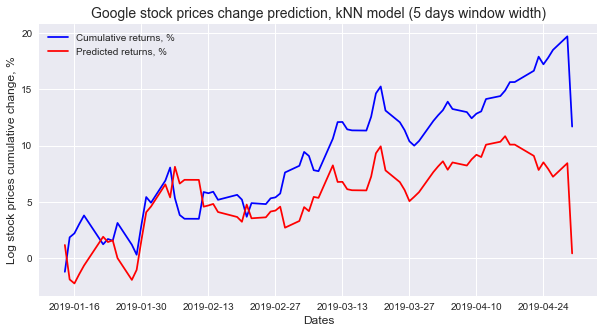

In [80]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(g_cumulative_returns, color = 'b', label = 'Cumulative returns, %')
plt.plot(g_predicted_returns_cum, color = 'r', label = 'Predicted returns, %')
plt.title('Google stock prices change prediction, kNN model (5 days window width)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Log stock prices cumulative change, %', fontsize=12)
plt.legend()
plt.show()

On the plot we can see that Cumulative returns for 2019  are around 11% and cumulative predicted returns in the same period are around 0.44%

##### 2.2.1.2. Google-2: Intermediate model (10 days window width)

Create data set with 10 days window width on google data

In [81]:
google_data_10d = dataset(df_log['Close Google'], 10)
google_data_10d.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.005489  0.004093  0.002044  0.010939  0.002649  0.004926   
2019-04-25  0.004093  0.002044  0.010939  0.002649  0.004926  0.007477   
2019-04-26  0.002044  0.010939  0.002649  0.004926  0.007477  0.000024   
2019-04-29  0.010939  0.002649  0.004926  0.007477  0.000024  0.010035   
2019-04-30  0.002649  0.004926  0.007477  0.000024  0.010035  0.012501   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  
2019-04-24  0.007477  0.000024  0.010035  0.012501      -0.006784  
2019-04-25  0.000024  0.010035  0.012501 -0.006784       0.005914  
2019-04-26  0.010035  0.012501 -0.006784  0.005914       0.006886  
2019-04-29  0.012501 -0.006784  0.005914  0.006886       0.012032  
2019-04-30 -0.006784  0.005914  0.006886  0.012032      -0.080089

In [82]:
#Apply function to fit KNN to Google data set with window width of 10.

google_acc_10d = data(google_data_10d)
google_acc_10d.head()

Train set shape: (1264, 11) (1264,)
Test set shape: (317, 11) (317,)
Baseline accuracy: 0.521


accuracy  knn__n_neighbors  knn__p knn__weights
4   0.548896                 5       1      uniform
5   0.548896                 5       1     distance
46  0.539432                50       2      uniform
47  0.536278                50       2     distance
45  0.536278                50       1     distance

Baseline aacuracy is about 0.521 and best model accuracy is about 0.548.

Choose combination with the best accuracy.

In [83]:
data_accuracy(google_acc_10d)

Top_accuracy on test set: 0.55 with k=5, distance metric=1, weighting function=uniform


C:\Users\User1\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Let's now visualise accuracies and  and put it into the Performance data frame to compare.

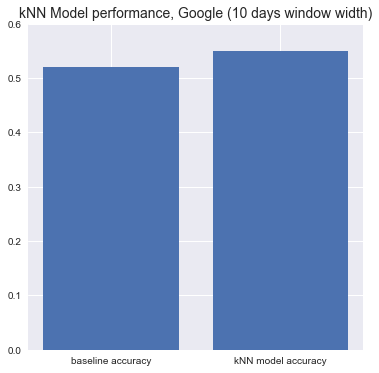

In [84]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.52, 0.55])
plt.xticks([1,2], ['baseline accuracy', 'kNN model accuracy'])
plt.ylim(0, 0.6)
plt.title('kNN Model performance, Google (10 days window width)', fontsize=14);

In [85]:
#compare  performances

#model performance data frame
knn_google_simple = [0.522, 0.553]
knn_google_intermediate = [0.521, 0.548]

df_performance_knn = pd.DataFrame({
                'knn_Google_simple_model': knn_google_simple,
                'knn_Google_intermediate_model': knn_google_intermediate
                
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance_knn

Baseline accuracy  Model accuracy
knn_Google_intermediate_model              0.521           0.548
knn_Google_simple_model                    0.522           0.553

Compute predictions for Google data<br>
Put predictions in data frame with Google data

In [86]:

predictions_google_10d = data_tuned(google_data_10d, 5, 1, 'uniform')

google_data_10d['y'] = np.where(google_data_10d['Day price (t)'].shift(-1) > 0, 1, -1) #target values
google_data_10d['Predictions'] = predictions_google_10d #predicted signal
google_data_10d.tail()


(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.005489  0.004093  0.002044  0.010939  0.002649  0.004926   
2019-04-25  0.004093  0.002044  0.010939  0.002649  0.004926  0.007477   
2019-04-26  0.002044  0.010939  0.002649  0.004926  0.007477  0.000024   
2019-04-29  0.010939  0.002649  0.004926  0.007477  0.000024  0.010035   
2019-04-30  0.002649  0.004926  0.007477  0.000024  0.010035  0.012501   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-24  0.007477  0.000024  0.010035  0.012501      -0.006784  1   
2019-04-25  0.000024  0.010035  0.012501 -0.006784       0.005914  1   
2019-04-26  0.010035  0.012501 -0.006784  0.005914       0.006886  1   
2019-04-29  0.012501 -0.006784  0.005914  0.006886       0.012032 -1   
2019-04-30 -0.006784  0.005914  0.006886  0.012032      -0.080089 -1   

            Predictions  
2019-04-24            1  
2019-04-25            1  
2019-04-26           -1  
2019-04-29            1  
2019-04-30            1

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

Now let's compute cumulative log returns and cumulative predicted log returns and visualiye it to compare.<br>
Cumulative log returns is a cumulative sum of daily log returns.<br>
Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 

In [87]:
split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
google_data_10d['Cumulative_returns'] = google_data_10d[split:]['Day price (t)'].cumsum()*100
g_cumulative_returns_10d = google_data_10d['Cumulative_returns']

#Compute cumulative predicted returns
google_data_10d['Predicted returns'] = (np.abs(google_data_10d['Day price (t)']))*(google_data_10d['Predictions'].shift(1))
google_data_10d['Predicted returns_cum'] = google_data_10d[split:]['Predicted returns'].cumsum()*100
g_predicted_returns_cum_10d = google_data_10d['Predicted returns_cum']

google_data_10d.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.005489  0.004093  0.002044  0.010939  0.002649  0.004926   
2019-04-25  0.004093  0.002044  0.010939  0.002649  0.004926  0.007477   
2019-04-26  0.002044  0.010939  0.002649  0.004926  0.007477  0.000024   
2019-04-29  0.010939  0.002649  0.004926  0.007477  0.000024  0.010035   
2019-04-30  0.002649  0.004926  0.007477  0.000024  0.010035  0.012501   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-24  0.007477  0.000024  0.010035  0.012501      -0.006784  1   
2019-04-25  0.000024  0.010035  0.012501 -0.006784       0.005914  1   
2019-04-26  0.010035  0.012501 -0.006784  0.005914       0.006886  1   
2019-04-29  0.012501 -0.006784  0.005914  0.006886       0.012032 -1   
2019-04-30 -0.006784  0.005914  0.006886  0.012032      -0.080089 -1   

            Predictions  Cumulative_returns  Predicted returns  \
2019-04-24            1           13.420495           0.006784   
2019-04-25            1           14.011892           0.005914   
2019-04-26           -1           14.700489           0.006886   
2019-04-29            1           15.903734          -0.012032   
2019-04-30            1            7.894804           0.080089   

            Predicted returns_cum  
2019-04-24              -7.126145  
2019-04-25              -6.534748  
2019-04-26              -5.846151  
2019-04-29              -7.049396  
2019-04-30               0.959533

Let's visualize cumulative returns and predicted cumulative returns

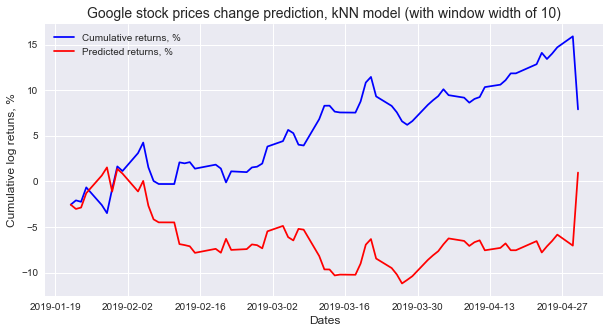

In [88]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(g_cumulative_returns_10d, color = 'b', label = 'Cumulative returns, %')
plt.plot(g_predicted_returns_cum_10d, color = 'r', label = 'Predicted returns, %')
plt.title('Google stock prices change prediction, kNN model (with window width of 10)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

On the plot we can see that Cumulative returns for 2019  are around 7,8% and Cumulative predicted returns in the same period are around 1%.

As a next step, let's try fit the model to dataset with all features (indexes, capitalistaion, mobile and Internet users)

##### 2.2.1.3. Google-3: Complex model (all variables and 10 days window width)

In [89]:
google_data_10d = dataset(df_log['Close Google'], 10)
google_data_10d.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17  0.000581  0.019568 -0.004373 -0.001975  0.006552  0.004542   
2013-01-18  0.019568 -0.004373 -0.001975  0.006552  0.004542 -0.002011   
2013-01-22 -0.004373 -0.001975  0.006552  0.004542 -0.002011 -0.022882   
2013-01-23 -0.001975  0.006552  0.004542 -0.002011 -0.022882  0.002320   
2013-01-24  0.006552  0.004542 -0.002011 -0.022882  0.002320 -0.013527   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  
2013-01-17 -0.002011 -0.022882  0.002320 -0.013527      -0.005426  
2013-01-18 -0.022882  0.002320 -0.013527 -0.005426      -0.009620  
2013-01-22  0.002320 -0.013527 -0.005426 -0.009620      -0.002331  
2013-01-23 -0.013527 -0.005426 -0.009620 -0.002331       0.053503  
2013-01-24 -0.005426 -0.009620 -0.002331  0.053503       0.016996

In [90]:
google_data_10d_full = pd.concat([google_data_10d, df_log], axis=1)
google_data_10d_full.dropna(inplace=True)
google_data_10d_full.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17  0.000581  0.019568 -0.004373 -0.001975  0.006552  0.004542   
2013-01-18  0.019568 -0.004373 -0.001975  0.006552  0.004542 -0.002011   
2013-01-22 -0.004373 -0.001975  0.006552  0.004542 -0.002011 -0.022882   
2013-01-23 -0.001975  0.006552  0.004542 -0.002011 -0.022882  0.002320   
2013-01-24  0.006552  0.004542 -0.002011 -0.022882  0.002320 -0.013527   

               (t-4)     (t-3)     (t-2)     (t-1)         ...           \
2013-01-17 -0.002011 -0.022882  0.002320 -0.013527         ...            
2013-01-18 -0.022882  0.002320 -0.013527 -0.005426         ...            
2013-01-22  0.002320 -0.013527 -0.005426 -0.009620         ...            
2013-01-23 -0.013527 -0.005426 -0.009620 -0.002331         ...            
2013-01-24 -0.005426 -0.009620 -0.002331  0.053503         ...            

            Arab_States__mob_users  CIS__mob_users  Europe__mob_users  \
2013-01-17                5.974573        5.744604           6.691463   
2013-01-18                5.974573        5.744924           6.691463   
2013-01-22                5.974827        5.744924           6.691463   
2013-01-23                5.974827        5.744924           6.691463   
2013-01-24                5.974827        5.744924           6.691463   

            Americas__mob_users  Asia_web_users  Africa__web_users  \
2013-01-17             6.929810        7.020012           4.427239   
2013-01-18             6.929908        7.020459           4.428433   
2013-01-22             6.930006        7.020905           4.429626   
2013-01-23             6.930104        7.021352           4.430817   
2013-01-24             6.930104        7.021887           4.432007   

            Arab_States__web_users  CIS__web_users  Europe__web_users  \
2013-01-17                4.670021        4.960044           6.071892   
2013-01-18                4.670958        4.960044           6.071892   
2013-01-22                4.671894        4.960044           6.072122   
2013-01-23                4.671894        4.960745           6.072122   
2013-01-24                4.672829        4.960745           6.072353   

            Americas__web_users  
2013-01-17             6.254406  
2013-01-18             6.254598  
2013-01-22             6.254790  
2013-01-23             6.254982  
2013-01-24             6.255174  

[5 rows x 41 columns]

In [91]:
#Apply function to fit KNN to Google data aet with all variables and 10 days window width

google_acc_10d_full = data(google_data_10d_full)
google_acc_10d_full.head()

Train set shape: (1264, 41) (1264,)
Test set shape: (317, 41) (317,)
Baseline accuracy: 0.521


accuracy  knn__n_neighbors  knn__p knn__weights
22  0.561514                20       2      uniform
30  0.555205                30       2      uniform
14  0.552050                10       2      uniform
23  0.552050                20       2     distance
17  0.545741                15       1     distance

Choose combination with the best accuracy

In [92]:
data_accuracy(google_acc_10d_full)

Top_accuracy on test set: 0.56 with k=20, distance metric=2, weighting function=uniform


C:\Users\User1\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


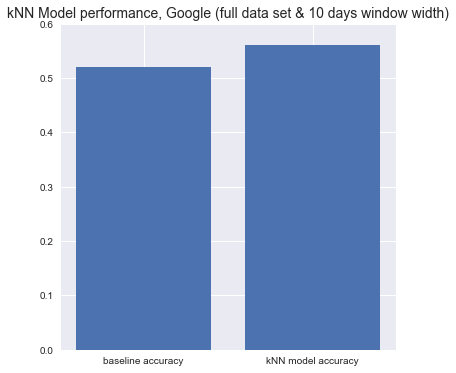

In [93]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.521, 0.561])
plt.xticks([1,2], ['baseline accuracy', 'kNN model accuracy'])
plt.ylim(0, 0.6)
plt.title('kNN Model performance, Google (full data set & 10 days window width)', fontsize=14);

In [94]:
#compare  performances

#model performance data frame
knn_google_simple = [0.522, 0.553]
knn_google_intermediate = [0.521, 0.548]
knn_google_complex = [0.521, 0.561]

df_performance_knn = pd.DataFrame({
                'knn_Google_simple_model': knn_google_simple,
                'knn_Google_intermediate_model': knn_google_intermediate,
                'knn_Google_complex_model' : knn_google_complex
                
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance_knn


Baseline accuracy  Model accuracy
knn_Google_complex_model                   0.521           0.561
knn_Google_intermediate_model              0.521           0.548
knn_Google_simple_model                    0.522           0.553

It seems that the higest accuracy for Google is on Complex model and it is at about 0.56.

In [95]:
#Compute predictions for Google data
#Put predictions in data frame with Google data


predictions_google_10d_full = data_tuned(google_data_10d_full, 20, 2, 'uniform')
google_data_10d_full['Predictions'] = predictions_google_10d_full
google_data_10d_full.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17  0.000581  0.019568 -0.004373 -0.001975  0.006552  0.004542   
2013-01-18  0.019568 -0.004373 -0.001975  0.006552  0.004542 -0.002011   
2013-01-22 -0.004373 -0.001975  0.006552  0.004542 -0.002011 -0.022882   
2013-01-23 -0.001975  0.006552  0.004542 -0.002011 -0.022882  0.002320   
2013-01-24  0.006552  0.004542 -0.002011 -0.022882  0.002320 -0.013527   

               (t-4)     (t-3)     (t-2)     (t-1)     ...       \
2013-01-17 -0.002011 -0.022882  0.002320 -0.013527     ...        
2013-01-18 -0.022882  0.002320 -0.013527 -0.005426     ...        
2013-01-22  0.002320 -0.013527 -0.005426 -0.009620     ...        
2013-01-23 -0.013527 -0.005426 -0.009620 -0.002331     ...        
2013-01-24 -0.005426 -0.009620 -0.002331  0.053503     ...        

            CIS__mob_users  Europe__mob_users  Americas__mob_users  \
2013-01-17        5.744604           6.691463             6.929810   
2013-01-18        5.744924           6.691463             6.929908   
2013-01-22        5.744924           6.691463             6.930006   
2013-01-23        5.744924           6.691463             6.930104   
2013-01-24        5.744924           6.691463             6.930104   

            Asia_web_users  Africa__web_users  Arab_States__web_users  \
2013-01-17        7.020012           4.427239                4.670021   
2013-01-18        7.020459           4.428433                4.670958   
2013-01-22        7.020905           4.429626                4.671894   
2013-01-23        7.021352           4.430817                4.671894   
2013-01-24        7.021887           4.432007                4.672829   

            CIS__web_users  Europe__web_users  Americas__web_users  \
2013-01-17        4.960044           6.071892             6.254406   
2013-01-18        4.960044           6.071892             6.254598   
2013-01-22        4.960044           6.072122             6.254790   
2013-01-23        4.960745           6.072122             6.254982   
2013-01-24        4.960745           6.072353             6.255174   

            Predictions  
2013-01-17           -1  
2013-01-18            1  
2013-01-22           -1  
2013-01-23            1  
2013-01-24            1  

[5 rows x 42 columns]

In columns 'Predictions' there is predicted signal whether stock prices change is positive or negaritve.<br>
Let's now visualize it

In [96]:
split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
google_data_10d_full['Cumulative_returns'] = google_data_10d_full[split:]['Day price (t)'].cumsum()*100
g_cumulative_returns_10d_full = google_data_10d_full['Cumulative_returns']

#Compute cumulative predicted returns
google_data_10d_full['Predicted returns'] = (np.abs(google_data_10d_full['Day price (t)']))*(google_data_10d_full['Predictions'].shift(1))
google_data_10d_full['Predicted returns_cum'] = google_data_10d_full[split:]['Predicted returns'].cumsum()*100
g_predicted_returns_cum_10d_full = google_data_10d_full['Predicted returns_cum']

google_data_10d_full.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.005489  0.004093  0.002044  0.010939  0.002649  0.004926   
2019-04-25  0.004093  0.002044  0.010939  0.002649  0.004926  0.007477   
2019-04-26  0.002044  0.010939  0.002649  0.004926  0.007477  0.000024   
2019-04-29  0.010939  0.002649  0.004926  0.007477  0.000024  0.010035   
2019-04-30  0.002649  0.004926  0.007477  0.000024  0.010035  0.012501   

               (t-4)     (t-3)     (t-2)     (t-1)          ...            \
2019-04-24  0.007477  0.000024  0.010035  0.012501          ...             
2019-04-25  0.000024  0.010035  0.012501 -0.006784          ...             
2019-04-26  0.010035  0.012501 -0.006784  0.005914          ...             
2019-04-29  0.012501 -0.006784  0.005914  0.006886          ...             
2019-04-30 -0.006784  0.005914  0.006886  0.012032          ...             

            Asia_web_users  Africa__web_users  Arab_States__web_users  \
2019-04-24        7.579015           5.484382                5.256453   
2019-04-25        7.579270           5.484797                5.256974   
2019-04-26        7.579577           5.485212                5.256974   
2019-04-29        7.579832           5.485626                5.257495   
2019-04-30        7.580087           5.486041                5.257495   

            CIS__web_users  Europe__web_users  Americas__web_users  \
2019-04-24        5.305293           6.248236             6.536402   
2019-04-25        5.305293           6.248430             6.536547   
2019-04-26        5.305789           6.248430             6.536692   
2019-04-29        5.305789           6.248623             6.536837   
2019-04-30        5.305789           6.248623             6.536981   

            Predictions  Cumulative_returns  Predicted returns  \
2019-04-24            1           13.420495           0.006784   
2019-04-25            1           14.011892           0.005914   
2019-04-26            1           14.700489           0.006886   
2019-04-29           -1           15.903734           0.012032   
2019-04-30           -1            7.894804          -0.080089   

            Predicted returns_cum  
2019-04-24              37.350472  
2019-04-25              37.941869  
2019-04-26              38.630466  
2019-04-29              39.833710  
2019-04-30              31.824781  

[5 rows x 45 columns]

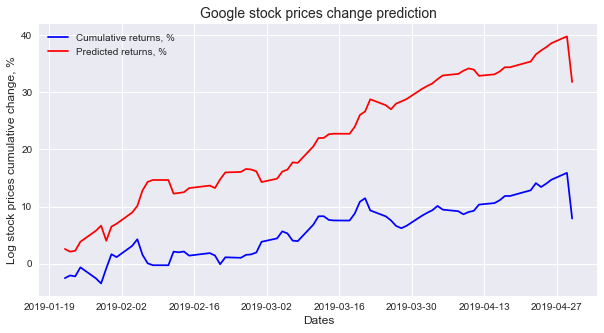

In [97]:
plt.figure(figsize=(10,5))
plt.plot(g_cumulative_returns_10d_full, color = 'b', label = 'Cumulative returns, %')
plt.plot(g_predicted_returns_cum_10d_full, color = 'r', label = 'Predicted returns, %')
plt.title('Google stock prices change prediction', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Log stock prices cumulative change, %', fontsize=12)
plt.legend()
plt.show()

On the plot we can see that Cumulative returns for 2019  are around 7,8% and Cumulative predicted returns in the same period are around 30%. It seems that difference between predicted cumulative returns and cumlutive returns is quite high in this case.

Let's continue with next companie from GAFA list - Apple.


<img src ='Apple.png'>
#### 2.2.2. Apple: kNN model
##### 2.2.2.1. Apple-1: simple model (5 days window width)

The same appoach will be applied, model will be fitted and evaluated on three data sets: simple (5 days window width), intermediate (10 days window width) and complex (all features and 10 days window width).
Let's start with the simple one.

In [98]:
#Create data set on Apple data with window width of 5

apple_data = dataset(df_log['Close Apple'], 5)
apple_data.tail()


(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)
2019-04-24  0.000100  0.019286  0.003587  0.003281  0.014320      -0.001543
2019-04-25  0.019286  0.003587  0.003281  0.014320 -0.001543      -0.009117
2019-04-26  0.003587  0.003281  0.014320 -0.001543 -0.009117      -0.004785
2019-04-29  0.003281  0.014320 -0.001543 -0.009117 -0.004785       0.001516
2019-04-30  0.014320 -0.001543 -0.009117 -0.004785  0.001516      -0.019444

In [99]:
#Apply function to fit KNN to Apple data

apple_acc = data(apple_data)
apple_acc.head()

Train set shape: (1268, 6) (1268,)
Test set shape: (318, 6) (318,)
Baseline accuracy: 0.547


accuracy  knn__n_neighbors  knn__p knn__weights
44  0.553459                50       1      uniform
45  0.547170                50       1     distance
47  0.544025                50       2     distance
34  0.544025                35       2      uniform
43  0.544025                45       2     distance

In [100]:
data_accuracy(apple_acc)

Top_accuracy on test set: 0.55 with k=50, distance metric=1, weighting function=uniform


C:\Users\User1\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)



Let's now visualise accuracies and  and put it into the Performance data frame to compare.

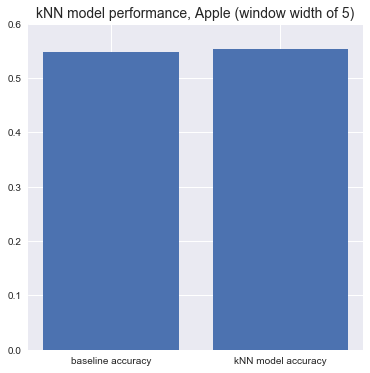

In [101]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.547, 0.553])
plt.xticks([1,2], ['baseline accuracy', 'kNN model accuracy'])
plt.ylim(0, 0.6)
plt.title('kNN model performance, Apple (window width of 5)', fontsize=14);

In [102]:
#compare  performances

#model performance data frame
knn_google_simple = [0.522, 0.553]
knn_google_intermediate = [0.521, 0.548]
knn_google_complex = [0.521, 0.561]
knn_apple_simple = [0.547, 0.553]

df_performance_knn = pd.DataFrame({
                'knn_Google_simple_model': knn_google_simple,
                'knn_Google_intermediate_model': knn_google_intermediate,
                'knn_Google_complex_model' : knn_google_complex,
                'knn_Apple_simple_model': knn_apple_simple
    
                
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance_knn


Baseline accuracy  Model accuracy
knn_Apple_simple_model                     0.547           0.553
knn_Google_complex_model                   0.521           0.561
knn_Google_intermediate_model              0.521           0.548
knn_Google_simple_model                    0.522           0.553

In [103]:
#Compute predictions for Apple data
#Put predictions in data frame with Apple data

predictions_apple = data_tuned(apple_data, 50, 1, 'uniform')
apple_data['y'] = np.where(apple_data['Day price (t)'].shift(-1) > 0, 1, -1)
apple_data['Predictions'] = predictions_apple 
apple_data.tail(5)


(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24  0.000100  0.019286  0.003587  0.003281  0.014320      -0.001543   
2019-04-25  0.019286  0.003587  0.003281  0.014320 -0.001543      -0.009117   
2019-04-26  0.003587  0.003281  0.014320 -0.001543 -0.009117      -0.004785   
2019-04-29  0.003281  0.014320 -0.001543 -0.009117 -0.004785       0.001516   
2019-04-30  0.014320 -0.001543 -0.009117 -0.004785  0.001516      -0.019444   

            y  Predictions  
2019-04-24 -1           -1  
2019-04-25 -1           -1  
2019-04-26  1            1  
2019-04-29 -1            1  
2019-04-30 -1            1

We can see in columns 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

Now let's compute cumulative log returns and cumulative predicted log returns and visualise it to compare.
Cumulative log returns is a cumulative sum of daily log returns.

Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 

In [104]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
apple_data['Cumulative_returns'] = apple_data[split:]['Day price (t)'].cumsum()*100
ap_cumulative_returns = apple_data['Cumulative_returns']


#Compute cumulative predicted returns
#predicted returns = day price (log price difference, absolute meaning) * predicted signal('1' or '-1') for this day

apple_data['Predicted returns'] = (np.abs(apple_data['Day price (t)']))*(apple_data['Predictions'].shift(1))

apple_data['Predicted returns_cum'] = apple_data[split:]['Predicted returns'].cumsum()*100
ap_predicted_returns_cum = apple_data['Predicted returns_cum']

apple_data.tail()

(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24  0.000100  0.019286  0.003587  0.003281  0.014320      -0.001543   
2019-04-25  0.019286  0.003587  0.003281  0.014320 -0.001543      -0.009117   
2019-04-26  0.003587  0.003281  0.014320 -0.001543 -0.009117      -0.004785   
2019-04-29  0.003281  0.014320 -0.001543 -0.009117 -0.004785       0.001516   
2019-04-30  0.014320 -0.001543 -0.009117 -0.004785  0.001516      -0.019444   

            y  Predictions  Cumulative_returns  Predicted returns  \
2019-04-24 -1           -1           30.770491           0.001543   
2019-04-25 -1           -1           29.858834          -0.009117   
2019-04-26  1            1           29.380296          -0.004785   
2019-04-29 -1            1           29.531918           0.001516   
2019-04-30 -1            1           27.587521           0.019444   

            Predicted returns_cum  
2019-04-24              10.359073  
2019-04-25               9.447417  
2019-04-26               8.968879  
2019-04-29               9.120500  
2019-04-30              11.064898

Let's now visualize it cumulative returns and predicted cumulative returns

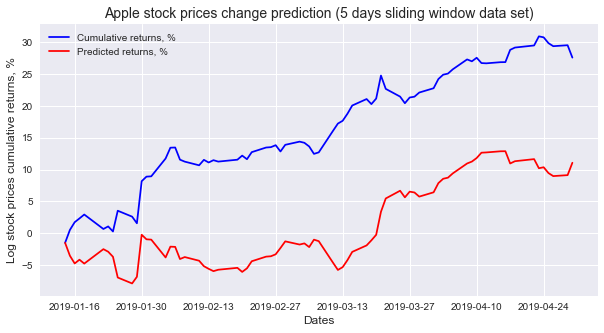

In [105]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(ap_cumulative_returns, color = 'b', label = 'Cumulative returns, %')
plt.plot(ap_predicted_returns_cum, color = 'r', label = 'Predicted returns, %')
plt.title('Apple stock prices change prediction (5 days sliding window data set)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Log stock prices cumulative returns, %', fontsize=12)
plt.legend()
plt.show()

On the plot we can see that Cumulative returns for 2019 are around 27% and Cumulative predicted returns in the same period are around 11%

##### 2.2.2.2. Apple-2: intermediate model (10 days window width)

In [106]:
#Create data set on Apple data with 10 days window width
apple_data_10d = dataset(df_log['Close Apple'], 10)
apple_data_10d.tail()


(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.003003  0.005598 -0.008359 -0.000402  0.001809  0.000100   
2019-04-25  0.005598 -0.008359 -0.000402  0.001809  0.000100  0.019286   
2019-04-26 -0.008359 -0.000402  0.001809  0.000100  0.019286  0.003587   
2019-04-29 -0.000402  0.001809  0.000100  0.019286  0.003587  0.003281   
2019-04-30  0.001809  0.000100  0.019286  0.003587  0.003281  0.014320   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  
2019-04-24  0.019286  0.003587  0.003281  0.014320      -0.001543  
2019-04-25  0.003587  0.003281  0.014320 -0.001543      -0.009117  
2019-04-26  0.003281  0.014320 -0.001543 -0.009117      -0.004785  
2019-04-29  0.014320 -0.001543 -0.009117 -0.004785       0.001516  
2019-04-30 -0.001543 -0.009117 -0.004785  0.001516      -0.019444

In [107]:
#Apply function to fit KNN to Apple data

apple_acc_10d = data(apple_data_10d)
apple_acc_10d.head()

Train set shape: (1264, 11) (1264,)
Test set shape: (317, 11) (317,)
Baseline accuracy: 0.549


accuracy  knn__n_neighbors  knn__p knn__weights
37  0.589905                40       1     distance
29  0.552050                30       1     distance
25  0.545741                25       1     distance
24  0.542587                25       1      uniform
41  0.542587                45       1     distance

In [108]:
data_accuracy(apple_acc_10d)

Top_accuracy on test set: 0.59 with k=40, distance metric=1, weighting function=distance


C:\Users\User1\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Let's now visualise accuracies and  and put it into the Performance data frame.

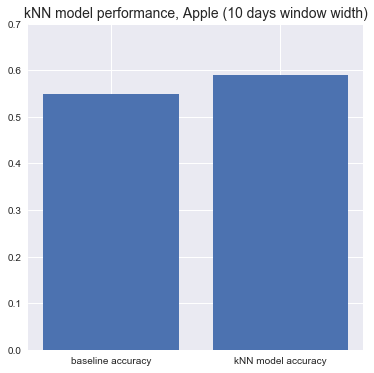

In [109]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.549, 0.589])
plt.xticks([1,2], ['baseline accuracy', 'kNN model accuracy'])
plt.ylim(0, 0.7)
plt.title('kNN model performance, Apple (10 days window width)', fontsize=14);

In [110]:
#compare  performances

#model performance data frame
knn_google_simple = [0.522, 0.553]
knn_google_intermediate = [0.521, 0.548]
knn_google_complex = [0.521, 0.561]
knn_apple_simple = [0.547, 0.553]
knn_apple_intermediate = [0.549, 0.589]

df_performance_knn = pd.DataFrame({
                'knn_Google_simple_model': knn_google_simple,
                'knn_Google_intermediate_model': knn_google_intermediate,
                'knn_Google_complex_model' : knn_google_complex,
                'knn_Apple_simple_model': knn_apple_simple,
                'knn_Apple_intermediate' : knn_apple_intermediate
                
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance_knn

Baseline accuracy  Model accuracy
knn_Apple_intermediate                     0.549           0.589
knn_Apple_simple_model                     0.547           0.553
knn_Google_complex_model                   0.521           0.561
knn_Google_intermediate_model              0.521           0.548
knn_Google_simple_model                    0.522           0.553

In [111]:
#Compute predictions for Apple data
#Put predictions in data frame with Apple data

predictions_apple_10d = data_tuned(apple_data_10d, 40, 1, 'distance')
apple_data_10d['y'] = np.where(apple_data_10d['Day price (t)'].shift(-1) > 0, 1, -1)
apple_data_10d['Predictions'] = predictions_apple_10d 
apple_data_10d.tail(10)


(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-16  0.014432  0.006832  0.001739  0.006672  0.015614 -0.003003   
2019-04-17  0.006832  0.001739  0.006672  0.015614 -0.003003  0.005598   
2019-04-18  0.001739  0.006672  0.015614 -0.003003  0.005598 -0.008359   
2019-04-22  0.006672  0.015614 -0.003003  0.005598 -0.008359 -0.000402   
2019-04-23  0.015614 -0.003003  0.005598 -0.008359 -0.000402  0.001809   
2019-04-24 -0.003003  0.005598 -0.008359 -0.000402  0.001809  0.000100   
2019-04-25  0.005598 -0.008359 -0.000402  0.001809  0.000100  0.019286   
2019-04-26 -0.008359 -0.000402  0.001809  0.000100  0.019286  0.003587   
2019-04-29 -0.000402  0.001809  0.000100  0.019286  0.003587  0.003281   
2019-04-30  0.001809  0.000100  0.019286  0.003587  0.003281  0.014320   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-16  0.005598 -0.008359 -0.000402  0.001809       0.000100  1   
2019-04-17 -0.008359 -0.000402  0.001809  0.000100       0.019286  1   
2019-04-18 -0.000402  0.001809  0.000100  0.019286       0.003587  1   
2019-04-22  0.001809  0.000100  0.019286  0.003587       0.003281  1   
2019-04-23  0.000100  0.019286  0.003587  0.003281       0.014320 -1   
2019-04-24  0.019286  0.003587  0.003281  0.014320      -0.001543 -1   
2019-04-25  0.003587  0.003281  0.014320 -0.001543      -0.009117 -1   
2019-04-26  0.003281  0.014320 -0.001543 -0.009117      -0.004785  1   
2019-04-29  0.014320 -0.001543 -0.009117 -0.004785       0.001516 -1   
2019-04-30 -0.001543 -0.009117 -0.004785  0.001516      -0.019444 -1   

            Predictions  
2019-04-16           -1  
2019-04-17            1  
2019-04-18           -1  
2019-04-22           -1  
2019-04-23           -1  
2019-04-24            1  
2019-04-25            1  
2019-04-26            1  
2019-04-29            1  
2019-04-30            1

We can see in columns 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

Now let's compute cumulative returns and cumulative predicted returns which will be calculated by means of multipliying absolute day price by predicted signal.


In [112]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
apple_data_10d['Cumulative_returns'] = apple_data_10d[split:]['Day price (t)'].cumsum()*100
ap_cumulative_returns_10d = apple_data_10d['Cumulative_returns']


#Compute cumulative predicted returns
#predicted returns = day price (log price difference, absolute meaning) * predicted signal('1' or '-1') for this day

apple_data_10d['Predicted returns'] = (np.abs(apple_data_10d['Day price (t)']))*(apple_data_10d['Predictions'].shift(1))

apple_data_10d['Predicted returns_cum'] = apple_data_10d[split:]['Predicted returns'].cumsum()*100
ap_predicted_returns_cum_10d = apple_data_10d['Predicted returns_cum']

apple_data_10d.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.003003  0.005598 -0.008359 -0.000402  0.001809  0.000100   
2019-04-25  0.005598 -0.008359 -0.000402  0.001809  0.000100  0.019286   
2019-04-26 -0.008359 -0.000402  0.001809  0.000100  0.019286  0.003587   
2019-04-29 -0.000402  0.001809  0.000100  0.019286  0.003587  0.003281   
2019-04-30  0.001809  0.000100  0.019286  0.003587  0.003281  0.014320   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-24  0.019286  0.003587  0.003281  0.014320      -0.001543 -1   
2019-04-25  0.003587  0.003281  0.014320 -0.001543      -0.009117 -1   
2019-04-26  0.003281  0.014320 -0.001543 -0.009117      -0.004785  1   
2019-04-29  0.014320 -0.001543 -0.009117 -0.004785       0.001516 -1   
2019-04-30 -0.001543 -0.009117 -0.004785  0.001516      -0.019444 -1   

            Predictions  Cumulative_returns  Predicted returns  \
2019-04-24            1           27.839277          -0.001543   
2019-04-25            1           26.927620           0.009117   
2019-04-26            1           26.449082           0.004785   
2019-04-29            1           26.600704           0.001516   
2019-04-30            1           24.656306           0.019444   

            Predicted returns_cum  
2019-04-24              11.743294  
2019-04-25              12.654951  
2019-04-26              13.133489  
2019-04-29              13.285110  
2019-04-30              15.229508

Let's now visualize it cumulative returns and predicted cumulative returns

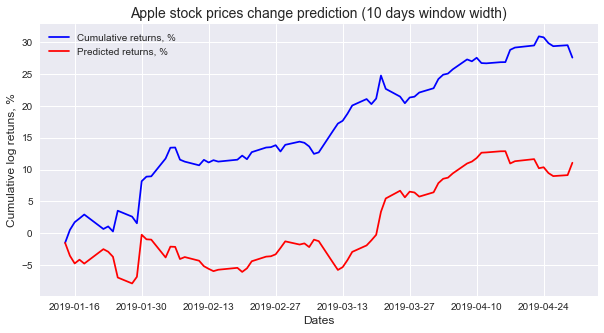

In [113]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(ap_cumulative_returns, color = 'b', label = 'Cumulative returns, %')
plt.plot(ap_predicted_returns_cum, color = 'r', label = 'Predicted returns, %')
plt.title('Apple stock prices change prediction (10 days window width)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

On the plot we can see that Cumulative returns for 2019  are around 25% and Cumulative predicted returns in the same period are around 15%.

Let's move now to complex model for Apple.

##### 2.2.2.3. Apple-3: complex model (all variables and  10 days window width)

In [114]:
apple_data_10d = dataset(df_log['Close Apple'], 10)
apple_data_10d.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17 -0.012703 -0.028250 -0.005900  0.002688 -0.015752  0.012320   
2013-01-18 -0.028250 -0.005900  0.002688 -0.015752  0.012320 -0.006150   
2013-01-22 -0.005900  0.002688 -0.015752  0.012320 -0.006150 -0.036304   
2013-01-23  0.002688 -0.015752  0.012320 -0.006150 -0.036304 -0.032058   
2013-01-24 -0.015752  0.012320 -0.006150 -0.036304 -0.032058  0.040670   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  
2013-01-17 -0.006150 -0.036304 -0.032058  0.040670      -0.006761  
2013-01-18 -0.036304 -0.032058  0.040670 -0.006761      -0.005346  
2013-01-22 -0.032058  0.040670 -0.006761 -0.005346       0.009495  
2013-01-23  0.040670 -0.006761 -0.005346  0.009495       0.018140  
2013-01-24 -0.006761 -0.005346  0.009495  0.018140      -0.131885

In [115]:
apple_data_10d_full = pd.concat([apple_data_10d, df_log], axis=1)
apple_data_10d_full.dropna(inplace=True)
apple_data_10d_full.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17 -0.012703 -0.028250 -0.005900  0.002688 -0.015752  0.012320   
2013-01-18 -0.028250 -0.005900  0.002688 -0.015752  0.012320 -0.006150   
2013-01-22 -0.005900  0.002688 -0.015752  0.012320 -0.006150 -0.036304   
2013-01-23  0.002688 -0.015752  0.012320 -0.006150 -0.036304 -0.032058   
2013-01-24 -0.015752  0.012320 -0.006150 -0.036304 -0.032058  0.040670   

               (t-4)     (t-3)     (t-2)     (t-1)         ...           \
2013-01-17 -0.006150 -0.036304 -0.032058  0.040670         ...            
2013-01-18 -0.036304 -0.032058  0.040670 -0.006761         ...            
2013-01-22 -0.032058  0.040670 -0.006761 -0.005346         ...            
2013-01-23  0.040670 -0.006761 -0.005346  0.009495         ...            
2013-01-24 -0.006761 -0.005346  0.009495  0.018140         ...            

            Arab_States__mob_users  CIS__mob_users  Europe__mob_users  \
2013-01-17                5.974573        5.744604           6.691463   
2013-01-18                5.974573        5.744924           6.691463   
2013-01-22                5.974827        5.744924           6.691463   
2013-01-23                5.974827        5.744924           6.691463   
2013-01-24                5.974827        5.744924           6.691463   

            Americas__mob_users  Asia_web_users  Africa__web_users  \
2013-01-17             6.929810        7.020012           4.427239   
2013-01-18             6.929908        7.020459           4.428433   
2013-01-22             6.930006        7.020905           4.429626   
2013-01-23             6.930104        7.021352           4.430817   
2013-01-24             6.930104        7.021887           4.432007   

            Arab_States__web_users  CIS__web_users  Europe__web_users  \
2013-01-17                4.670021        4.960044           6.071892   
2013-01-18                4.670958        4.960044           6.071892   
2013-01-22                4.671894        4.960044           6.072122   
2013-01-23                4.671894        4.960745           6.072122   
2013-01-24                4.672829        4.960745           6.072353   

            Americas__web_users  
2013-01-17             6.254406  
2013-01-18             6.254598  
2013-01-22             6.254790  
2013-01-23             6.254982  
2013-01-24             6.255174  

[5 rows x 41 columns]

In [116]:
#Apply function to fit KNN to Google 10 days full data

apple_acc_10d_full = data(apple_data_10d_full)
apple_acc_10d_full.head()

Train set shape: (1264, 41) (1264,)
Test set shape: (317, 41) (317,)
Baseline accuracy: 0.549


accuracy  knn__n_neighbors  knn__p knn__weights
3   0.539432                 2       2     distance
41  0.498423                45       1     distance
40  0.492114                45       1      uniform
1   0.492114                 2       1     distance
45  0.485804                50       1     distance

Choose combination with the best accuracy

In [117]:
data_accuracy(apple_acc_10d_full)

Top_accuracy on test set: 0.54 with k=2, distance metric=2, weighting function=distance


C:\Users\User1\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)




Let's now visualise accuracies and  and put it into the Performance data frame to compare.

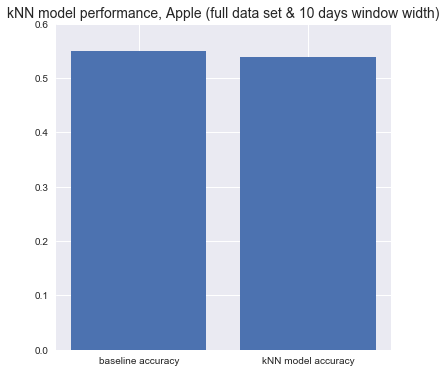

In [118]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.549, 0.539])
plt.xticks([1,2], ['baseline accuracy', 'kNN model accuracy'])
plt.ylim(0, 0.6)
plt.title('kNN model performance, Apple (full data set & 10 days window width)', fontsize=14);

In [119]:
#compare  performances

#model performance data frame
knn_google_simple = [0.522, 0.553]
knn_google_intermediate = [0.521, 0.548]
knn_google_complex = [0.521, 0.561]
knn_apple_simple = [0.547, 0.553]
knn_apple_intermediate = [0.549, 0.589]
knn_apple_complex = [0.549, 0.539]

df_performance_knn = pd.DataFrame({
                'knn_Google_simple_model': knn_google_simple,
                'knn_Google_intermediate_model': knn_google_intermediate,
                'knn_Google_complex_model' : knn_google_complex,
                'knn_Apple_simple_model': knn_apple_simple,
                'knn_Apple_intermediate' : knn_apple_intermediate,
                'knn_Apple_complex' : knn_apple_complex
    
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance_knn

Baseline accuracy  Model accuracy
knn_Apple_complex                          0.549           0.539
knn_Apple_intermediate                     0.549           0.589
knn_Apple_simple_model                     0.547           0.553
knn_Google_complex_model                   0.521           0.561
knn_Google_intermediate_model              0.521           0.548
knn_Google_simple_model                    0.522           0.553

It seems that the higest accuracy for Apple is on Intermediate model and it is at about 0.59.

In [120]:
#Compute predictions on Apple data<br>
#Put predictions in data frame with Apple data

predictions_apple_10d_full = data_tuned(apple_data_10d_full, 2, 2, 'distance')
apple_data_10d_full['Predictions'] = predictions_apple_10d_full
apple_data_10d_full.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17 -0.012703 -0.028250 -0.005900  0.002688 -0.015752  0.012320   
2013-01-18 -0.028250 -0.005900  0.002688 -0.015752  0.012320 -0.006150   
2013-01-22 -0.005900  0.002688 -0.015752  0.012320 -0.006150 -0.036304   
2013-01-23  0.002688 -0.015752  0.012320 -0.006150 -0.036304 -0.032058   
2013-01-24 -0.015752  0.012320 -0.006150 -0.036304 -0.032058  0.040670   

               (t-4)     (t-3)     (t-2)     (t-1)     ...       \
2013-01-17 -0.006150 -0.036304 -0.032058  0.040670     ...        
2013-01-18 -0.036304 -0.032058  0.040670 -0.006761     ...        
2013-01-22 -0.032058  0.040670 -0.006761 -0.005346     ...        
2013-01-23  0.040670 -0.006761 -0.005346  0.009495     ...        
2013-01-24 -0.006761 -0.005346  0.009495  0.018140     ...        

            CIS__mob_users  Europe__mob_users  Americas__mob_users  \
2013-01-17        5.744604           6.691463             6.929810   
2013-01-18        5.744924           6.691463             6.929908   
2013-01-22        5.744924           6.691463             6.930006   
2013-01-23        5.744924           6.691463             6.930104   
2013-01-24        5.744924           6.691463             6.930104   

            Asia_web_users  Africa__web_users  Arab_States__web_users  \
2013-01-17        7.020012           4.427239                4.670021   
2013-01-18        7.020459           4.428433                4.670958   
2013-01-22        7.020905           4.429626                4.671894   
2013-01-23        7.021352           4.430817                4.671894   
2013-01-24        7.021887           4.432007                4.672829   

            CIS__web_users  Europe__web_users  Americas__web_users  \
2013-01-17        4.960044           6.071892             6.254406   
2013-01-18        4.960044           6.071892             6.254598   
2013-01-22        4.960044           6.072122             6.254790   
2013-01-23        4.960745           6.072122             6.254982   
2013-01-24        4.960745           6.072353             6.255174   

            Predictions  
2013-01-17           -1  
2013-01-18            1  
2013-01-22            1  
2013-01-23           -1  
2013-01-24           -1  

[5 rows x 42 columns]

In columns 'Predictions' there is predicted signal whether stock prices change is positive or negaritve.<br>
Let's now visualize it

In [121]:
split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
apple_data_10d_full['Cumulative_returns'] = apple_data_10d_full[split:]['Day price (t)'].cumsum()*100
ap_cumulative_returns_10d_full = apple_data_10d_full['Cumulative_returns']

#Compute cumulative predicted returns
apple_data_10d_full['Predicted returns'] = (np.abs(apple_data_10d_full['Day price (t)']))*(apple_data_10d_full['Predictions'].shift(1))
apple_data_10d_full['Predicted returns_cum'] = apple_data_10d_full[split:]['Predicted returns'].cumsum()*100
ap_predicted_returns_cum_10d_full = apple_data_10d_full['Predicted returns_cum']

apple_data_10d_full.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.003003  0.005598 -0.008359 -0.000402  0.001809  0.000100   
2019-04-25  0.005598 -0.008359 -0.000402  0.001809  0.000100  0.019286   
2019-04-26 -0.008359 -0.000402  0.001809  0.000100  0.019286  0.003587   
2019-04-29 -0.000402  0.001809  0.000100  0.019286  0.003587  0.003281   
2019-04-30  0.001809  0.000100  0.019286  0.003587  0.003281  0.014320   

               (t-4)     (t-3)     (t-2)     (t-1)          ...            \
2019-04-24  0.019286  0.003587  0.003281  0.014320          ...             
2019-04-25  0.003587  0.003281  0.014320 -0.001543          ...             
2019-04-26  0.003281  0.014320 -0.001543 -0.009117          ...             
2019-04-29  0.014320 -0.001543 -0.009117 -0.004785          ...             
2019-04-30 -0.001543 -0.009117 -0.004785  0.001516          ...             

            Asia_web_users  Africa__web_users  Arab_States__web_users  \
2019-04-24        7.579015           5.484382                5.256453   
2019-04-25        7.579270           5.484797                5.256974   
2019-04-26        7.579577           5.485212                5.256974   
2019-04-29        7.579832           5.485626                5.257495   
2019-04-30        7.580087           5.486041                5.257495   

            CIS__web_users  Europe__web_users  Americas__web_users  \
2019-04-24        5.305293           6.248236             6.536402   
2019-04-25        5.305293           6.248430             6.536547   
2019-04-26        5.305789           6.248430             6.536692   
2019-04-29        5.305789           6.248623             6.536837   
2019-04-30        5.305789           6.248623             6.536981   

            Predictions  Cumulative_returns  Predicted returns  \
2019-04-24           -1           27.839277           0.001543   
2019-04-25            1           26.927620          -0.009117   
2019-04-26           -1           26.449082           0.004785   
2019-04-29           -1           26.600704          -0.001516   
2019-04-30           -1           24.656306          -0.019444   

            Predicted returns_cum  
2019-04-24               1.719980  
2019-04-25               0.808324  
2019-04-26               1.286862  
2019-04-29               1.135240  
2019-04-30              -0.809157  

[5 rows x 45 columns]

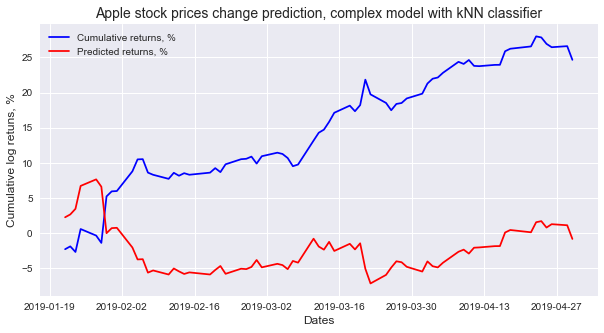

In [122]:
plt.figure(figsize=(10,5))
plt.plot(ap_cumulative_returns_10d_full, color = 'b', label = 'Cumulative returns, %')
plt.plot(ap_predicted_returns_cum_10d_full, color = 'r', label = 'Predicted returns, %')
plt.title('Apple stock prices change prediction, complex model with kNN classifier', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

It seems that difference between predicted cumulative returns and cumlutive returns is very big in this case.

The next company we will look at is Facebook. With the same approach let's see what results we will get.


<img src ='facebook-logo.png'>
#### 2.2.3. Facebook: kNN model
##### 2.2.3.1. Facebook-1: simple model (5 days window width)

Let's create data set on Facebook data with window width of 5


In [123]:
fb_data = dataset(df_log['Close FB'], 5)
fb_data.tail()

(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)
2019-04-24 -0.004351 -0.000503 -0.002801  0.017570  0.012814      -0.006551
2019-04-25 -0.000503 -0.002801  0.017570  0.012814 -0.006551       0.056848
2019-04-26 -0.002801  0.017570  0.012814 -0.006551  0.056848      -0.009201
2019-04-29  0.017570  0.012814 -0.006551  0.056848 -0.009201       0.017035
2019-04-30  0.012814 -0.006551  0.056848 -0.009201  0.017035      -0.007110

In [124]:
#Apply function to fit KNN clasifier to Facebook data with a window width of 5

fb_acc = data(fb_data)
fb_acc.head()

Train set shape: (1268, 6) (1268,)
Test set shape: (318, 6) (318,)
Baseline accuracy: 0.509


accuracy  knn__n_neighbors  knn__p knn__weights
38  0.547170                40       2      uniform
42  0.534591                45       2      uniform
39  0.534591                40       2     distance
6   0.531447                 5       2      uniform
35  0.531447                35       2     distance

We can see that the baseline accuracy is about 0.509.
Maximal accuracy is about 0.547 on a test dataset that is about 4 points better than baseline.<br>

Now let's find the combination with the best accuracy.

In [125]:
#Find the combination with the best accuracy

data_accuracy(fb_acc)

Top_accuracy on test set: 0.55 with k=40, distance metric=2, weighting function=uniform


C:\Users\User1\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Let's now visualise accuracies

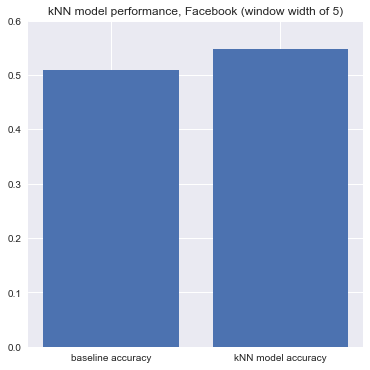

In [126]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.509, 0.547])
plt.xticks([1,2], ['baseline accuracy', 'kNN model accuracy'])
plt.ylim(0, 0.6)
plt.title('kNN model performance, Facebook (window width of 5)');

We can see on the plot that model accuracy in slightly better than baseline's.


In [127]:
#compare  performances

#model performance data frame
knn_google_simple = [0.522, 0.553]
knn_google_intermediate = [0.521, 0.548]
knn_google_complex = [0.521, 0.561]
knn_apple_simple = [0.547, 0.553]
knn_apple_intermediate = [0.549, 0.589]
knn_apple_complex = [0.549, 0.539]
knn_facebook_simple = [0.509, 0.547]


df_performance_knn = pd.DataFrame({
                'knn_Google_simple_model': knn_google_simple,
                'knn_Google_intermediate_model': knn_google_intermediate,
                'knn_Google_complex_model' : knn_google_complex,
                'knn_Apple_simple_model': knn_apple_simple,
                'knn_Apple_intermediate_model' : knn_apple_intermediate,
                'knn_Apple_complex_model' : knn_apple_complex,
                'knn_Facebook_simple_model' : knn_facebook_simple 
    
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance_knn

Baseline accuracy  Model accuracy
knn_Apple_complex_model                    0.549           0.539
knn_Apple_intermediate_model               0.549           0.589
knn_Apple_simple_model                     0.547           0.553
knn_Facebook_simple_model                  0.509           0.547
knn_Google_complex_model                   0.521           0.561
knn_Google_intermediate_model              0.521           0.548
knn_Google_simple_model                    0.522           0.553

Now let's define the function to compute predictions using hyperparameters to best model performance

In [128]:
#Compute predictions for Facebook data
#Put predictions in data frame with Facebook data

predictions_fb = data_tuned(fb_data, 40, 2, 'uniform')
fb_data['y'] = np.where(fb_data['Day price (t)'].shift(-1) > 0, 1, -1)
fb_data['Predictions'] = predictions_fb 
fb_data.tail(5)


(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24 -0.004351 -0.000503 -0.002801  0.017570  0.012814      -0.006551   
2019-04-25 -0.000503 -0.002801  0.017570  0.012814 -0.006551       0.056848   
2019-04-26 -0.002801  0.017570  0.012814 -0.006551  0.056848      -0.009201   
2019-04-29  0.017570  0.012814 -0.006551  0.056848 -0.009201       0.017035   
2019-04-30  0.012814 -0.006551  0.056848 -0.009201  0.017035      -0.007110   

            y  Predictions  
2019-04-24  1           -1  
2019-04-25 -1            1  
2019-04-26  1           -1  
2019-04-29 -1           -1  
2019-04-30 -1           -1

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

Now let's compute cumulative log returns and cumulative predicted log returns and visualise it to compare.
Cumulative log returns is a cumulative sum of daily log returns.

Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 


In [129]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
fb_data['Cumulative_returns'] = fb_data[split:]['Day price (t)'].cumsum()*100
fb_cumulative_returns = fb_data['Cumulative_returns']


#Compute cumulative predicted returns
#predicted returns = day price (log return, absolute value) * predicted signal('1' or '-1') for this day (prediction signal 
#from previous day for current day).

fb_data['Predicted returns'] = (np.abs(fb_data['Day price (t)']))*(fb_data['Predictions'].shift(1))

fb_data['Predicted returns_cum'] = fb_data[split:]['Predicted returns'].cumsum()*100
fb_predicted_returns_cum = fb_data['Predicted returns_cum']

fb_data.tail()

(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24 -0.004351 -0.000503 -0.002801  0.017570  0.012814      -0.006551   
2019-04-25 -0.000503 -0.002801  0.017570  0.012814 -0.006551       0.056848   
2019-04-26 -0.002801  0.017570  0.012814 -0.006551  0.056848      -0.009201   
2019-04-29  0.017570  0.012814 -0.006551  0.056848 -0.009201       0.017035   
2019-04-30  0.012814 -0.006551  0.056848 -0.009201  0.017035      -0.007110   

            y  Predictions  Cumulative_returns  Predicted returns  \
2019-04-24  1           -1           23.876498          -0.006551   
2019-04-25 -1            1           29.561294          -0.056848   
2019-04-26  1           -1           28.641215           0.009201   
2019-04-29 -1           -1           30.344725          -0.017035   
2019-04-30 -1           -1           29.633709          -0.007110   

            Predicted returns_cum  
2019-04-24               6.369103  
2019-04-25               0.684307  
2019-04-26               1.604386  
2019-04-29              -0.099123  
2019-04-30              -0.810139

Let's now visualize cumulative returns and predicted cumulative returns

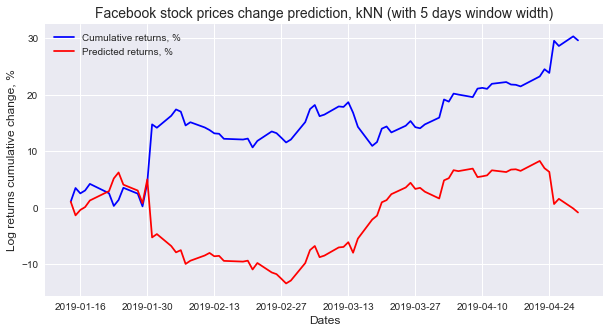

In [130]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(fb_cumulative_returns, color = 'b', label = 'Cumulative returns, %')
plt.plot(fb_predicted_returns_cum, color = 'r', label = 'Predicted returns, %')
plt.title('Facebook stock prices change prediction, kNN (with 5 days window width)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Log returns cumulative change, %', fontsize=12)
plt.legend()
plt.show()

On the plot we can see that Cumulative for 2019  are around 29% and cumulative predicted returns in the same period are around -0.81%. Difference is quite big which can be explained by volatility during this period.

Let's look at intermediate data set for Facebook with 10 days rolling window.

##### 2.2.3.2. Facebook-2. Intermediate model (10 days window width)

Create data set with 10 days window width on Facebook data

In [131]:
fb_data_10d = dataset(df_log['Close FB'], 10)
fb_data_10d.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24  0.015035  0.001351 -0.001745  0.008917  0.003066 -0.004351   
2019-04-25  0.001351 -0.001745  0.008917  0.003066 -0.004351 -0.000503   
2019-04-26 -0.001745  0.008917  0.003066 -0.004351 -0.000503 -0.002801   
2019-04-29  0.008917  0.003066 -0.004351 -0.000503 -0.002801  0.017570   
2019-04-30  0.003066 -0.004351 -0.000503 -0.002801  0.017570  0.012814   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  
2019-04-24 -0.000503 -0.002801  0.017570  0.012814      -0.006551  
2019-04-25 -0.002801  0.017570  0.012814 -0.006551       0.056848  
2019-04-26  0.017570  0.012814 -0.006551  0.056848      -0.009201  
2019-04-29  0.012814 -0.006551  0.056848 -0.009201       0.017035  
2019-04-30 -0.006551  0.056848 -0.009201  0.017035      -0.007110

In [132]:
#Apply function to fit KNN to Facebook data set with window width of 10.

fb_acc_10d = data(fb_data_10d)
fb_acc_10d.head()

Train set shape: (1264, 11) (1264,)
Test set shape: (317, 11) (317,)
Baseline accuracy: 0.508


accuracy  knn__n_neighbors  knn__p knn__weights
14  0.555205                10       2      uniform
13  0.545741                10       1     distance
32  0.545741                35       1      uniform
37  0.545741                40       1     distance
33  0.539432                35       1     distance

Baseline aacuracy is about 0.50 and best model accuracy is about 0.56 that is 5 points better than baseline's

Choose combination with the best accuracy.

In [133]:
data_accuracy(fb_acc_10d)

Top_accuracy on test set: 0.56 with k=10, distance metric=2, weighting function=uniform


C:\Users\User1\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Let's visualise accuracies and put it into the Performance data frame to compare.

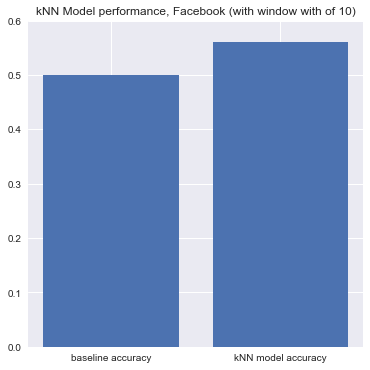

In [134]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.50, 0.56])
plt.xticks([1,2], ['baseline accuracy', 'kNN model accuracy'])
plt.ylim(0, 0.6)
plt.title('kNN Model performance, Facebook (with window with of 10)');

In [135]:
#compare  performances

#model performance data frame
knn_google_simple = [0.522, 0.553]
knn_google_intermediate = [0.521, 0.548]
knn_google_complex = [0.521, 0.561]
knn_apple_simple = [0.547, 0.553]
knn_apple_intermediate = [0.549, 0.589]
knn_apple_complex = [0.549, 0.539]
knn_facebook_simple = [0.509, 0.547]
knn_facebook_intermediate = [0.50, 0.56]


df_performance_knn = pd.DataFrame({
                'knn_Google_simple_model': knn_google_simple,
                'knn_Google_intermediate_model': knn_google_intermediate,
                'knn_Google_complex_model' : knn_google_complex,
                'knn_Apple_simple_model': knn_apple_simple,
                'knn_Apple_intermediate_model' : knn_apple_intermediate,
                'knn_Apple_complex_model' : knn_apple_complex,
                'knn_Facebook_simple_model' : knn_facebook_simple,
                'knn_Facebook_intermediate_model' : knn_facebook_intermediate
    
    
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance_knn

Baseline accuracy  Model accuracy
knn_Apple_complex_model                      0.549           0.539
knn_Apple_intermediate_model                 0.549           0.589
knn_Apple_simple_model                       0.547           0.553
knn_Facebook_intermediate_model              0.500           0.560
knn_Facebook_simple_model                    0.509           0.547
knn_Google_complex_model                     0.521           0.561
knn_Google_intermediate_model                0.521           0.548
knn_Google_simple_model                      0.522           0.553

In [136]:
#Compute predictions for Facebook data<br>
#Put predictions in data frame 

predictions_fb_10d = data_tuned(fb_data_10d, 10, 2, 'uniform')

fb_data_10d['y'] = np.where(fb_data_10d['Day price (t)'].shift(-1) > 0, 1, -1) #target values
fb_data_10d['Predictions'] = predictions_fb_10d #predicted signal
fb_data_10d.tail()


(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24  0.015035  0.001351 -0.001745  0.008917  0.003066 -0.004351   
2019-04-25  0.001351 -0.001745  0.008917  0.003066 -0.004351 -0.000503   
2019-04-26 -0.001745  0.008917  0.003066 -0.004351 -0.000503 -0.002801   
2019-04-29  0.008917  0.003066 -0.004351 -0.000503 -0.002801  0.017570   
2019-04-30  0.003066 -0.004351 -0.000503 -0.002801  0.017570  0.012814   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-24 -0.000503 -0.002801  0.017570  0.012814      -0.006551  1   
2019-04-25 -0.002801  0.017570  0.012814 -0.006551       0.056848 -1   
2019-04-26  0.017570  0.012814 -0.006551  0.056848      -0.009201  1   
2019-04-29  0.012814 -0.006551  0.056848 -0.009201       0.017035 -1   
2019-04-30 -0.006551  0.056848 -0.009201  0.017035      -0.007110 -1   

            Predictions  
2019-04-24            1  
2019-04-25            1  
2019-04-26           -1  
2019-04-29           -1  
2019-04-30           -1

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

Now let's compute cumulative log returns and cumulative predicted log returns and visualise it to compare.<br>
Cumulative log returns is a cumulative sum of daily log returns.<br>
Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 

In [137]:
split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
fb_data_10d['Cumulative_returns'] = fb_data_10d[split:]['Day price (t)'].cumsum()*100
fb_cumulative_returns_10d = fb_data_10d['Cumulative_returns']

#Compute cumulative predicted returns
fb_data_10d['Predicted returns'] = (np.abs(fb_data_10d['Day price (t)']))*(fb_data_10d['Predictions'].shift(1))
fb_data_10d['Predicted returns_cum'] = fb_data_10d[split:]['Predicted returns'].cumsum()*100
fb_predicted_returns_cum_10d = fb_data_10d['Predicted returns_cum']

fb_data_10d.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24  0.015035  0.001351 -0.001745  0.008917  0.003066 -0.004351   
2019-04-25  0.001351 -0.001745  0.008917  0.003066 -0.004351 -0.000503   
2019-04-26 -0.001745  0.008917  0.003066 -0.004351 -0.000503 -0.002801   
2019-04-29  0.008917  0.003066 -0.004351 -0.000503 -0.002801  0.017570   
2019-04-30  0.003066 -0.004351 -0.000503 -0.002801  0.017570  0.012814   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-24 -0.000503 -0.002801  0.017570  0.012814      -0.006551  1   
2019-04-25 -0.002801  0.017570  0.012814 -0.006551       0.056848 -1   
2019-04-26  0.017570  0.012814 -0.006551  0.056848      -0.009201  1   
2019-04-29  0.012814 -0.006551  0.056848 -0.009201       0.017035 -1   
2019-04-30 -0.006551  0.056848 -0.009201  0.017035      -0.007110 -1   

            Predictions  Cumulative_returns  Predicted returns  \
2019-04-24            1           19.628657          -0.006551   
2019-04-25            1           25.313453           0.056848   
2019-04-26           -1           24.393374           0.009201   
2019-04-29           -1           26.096883          -0.017035   
2019-04-30           -1           25.385867          -0.007110   

            Predicted returns_cum  
2019-04-24              -4.791621  
2019-04-25               0.893175  
2019-04-26               1.813254  
2019-04-29               0.109744  
2019-04-30              -0.601271

Let's visualize cumulative returns and predicted cumulative returns

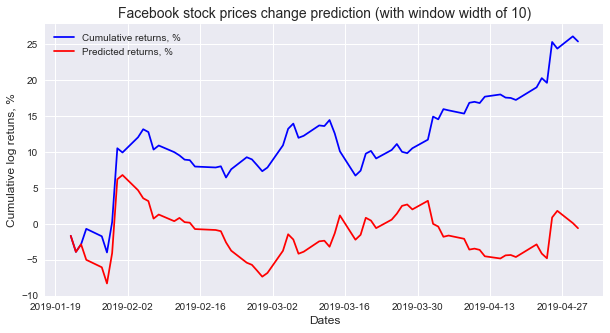

In [138]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(fb_cumulative_returns_10d, color = 'b', label = 'Cumulative returns, %')
plt.plot(fb_predicted_returns_cum_10d, color = 'r', label = 'Predicted returns, %')
plt.title('Facebook stock prices change prediction (with window width of 10)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

On the plot we can see that Cumulative returns in 2019  are around 25% and Cumulative predicted returns in the same period are around -0.6%.

As a next step, let's try fit the model to dataset with all features (indexes, capitalistaion, mobile and Internet users) and 10 days window width.

##### 2.2.3.3. Facebook-3: complex model (all variables and 10 days window width)

In [139]:
fb_data_10d = dataset(df_log['Close FB'], 10)
fb_data_10d.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17 -0.008248  0.035029  0.022689 -0.012312  0.051311  0.022945   
2013-01-18  0.035029  0.022689 -0.012312  0.051311  0.022945  0.013329   
2013-01-22  0.022689 -0.012312  0.051311  0.022945  0.013329 -0.024574   
2013-01-23 -0.012312  0.051311  0.022945  0.013329 -0.024574 -0.027848   
2013-01-24  0.051311  0.022945  0.013329 -0.024574 -0.027848 -0.008340   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  
2013-01-17  0.013329 -0.024574 -0.027848 -0.008340       0.009668  
2013-01-18 -0.024574 -0.027848 -0.008340  0.009668      -0.016054  
2013-01-22 -0.027848 -0.008340  0.009668 -0.016054       0.035440  
2013-01-23 -0.008340  0.009668 -0.016054  0.035440       0.002924  
2013-01-24  0.009668 -0.016054  0.035440  0.002924       0.008401

In [140]:
fb_data_10d_full = pd.concat([fb_data_10d, df_log], axis=1)
fb_data_10d_full.dropna(inplace=True)
fb_data_10d_full.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17 -0.008248  0.035029  0.022689 -0.012312  0.051311  0.022945   
2013-01-18  0.035029  0.022689 -0.012312  0.051311  0.022945  0.013329   
2013-01-22  0.022689 -0.012312  0.051311  0.022945  0.013329 -0.024574   
2013-01-23 -0.012312  0.051311  0.022945  0.013329 -0.024574 -0.027848   
2013-01-24  0.051311  0.022945  0.013329 -0.024574 -0.027848 -0.008340   

               (t-4)     (t-3)     (t-2)     (t-1)         ...           \
2013-01-17  0.013329 -0.024574 -0.027848 -0.008340         ...            
2013-01-18 -0.024574 -0.027848 -0.008340  0.009668         ...            
2013-01-22 -0.027848 -0.008340  0.009668 -0.016054         ...            
2013-01-23 -0.008340  0.009668 -0.016054  0.035440         ...            
2013-01-24  0.009668 -0.016054  0.035440  0.002924         ...            

            Arab_States__mob_users  CIS__mob_users  Europe__mob_users  \
2013-01-17                5.974573        5.744604           6.691463   
2013-01-18                5.974573        5.744924           6.691463   
2013-01-22                5.974827        5.744924           6.691463   
2013-01-23                5.974827        5.744924           6.691463   
2013-01-24                5.974827        5.744924           6.691463   

            Americas__mob_users  Asia_web_users  Africa__web_users  \
2013-01-17             6.929810        7.020012           4.427239   
2013-01-18             6.929908        7.020459           4.428433   
2013-01-22             6.930006        7.020905           4.429626   
2013-01-23             6.930104        7.021352           4.430817   
2013-01-24             6.930104        7.021887           4.432007   

            Arab_States__web_users  CIS__web_users  Europe__web_users  \
2013-01-17                4.670021        4.960044           6.071892   
2013-01-18                4.670958        4.960044           6.071892   
2013-01-22                4.671894        4.960044           6.072122   
2013-01-23                4.671894        4.960745           6.072122   
2013-01-24                4.672829        4.960745           6.072353   

            Americas__web_users  
2013-01-17             6.254406  
2013-01-18             6.254598  
2013-01-22             6.254790  
2013-01-23             6.254982  
2013-01-24             6.255174  

[5 rows x 41 columns]

In [141]:
#Function to fit KNN to Facebook full data set with 10 days window width

fb_acc_10d_full = data(fb_data_10d_full)
fb_acc_10d_full.head()

Train set shape: (1264, 41) (1264,)
Test set shape: (317, 41) (317,)
Baseline accuracy: 0.508


accuracy  knn__n_neighbors  knn__p knn__weights
47  0.542587                50       2     distance
46  0.539432                50       2      uniform
12  0.536278                10       1      uniform
36  0.533123                40       1      uniform
13  0.533123                10       1     distance

Choose combination with the best accuracy

In [142]:
data_accuracy(fb_acc_10d_full)

Top_accuracy on test set: 0.54 with k=50, distance metric=2, weighting function=distance


C:\Users\User1\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)



Let's now visualise accuracies and  and put it into the Performance data frame.

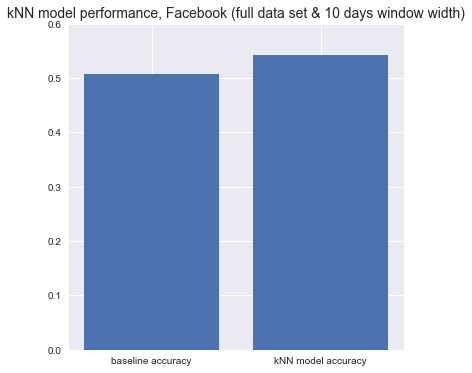

In [143]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.508, 0.542])
plt.xticks([1,2], ['baseline accuracy', 'kNN model accuracy'])
plt.ylim(0, 0.6)
plt.title('kNN model performance, Facebook (full data set & 10 days window width)', fontsize=14);

In [144]:
#compare  performances

#model performance data frame
knn_google_simple = [0.522, 0.553]
knn_google_intermediate = [0.521, 0.548]
knn_google_complex = [0.521, 0.561]
knn_apple_simple = [0.547, 0.553]
knn_apple_intermediate = [0.549, 0.589]
knn_apple_complex = [0.549, 0.539]
knn_facebook_simple = [0.509, 0.547]
knn_facebook_intermediate = [0.50, 0.56]
knn_facebook_complex = [0.508, 0.542]


df_performance_knn = pd.DataFrame({
                'knn_Google_simple_model': knn_google_simple,
                'knn_Google_intermediate_model': knn_google_intermediate,
                'knn_Google_complex_model' : knn_google_complex,
                'knn_Apple_simple_model': knn_apple_simple,
                'knn_Apple_intermediate_model' : knn_apple_intermediate,
                'knn_Apple_complex_model' : knn_apple_complex,
                'knn_Facebook_simple_model' : knn_facebook_simple,
                'knn_Facebook_intermediate_model' : knn_facebook_intermediate,
                'knn_Facebook_complex_model' : knn_facebook_complex
    
    
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance_knn

Baseline accuracy  Model accuracy
knn_Apple_complex_model                      0.549           0.539
knn_Apple_intermediate_model                 0.549           0.589
knn_Apple_simple_model                       0.547           0.553
knn_Facebook_complex_model                   0.508           0.542
knn_Facebook_intermediate_model              0.500           0.560
knn_Facebook_simple_model                    0.509           0.547
knn_Google_complex_model                     0.521           0.561
knn_Google_intermediate_model                0.521           0.548
knn_Google_simple_model                      0.522           0.553


It seems that the higest accuracy for Facebook is on Intermediate model and it is at about 0.56.

In [145]:
#Compute predictions for Facebook data
#Put predictions in data frame with Facebook data

predictions_fb_10d_full = data_tuned(fb_data_10d_full, 50, 2, 'distance')
fb_data_10d_full['Predictions'] = predictions_fb_10d_full
fb_data_10d_full.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17 -0.008248  0.035029  0.022689 -0.012312  0.051311  0.022945   
2013-01-18  0.035029  0.022689 -0.012312  0.051311  0.022945  0.013329   
2013-01-22  0.022689 -0.012312  0.051311  0.022945  0.013329 -0.024574   
2013-01-23 -0.012312  0.051311  0.022945  0.013329 -0.024574 -0.027848   
2013-01-24  0.051311  0.022945  0.013329 -0.024574 -0.027848 -0.008340   

               (t-4)     (t-3)     (t-2)     (t-1)     ...       \
2013-01-17  0.013329 -0.024574 -0.027848 -0.008340     ...        
2013-01-18 -0.024574 -0.027848 -0.008340  0.009668     ...        
2013-01-22 -0.027848 -0.008340  0.009668 -0.016054     ...        
2013-01-23 -0.008340  0.009668 -0.016054  0.035440     ...        
2013-01-24  0.009668 -0.016054  0.035440  0.002924     ...        

            CIS__mob_users  Europe__mob_users  Americas__mob_users  \
2013-01-17        5.744604           6.691463             6.929810   
2013-01-18        5.744924           6.691463             6.929908   
2013-01-22        5.744924           6.691463             6.930006   
2013-01-23        5.744924           6.691463             6.930104   
2013-01-24        5.744924           6.691463             6.930104   

            Asia_web_users  Africa__web_users  Arab_States__web_users  \
2013-01-17        7.020012           4.427239                4.670021   
2013-01-18        7.020459           4.428433                4.670958   
2013-01-22        7.020905           4.429626                4.671894   
2013-01-23        7.021352           4.430817                4.671894   
2013-01-24        7.021887           4.432007                4.672829   

            CIS__web_users  Europe__web_users  Americas__web_users  \
2013-01-17        4.960044           6.071892             6.254406   
2013-01-18        4.960044           6.071892             6.254598   
2013-01-22        4.960044           6.072122             6.254790   
2013-01-23        4.960745           6.072122             6.254982   
2013-01-24        4.960745           6.072353             6.255174   

            Predictions  
2013-01-17           -1  
2013-01-18            1  
2013-01-22            1  
2013-01-23            1  
2013-01-24            1  

[5 rows x 42 columns]

In columns 'Predictions' there is predicted signal whether stock prices change is positive or negaritve.<br>
Let's now visualize it

In [146]:
split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
fb_data_10d_full['Cumulative_returns'] = fb_data_10d_full[split:]['Day price (t)'].cumsum()*100
fb_cumulative_returns_10d_full = fb_data_10d_full['Cumulative_returns']

#Compute cumulative predicted returns
fb_data_10d_full['Predicted returns'] = (np.abs(fb_data_10d_full['Day price (t)']))*(fb_data_10d_full['Predictions'].shift(1))
fb_data_10d_full['Predicted returns_cum'] = fb_data_10d_full[split:]['Predicted returns'].cumsum()*100
fb_predicted_returns_cum_10d_full = fb_data_10d_full['Predicted returns_cum']

fb_data_10d_full.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24  0.015035  0.001351 -0.001745  0.008917  0.003066 -0.004351   
2019-04-25  0.001351 -0.001745  0.008917  0.003066 -0.004351 -0.000503   
2019-04-26 -0.001745  0.008917  0.003066 -0.004351 -0.000503 -0.002801   
2019-04-29  0.008917  0.003066 -0.004351 -0.000503 -0.002801  0.017570   
2019-04-30  0.003066 -0.004351 -0.000503 -0.002801  0.017570  0.012814   

               (t-4)     (t-3)     (t-2)     (t-1)          ...            \
2019-04-24 -0.000503 -0.002801  0.017570  0.012814          ...             
2019-04-25 -0.002801  0.017570  0.012814 -0.006551          ...             
2019-04-26  0.017570  0.012814 -0.006551  0.056848          ...             
2019-04-29  0.012814 -0.006551  0.056848 -0.009201          ...             
2019-04-30 -0.006551  0.056848 -0.009201  0.017035          ...             

            Asia_web_users  Africa__web_users  Arab_States__web_users  \
2019-04-24        7.579015           5.484382                5.256453   
2019-04-25        7.579270           5.484797                5.256974   
2019-04-26        7.579577           5.485212                5.256974   
2019-04-29        7.579832           5.485626                5.257495   
2019-04-30        7.580087           5.486041                5.257495   

            CIS__web_users  Europe__web_users  Americas__web_users  \
2019-04-24        5.305293           6.248236             6.536402   
2019-04-25        5.305293           6.248430             6.536547   
2019-04-26        5.305789           6.248430             6.536692   
2019-04-29        5.305789           6.248623             6.536837   
2019-04-30        5.305789           6.248623             6.536981   

            Predictions  Cumulative_returns  Predicted returns  \
2019-04-24           -1           19.628657          -0.006551   
2019-04-25           -1           25.313453          -0.056848   
2019-04-26           -1           24.393374          -0.009201   
2019-04-29           -1           26.096883          -0.017035   
2019-04-30           -1           25.385867          -0.007110   

            Predicted returns_cum  
2019-04-24             -48.911079  
2019-04-25             -54.595875  
2019-04-26             -55.515954  
2019-04-29             -57.219464  
2019-04-30             -57.930480  

[5 rows x 45 columns]

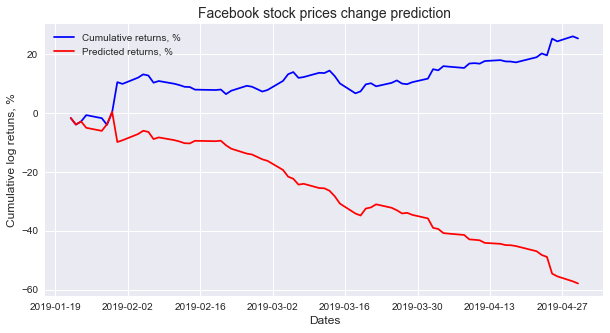

In [147]:
plt.figure(figsize=(10,5))
plt.plot(fb_cumulative_returns_10d_full, color = 'b', label = 'Cumulative returns, %')
plt.plot(fb_predicted_returns_cum_10d_full, color = 'r', label = 'Predicted returns, %')
plt.title('Facebook stock prices change prediction', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

It seems that difference between predicted cumulative returns and cumlutive returns is very big in this case.

Now the last from GAFA list is Amazon. Let's fit model on Amazon data sets.


<img src ='amazon.png'>
#### 2.2.4.  Amazon: kNN model
##### 2.2.4.1. Amazon: simple model (5 days window width)

Let's create data set on Amazon data with window width of 5


In [148]:
amz_data = dataset(df_log['Close Amazon'], 5)
amz_data.tail()

(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)
2019-04-24  0.009801  0.000955 -0.001680  0.013668  0.019134      -0.011512
2019-04-25  0.000955 -0.001680  0.013668  0.019134 -0.011512       0.000263
2019-04-26 -0.001680  0.013668  0.019134 -0.011512  0.000263       0.025115
2019-04-29  0.013668  0.019134 -0.011512  0.000263  0.025115      -0.006274
2019-04-30  0.019134 -0.011512  0.000263  0.025115 -0.006274      -0.006163

In [149]:
#Apply function to fit KNN clasifier to Amazon data with a window width of 5

amz_acc = data(amz_data)
amz_acc.head()

Train set shape: (1268, 6) (1268,)
Test set shape: (318, 6) (318,)
Baseline accuracy: 0.575


accuracy  knn__n_neighbors  knn__p knn__weights
27  0.581761                25       2     distance
21  0.575472                20       1     distance
26  0.569182                25       2      uniform
30  0.566038                30       2      uniform
35  0.562893                35       2     distance

We can see that the baseline accuracy is about 0.57.
Maximal accuracy is about 0.58 on a test dataset that is very close to baseline.<br>

Now let's find the combination with the best accuracy.

In [150]:
#Find the combination with the best accuracy

data_accuracy(amz_acc)

Top_accuracy on test set: 0.58 with k=25, distance metric=2, weighting function=distance


C:\Users\User1\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Let's now visualise accuracies

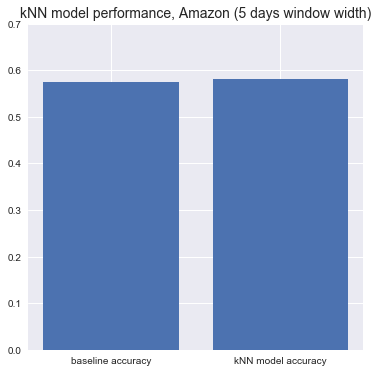

In [151]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.575, 0.581])
plt.xticks([1,2], ['baseline accuracy', 'kNN model accuracy'])
plt.ylim(0, 0.7)
plt.title('kNN model performance, Amazon (5 days window width)', fontsize=14);

We can see on the plot that model accuracy in indeed very close to baseline's.


In [152]:
#compare  performances

#model performance data frame
knn_google_simple = [0.522, 0.553]
knn_google_intermediate = [0.521, 0.548]
knn_google_complex = [0.521, 0.561]
knn_apple_simple = [0.547, 0.553]
knn_apple_intermediate = [0.549, 0.589]
knn_apple_complex = [0.549, 0.539]
knn_facebook_simple = [0.509, 0.547]
knn_facebook_intermediate = [0.50, 0.56]
knn_facebook_complex = [0.508, 0.542]
knn_amazon_simple = [0.575, 0.581]


df_performance_knn = pd.DataFrame({
                'knn_Google_simple_model': knn_google_simple,
                'knn_Google_intermediate_model': knn_google_intermediate,
                'knn_Google_complex_model' : knn_google_complex,
                'knn_Apple_simple_model': knn_apple_simple,
                'knn_Apple_intermediate_model' : knn_apple_intermediate,
                'knn_Apple_complex_model' : knn_apple_complex,
                'knn_Facebook_simple_model' : knn_facebook_simple,
                'knn_Facebook_intermediate_model' : knn_facebook_intermediate,
                'knn_Facebook_complex_model' : knn_facebook_complex,
                'knn_Amazon_simple_model' : knn_amazon_simple
    
    
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance_knn

Baseline accuracy  Model accuracy
knn_Amazon_simple_model                      0.575           0.581
knn_Apple_complex_model                      0.549           0.539
knn_Apple_intermediate_model                 0.549           0.589
knn_Apple_simple_model                       0.547           0.553
knn_Facebook_complex_model                   0.508           0.542
knn_Facebook_intermediate_model              0.500           0.560
knn_Facebook_simple_model                    0.509           0.547
knn_Google_complex_model                     0.521           0.561
knn_Google_intermediate_model                0.521           0.548
knn_Google_simple_model                      0.522           0.553


Now let's define the function to compute predictions using hyperparameters to best model performance

In [153]:
#Compute predictions for Amazon data
#Put predictions in data frame with Amazon data

predictions_amz = data_tuned(amz_data, 25, 2, 'distance')
amz_data['y'] = np.where(amz_data['Day price (t)'].shift(-1) > 0, 1, -1)
amz_data['Predictions'] = predictions_amz 
amz_data.tail(5)


(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24  0.009801  0.000955 -0.001680  0.013668  0.019134      -0.011512   
2019-04-25  0.000955 -0.001680  0.013668  0.019134 -0.011512       0.000263   
2019-04-26 -0.001680  0.013668  0.019134 -0.011512  0.000263       0.025115   
2019-04-29  0.013668  0.019134 -0.011512  0.000263  0.025115      -0.006274   
2019-04-30  0.019134 -0.011512  0.000263  0.025115 -0.006274      -0.006163   

            y  Predictions  
2019-04-24  1           -1  
2019-04-25  1            1  
2019-04-26 -1            1  
2019-04-29 -1           -1  
2019-04-30 -1            1

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

Now let's compute cumulative log returns and cumulative predicted log returns and visualise it to compare.
Cumulative log returns is a cumulative sum of daily log returns.

Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 


In [154]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
amz_data['Cumulative_returns'] = amz_data[split:]['Day price (t)'].cumsum()*100
amz_cumulative_returns = amz_data['Cumulative_returns']


#Compute cumulative predicted returns
#predicted returns = day price (log return, absolute value) * predicted signal('1' or '-1') for this day (prediction signal 
#from previous day for current day).

amz_data['Predicted returns'] = (np.abs(amz_data['Day price (t)']))*(amz_data['Predictions'].shift(1))

amz_data['Predicted returns_cum'] = amz_data[split:]['Predicted returns'].cumsum()*100
amz_predicted_returns_cum = amz_data['Predicted returns_cum']

amz_data.tail()

(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24  0.009801  0.000955 -0.001680  0.013668  0.019134      -0.011512   
2019-04-25  0.000955 -0.001680  0.013668  0.019134 -0.011512       0.000263   
2019-04-26 -0.001680  0.013668  0.019134 -0.011512  0.000263       0.025115   
2019-04-29  0.013668  0.019134 -0.011512  0.000263  0.025115      -0.006274   
2019-04-30  0.019134 -0.011512  0.000263  0.025115 -0.006274      -0.006163   

            y  Predictions  Cumulative_returns  Predicted returns  \
2019-04-24  1           -1           14.773683           0.011512   
2019-04-25  1            1           14.799971          -0.000263   
2019-04-26 -1            1           17.311472           0.025115   
2019-04-29 -1           -1           16.684071           0.006274   
2019-04-30 -1            1           16.067759          -0.006163   

            Predicted returns_cum  
2019-04-24              24.180991  
2019-04-25              24.154702  
2019-04-26              26.666203  
2019-04-29              27.293603  
2019-04-30              26.677292

Let's now visualize cumulative returns and predicted cumulative returns

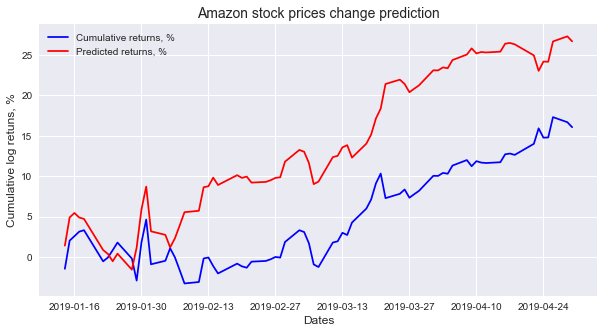

In [155]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(amz_cumulative_returns, color = 'b', label = 'Cumulative returns, %')
plt.plot(amz_predicted_returns_cum, color = 'r', label = 'Predicted returns, %')
plt.title('Amazon stock prices change prediction', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

On the plot we can see that Cumulative returns for 2019  are around 16% and cumulative predicted returns in the same period are around 26%. At the begginning of the year pattern is pretty the same but then there is some difference although trend to growth remains the same.

##### 2.2.4.2. Amazon - 2: intermediate model (10 days window width)

Create data set with 10 days window width on Amazon data

In [156]:
amz_data_10d = dataset(df_log['Close Amazon'], 10)
amz_data_10d.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.007608  0.006239 -0.001766 -0.000548  0.000982  0.009801   
2019-04-25  0.006239 -0.001766 -0.000548  0.000982  0.009801  0.000955   
2019-04-26 -0.001766 -0.000548  0.000982  0.009801  0.000955 -0.001680   
2019-04-29 -0.000548  0.000982  0.009801  0.000955 -0.001680  0.013668   
2019-04-30  0.000982  0.009801  0.000955 -0.001680  0.013668  0.019134   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  
2019-04-24  0.000955 -0.001680  0.013668  0.019134      -0.011512  
2019-04-25 -0.001680  0.013668  0.019134 -0.011512       0.000263  
2019-04-26  0.013668  0.019134 -0.011512  0.000263       0.025115  
2019-04-29  0.019134 -0.011512  0.000263  0.025115      -0.006274  
2019-04-30 -0.011512  0.000263  0.025115 -0.006274      -0.006163

In [157]:
#Apply function to fit KNN to Amazon data set with window width of 10.

amz_acc_10d = data(amz_data_10d)
amz_acc_10d.head()

Train set shape: (1264, 11) (1264,)
Test set shape: (317, 11) (317,)
Baseline accuracy: 0.574


accuracy  knn__n_neighbors  knn__p knn__weights
35  0.580442                35       2     distance
21  0.580442                20       1     distance
38  0.577287                40       2      uniform
33  0.574132                35       1     distance
34  0.574132                35       2      uniform

Baseline aacuracy is about 0.57 and best model accuracy is about 0.58.

Choose combination with the best accuracy.

In [158]:
data_accuracy(amz_acc_10d)

Top_accuracy on test set: 0.58 with k=35, distance metric=2, weighting function=distance


C:\Users\User1\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Let's visualise accuracies and put it into the Performance data frame

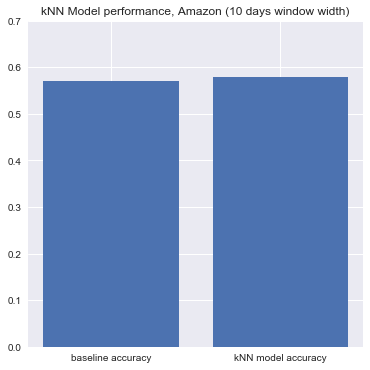

In [159]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.57, 0.58])
plt.xticks([1,2], ['baseline accuracy', 'kNN model accuracy'])
plt.ylim(0, 0.7)
plt.title('kNN Model performance, Amazon (10 days window width)');

In [160]:
#compare  performances

#model performance data frame
knn_google_simple = [0.522, 0.553]
knn_google_intermediate = [0.521, 0.548]
knn_google_complex = [0.521, 0.561]
knn_apple_simple = [0.547, 0.553]
knn_apple_intermediate = [0.549, 0.589]
knn_apple_complex = [0.549, 0.539]
knn_facebook_simple = [0.509, 0.547]
knn_facebook_intermediate = [0.50, 0.56]
knn_facebook_complex = [0.508, 0.542]
knn_amazon_simple = [0.575, 0.581]
knn_amazon_intermediate = [0.574, 0.580]

df_performance_knn = pd.DataFrame({
                'knn_Google_simple_model': knn_google_simple,
                'knn_Google_intermediate_model': knn_google_intermediate,
                'knn_Google_complex_model' : knn_google_complex,
                'knn_Apple_simple_model': knn_apple_simple,
                'knn_Apple_intermediate_model' : knn_apple_intermediate,
                'knn_Apple_complex_model' : knn_apple_complex,
                'knn_Facebook_simple_model' : knn_facebook_simple,
                'knn_Facebook_intermediate_model' : knn_facebook_intermediate,
                'knn_Facebook_complex_model' : knn_facebook_complex,
                'knn_Amazon_simple_model' : knn_amazon_simple,
                'knn_Amazon_intermediate_model' : knn_amazon_intermediate 
    
    
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance_knn

Baseline accuracy  Model accuracy
knn_Amazon_intermediate_model                0.574           0.580
knn_Amazon_simple_model                      0.575           0.581
knn_Apple_complex_model                      0.549           0.539
knn_Apple_intermediate_model                 0.549           0.589
knn_Apple_simple_model                       0.547           0.553
knn_Facebook_complex_model                   0.508           0.542
knn_Facebook_intermediate_model              0.500           0.560
knn_Facebook_simple_model                    0.509           0.547
knn_Google_complex_model                     0.521           0.561
knn_Google_intermediate_model                0.521           0.548
knn_Google_simple_model                      0.522           0.553

In [161]:
#Compute predictions for Amazon data
#Put predictions in data frame with Amazon

predictions_amz_10d = data_tuned(amz_data_10d, 35, 2, 'distance')

amz_data_10d['y'] = np.where(amz_data_10d['Day price (t)'].shift(-1) > 0, 1, -1) #target values
amz_data_10d['Predictions'] = predictions_amz_10d #predicted signal
amz_data_10d.tail()


(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.007608  0.006239 -0.001766 -0.000548  0.000982  0.009801   
2019-04-25  0.006239 -0.001766 -0.000548  0.000982  0.009801  0.000955   
2019-04-26 -0.001766 -0.000548  0.000982  0.009801  0.000955 -0.001680   
2019-04-29 -0.000548  0.000982  0.009801  0.000955 -0.001680  0.013668   
2019-04-30  0.000982  0.009801  0.000955 -0.001680  0.013668  0.019134   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-24  0.000955 -0.001680  0.013668  0.019134      -0.011512  1   
2019-04-25 -0.001680  0.013668  0.019134 -0.011512       0.000263  1   
2019-04-26  0.013668  0.019134 -0.011512  0.000263       0.025115 -1   
2019-04-29  0.019134 -0.011512  0.000263  0.025115      -0.006274 -1   
2019-04-30 -0.011512  0.000263  0.025115 -0.006274      -0.006163 -1   

            Predictions  
2019-04-24            1  
2019-04-25           -1  
2019-04-26            1  
2019-04-29            1  
2019-04-30           -1

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

Now let's compute cumulative log returns and cumulative predicted log returns and visualiye it to compare.<br>
Cumulative log returns is a cumulative sum of daily log returns.<br>
Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 

In [162]:
split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
amz_data_10d['Cumulative_returns'] = amz_data_10d[split:]['Day price (t)'].cumsum()*100
amz_cumulative_returns_10d = amz_data_10d['Cumulative_returns']

#Compute cumulative predicted returns
amz_data_10d['Predicted returns'] = (np.abs(amz_data_10d['Day price (t)']))*(amz_data_10d['Predictions'].shift(1))
amz_data_10d['Predicted returns_cum'] = amz_data_10d[split:]['Predicted returns'].cumsum()*100
amz_predicted_returns_cum_10d = amz_data_10d['Predicted returns_cum']

amz_data_10d.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.007608  0.006239 -0.001766 -0.000548  0.000982  0.009801   
2019-04-25  0.006239 -0.001766 -0.000548  0.000982  0.009801  0.000955   
2019-04-26 -0.001766 -0.000548  0.000982  0.009801  0.000955 -0.001680   
2019-04-29 -0.000548  0.000982  0.009801  0.000955 -0.001680  0.013668   
2019-04-30  0.000982  0.009801  0.000955 -0.001680  0.013668  0.019134   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-24  0.000955 -0.001680  0.013668  0.019134      -0.011512  1   
2019-04-25 -0.001680  0.013668  0.019134 -0.011512       0.000263  1   
2019-04-26  0.013668  0.019134 -0.011512  0.000263       0.025115 -1   
2019-04-29  0.019134 -0.011512  0.000263  0.025115      -0.006274 -1   
2019-04-30 -0.011512  0.000263  0.025115 -0.006274      -0.006163 -1   

            Predictions  Cumulative_returns  Predicted returns  \
2019-04-24            1           11.438409           0.011512   
2019-04-25           -1           11.464697           0.000263   
2019-04-26            1           13.976197          -0.025115   
2019-04-29            1           13.348797           0.006274   
2019-04-30           -1           12.732485           0.006163   

            Predicted returns_cum  
2019-04-24              18.030833  
2019-04-25              18.057121  
2019-04-26              15.545621  
2019-04-29              16.173021  
2019-04-30              16.789333

Let's visualize cumulative returns and predicted cumulative returns

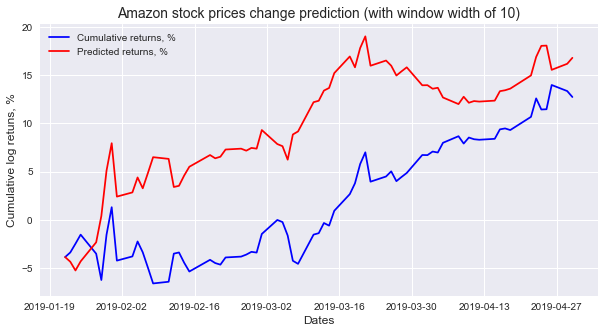

In [163]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(amz_cumulative_returns_10d, color = 'b', label = 'Cumulative returns, %')
plt.plot(amz_predicted_returns_cum_10d, color = 'r', label = 'Predicted returns, %')
plt.title('Amazon stock prices change prediction (with window width of 10)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

On the plot we can see that Cumulative returns in 2019  are around 12% and Cumulative predicted returns in the same period are around 16% that is quite close.

As a next step, let's try fit the model to dataset with all features (indexes, capitalistaion, mobile and Internet users)

##### 2.2.4.3. Amazon - 3. complex model (all variables and 10 days window width)

In [164]:
amazon_data_10d = dataset(df_log['Close Amazon'], 10)
amazon_data_10d.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17  0.004537  0.002589  0.035295 -0.007778 -0.000113 -0.003799   
2013-01-18  0.002589  0.035295 -0.007778 -0.000113 -0.003799  0.009751   
2013-01-22  0.035295 -0.007778 -0.000113 -0.003799  0.009751  0.017719   
2013-01-23 -0.007778 -0.000113 -0.003799  0.009751  0.017719 -0.003048   
2013-01-24 -0.000113 -0.003799  0.009751  0.017719 -0.003048 -0.010983   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  
2013-01-17  0.009751  0.017719 -0.003048 -0.010983       0.005747  
2013-01-18  0.017719 -0.003048 -0.010983  0.005747       0.006045  
2013-01-22 -0.003048 -0.010983  0.005747  0.006045      -0.007118  
2013-01-23 -0.010983  0.005747  0.006045 -0.007118      -0.007728  
2013-01-24  0.005747  0.006045 -0.007118 -0.007728       0.019758

In [165]:
amazon_data_10d_full = pd.concat([amazon_data_10d, df_log], axis=1)
amazon_data_10d_full.dropna(inplace=True)
amazon_data_10d_full.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17  0.004537  0.002589  0.035295 -0.007778 -0.000113 -0.003799   
2013-01-18  0.002589  0.035295 -0.007778 -0.000113 -0.003799  0.009751   
2013-01-22  0.035295 -0.007778 -0.000113 -0.003799  0.009751  0.017719   
2013-01-23 -0.007778 -0.000113 -0.003799  0.009751  0.017719 -0.003048   
2013-01-24 -0.000113 -0.003799  0.009751  0.017719 -0.003048 -0.010983   

               (t-4)     (t-3)     (t-2)     (t-1)         ...           \
2013-01-17  0.009751  0.017719 -0.003048 -0.010983         ...            
2013-01-18  0.017719 -0.003048 -0.010983  0.005747         ...            
2013-01-22 -0.003048 -0.010983  0.005747  0.006045         ...            
2013-01-23 -0.010983  0.005747  0.006045 -0.007118         ...            
2013-01-24  0.005747  0.006045 -0.007118 -0.007728         ...            

            Arab_States__mob_users  CIS__mob_users  Europe__mob_users  \
2013-01-17                5.974573        5.744604           6.691463   
2013-01-18                5.974573        5.744924           6.691463   
2013-01-22                5.974827        5.744924           6.691463   
2013-01-23                5.974827        5.744924           6.691463   
2013-01-24                5.974827        5.744924           6.691463   

            Americas__mob_users  Asia_web_users  Africa__web_users  \
2013-01-17             6.929810        7.020012           4.427239   
2013-01-18             6.929908        7.020459           4.428433   
2013-01-22             6.930006        7.020905           4.429626   
2013-01-23             6.930104        7.021352           4.430817   
2013-01-24             6.930104        7.021887           4.432007   

            Arab_States__web_users  CIS__web_users  Europe__web_users  \
2013-01-17                4.670021        4.960044           6.071892   
2013-01-18                4.670958        4.960044           6.071892   
2013-01-22                4.671894        4.960044           6.072122   
2013-01-23                4.671894        4.960745           6.072122   
2013-01-24                4.672829        4.960745           6.072353   

            Americas__web_users  
2013-01-17             6.254406  
2013-01-18             6.254598  
2013-01-22             6.254790  
2013-01-23             6.254982  
2013-01-24             6.255174  

[5 rows x 41 columns]

In [166]:
#Apply function to fit KNN to Amazon full data with 10 days window width

amazon_acc_10d_full = data(amazon_data_10d_full)
amazon_acc_10d_full.head()

Train set shape: (1264, 41) (1264,)
Test set shape: (317, 41) (317,)
Baseline accuracy: 0.574


accuracy  knn__n_neighbors  knn__p knn__weights
46  0.593060                50       2      uniform
47  0.586751                50       2     distance
12  0.583596                10       1      uniform
35  0.577287                35       2     distance
34  0.577287                35       2      uniform

Choose combination with the best accuracy

In [167]:
data_accuracy(amazon_acc_10d_full)

Top_accuracy on test set: 0.59 with k=50, distance metric=2, weighting function=uniform


C:\Users\User1\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Let's now visualise accuracies and  and put it into the Performance data frame to compare

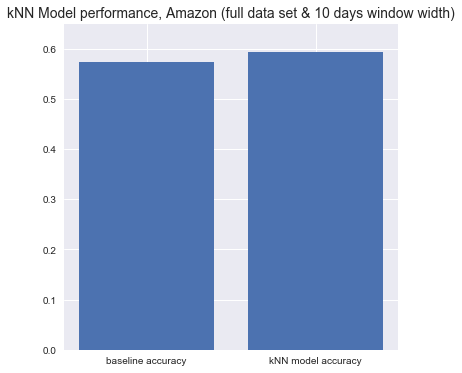

In [168]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.574, 0.593])
plt.xticks([1,2], ['baseline accuracy', 'kNN model accuracy'])
plt.ylim(0, 0.65)
plt.title('kNN Model performance, Amazon (full data set & 10 days window width)', fontsize=14);

In [169]:
#compare  performances

#model performance data frame
knn_google_simple = [0.522, 0.553]
knn_google_intermediate = [0.521, 0.548]
knn_google_complex = [0.521, 0.561]
knn_apple_simple = [0.547, 0.553]
knn_apple_intermediate = [0.549, 0.589]
knn_apple_complex = [0.549, 0.539]
knn_facebook_simple = [0.509, 0.547]
knn_facebook_intermediate = [0.50, 0.56]
knn_facebook_complex = [0.508, 0.542]
knn_amazon_simple = [0.575, 0.581]
knn_amazon_intermediate = [0.574, 0.580]
knn_amazon_complex = [0.574, 0.593]


df_performance_knn = pd.DataFrame({
                'knn_Google_simple_model': knn_google_simple,
                'knn_Google_intermediate_model': knn_google_intermediate,
                'knn_Google_complex_model' : knn_google_complex,
                'knn_Apple_simple_model': knn_apple_simple,
                'knn_Apple_intermediate_model' : knn_apple_intermediate,
                'knn_Apple_complex_model' : knn_apple_complex,
                'knn_Facebook_simple_model' : knn_facebook_simple,
                'knn_Facebook_intermediate_model' : knn_facebook_intermediate,
                'knn_Facebook_complex_model' : knn_facebook_complex,
                'knn_Amazon_simple_model' : knn_amazon_simple,
                'knn_Amazon_intermediate_model' : knn_amazon_intermediate, 
                'knn_Amazon_complex_model':knn_amazon_complex
    
    
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance_knn

Baseline accuracy  Model accuracy
knn_Amazon_complex_model                     0.574           0.593
knn_Amazon_intermediate_model                0.574           0.580
knn_Amazon_simple_model                      0.575           0.581
knn_Apple_complex_model                      0.549           0.539
knn_Apple_intermediate_model                 0.549           0.589
knn_Apple_simple_model                       0.547           0.553
knn_Facebook_complex_model                   0.508           0.542
knn_Facebook_intermediate_model              0.500           0.560
knn_Facebook_simple_model                    0.509           0.547
knn_Google_complex_model                     0.521           0.561
knn_Google_intermediate_model                0.521           0.548
knn_Google_simple_model                      0.522           0.553

It seems that the higest accuracy for Amazon is on Complex model and it is at about 0.593.


Compute predictions for Amazon data<br>
Put predictions in data frame with Amazon data

In [170]:
predictions_amazon_10d_full = data_tuned(amazon_data_10d_full, 50, 2, 'uniform')
amazon_data_10d_full['Predictions'] = predictions_amazon_10d_full
amazon_data_10d_full.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17  0.004537  0.002589  0.035295 -0.007778 -0.000113 -0.003799   
2013-01-18  0.002589  0.035295 -0.007778 -0.000113 -0.003799  0.009751   
2013-01-22  0.035295 -0.007778 -0.000113 -0.003799  0.009751  0.017719   
2013-01-23 -0.007778 -0.000113 -0.003799  0.009751  0.017719 -0.003048   
2013-01-24 -0.000113 -0.003799  0.009751  0.017719 -0.003048 -0.010983   

               (t-4)     (t-3)     (t-2)     (t-1)     ...       \
2013-01-17  0.009751  0.017719 -0.003048 -0.010983     ...        
2013-01-18  0.017719 -0.003048 -0.010983  0.005747     ...        
2013-01-22 -0.003048 -0.010983  0.005747  0.006045     ...        
2013-01-23 -0.010983  0.005747  0.006045 -0.007118     ...        
2013-01-24  0.005747  0.006045 -0.007118 -0.007728     ...        

            CIS__mob_users  Europe__mob_users  Americas__mob_users  \
2013-01-17        5.744604           6.691463             6.929810   
2013-01-18        5.744924           6.691463             6.929908   
2013-01-22        5.744924           6.691463             6.930006   
2013-01-23        5.744924           6.691463             6.930104   
2013-01-24        5.744924           6.691463             6.930104   

            Asia_web_users  Africa__web_users  Arab_States__web_users  \
2013-01-17        7.020012           4.427239                4.670021   
2013-01-18        7.020459           4.428433                4.670958   
2013-01-22        7.020905           4.429626                4.671894   
2013-01-23        7.021352           4.430817                4.671894   
2013-01-24        7.021887           4.432007                4.672829   

            CIS__web_users  Europe__web_users  Americas__web_users  \
2013-01-17        4.960044           6.071892             6.254406   
2013-01-18        4.960044           6.071892             6.254598   
2013-01-22        4.960044           6.072122             6.254790   
2013-01-23        4.960745           6.072122             6.254982   
2013-01-24        4.960745           6.072353             6.255174   

            Predictions  
2013-01-17            1  
2013-01-18           -1  
2013-01-22           -1  
2013-01-23            1  
2013-01-24           -1  

[5 rows x 42 columns]

In columns 'Predictions' there is predicted signal whether stock prices change is positive or negaritve.<br>
Let's now visualize it

In [171]:
split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
amazon_data_10d_full['Cumulative_returns'] = amazon_data_10d_full[split:]['Day price (t)'].cumsum()*100
amz_cumulative_returns_10d_full = amazon_data_10d_full['Cumulative_returns']

#Compute cumulative predicted returns
amazon_data_10d_full['Predicted returns'] = (np.abs(amazon_data_10d_full['Day price (t)']))*(amazon_data_10d_full['Predictions'].shift(1))
amazon_data_10d_full['Predicted returns_cum'] = amazon_data_10d_full[split:]['Predicted returns'].cumsum()*100
amz_predicted_returns_cum_10d_full = amazon_data_10d_full['Predicted returns_cum']

amazon_data_10d_full.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.007608  0.006239 -0.001766 -0.000548  0.000982  0.009801   
2019-04-25  0.006239 -0.001766 -0.000548  0.000982  0.009801  0.000955   
2019-04-26 -0.001766 -0.000548  0.000982  0.009801  0.000955 -0.001680   
2019-04-29 -0.000548  0.000982  0.009801  0.000955 -0.001680  0.013668   
2019-04-30  0.000982  0.009801  0.000955 -0.001680  0.013668  0.019134   

               (t-4)     (t-3)     (t-2)     (t-1)          ...            \
2019-04-24  0.000955 -0.001680  0.013668  0.019134          ...             
2019-04-25 -0.001680  0.013668  0.019134 -0.011512          ...             
2019-04-26  0.013668  0.019134 -0.011512  0.000263          ...             
2019-04-29  0.019134 -0.011512  0.000263  0.025115          ...             
2019-04-30 -0.011512  0.000263  0.025115 -0.006274          ...             

            Asia_web_users  Africa__web_users  Arab_States__web_users  \
2019-04-24        7.579015           5.484382                5.256453   
2019-04-25        7.579270           5.484797                5.256974   
2019-04-26        7.579577           5.485212                5.256974   
2019-04-29        7.579832           5.485626                5.257495   
2019-04-30        7.580087           5.486041                5.257495   

            CIS__web_users  Europe__web_users  Americas__web_users  \
2019-04-24        5.305293           6.248236             6.536402   
2019-04-25        5.305293           6.248430             6.536547   
2019-04-26        5.305789           6.248430             6.536692   
2019-04-29        5.305789           6.248623             6.536837   
2019-04-30        5.305789           6.248623             6.536981   

            Predictions  Cumulative_returns  Predicted returns  \
2019-04-24            1           11.438409           0.011512   
2019-04-25            1           11.464697           0.000263   
2019-04-26            1           13.976197           0.025115   
2019-04-29            1           13.348797           0.006274   
2019-04-30            1           12.732485           0.006163   

            Predicted returns_cum  
2019-04-24              43.676971  
2019-04-25              43.703259  
2019-04-26              46.214760  
2019-04-29              46.842160  
2019-04-30              47.458472  

[5 rows x 45 columns]

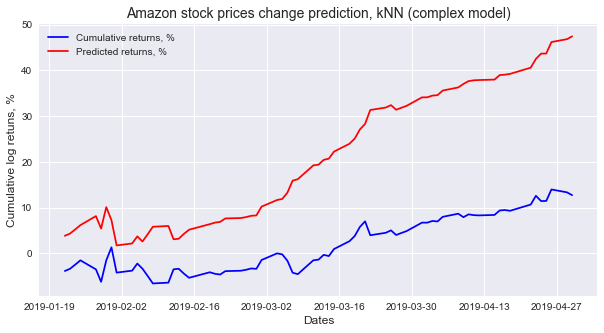

In [172]:
plt.figure(figsize=(10,5))
plt.plot(amz_cumulative_returns_10d_full, color = 'b', label = 'Cumulative returns, %')
plt.plot(amz_predicted_returns_cum_10d_full, color = 'r', label = 'Predicted returns, %')
plt.title('Amazon stock prices change prediction, kNN (complex model)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

On the plot we can see that Cumulative returns in 2019  are around 12% and Cumulative predicted returns in the same period are around 47%.

As to model accuracy, best performance is for Amazon on complex model, then for Apple on intermediate model and for Amazon again for simple and intermediate models



Baseline accuracy  Model accuracy
knn_Amazon_complex_model                   0.574           0.593
knn_Apple_intermediate_model               0.549           0.589
knn_Amazon_simple_model                    0.575           0.581
knn_Amazon_intermediate_model              0.574           0.580
knn_Google_complex_model                   0.521           0.561

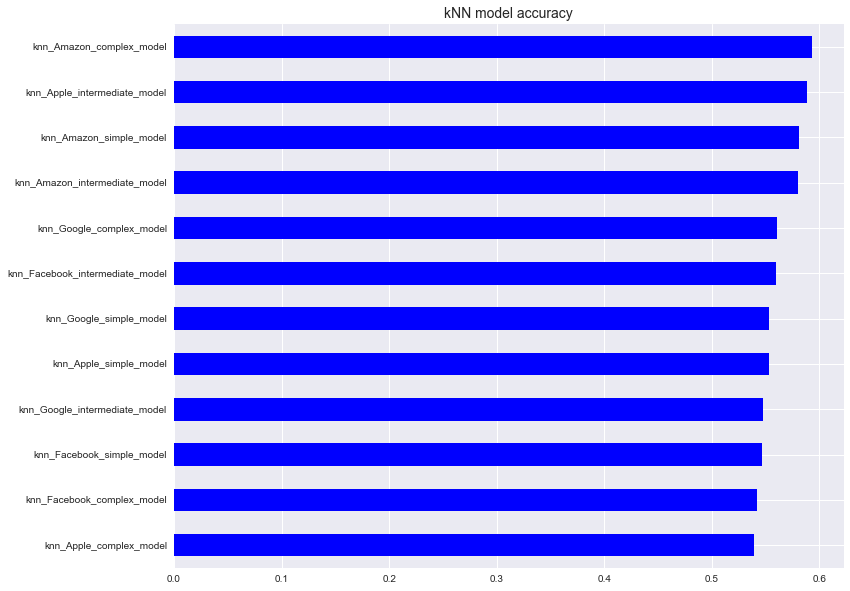

In [173]:
df_performance_knn['Model accuracy'].sort_values().plot.barh(figsize=(12,10), color='blue').set_title('kNN model accuracy', fontsize=14);
df_performance_knn.sort_values(by='Model accuracy', ascending=False).head()

Another model proposed to use is Logistic regression. Let's fit it and see its performance for same data sets: simple, intermediate and complex for all four GAFA companies.

### 2.3. Logistic regression

As a first step, download necessary Scikit-learn objects and define the functions to fit the model

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [175]:
#function for logistic regression 

def data_logreg(df):
    #Input matrix
    X = df.values

    #Target variable
    y = np.where(df['Day price (t)'].shift(-1) > 0, 1, -1) #if next day log price percent change is positive 
                                                           #then '1', otherwise '-1'
    
    #Train/Test split
    split_share = 0.7
    split = int(split_share*len(df))

    # Train set
    X_train = X[:split]
    y_train = y[:split]
    
    #Test set
    X_test = X[split:]
    y_test = y[split:]
    
    #Print train/test sets's shapes
    print('Train set shape:', X_train.shape, y_train.shape )
    print('Test set shape:', X_test.shape, y_test.shape )
    
    #create the dummy classifier
    dummy = DummyClassifier(strategy='most_frequent')
    
    #fit it to the train data
    dummy.fit(X_train, y_train)
    
    #Compute accuracy on the test set
    baseline_accuracy = dummy.score(X_test, y_test)
    print('Baseline accuracy: {:.3f}'.format(baseline_accuracy))
    
    
    #Create Pipeline
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
    ])

    #Create cross-validation object
    grid_cv = GridSearchCV(pipe,[{
        'logreg__C': [0.1, 1, 10]           
    }],cv=10)
    
           
    #Fit estimator
    grid_cv.fit(X_train, y_train)
          
    #Collect results in a DataFrame
    df_logreg = pd.DataFrame.from_items([
        ('C', grid_cv.cv_results_['param_logreg__C']),
        ('mean_te', grid_cv.cv_results_['mean_test_score']),
        ('std_te', grid_cv.cv_results_['std_test_score'])
    ])
    
    #Top scores
    return df_logreg.sort_values(by='mean_te', ascending=False).head()
    

In [176]:
#Function to fit classifier with parameter C , compute accuracy and probabilities

def data_logreg_tuned1(df, i):
    #Input matrix
    X = df.values

    #Target variable
    y = np.where(df['Day price (t)'].shift(-1) > 0, 1, -1) #if next day log price percent change is positive 
                                                           #then '1', otherwise '-1'
    #Train/Test split
    split_share = 0.7
    split = int(split_share*len(df))

    # Train set
    X_train = X[:split]
    y_train = y[:split]
    
    #Test set
    X_test = X[split:]
    y_test = y[split:]

     #Create Pipeline
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
    ])

    pipe.set_params(logreg__C=i)
    pipe.fit(X_train, y_train)
    accuracy = pipe.score(X_test,y_test)
    probability = pipe.predict_proba(X_test)
    
    #collect probabilities in a DataFrame
    df_proba = pd.DataFrame(probability, index = df[split:].index, columns = ['down', 'up']) 
    
    print('Accuracy: {:.3}'.format(accuracy))
    return df_proba.head(10)


In [177]:
#Function to compute predictions

def data_logreg_tuned2(df, i):
    #Input matrix
    X = df.values

    #Target variable
    y = np.where(df['Day price (t)'].shift(-1) > 0, 1, -1) #if next day log price percent change is positive 
                                                           #then '1', otherwise '-1'
    #Train/Test split
    split_share = 0.7
    split = int(split_share*len(df))

    # Train set
    X_train = X[:split]
    y_train = y[:split]
    
    #Test set
    X_test = X[split:]
    y_test = y[split:]

    #Create Pipeline
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
    ])

    pipe.set_params(logreg__C=i)
    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X)
    
    return predictions

Let's start as before with Google and data set with window width of 5.


<img src ='googlelogo.png'>  
#### 2.3.1. Google: Logistic regression
##### 2.3.1.1.  Google-1: simple model (5 days window width)

In [178]:
#Google data for 5 days window width

google_data_logreg = dataset(df_log['Close Google'], 5)
google_data_logreg.tail()


(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)
2019-04-24  0.004926  0.007477  0.000024  0.010035  0.012501      -0.006784
2019-04-25  0.007477  0.000024  0.010035  0.012501 -0.006784       0.005914
2019-04-26  0.000024  0.010035  0.012501 -0.006784  0.005914       0.006886
2019-04-29  0.010035  0.012501 -0.006784  0.005914  0.006886       0.012032
2019-04-30  0.012501 -0.006784  0.005914  0.006886  0.012032      -0.080089

In [179]:
#Apply function to fit Logistic regression model to Google data with 5 days window width

google_acc_logreg = data_logreg(google_data_logreg)
google_acc_logreg.head()

Train set shape: (1110, 6) (1110,)
Test set shape: (476, 6) (476,)
Baseline accuracy: 0.521


C   mean_te    std_te
1    1  0.518919  0.038473
2   10  0.518919  0.038473
0  0.1  0.518018  0.039111

Baseline accuracy is about 0.521

Let fit model with hyperparameter C.

In [180]:
#Accuracy and classes probabilities

google_proba = data_logreg_tuned1(google_data_logreg, 1)
google_proba


Accuracy: 0.54


down        up
2017-06-08  0.489982  0.510018
2017-06-09  0.492036  0.507964
2017-06-12  0.448196  0.551804
2017-06-13  0.403149  0.596851
2017-06-14  0.425915  0.574085
2017-06-15  0.422269  0.577731
2017-06-16  0.454328  0.545672
2017-06-19  0.469155  0.530845
2017-06-20  0.467098  0.532902
2017-06-21  0.490184  0.509816

So the model accuracy we've got is about 0.54 that is a little bit better than baseline which is 0.52.

Let's visualise it and put it into the Performance data frame to compare.

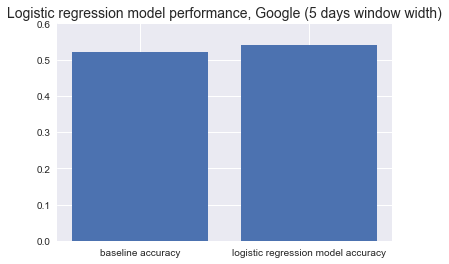

In [181]:
plt.figure(figsize=(6,4))
plt.bar([1,2], [0.521, 0.54])
plt.xticks([1,2], ['baseline accuracy', 'logistic regression model accuracy'])
plt.ylim(0, 0.6)
plt.title('Logistic regression model performance, Google (5 days window width)', fontsize=14);

In [182]:
#model performance data frame

logreg_google_simple = [0.521, 0.54]
df_performance = pd.DataFrame({'logreg_google_simple': logreg_google_simple}, index=['Baseline accuracy', 'Model accuracy']).T
df_performance

Baseline accuracy  Model accuracy
logreg_google_simple              0.521            0.54

In [183]:
# if compare to kNN model, the performance is pretty the same, kNN a little bit better.

df_performance_knn[-1:]

Baseline accuracy  Model accuracy
knn_Google_simple_model              0.522           0.553

Now let's use model to compute predictions

In [184]:
#Compute predictions for Google data, using the best C parameter
#Collect predictions in the data frame 

predictions_google_logreg = data_logreg_tuned2(google_data_logreg, 10)

google_data_logreg['y'] = np.where(google_data_logreg['Day price (t)'].shift(-1) > 0, 1, -1)
google_data_logreg['Predictions'] = predictions_google_logreg
google_data_logreg.tail(5)

(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24  0.004926  0.007477  0.000024  0.010035  0.012501      -0.006784   
2019-04-25  0.007477  0.000024  0.010035  0.012501 -0.006784       0.005914   
2019-04-26  0.000024  0.010035  0.012501 -0.006784  0.005914       0.006886   
2019-04-29  0.010035  0.012501 -0.006784  0.005914  0.006886       0.012032   
2019-04-30  0.012501 -0.006784  0.005914  0.006886  0.012032      -0.080089   

            y  Predictions  
2019-04-24  1           -1  
2019-04-25  1           -1  
2019-04-26  1            1  
2019-04-29 -1           -1  
2019-04-30 -1            1

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

As a next step let's compute cumulative log returns and cumulative predicted log returns and visualiye it to compare.<br>
Cumulative log returns is a cumulative sum of daily log returns.<br>
Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 


In [185]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
google_data_logreg['Cumulative_returns'] = google_data_logreg[split:]['Day price (t)'].cumsum()*100
g_cumulative_returns_logreg = google_data_logreg['Cumulative_returns']

#Compute cumulative predicted returns
google_data_logreg['Predicted returns'] = (np.abs(google_data_logreg['Day price (t)']))*(google_data_logreg['Predictions'].shift(1))
google_data_logreg['Predicted returns_cum'] = google_data_logreg[split:]['Predicted returns'].cumsum()*100
g_predicted_returns_cum_logreg = google_data_logreg['Predicted returns_cum']

google_data_logreg.tail()

(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24  0.004926  0.007477  0.000024  0.010035  0.012501      -0.006784   
2019-04-25  0.007477  0.000024  0.010035  0.012501 -0.006784       0.005914   
2019-04-26  0.000024  0.010035  0.012501 -0.006784  0.005914       0.006886   
2019-04-29  0.010035  0.012501 -0.006784  0.005914  0.006886       0.012032   
2019-04-30  0.012501 -0.006784  0.005914  0.006886  0.012032      -0.080089   

            y  Predictions  Cumulative_returns  Predicted returns  \
2019-04-24  1           -1           17.231768          -0.006784   
2019-04-25  1           -1           17.823165          -0.005914   
2019-04-26  1            1           18.511762          -0.006886   
2019-04-29 -1           -1           19.715006           0.012032   
2019-04-30 -1            1           11.706077          -0.080089   

            Predicted returns_cum  
2019-04-24               9.468106  
2019-04-25               8.876709  
2019-04-26               8.188112  
2019-04-29               9.391357  
2019-04-30               1.382427

Let's visualise it and compare with the same plot for kNN model.

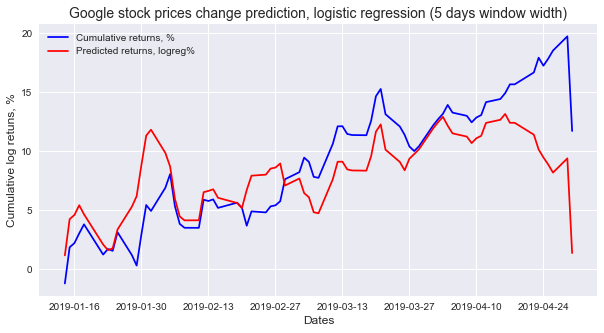

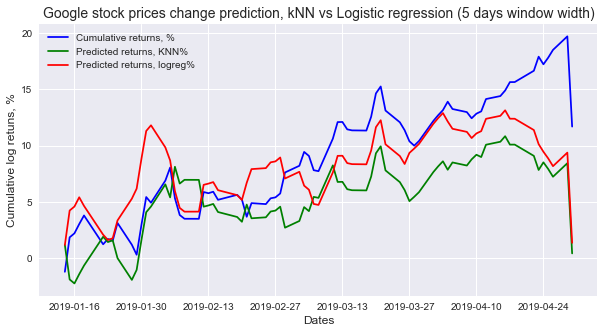

In [186]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(g_cumulative_returns_logreg, color = 'b', label = 'Cumulative returns, %')
plt.plot(g_predicted_returns_cum_logreg, color = 'r', label = 'Predicted returns, logreg%')
plt.title('Google stock prices change prediction, logistic regression (5 days window width)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

#Plot the results
plt.figure(figsize=(10,5))
plt.plot(g_cumulative_returns_logreg, color = 'b', label = 'Cumulative returns, %')
plt.plot(g_predicted_returns_cum, color = 'g', label = 'Predicted returns, KNN%')
plt.plot(g_predicted_returns_cum_logreg, color = 'r', label = 'Predicted returns, logreg%')
plt.title('Google stock prices change prediction, kNN vs Logistic regression (5 days window width)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

We can see that Logistic regression prediction is closer to cumulative log return curve than kNN's one.

Now, let's fit Logistic regression classifier to Google data set with windw width of 10 days.

#### Google-2: intermediate model (10 days window width)

In [187]:
#Google data for 10 days window width

google_data_logreg_10d = dataset(df_log['Close Google'], 10)
google_data_logreg_10d.tail()


(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.005489  0.004093  0.002044  0.010939  0.002649  0.004926   
2019-04-25  0.004093  0.002044  0.010939  0.002649  0.004926  0.007477   
2019-04-26  0.002044  0.010939  0.002649  0.004926  0.007477  0.000024   
2019-04-29  0.010939  0.002649  0.004926  0.007477  0.000024  0.010035   
2019-04-30  0.002649  0.004926  0.007477  0.000024  0.010035  0.012501   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  
2019-04-24  0.007477  0.000024  0.010035  0.012501      -0.006784  
2019-04-25  0.000024  0.010035  0.012501 -0.006784       0.005914  
2019-04-26  0.010035  0.012501 -0.006784  0.005914       0.006886  
2019-04-29  0.012501 -0.006784  0.005914  0.006886       0.012032  
2019-04-30 -0.006784  0.005914  0.006886  0.012032      -0.080089

In [188]:
#Apply function to fit Logistic regression model to Google data set with 10 days wondow width

google_acc_logreg_10d = data_logreg(google_data_logreg_10d)
google_acc_logreg_10d.head()

Train set shape: (1106, 11) (1106,)
Test set shape: (475, 11) (475,)
Baseline accuracy: 0.522


C   mean_te    std_te
0  0.1  0.518083  0.045791
1    1  0.517179  0.045605
2   10  0.517179  0.045605

Baseline accuracy is about 0.522

Let fit model with hyperparameter C.

In [189]:
#Accuracy and classes probabilities

google_proba_10d = data_logreg_tuned1(google_data_logreg_10d, 0.1)
google_proba_10d


Accuracy: 0.535


down        up
2017-06-09  0.495733  0.504267
2017-06-12  0.467326  0.532674
2017-06-13  0.404028  0.595972
2017-06-14  0.405799  0.594201
2017-06-15  0.426882  0.573118
2017-06-16  0.476625  0.523375
2017-06-19  0.427029  0.572971
2017-06-20  0.437103  0.562897
2017-06-21  0.525786  0.474214
2017-06-22  0.468560  0.531440

So the model accuracy we've got is about 0.535 that is a little bit better than baseline which is 0.522.

Let's visualise it and put it into the Performance data frame to compare.

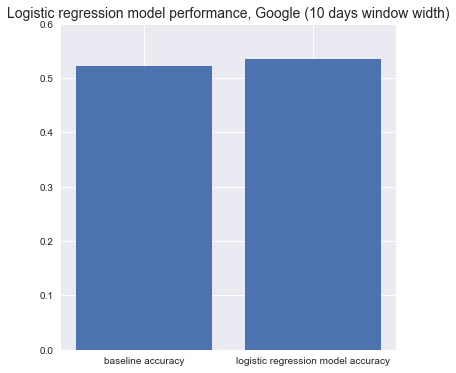

In [190]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.522, 0.535])
plt.xticks([1,2], ['baseline accuracy', 'logistic regression model accuracy'])
plt.ylim(0, 0.6)
plt.title('Logistic regression model performance, Google (10 days window width)', fontsize=14);

In [191]:
#model performance data frame

logreg_google_simple_model = [0.521, 0.54]
logreg_google_intermediate_model = [0.522, 0.535]
df_performance = pd.DataFrame({
                'logreg_Google_simple_model': logreg_google_simple_model,
                'logreg_Google_intermediate_model': logreg_google_intermediate_model
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance

Baseline accuracy  Model accuracy
logreg_Google_intermediate_model              0.522           0.535
logreg_Google_simple_model                    0.521           0.540

In [192]:
#on Goole intermediate model kNN performance is better 0.548 vs 0.535  of logistic regression.

df_performance_knn[-2:]

Baseline accuracy  Model accuracy
knn_Google_intermediate_model              0.521           0.548
knn_Google_simple_model                    0.522           0.553

Now let's compute predictions

In [193]:
#Compute predictions for Google data
#Collect predictions in the data frame 

predictions_google_logreg_10d = data_logreg_tuned2(google_data_logreg_10d, 0.1)
google_data_logreg_10d['y'] = np.where(google_data_logreg_10d['Day price (t)'].shift(-1) > 0, 1, -1)
google_data_logreg_10d['Predictions'] = predictions_google_logreg_10d
google_data_logreg_10d.tail(5)

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.005489  0.004093  0.002044  0.010939  0.002649  0.004926   
2019-04-25  0.004093  0.002044  0.010939  0.002649  0.004926  0.007477   
2019-04-26  0.002044  0.010939  0.002649  0.004926  0.007477  0.000024   
2019-04-29  0.010939  0.002649  0.004926  0.007477  0.000024  0.010035   
2019-04-30  0.002649  0.004926  0.007477  0.000024  0.010035  0.012501   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-24  0.007477  0.000024  0.010035  0.012501      -0.006784  1   
2019-04-25  0.000024  0.010035  0.012501 -0.006784       0.005914  1   
2019-04-26  0.010035  0.012501 -0.006784  0.005914       0.006886  1   
2019-04-29  0.012501 -0.006784  0.005914  0.006886       0.012032 -1   
2019-04-30 -0.006784  0.005914  0.006886  0.012032      -0.080089 -1   

            Predictions  
2019-04-24           -1  
2019-04-25           -1  
2019-04-26           -1  
2019-04-29           -1  
2019-04-30           -1

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

As a next step let's compute cumulative log returns and cumulative predicted log returns and visualiye it to compare.<br>
Cumulative log returns is a cumulative sum of daily log returns.<br>
Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 


In [194]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
google_data_logreg_10d['Cumulative_returns'] = google_data_logreg_10d[split:]['Day price (t)'].cumsum()*100
g_cumulative_returns_logreg_10d = google_data_logreg_10d['Cumulative_returns']

#Compute cumulative predicted returns
google_data_logreg_10d['Predicted returns'] = (np.abs(google_data_logreg_10d['Day price (t)']))*(google_data_logreg_10d['Predictions'].shift(1))
google_data_logreg_10d['Predicted returns_cum'] = google_data_logreg_10d[split:]['Predicted returns'].cumsum()*100
g_predicted_returns_cum_logreg_10d = google_data_logreg_10d['Predicted returns_cum']

google_data_logreg_10d.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.005489  0.004093  0.002044  0.010939  0.002649  0.004926   
2019-04-25  0.004093  0.002044  0.010939  0.002649  0.004926  0.007477   
2019-04-26  0.002044  0.010939  0.002649  0.004926  0.007477  0.000024   
2019-04-29  0.010939  0.002649  0.004926  0.007477  0.000024  0.010035   
2019-04-30  0.002649  0.004926  0.007477  0.000024  0.010035  0.012501   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-24  0.007477  0.000024  0.010035  0.012501      -0.006784  1   
2019-04-25  0.000024  0.010035  0.012501 -0.006784       0.005914  1   
2019-04-26  0.010035  0.012501 -0.006784  0.005914       0.006886  1   
2019-04-29  0.012501 -0.006784  0.005914  0.006886       0.012032 -1   
2019-04-30 -0.006784  0.005914  0.006886  0.012032      -0.080089 -1   

            Predictions  Cumulative_returns  Predicted returns  \
2019-04-24           -1           13.420495          -0.006784   
2019-04-25           -1           14.011892          -0.005914   
2019-04-26           -1           14.700489          -0.006886   
2019-04-29           -1           15.903734          -0.012032   
2019-04-30           -1            7.894804          -0.080089   

            Predicted returns_cum  
2019-04-24               1.686345  
2019-04-25               1.094948  
2019-04-26               0.406351  
2019-04-29              -0.796894  
2019-04-30              -8.805823

Let's visualise it and compare with the same plot for kNN model.

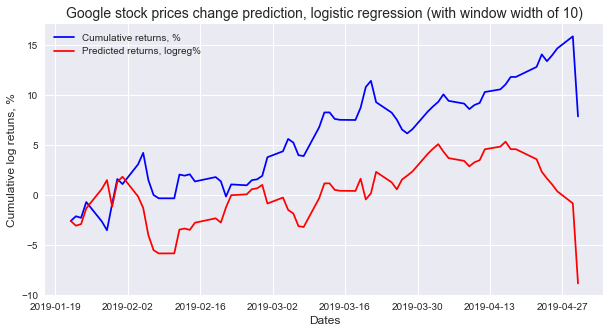

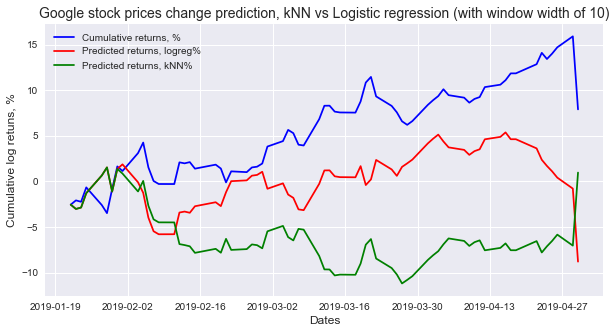

In [195]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(g_cumulative_returns_logreg_10d, color = 'b', label = 'Cumulative returns, %')
plt.plot(g_predicted_returns_cum_logreg_10d, color = 'r', label = 'Predicted returns, logreg%')
plt.title('Google stock prices change prediction, logistic regression (with window width of 10)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()



#Plot the results

plt.figure(figsize=(10,5))
plt.plot(g_cumulative_returns_10d, color = 'b', label = 'Cumulative returns, %')
plt.plot(g_predicted_returns_cum_logreg_10d, color = 'r', label = 'Predicted returns, logreg%')
plt.plot(g_predicted_returns_cum_10d, color = 'g', label = 'Predicted returns, kNN%')
plt.title('Google stock prices change prediction, kNN vs Logistic regression (with window width of 10)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

We can see that Logistic regression prediction curve is closer to cumulative log return curve than kNN's one

As a next step, let's try fit the model to dataset with all features (indexes, capitalistaion, mobile and Internet users)

##### 2.3.1.3. Google-3: Complex model (all variables and 10 days window width)

In [196]:
#create data set with all features (indexes, capitalistaion, mobile and Internet users) and with 10 days window width

google_data_logreg_10d = dataset(df_log['Close Google'], 10)
google_data_logreg_10d_full = pd.concat([google_data_10d, df_log], axis=1)
google_data_logreg_10d_full.dropna(inplace=True)
google_data_logreg_10d_full.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17  0.000581  0.019568 -0.004373 -0.001975  0.006552  0.004542   
2013-01-18  0.019568 -0.004373 -0.001975  0.006552  0.004542 -0.002011   
2013-01-22 -0.004373 -0.001975  0.006552  0.004542 -0.002011 -0.022882   
2013-01-23 -0.001975  0.006552  0.004542 -0.002011 -0.022882  0.002320   
2013-01-24  0.006552  0.004542 -0.002011 -0.022882  0.002320 -0.013527   

               (t-4)     (t-3)     (t-2)     (t-1)         ...           \
2013-01-17 -0.002011 -0.022882  0.002320 -0.013527         ...            
2013-01-18 -0.022882  0.002320 -0.013527 -0.005426         ...            
2013-01-22  0.002320 -0.013527 -0.005426 -0.009620         ...            
2013-01-23 -0.013527 -0.005426 -0.009620 -0.002331         ...            
2013-01-24 -0.005426 -0.009620 -0.002331  0.053503         ...            

            Arab_States__mob_users  CIS__mob_users  Europe__mob_users  \
2013-01-17                5.974573        5.744604           6.691463   
2013-01-18                5.974573        5.744924           6.691463   
2013-01-22                5.974827        5.744924           6.691463   
2013-01-23                5.974827        5.744924           6.691463   
2013-01-24                5.974827        5.744924           6.691463   

            Americas__mob_users  Asia_web_users  Africa__web_users  \
2013-01-17             6.929810        7.020012           4.427239   
2013-01-18             6.929908        7.020459           4.428433   
2013-01-22             6.930006        7.020905           4.429626   
2013-01-23             6.930104        7.021352           4.430817   
2013-01-24             6.930104        7.021887           4.432007   

            Arab_States__web_users  CIS__web_users  Europe__web_users  \
2013-01-17                4.670021        4.960044           6.071892   
2013-01-18                4.670958        4.960044           6.071892   
2013-01-22                4.671894        4.960044           6.072122   
2013-01-23                4.671894        4.960745           6.072122   
2013-01-24                4.672829        4.960745           6.072353   

            Americas__web_users  
2013-01-17             6.254406  
2013-01-18             6.254598  
2013-01-22             6.254790  
2013-01-23             6.254982  
2013-01-24             6.255174  

[5 rows x 41 columns]

In [197]:
#Apply function to fit Logistic regression model to Google full data set data with 10 days wondow width

google_acc_logreg_10d_full = data_logreg(google_data_logreg_10d_full)
google_acc_logreg_10d_full.head()

Train set shape: (1106, 41) (1106,)
Test set shape: (475, 41) (475,)
Baseline accuracy: 0.522


C   mean_te    std_te
0  0.1  0.466546  0.069955
1    1  0.447559  0.081086
2   10  0.420434  0.102877

Baseline accuracy is about 0.522

Let fit model with hyperparameter C.

In [198]:
#Accuracy and classes probabilities

google_proba_10d_full = data_logreg_tuned1(google_data_logreg_10d_full, 1)
google_proba_10d_full


Accuracy: 0.52


down        up
2017-06-09  0.379972  0.620028
2017-06-12  0.354912  0.645088
2017-06-13  0.317500  0.682500
2017-06-14  0.342879  0.657121
2017-06-15  0.345472  0.654528
2017-06-16  0.371901  0.628099
2017-06-19  0.351756  0.648244
2017-06-20  0.341851  0.658149
2017-06-21  0.439938  0.560062
2017-06-22  0.393407  0.606593

So the model accuracy we've got is about 0.52 that is a little bit less than baseline which is 0.522.
Let's visualise it.

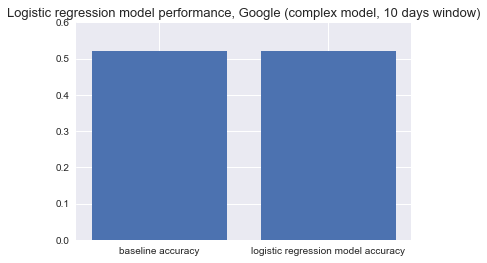

In [199]:
plt.figure(figsize=(6,4))
plt.bar([1,2], [0.522, 0.52])
plt.xticks([1,2], ['baseline accuracy', 'logistic regression model accuracy'])
plt.ylim(0, 0.6)
plt.title('Logistic regression model performance, Google (complex model, 10 days window)', fontsize=13);

In [200]:
#compare  performances

#model performance data frame
logreg_google_simple = [0.521, 0.54]
logreg_google_intermediate = [0.522, 0.535]
logreg_google_complex = [0.522, 0.52]
df_performance = pd.DataFrame({
                'logreg_Google_simple_model': logreg_google_simple,
                'logreg_Google_intermediate_model': logreg_google_intermediate,
                'logreg_Google_complex_model': logreg_google_complex
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance

Baseline accuracy  Model accuracy
logreg_Google_complex_model                   0.522           0.520
logreg_Google_intermediate_model              0.522           0.535
logreg_Google_simple_model                    0.521           0.540

In [201]:
#for Google complex model kNN performace is better with 0.561 vs 0.51 of logistic regression
df_performance_knn[-3:]

Baseline accuracy  Model accuracy
knn_Google_complex_model                   0.521           0.561
knn_Google_intermediate_model              0.521           0.548
knn_Google_simple_model                    0.522           0.553

Now let's compute predictions

In [202]:
#Compute predictions for Google data
#Collect predictions in the data frame 

predictions_google_logreg_10d_full = data_logreg_tuned2(google_data_logreg_10d_full, 0.1) #C parameter

google_data_logreg_10d_full['y'] = np.where(google_data_logreg_10d_full['Day price (t)'].shift(-1) > 0, 1, -1)
google_data_logreg_10d_full['Predictions'] = predictions_google_logreg_10d_full
google_data_logreg_10d_full.tail(5)

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.005489  0.004093  0.002044  0.010939  0.002649  0.004926   
2019-04-25  0.004093  0.002044  0.010939  0.002649  0.004926  0.007477   
2019-04-26  0.002044  0.010939  0.002649  0.004926  0.007477  0.000024   
2019-04-29  0.010939  0.002649  0.004926  0.007477  0.000024  0.010035   
2019-04-30  0.002649  0.004926  0.007477  0.000024  0.010035  0.012501   

               (t-4)     (t-3)     (t-2)     (t-1)     ...       \
2019-04-24  0.007477  0.000024  0.010035  0.012501     ...        
2019-04-25  0.000024  0.010035  0.012501 -0.006784     ...        
2019-04-26  0.010035  0.012501 -0.006784  0.005914     ...        
2019-04-29  0.012501 -0.006784  0.005914  0.006886     ...        
2019-04-30 -0.006784  0.005914  0.006886  0.012032     ...        

            Europe__mob_users  Americas__mob_users  Asia_web_users  \
2019-04-24           6.701346             7.048908        7.579015   
2019-04-25           6.701346             7.048994        7.579270   
2019-04-26           6.701346             7.049081        7.579577   
2019-04-29           6.701346             7.049168        7.579832   
2019-04-30           6.701346             7.049168        7.580087   

            Africa__web_users  Arab_States__web_users  CIS__web_users  \
2019-04-24           5.484382                5.256453        5.305293   
2019-04-25           5.484797                5.256974        5.305293   
2019-04-26           5.485212                5.256974        5.305789   
2019-04-29           5.485626                5.257495        5.305789   
2019-04-30           5.486041                5.257495        5.305789   

            Europe__web_users  Americas__web_users  y  Predictions  
2019-04-24           6.248236             6.536402  1            1  
2019-04-25           6.248430             6.536547  1            1  
2019-04-26           6.248430             6.536692  1            1  
2019-04-29           6.248623             6.536837 -1            1  
2019-04-30           6.248623             6.536981 -1            1  

[5 rows x 43 columns]

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

As a next step let's compute cumulative log returns and cumulative predicted log returns and visualiye it to compare.<br>
Cumulative log returns is a cumulative sum of daily log returns.<br>
Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 


In [203]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
google_data_logreg_10d_full['Cumulative_returns'] = google_data_logreg_10d_full[split:]['Day price (t)'].cumsum()*100
g_cumulative_returns_logreg_10d_full = google_data_logreg_10d_full['Cumulative_returns']

#Compute cumulative predicted returns
google_data_logreg_10d_full['Predicted returns'] = (np.abs(google_data_logreg_10d_full['Day price (t)']))*(google_data_logreg_10d_full['Predictions'].shift(1))
google_data_logreg_10d_full['Predicted returns_cum'] = google_data_logreg_10d_full[split:]['Predicted returns'].cumsum()*100
g_predicted_returns_cum_logreg_10d_full = google_data_logreg_10d_full['Predicted returns_cum']

google_data_logreg_10d_full.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.005489  0.004093  0.002044  0.010939  0.002649  0.004926   
2019-04-25  0.004093  0.002044  0.010939  0.002649  0.004926  0.007477   
2019-04-26  0.002044  0.010939  0.002649  0.004926  0.007477  0.000024   
2019-04-29  0.010939  0.002649  0.004926  0.007477  0.000024  0.010035   
2019-04-30  0.002649  0.004926  0.007477  0.000024  0.010035  0.012501   

               (t-4)     (t-3)     (t-2)     (t-1)          ...            \
2019-04-24  0.007477  0.000024  0.010035  0.012501          ...             
2019-04-25  0.000024  0.010035  0.012501 -0.006784          ...             
2019-04-26  0.010035  0.012501 -0.006784  0.005914          ...             
2019-04-29  0.012501 -0.006784  0.005914  0.006886          ...             
2019-04-30 -0.006784  0.005914  0.006886  0.012032          ...             

            Africa__web_users  Arab_States__web_users  CIS__web_users  \
2019-04-24           5.484382                5.256453        5.305293   
2019-04-25           5.484797                5.256974        5.305293   
2019-04-26           5.485212                5.256974        5.305789   
2019-04-29           5.485626                5.257495        5.305789   
2019-04-30           5.486041                5.257495        5.305789   

            Europe__web_users  Americas__web_users  y  Predictions  \
2019-04-24           6.248236             6.536402  1            1   
2019-04-25           6.248430             6.536547  1            1   
2019-04-26           6.248430             6.536692  1            1   
2019-04-29           6.248623             6.536837 -1            1   
2019-04-30           6.248623             6.536981 -1            1   

            Cumulative_returns  Predicted returns  Predicted returns_cum  
2019-04-24           13.420495           0.006784              60.085077  
2019-04-25           14.011892           0.005914              60.676474  
2019-04-26           14.700489           0.006886              61.365071  
2019-04-29           15.903734           0.012032              62.568316  
2019-04-30            7.894804           0.080089              70.577245  

[5 rows x 46 columns]

Let's visualise it and compare with the same plot for kNN model.

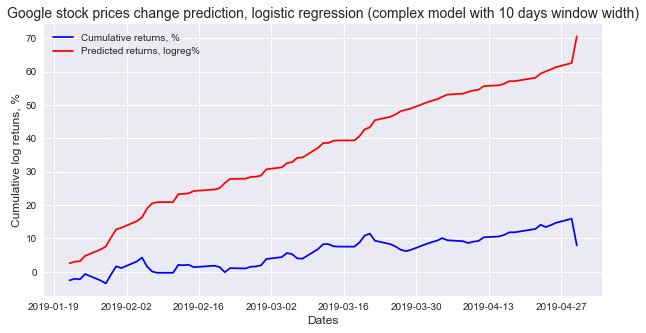

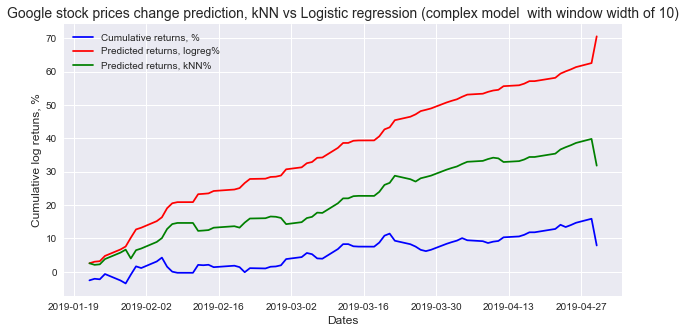

In [204]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(g_cumulative_returns_logreg_10d_full, color = 'b', label = 'Cumulative returns, %')
plt.plot(g_predicted_returns_cum_logreg_10d_full, color = 'r', label = 'Predicted returns, logreg%')
plt.title('Google stock prices change prediction, logistic regression (complex model with 10 days window width)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()



#Plot the results

plt.figure(figsize=(10,5))
plt.plot(g_cumulative_returns_10d_full, color = 'b', label = 'Cumulative returns, %')
plt.plot(g_predicted_returns_cum_logreg_10d_full, color = 'r', label = 'Predicted returns, logreg%')
plt.plot(g_predicted_returns_cum_10d_full, color = 'g', label = 'Predicted returns, kNN%')
plt.title('Google stock prices change prediction, kNN vs Logistic regression (complex model  with window width of 10)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

We can see that kNN prediction curve is closer to cumulative log return curve than logistic regression's one



<img src ='Apple.png'>
#### 2.3.2. Apple: Logistic regression

##### 2.3.2.1. Apple-1: simple model (5 days window width)

In [205]:
#Apple data for 5 days window width

apple_data_logreg = dataset(df_log['Close Apple'], 5)
apple_data_logreg.tail()


(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)
2019-04-24  0.000100  0.019286  0.003587  0.003281  0.014320      -0.001543
2019-04-25  0.019286  0.003587  0.003281  0.014320 -0.001543      -0.009117
2019-04-26  0.003587  0.003281  0.014320 -0.001543 -0.009117      -0.004785
2019-04-29  0.003281  0.014320 -0.001543 -0.009117 -0.004785       0.001516
2019-04-30  0.014320 -0.001543 -0.009117 -0.004785  0.001516      -0.019444

In [206]:
#Apply function to fit Logistic regression model to Apple data with 5 days wondow width

apple_acc_logreg = data_logreg(apple_data_logreg)
apple_acc_logreg.head()

Train set shape: (1110, 6) (1110,)
Test set shape: (476, 6) (476,)
Baseline accuracy: 0.540


C   mean_te    std_te
0  0.1  0.486486  0.057823
1    1  0.486486  0.057823
2   10  0.486486  0.057823

Baseline accuracy is about 0.54

Let fit model with hyperparameter C.

In [207]:
#Accuracy and classes probabilities

apple_proba = data_logreg_tuned1(apple_data_logreg, 0.1)
apple_proba


Accuracy: 0.534


down        up
2017-06-08  0.485745  0.514255
2017-06-09  0.454511  0.545489
2017-06-12  0.457838  0.542162
2017-06-13  0.514388  0.485612
2017-06-14  0.507885  0.492115
2017-06-15  0.490893  0.509107
2017-06-16  0.447624  0.552376
2017-06-19  0.503419  0.496581
2017-06-20  0.487702  0.512298
2017-06-21  0.480973  0.519027

So the model accuracy we've got is about 0.534 that is a little bit less than baseline which is 0.54.

Let's visualise it and put it into the Performance data frame to compare.

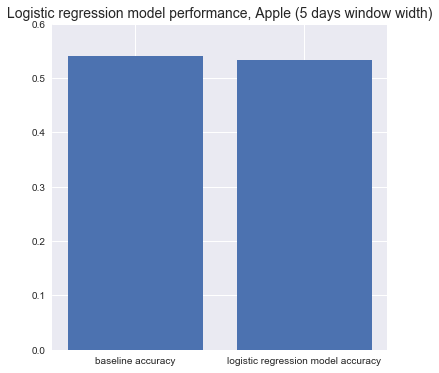

In [208]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.54, 0.534])
plt.xticks([1,2], ['baseline accuracy', 'logistic regression model accuracy'])
plt.ylim(0, 0.6)
plt.title('Logistic regression model performance, Apple (5 days window width)', fontsize=14);

In [209]:
#compare  performances

#model performance data frame
logreg_google_simple = [0.521, 0.54]
logreg_google_intermediate = [0.522, 0.535]
logreg_google_complex = [0.522, 0.516]
logreg_apple_simple = [0.54, 0.534]
df_performance = pd.DataFrame({
                'logreg_Google_simple_model': logreg_google_simple,
                'logreg_Google_intermediate_model': logreg_google_intermediate,
                'logreg_Google_complex_model': logreg_google_complex,
                'logreg_Apple_simple_model': logreg_apple_simple
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance

Baseline accuracy  Model accuracy
logreg_Apple_simple_model                     0.540           0.534
logreg_Google_complex_model                   0.522           0.516
logreg_Google_intermediate_model              0.522           0.535
logreg_Google_simple_model                    0.521           0.540

In [210]:
#for Apple simple complex model kNN performace is better with 0.553 vs 0.534 of logistic regression

df_performance_knn[5:6]

Baseline accuracy  Model accuracy
knn_Apple_simple_model              0.547           0.553

Now let's use model to compute predictions

In [211]:
#Compute predictions for Apple data, using the best C parameter
#Collect predictions in the data frame 

predictions_apple_logreg = data_logreg_tuned2(apple_data_logreg, 10)

apple_data_logreg['y'] = np.where(apple_data_logreg['Day price (t)'].shift(-1) > 0, 1, -1)
apple_data_logreg['Predictions'] = predictions_apple_logreg
apple_data_logreg.tail(5)

(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24  0.000100  0.019286  0.003587  0.003281  0.014320      -0.001543   
2019-04-25  0.019286  0.003587  0.003281  0.014320 -0.001543      -0.009117   
2019-04-26  0.003587  0.003281  0.014320 -0.001543 -0.009117      -0.004785   
2019-04-29  0.003281  0.014320 -0.001543 -0.009117 -0.004785       0.001516   
2019-04-30  0.014320 -0.001543 -0.009117 -0.004785  0.001516      -0.019444   

            y  Predictions  
2019-04-24 -1            1  
2019-04-25 -1            1  
2019-04-26  1            1  
2019-04-29 -1            1  
2019-04-30 -1            1

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

As a next step let's compute cumulative log returns and cumulative predicted log returns and visualiye it to compare.<br>
Cumulative log returns is a cumulative sum of daily log returns.<br>
Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 


In [212]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
apple_data_logreg['Cumulative_returns'] = apple_data_logreg[split:]['Day price (t)'].cumsum()*100
ap_cumulative_returns_logreg = apple_data_logreg['Cumulative_returns']

#Compute cumulative predicted returns
apple_data_logreg['Predicted returns'] = (np.abs(apple_data_logreg['Day price (t)']))*(apple_data_logreg['Predictions'].shift(1))
apple_data_logreg['Predicted returns_cum'] = apple_data_logreg[split:]['Predicted returns'].cumsum()*100
ap_predicted_returns_cum_logreg = apple_data_logreg['Predicted returns_cum']

apple_data_logreg.tail()

(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24  0.000100  0.019286  0.003587  0.003281  0.014320      -0.001543   
2019-04-25  0.019286  0.003587  0.003281  0.014320 -0.001543      -0.009117   
2019-04-26  0.003587  0.003281  0.014320 -0.001543 -0.009117      -0.004785   
2019-04-29  0.003281  0.014320 -0.001543 -0.009117 -0.004785       0.001516   
2019-04-30  0.014320 -0.001543 -0.009117 -0.004785  0.001516      -0.019444   

            y  Predictions  Cumulative_returns  Predicted returns  \
2019-04-24 -1            1           30.770491           0.001543   
2019-04-25 -1            1           29.858834           0.009117   
2019-04-26  1            1           29.380296           0.004785   
2019-04-29 -1            1           29.531918           0.001516   
2019-04-30 -1            1           27.587521           0.019444   

            Predicted returns_cum  
2019-04-24              46.079242  
2019-04-25              46.990898  
2019-04-26              47.469436  
2019-04-29              47.621058  
2019-04-30              49.565455

Let's visualise it and compare with the same plot for kNN model.

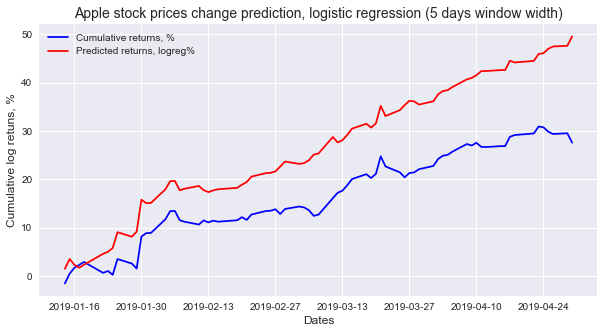

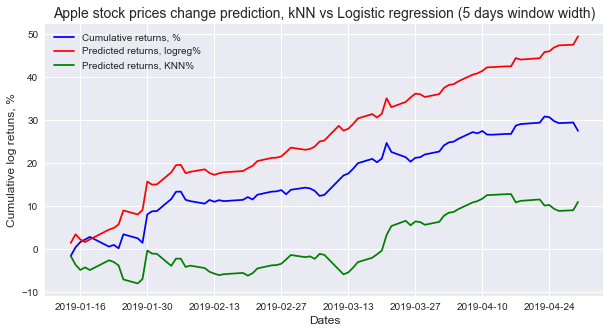

In [213]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(ap_cumulative_returns_logreg, color = 'b', label = 'Cumulative returns, %')
plt.plot(ap_predicted_returns_cum_logreg, color = 'r', label = 'Predicted returns, logreg%')
plt.title('Apple stock prices change prediction, logistic regression (5 days window width)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

#Plot the results
plt.figure(figsize=(10,5))
plt.plot(ap_cumulative_returns_logreg, color = 'b', label = 'Cumulative returns, %')
plt.plot(ap_predicted_returns_cum_logreg, color = 'r', label = 'Predicted returns, logreg%')

plt.plot(ap_predicted_returns_cum, color = 'g', label = 'Predicted returns, KNN%')

plt.title('Apple stock prices change prediction, kNN vs Logistic regression (5 days window width)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

We can see that Logistic regression prediction is more optimistic if compatre to kNN's one.

Now, let's fit Logistic regression classifier to Apple data set with windw width of 10 days.

##### 2.3.2.2. Apple-2: intermediate model (10 days window width)

In [214]:
#Apple data for 10 days window width

apple_data_logreg_10d = dataset(df_log['Close Apple'], 10)
apple_data_logreg_10d.tail()


(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.003003  0.005598 -0.008359 -0.000402  0.001809  0.000100   
2019-04-25  0.005598 -0.008359 -0.000402  0.001809  0.000100  0.019286   
2019-04-26 -0.008359 -0.000402  0.001809  0.000100  0.019286  0.003587   
2019-04-29 -0.000402  0.001809  0.000100  0.019286  0.003587  0.003281   
2019-04-30  0.001809  0.000100  0.019286  0.003587  0.003281  0.014320   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  
2019-04-24  0.019286  0.003587  0.003281  0.014320      -0.001543  
2019-04-25  0.003587  0.003281  0.014320 -0.001543      -0.009117  
2019-04-26  0.003281  0.014320 -0.001543 -0.009117      -0.004785  
2019-04-29  0.014320 -0.001543 -0.009117 -0.004785       0.001516  
2019-04-30 -0.001543 -0.009117 -0.004785  0.001516      -0.019444

In [215]:
#Apply function to fit Logistic regression model to Apple data set with 10 days wondow width

apple_acc_logreg_10d = data_logreg(apple_data_logreg_10d)
apple_acc_logreg_10d.head()

Train set shape: (1106, 11) (1106,)
Test set shape: (475, 11) (475,)
Baseline accuracy: 0.541


C   mean_te    std_te
1    1  0.498192  0.033280
2   10  0.498192  0.033280
0  0.1  0.497288  0.032223

Baseline accuracy is about 0.541

Let fit model with hyperparameter C.

In [216]:
#Accuracy and classes probabilities

apple_proba_10d = data_logreg_tuned1(apple_data_logreg_10d, 1)
apple_proba_10d


Accuracy: 0.52


down        up
2017-06-09  0.449384  0.550616
2017-06-12  0.446676  0.553324
2017-06-13  0.535137  0.464863
2017-06-14  0.477700  0.522300
2017-06-15  0.503798  0.496202
2017-06-16  0.441578  0.558422
2017-06-19  0.533739  0.466261
2017-06-20  0.469472  0.530528
2017-06-21  0.470745  0.529255
2017-06-22  0.488957  0.511043

So the model accuracy we've got is about 0.52 that is a little bit better than baseline which is 0.541.

Let's visualise it and put it into the Performance data frame to compare.

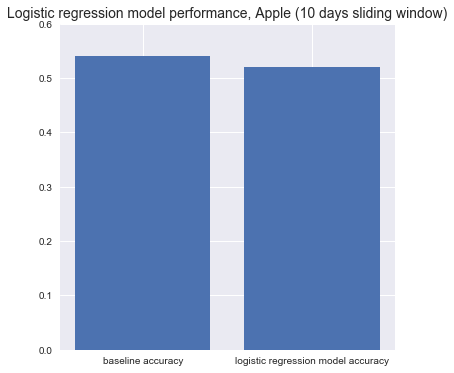

In [217]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.541, 0.520])
plt.xticks([1,2], ['baseline accuracy', 'logistic regression model accuracy'])
plt.ylim(0, 0.6)
plt.title('Logistic regression model performance, Apple (10 days sliding window)', fontsize=14);

In [218]:
#compare  performances

#model performance data frame
logreg_google_simple = [0.521, 0.54]
logreg_google_intermediate = [0.522, 0.535]
logreg_google_complex = [0.522, 0.516]
logreg_apple_simple = [0.540, 0.534]
logreg_apple_intermediate = [0.541, 0.520]

df_performance = pd.DataFrame({
                'logreg_google_simple_model': logreg_google_simple,
                'logreg_google_medium_model': logreg_google_intermediate,
                'logreg_google_complex_model': logreg_google_complex,
                'logreg_apple_simple_model': logreg_apple_simple,
                'logreg_apple_intermediate_model': logreg_apple_intermediate
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance

Baseline accuracy  Model accuracy
logreg_apple_intermediate_model              0.541           0.520
logreg_apple_simple_model                    0.540           0.534
logreg_google_complex_model                  0.522           0.516
logreg_google_medium_model                   0.522           0.535
logreg_google_simple_model                   0.521           0.540

In [219]:
#for Apple intemediate model kNN performace is better with 0.589 vs 0.520 of logistic regression
df_performance_knn[4:5]

Baseline accuracy  Model accuracy
knn_Apple_intermediate_model              0.549           0.589

Now let's compute predictions

In [220]:
#Compute predictions for Apple data
#Collect predictions in the data frame 

predictions_apple_logreg_10d = data_logreg_tuned2(apple_data_logreg_10d, 0.1)
apple_data_logreg_10d['y'] = np.where(apple_data_logreg_10d['Day price (t)'].shift(-1) > 0, 1, -1)
apple_data_logreg_10d['Predictions'] = predictions_apple_logreg_10d
apple_data_logreg_10d.tail(5)

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.003003  0.005598 -0.008359 -0.000402  0.001809  0.000100   
2019-04-25  0.005598 -0.008359 -0.000402  0.001809  0.000100  0.019286   
2019-04-26 -0.008359 -0.000402  0.001809  0.000100  0.019286  0.003587   
2019-04-29 -0.000402  0.001809  0.000100  0.019286  0.003587  0.003281   
2019-04-30  0.001809  0.000100  0.019286  0.003587  0.003281  0.014320   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-24  0.019286  0.003587  0.003281  0.014320      -0.001543 -1   
2019-04-25  0.003587  0.003281  0.014320 -0.001543      -0.009117 -1   
2019-04-26  0.003281  0.014320 -0.001543 -0.009117      -0.004785  1   
2019-04-29  0.014320 -0.001543 -0.009117 -0.004785       0.001516 -1   
2019-04-30 -0.001543 -0.009117 -0.004785  0.001516      -0.019444 -1   

            Predictions  
2019-04-24            1  
2019-04-25            1  
2019-04-26            1  
2019-04-29           -1  
2019-04-30            1

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

As a next step let's compute cumulative log returns and cumulative predicted log returns and visualiye it to compare.<br>
Cumulative log returns is a cumulative sum of daily log returns.<br>
Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 


In [221]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
apple_data_logreg_10d['Cumulative_returns'] = apple_data_logreg_10d[split:]['Day price (t)'].cumsum()*100
ap_cumulative_returns_logreg_10d = apple_data_logreg_10d['Cumulative_returns']

#Compute cumulative predicted returns
apple_data_logreg_10d['Predicted returns'] = (np.abs(apple_data_logreg_10d['Day price (t)']))*(apple_data_logreg_10d['Predictions'].shift(1))
apple_data_logreg_10d['Predicted returns_cum'] = apple_data_logreg_10d[split:]['Predicted returns'].cumsum()*100
ap_predicted_returns_cum_logreg_10d = apple_data_logreg_10d['Predicted returns_cum']

apple_data_logreg_10d.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.003003  0.005598 -0.008359 -0.000402  0.001809  0.000100   
2019-04-25  0.005598 -0.008359 -0.000402  0.001809  0.000100  0.019286   
2019-04-26 -0.008359 -0.000402  0.001809  0.000100  0.019286  0.003587   
2019-04-29 -0.000402  0.001809  0.000100  0.019286  0.003587  0.003281   
2019-04-30  0.001809  0.000100  0.019286  0.003587  0.003281  0.014320   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-24  0.019286  0.003587  0.003281  0.014320      -0.001543 -1   
2019-04-25  0.003587  0.003281  0.014320 -0.001543      -0.009117 -1   
2019-04-26  0.003281  0.014320 -0.001543 -0.009117      -0.004785  1   
2019-04-29  0.014320 -0.001543 -0.009117 -0.004785       0.001516 -1   
2019-04-30 -0.001543 -0.009117 -0.004785  0.001516      -0.019444 -1   

            Predictions  Cumulative_returns  Predicted returns  \
2019-04-24            1           27.839277           0.001543   
2019-04-25            1           26.927620           0.009117   
2019-04-26            1           26.449082           0.004785   
2019-04-29           -1           26.600704           0.001516   
2019-04-30            1           24.656306          -0.019444   

            Predicted returns_cum  
2019-04-24              23.911882  
2019-04-25              24.823539  
2019-04-26              25.302077  
2019-04-29              25.453699  
2019-04-30              23.509301

Let's visualise it and compare with the same plot for kNN model.

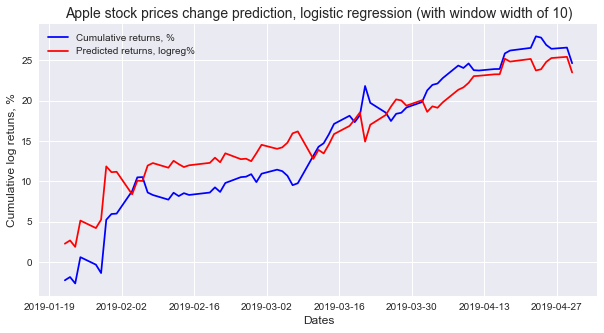

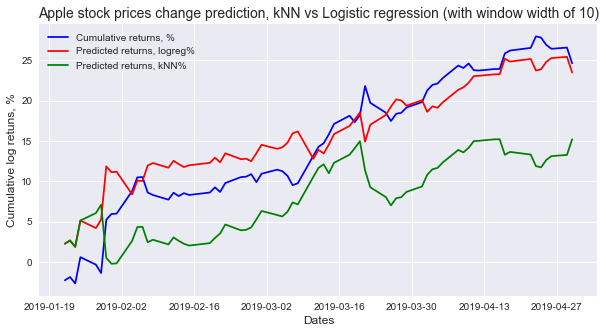

In [222]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(ap_cumulative_returns_logreg_10d, color = 'b', label = 'Cumulative returns, %')
plt.plot(ap_predicted_returns_cum_logreg_10d, color = 'r', label = 'Predicted returns, logreg%')
plt.title('Apple stock prices change prediction, logistic regression (with window width of 10)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()


#Plot the results

plt.figure(figsize=(10,5))
plt.plot(ap_cumulative_returns_logreg_10d, color = 'b', label = 'Cumulative returns, %')
plt.plot(ap_predicted_returns_cum_logreg_10d, color = 'r', label = 'Predicted returns, logreg%')

plt.plot(ap_predicted_returns_cum_10d, color = 'g', label = 'Predicted returns, kNN%')
plt.title('Apple stock prices change prediction, kNN vs Logistic regression (with window width of 10)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

We can see that Logistic regression prediction curve is closer to cumulative log return curve than kNN's one

As a next step, let's try fit the model to dataset with all features (indexes, capitalistaion, mobile and Internet users)

##### 2.3.2.3. Apple-3: Complex model (all variables and 10 days window width)

In [223]:
#create data set with all features (indexes, capitalistaion, mobile and Internet users) and with 10 days window width

apple_data_logreg_10d = dataset(df_log['Close Apple'], 10)
apple_data_logreg_10d_full = pd.concat([apple_data_logreg_10d, df_log], axis=1)
apple_data_logreg_10d_full.dropna(inplace=True)
apple_data_logreg_10d_full.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17 -0.012703 -0.028250 -0.005900  0.002688 -0.015752  0.012320   
2013-01-18 -0.028250 -0.005900  0.002688 -0.015752  0.012320 -0.006150   
2013-01-22 -0.005900  0.002688 -0.015752  0.012320 -0.006150 -0.036304   
2013-01-23  0.002688 -0.015752  0.012320 -0.006150 -0.036304 -0.032058   
2013-01-24 -0.015752  0.012320 -0.006150 -0.036304 -0.032058  0.040670   

               (t-4)     (t-3)     (t-2)     (t-1)         ...           \
2013-01-17 -0.006150 -0.036304 -0.032058  0.040670         ...            
2013-01-18 -0.036304 -0.032058  0.040670 -0.006761         ...            
2013-01-22 -0.032058  0.040670 -0.006761 -0.005346         ...            
2013-01-23  0.040670 -0.006761 -0.005346  0.009495         ...            
2013-01-24 -0.006761 -0.005346  0.009495  0.018140         ...            

            Arab_States__mob_users  CIS__mob_users  Europe__mob_users  \
2013-01-17                5.974573        5.744604           6.691463   
2013-01-18                5.974573        5.744924           6.691463   
2013-01-22                5.974827        5.744924           6.691463   
2013-01-23                5.974827        5.744924           6.691463   
2013-01-24                5.974827        5.744924           6.691463   

            Americas__mob_users  Asia_web_users  Africa__web_users  \
2013-01-17             6.929810        7.020012           4.427239   
2013-01-18             6.929908        7.020459           4.428433   
2013-01-22             6.930006        7.020905           4.429626   
2013-01-23             6.930104        7.021352           4.430817   
2013-01-24             6.930104        7.021887           4.432007   

            Arab_States__web_users  CIS__web_users  Europe__web_users  \
2013-01-17                4.670021        4.960044           6.071892   
2013-01-18                4.670958        4.960044           6.071892   
2013-01-22                4.671894        4.960044           6.072122   
2013-01-23                4.671894        4.960745           6.072122   
2013-01-24                4.672829        4.960745           6.072353   

            Americas__web_users  
2013-01-17             6.254406  
2013-01-18             6.254598  
2013-01-22             6.254790  
2013-01-23             6.254982  
2013-01-24             6.255174  

[5 rows x 41 columns]

In [224]:
#Apply function to fit Logistic regression model to Apple full data set data with 10 days window width

apple_acc_logreg_10d_full = data_logreg(apple_data_logreg_10d_full)
apple_acc_logreg_10d_full.head()

Train set shape: (1106, 41) (1106,)
Test set shape: (475, 41) (475,)
Baseline accuracy: 0.541


C   mean_te    std_te
1    1  0.506329  0.054676
2   10  0.503617  0.042881
0  0.1  0.491863  0.033168

Baseline accuracy is about 0.541

Let fit model with hyperparameter C.

In [225]:
#Accuracy and classes probabilities

apple_proba_10d_full = data_logreg_tuned1(apple_data_logreg_10d_full, 0.1)
apple_proba_10d_full


Accuracy: 0.501


down        up
2017-06-09  0.414450  0.585550
2017-06-12  0.373133  0.626867
2017-06-13  0.517183  0.482817
2017-06-14  0.484683  0.515317
2017-06-15  0.487614  0.512386
2017-06-16  0.363684  0.636316
2017-06-19  0.542409  0.457591
2017-06-20  0.463178  0.536822
2017-06-21  0.479724  0.520276
2017-06-22  0.504645  0.495355

So the model accuracy we've got is about 0.501 that is 4 points less than baseline which is 0.541.
Let's visualise it.

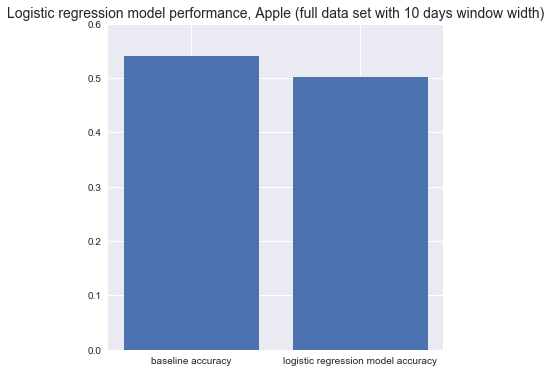

In [226]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.541, 0.501])
plt.xticks([1,2], ['baseline accuracy', 'logistic regression model accuracy'])
plt.ylim(0, 0.6)
plt.title('Logistic regression model performance, Apple (full data set with 10 days window width)', fontsize=14);

In [227]:

#compare  performances

#model performance data frame
logreg_google_simple = [0.521, 0.54]
logreg_google_intermediate = [0.522, 0.535]
logreg_google_complex = [0.522, 0.516]
logreg_apple_simple = [0.54, 0.534]
logreg_apple_intermediate = [0.541, 0.520]
logreg_apple_complex = [0.541, 0.501]
df_performance = pd.DataFrame({
                'logreg_google_simple_model': logreg_google_simple,
                'logreg_google_intermediate_model': logreg_google_intermediate,
                'logreg_google_complex_model': logreg_google_complex,
                'logreg_apple_simple_model': logreg_apple_simple,
                'logreg_apple_intermediate_model': logreg_apple_intermediate,
                'logreg_apple_complex_model': logreg_apple_complex,
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance

Baseline accuracy  Model accuracy
logreg_apple_complex_model                    0.541           0.501
logreg_apple_intermediate_model               0.541           0.520
logreg_apple_simple_model                     0.540           0.534
logreg_google_complex_model                   0.522           0.516
logreg_google_intermediate_model              0.522           0.535
logreg_google_simple_model                    0.521           0.540

In [228]:

#for Apple complex model kNN performace is better with 0.539 vs 0.501 of logistic regression

df_performance_knn[3:4]

Baseline accuracy  Model accuracy
knn_Apple_complex_model              0.549           0.539

Now let's compute predictions

In [229]:
#Compute predictions for Google data
#Collect predictions in the data frame 

predictions_apple_logreg_10d_full = data_logreg_tuned2(apple_data_logreg_10d_full, 0.1) #C parameter

apple_data_logreg_10d_full['y'] = np.where(apple_data_logreg_10d_full['Day price (t)'].shift(-1) > 0, 1, -1)
apple_data_logreg_10d_full['Predictions'] = predictions_apple_logreg_10d_full
apple_data_logreg_10d_full.tail(5)

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.003003  0.005598 -0.008359 -0.000402  0.001809  0.000100   
2019-04-25  0.005598 -0.008359 -0.000402  0.001809  0.000100  0.019286   
2019-04-26 -0.008359 -0.000402  0.001809  0.000100  0.019286  0.003587   
2019-04-29 -0.000402  0.001809  0.000100  0.019286  0.003587  0.003281   
2019-04-30  0.001809  0.000100  0.019286  0.003587  0.003281  0.014320   

               (t-4)     (t-3)     (t-2)     (t-1)     ...       \
2019-04-24  0.019286  0.003587  0.003281  0.014320     ...        
2019-04-25  0.003587  0.003281  0.014320 -0.001543     ...        
2019-04-26  0.003281  0.014320 -0.001543 -0.009117     ...        
2019-04-29  0.014320 -0.001543 -0.009117 -0.004785     ...        
2019-04-30 -0.001543 -0.009117 -0.004785  0.001516     ...        

            Europe__mob_users  Americas__mob_users  Asia_web_users  \
2019-04-24           6.701346             7.048908        7.579015   
2019-04-25           6.701346             7.048994        7.579270   
2019-04-26           6.701346             7.049081        7.579577   
2019-04-29           6.701346             7.049168        7.579832   
2019-04-30           6.701346             7.049168        7.580087   

            Africa__web_users  Arab_States__web_users  CIS__web_users  \
2019-04-24           5.484382                5.256453        5.305293   
2019-04-25           5.484797                5.256974        5.305293   
2019-04-26           5.485212                5.256974        5.305789   
2019-04-29           5.485626                5.257495        5.305789   
2019-04-30           5.486041                5.257495        5.305789   

            Europe__web_users  Americas__web_users  y  Predictions  
2019-04-24           6.248236             6.536402 -1           -1  
2019-04-25           6.248430             6.536547 -1           -1  
2019-04-26           6.248430             6.536692  1           -1  
2019-04-29           6.248623             6.536837 -1           -1  
2019-04-30           6.248623             6.536981 -1           -1  

[5 rows x 43 columns]

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

As a next step let's compute cumulative log returns and cumulative predicted log returns and visualiye it to compare.<br>
Cumulative log returns is a cumulative sum of daily log returns.<br>
Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 


In [230]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
apple_data_logreg_10d_full['Cumulative_returns'] = apple_data_logreg_10d_full[split:]['Day price (t)'].cumsum()*100
ap_cumulative_returns_logreg_10d_full = apple_data_logreg_10d_full['Cumulative_returns']

#Compute cumulative predicted returns
apple_data_logreg_10d_full['Predicted returns'] = (np.abs(apple_data_logreg_10d_full['Day price (t)']))*(apple_data_logreg_10d_full['Predictions'].shift(1))
apple_data_logreg_10d_full['Predicted returns_cum'] = apple_data_logreg_10d_full[split:]['Predicted returns'].cumsum()*100
ap_predicted_returns_cum_logreg_10d_full = apple_data_logreg_10d_full['Predicted returns_cum']

apple_data_logreg_10d_full.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.003003  0.005598 -0.008359 -0.000402  0.001809  0.000100   
2019-04-25  0.005598 -0.008359 -0.000402  0.001809  0.000100  0.019286   
2019-04-26 -0.008359 -0.000402  0.001809  0.000100  0.019286  0.003587   
2019-04-29 -0.000402  0.001809  0.000100  0.019286  0.003587  0.003281   
2019-04-30  0.001809  0.000100  0.019286  0.003587  0.003281  0.014320   

               (t-4)     (t-3)     (t-2)     (t-1)          ...            \
2019-04-24  0.019286  0.003587  0.003281  0.014320          ...             
2019-04-25  0.003587  0.003281  0.014320 -0.001543          ...             
2019-04-26  0.003281  0.014320 -0.001543 -0.009117          ...             
2019-04-29  0.014320 -0.001543 -0.009117 -0.004785          ...             
2019-04-30 -0.001543 -0.009117 -0.004785  0.001516          ...             

            Africa__web_users  Arab_States__web_users  CIS__web_users  \
2019-04-24           5.484382                5.256453        5.305293   
2019-04-25           5.484797                5.256974        5.305293   
2019-04-26           5.485212                5.256974        5.305789   
2019-04-29           5.485626                5.257495        5.305789   
2019-04-30           5.486041                5.257495        5.305789   

            Europe__web_users  Americas__web_users  y  Predictions  \
2019-04-24           6.248236             6.536402 -1           -1   
2019-04-25           6.248430             6.536547 -1           -1   
2019-04-26           6.248430             6.536692  1           -1   
2019-04-29           6.248623             6.536837 -1           -1   
2019-04-30           6.248623             6.536981 -1           -1   

            Cumulative_returns  Predicted returns  Predicted returns_cum  
2019-04-24           27.839277          -0.001543             -33.412434  
2019-04-25           26.927620          -0.009117             -34.324091  
2019-04-26           26.449082          -0.004785             -34.802629  
2019-04-29           26.600704          -0.001516             -34.954250  
2019-04-30           24.656306          -0.019444             -36.898648  

[5 rows x 46 columns]

Let's visualise it and compare with the same plot for kNN model.

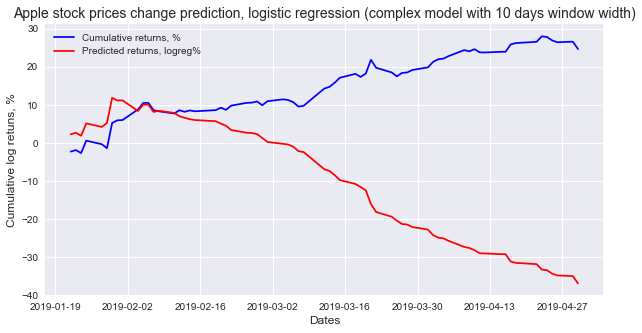

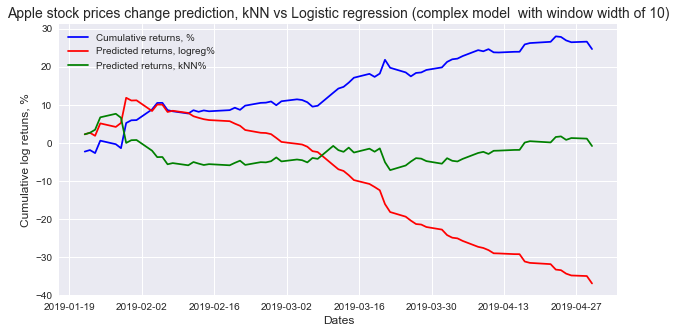

In [231]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(ap_cumulative_returns_logreg_10d_full, color = 'b', label = 'Cumulative returns, %')
plt.plot(ap_predicted_returns_cum_logreg_10d_full, color = 'r', label = 'Predicted returns, logreg%')
plt.title('Apple stock prices change prediction, logistic regression (complex model with 10 days window width)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()



#Plot the results

plt.figure(figsize=(10,5))
plt.plot(ap_cumulative_returns_logreg_10d_full, color = 'b', label = 'Cumulative returns, %')
plt.plot(ap_predicted_returns_cum_logreg_10d_full, color = 'r', label = 'Predicted returns, logreg%')
plt.plot(ap_predicted_returns_cum_10d_full, color = 'g', label = 'Predicted returns, kNN%')
plt.title('Apple stock prices change prediction, kNN vs Logistic regression (complex model  with window width of 10)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

We can see that kNN prediction curve is closer to cumulative log return curve than logistic regression's one.

Let's now move to Facebook data sets



<img src ='facebook-logo.png'>
#### 2.3.3. Facebook: Logistic regression

##### 2.3.3.1. Facebook-1: simple model (5 days window width)

In [232]:
#Facebook data for 5 days window width

fb_data_logreg = dataset(df_log['Close FB'], 5)
fb_data_logreg.tail()


(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)
2019-04-24 -0.004351 -0.000503 -0.002801  0.017570  0.012814      -0.006551
2019-04-25 -0.000503 -0.002801  0.017570  0.012814 -0.006551       0.056848
2019-04-26 -0.002801  0.017570  0.012814 -0.006551  0.056848      -0.009201
2019-04-29  0.017570  0.012814 -0.006551  0.056848 -0.009201       0.017035
2019-04-30  0.012814 -0.006551  0.056848 -0.009201  0.017035      -0.007110

In [233]:
#Apply function to fit Logistic regression model to Facebook data with 5 days wondow width

fb_acc_logreg = data_logreg(fb_data_logreg)
fb_acc_logreg.head()

Train set shape: (1110, 6) (1110,)
Test set shape: (476, 6) (476,)
Baseline accuracy: 0.519


C   mean_te    std_te
0  0.1  0.553153  0.025047
1    1  0.553153  0.025047
2   10  0.553153  0.025047

Baseline accuracy is about 0.519

Let fit model with hyperparameter C.

In [234]:
#Accuracy and classes probabilities

fb_proba = data_logreg_tuned1(fb_data_logreg, 1)
fb_proba


Accuracy: 0.529


down        up
2017-06-08  0.446987  0.553013
2017-06-09  0.447975  0.552025
2017-06-12  0.455877  0.544123
2017-06-13  0.396380  0.603620
2017-06-14  0.446370  0.553630
2017-06-15  0.512799  0.487201
2017-06-16  0.455398  0.544602
2017-06-19  0.455056  0.544944
2017-06-20  0.481585  0.518415
2017-06-21  0.494947  0.505053

So the model accuracy we've got is about 0.529 that is a little bit better than baseline which is 0.519.

Let's visualise it and put it into the Performance data frame to compare.

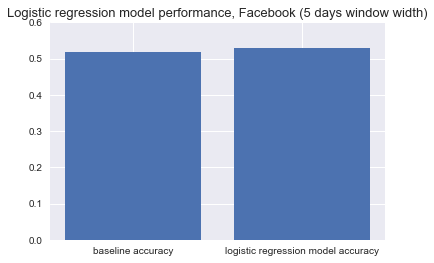

In [235]:
plt.figure(figsize=(6,4))
plt.bar([1,2], [0.519, 0.529])
plt.xticks([1,2], ['baseline accuracy', 'logistic regression model accuracy'])
plt.ylim(0, 0.6)
plt.title('Logistic regression model performance, Facebook (5 days window width)', fontsize=13);

In [236]:
#compare  performances of logistic regression

#model performance data frame
logreg_google_simple = [0.521, 0.54]
logreg_google_intermediate = [0.522, 0.535]
logreg_google_complex = [0.522, 0.516]
logreg_apple_simple = [0.54, 0.534]
logreg_apple_intermediate = [0.541, 0.520]
logreg_apple_complex = [0.541, 0.501]
logreg_facebook_simple = [0.519, 0.529]
df_performance = pd.DataFrame({
                'logreg_google_simple_model': logreg_google_simple,
                'logreg_google_intermediate_model': logreg_google_intermediate,
                'logreg_google_complex_model': logreg_google_complex,
                'logreg_apple_simple_model': logreg_apple_simple,
                'logreg_apple_intermediate_model': logreg_apple_intermediate,
                'logreg_apple_complex_model': logreg_apple_complex,
                'logreg_facebook_simple_model': logreg_facebook_simple,
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance

Baseline accuracy  Model accuracy
logreg_apple_complex_model                    0.541           0.501
logreg_apple_intermediate_model               0.541           0.520
logreg_apple_simple_model                     0.540           0.534
logreg_facebook_simple_model                  0.519           0.529
logreg_google_complex_model                   0.522           0.516
logreg_google_intermediate_model              0.522           0.535
logreg_google_simple_model                    0.521           0.540

In [237]:
df_performance_knn[8:9]

Baseline accuracy  Model accuracy
knn_Facebook_simple_model              0.509           0.547


For Facebook simple model kNN performace is better with 0.547 vs 0.529 of logistic regression

Now let's use model to compute predictions

In [238]:
#Compute predictions for Apple data, using the best C parameter
#Collect predictions in the data frame 

predictions_fb_logreg = data_logreg_tuned2(fb_data_logreg, 1)

fb_data_logreg['y'] = np.where(fb_data_logreg['Day price (t)'].shift(-1) > 0, 1, -1)
fb_data_logreg['Predictions'] = predictions_fb_logreg
fb_data_logreg.tail(5)

(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24 -0.004351 -0.000503 -0.002801  0.017570  0.012814      -0.006551   
2019-04-25 -0.000503 -0.002801  0.017570  0.012814 -0.006551       0.056848   
2019-04-26 -0.002801  0.017570  0.012814 -0.006551  0.056848      -0.009201   
2019-04-29  0.017570  0.012814 -0.006551  0.056848 -0.009201       0.017035   
2019-04-30  0.012814 -0.006551  0.056848 -0.009201  0.017035      -0.007110   

            y  Predictions  
2019-04-24  1            1  
2019-04-25 -1           -1  
2019-04-26  1            1  
2019-04-29 -1           -1  
2019-04-30 -1            1

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

As a next step let's compute cumulative log returns and cumulative predicted log returns and visualiye it to compare.<br>
Cumulative log returns is a cumulative sum of daily log returns.<br>
Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 


In [239]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
fb_data_logreg['Cumulative_returns'] = fb_data_logreg[split:]['Day price (t)'].cumsum()*100
fb_cumulative_returns_logreg = fb_data_logreg['Cumulative_returns']

#Compute cumulative predicted returns
fb_data_logreg['Predicted returns'] = (np.abs(fb_data_logreg['Day price (t)']))*(fb_data_logreg['Predictions'].shift(1))
fb_data_logreg['Predicted returns_cum'] = fb_data_logreg[split:]['Predicted returns'].cumsum()*100
fb_predicted_returns_cum_logreg = fb_data_logreg['Predicted returns_cum']

fb_data_logreg.tail()

(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24 -0.004351 -0.000503 -0.002801  0.017570  0.012814      -0.006551   
2019-04-25 -0.000503 -0.002801  0.017570  0.012814 -0.006551       0.056848   
2019-04-26 -0.002801  0.017570  0.012814 -0.006551  0.056848      -0.009201   
2019-04-29  0.017570  0.012814 -0.006551  0.056848 -0.009201       0.017035   
2019-04-30  0.012814 -0.006551  0.056848 -0.009201  0.017035      -0.007110   

            y  Predictions  Cumulative_returns  Predicted returns  \
2019-04-24  1            1           23.876498           0.006551   
2019-04-25 -1           -1           29.561294           0.056848   
2019-04-26  1            1           28.641215          -0.009201   
2019-04-29 -1           -1           30.344725           0.017035   
2019-04-30 -1            1           29.633709          -0.007110   

            Predicted returns_cum  
2019-04-24              57.557493  
2019-04-25              63.242289  
2019-04-26              62.322210  
2019-04-29              64.025720  
2019-04-30              63.314704

Let's visualise it and compare with the same plot for kNN model.

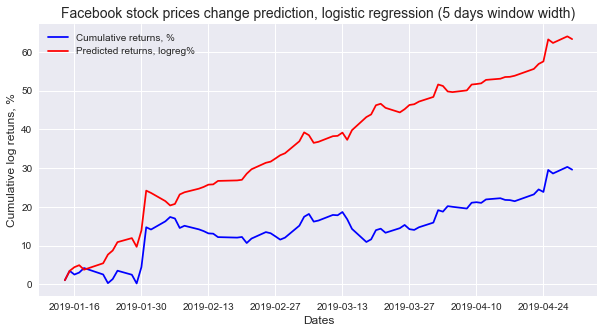

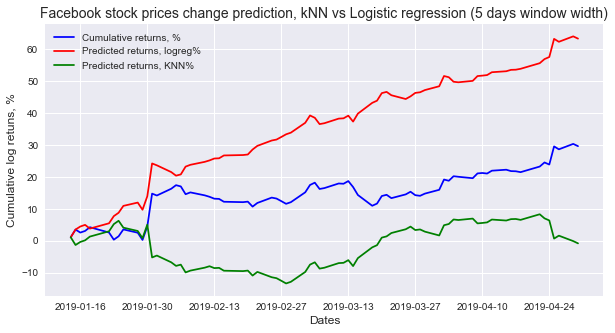

In [240]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(fb_cumulative_returns_logreg, color = 'b', label = 'Cumulative returns, %')
plt.plot(fb_predicted_returns_cum_logreg, color = 'r', label = 'Predicted returns, logreg%')
plt.title('Facebook stock prices change prediction, logistic regression (5 days window width)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

#Plot the results
plt.figure(figsize=(10,5))
plt.plot(fb_cumulative_returns_logreg, color = 'b', label = 'Cumulative returns, %')
plt.plot(fb_predicted_returns_cum_logreg, color = 'r', label = 'Predicted returns, logreg%')

plt.plot(fb_predicted_returns_cum, color = 'g', label = 'Predicted returns, KNN%')

plt.title('Facebook stock prices change prediction, kNN vs Logistic regression (5 days window width)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

We can see that Logistic regression prediction is more optimistic if compatre to kNN's one.

Now, let's fit Logistic regression classifier to Facebook data set with window width of 10 days.

##### 2.3.3.2. Facebook-2: intermediate model (10 days window width)

In [241]:
#Facebook data for 10 days window width

fb_data_logreg_10d = dataset(df_log['Close FB'], 10)
fb_data_logreg_10d.tail()


(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24  0.015035  0.001351 -0.001745  0.008917  0.003066 -0.004351   
2019-04-25  0.001351 -0.001745  0.008917  0.003066 -0.004351 -0.000503   
2019-04-26 -0.001745  0.008917  0.003066 -0.004351 -0.000503 -0.002801   
2019-04-29  0.008917  0.003066 -0.004351 -0.000503 -0.002801  0.017570   
2019-04-30  0.003066 -0.004351 -0.000503 -0.002801  0.017570  0.012814   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  
2019-04-24 -0.000503 -0.002801  0.017570  0.012814      -0.006551  
2019-04-25 -0.002801  0.017570  0.012814 -0.006551       0.056848  
2019-04-26  0.017570  0.012814 -0.006551  0.056848      -0.009201  
2019-04-29  0.012814 -0.006551  0.056848 -0.009201       0.017035  
2019-04-30 -0.006551  0.056848 -0.009201  0.017035      -0.007110

In [242]:
#Apply function to fit Logistic regression model to Facebook data set with 10 days window width

fb_acc_logreg_10d = data_logreg(fb_data_logreg_10d)
fb_acc_logreg_10d.head()

Train set shape: (1106, 11) (1106,)
Test set shape: (475, 11) (475,)
Baseline accuracy: 0.520


C   mean_te    std_te
0  0.1  0.528029  0.032136
1    1  0.527125  0.033751
2   10  0.527125  0.033751

Baseline accuracy is about 0.52

Let fit model with hyperparameter C.

In [243]:
#Accuracy and classes probabilities

fb_proba_10d = data_logreg_tuned1(fb_data_logreg_10d, 0.1)
fb_proba_10d


Accuracy: 0.52


down        up
2017-06-09  0.453419  0.546581
2017-06-12  0.458933  0.541067
2017-06-13  0.404155  0.595845
2017-06-14  0.444129  0.555871
2017-06-15  0.507363  0.492637
2017-06-16  0.469034  0.530966
2017-06-19  0.441281  0.558719
2017-06-20  0.471761  0.528239
2017-06-21  0.491180  0.508820
2017-06-22  0.456493  0.543507

So the model accuracy we've got is about 0.52 that the same as  baseline which is also 0.52.

Let's visualise it and put it into the Performance data frame to compare.

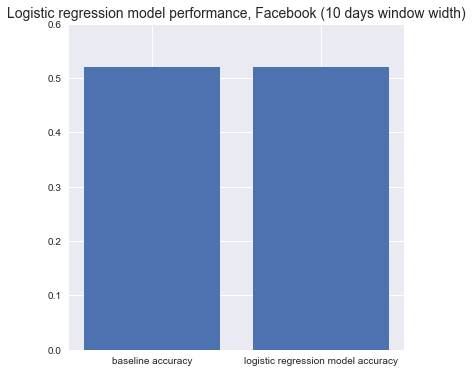

In [244]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.52, 0.520])
plt.xticks([1,2], ['baseline accuracy', 'logistic regression model accuracy'])
plt.ylim(0, 0.6)
plt.title('Logistic regression model performance, Facebook (10 days window width)', fontsize=14);

In [245]:
#compare  performances of logistic regression

#model performance data frame
logreg_google_simple = [0.521, 0.54]
logreg_google_intermediate = [0.522, 0.535]
logreg_google_complex = [0.522, 0.516]
logreg_apple_simple = [0.54, 0.534]
logreg_apple_intermediate = [0.541, 0.520]
logreg_apple_complex = [0.541, 0.501]
logreg_facebook_simple = [0.519, 0.527]
logreg_facebook_intermediate = [0.520, 0.520]

df_performance = pd.DataFrame({
                'logreg_Google_simple_model': logreg_google_simple,
                'logreg_Google_intermediate_model': logreg_google_intermediate,
                'logreg_Google_complex_model': logreg_google_complex,
                'logreg_Apple_simple_model': logreg_apple_simple,
                'logreg_Apple_intermediate_model': logreg_apple_intermediate,
                'logreg_Apple_complex_model': logreg_apple_complex,
                'logreg_Facebook_simple_model': logreg_facebook_simple,
                'logreg_Facebook_intermediate_model' : logreg_facebook_intermediate
    
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance

Baseline accuracy  Model accuracy
logreg_Apple_complex_model                      0.541           0.501
logreg_Apple_intermediate_model                 0.541           0.520
logreg_Apple_simple_model                       0.540           0.534
logreg_Facebook_intermediate_model              0.520           0.520
logreg_Facebook_simple_model                    0.519           0.527
logreg_Google_complex_model                     0.522           0.516
logreg_Google_intermediate_model                0.522           0.535
logreg_Google_simple_model                      0.521           0.540

In [246]:
df_performance_knn[7:8]

Baseline accuracy  Model accuracy
knn_Facebook_intermediate_model                0.5            0.56


For Facebook intermediate model kNN performace is better with 0.56 vs 0.52 of logistic regression

Now let's compute predictions

In [247]:
#Compute predictions for Facebook data
#Collect predictions in the data frame 

predictions_fb_logreg_10d = data_logreg_tuned2(fb_data_logreg_10d, 0.1)
fb_data_logreg_10d['y'] = np.where(fb_data_logreg_10d['Day price (t)'].shift(-1) > 0, 1, -1)
fb_data_logreg_10d['Predictions'] = predictions_fb_logreg_10d
fb_data_logreg_10d.tail(5)

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24  0.015035  0.001351 -0.001745  0.008917  0.003066 -0.004351   
2019-04-25  0.001351 -0.001745  0.008917  0.003066 -0.004351 -0.000503   
2019-04-26 -0.001745  0.008917  0.003066 -0.004351 -0.000503 -0.002801   
2019-04-29  0.008917  0.003066 -0.004351 -0.000503 -0.002801  0.017570   
2019-04-30  0.003066 -0.004351 -0.000503 -0.002801  0.017570  0.012814   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-24 -0.000503 -0.002801  0.017570  0.012814      -0.006551  1   
2019-04-25 -0.002801  0.017570  0.012814 -0.006551       0.056848 -1   
2019-04-26  0.017570  0.012814 -0.006551  0.056848      -0.009201  1   
2019-04-29  0.012814 -0.006551  0.056848 -0.009201       0.017035 -1   
2019-04-30 -0.006551  0.056848 -0.009201  0.017035      -0.007110 -1   

            Predictions  
2019-04-24           -1  
2019-04-25           -1  
2019-04-26            1  
2019-04-29           -1  
2019-04-30            1

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

As a next step let's compute cumulative log returns and cumulative predicted log returns and visualiye it to compare.<br>
Cumulative log returns is a cumulative sum of daily log returns.<br>
Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 


In [248]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
fb_data_logreg_10d['Cumulative_returns'] = fb_data_logreg_10d[split:]['Day price (t)'].cumsum()*100
fb_cumulative_returns_logreg_10d = fb_data_logreg_10d['Cumulative_returns']

#Compute cumulative predicted returns
fb_data_logreg_10d['Predicted returns'] = (np.abs(fb_data_logreg_10d['Day price (t)']))*(fb_data_logreg_10d['Predictions'].shift(1))
fb_data_logreg_10d['Predicted returns_cum'] = fb_data_logreg_10d[split:]['Predicted returns'].cumsum()*100
fb_predicted_returns_cum_logreg_10d = fb_data_logreg_10d['Predicted returns_cum']

fb_data_logreg_10d.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24  0.015035  0.001351 -0.001745  0.008917  0.003066 -0.004351   
2019-04-25  0.001351 -0.001745  0.008917  0.003066 -0.004351 -0.000503   
2019-04-26 -0.001745  0.008917  0.003066 -0.004351 -0.000503 -0.002801   
2019-04-29  0.008917  0.003066 -0.004351 -0.000503 -0.002801  0.017570   
2019-04-30  0.003066 -0.004351 -0.000503 -0.002801  0.017570  0.012814   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-24 -0.000503 -0.002801  0.017570  0.012814      -0.006551  1   
2019-04-25 -0.002801  0.017570  0.012814 -0.006551       0.056848 -1   
2019-04-26  0.017570  0.012814 -0.006551  0.056848      -0.009201  1   
2019-04-29  0.012814 -0.006551  0.056848 -0.009201       0.017035 -1   
2019-04-30 -0.006551  0.056848 -0.009201  0.017035      -0.007110 -1   

            Predictions  Cumulative_returns  Predicted returns  \
2019-04-24           -1           19.628657           0.006551   
2019-04-25           -1           25.313453          -0.056848   
2019-04-26            1           24.393374          -0.009201   
2019-04-29           -1           26.096883           0.017035   
2019-04-30            1           25.385867          -0.007110   

            Predicted returns_cum  
2019-04-24              53.142900  
2019-04-25              47.458104  
2019-04-26              46.538025  
2019-04-29              48.241534  
2019-04-30              47.530518

Let's visualise it and compare with the same plot for kNN model.

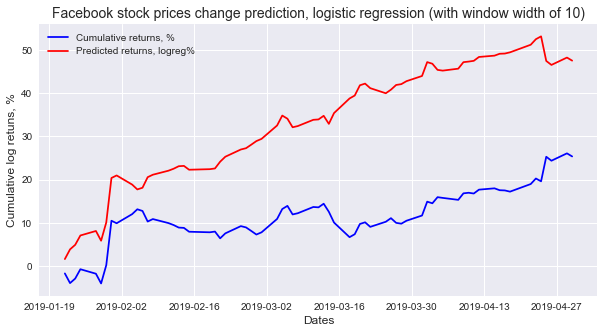

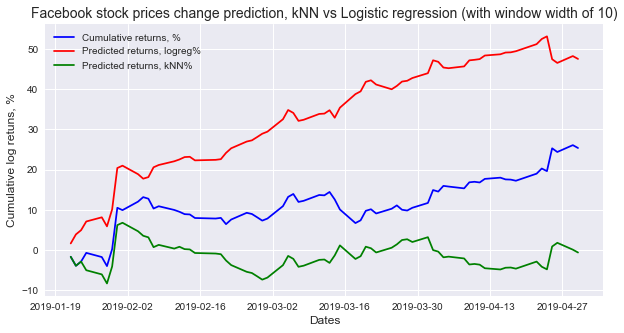

In [249]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(fb_cumulative_returns_logreg_10d, color = 'b', label = 'Cumulative returns, %')
plt.plot(fb_predicted_returns_cum_logreg_10d, color = 'r', label = 'Predicted returns, logreg%')
plt.title('Facebook stock prices change prediction, logistic regression (with window width of 10)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()



#Plot the results

plt.figure(figsize=(10,5))
plt.plot(fb_cumulative_returns_logreg_10d, color = 'b', label = 'Cumulative returns, %')
plt.plot(fb_predicted_returns_cum_logreg_10d, color = 'r', label = 'Predicted returns, logreg%')

plt.plot(fb_predicted_returns_cum_10d, color = 'g', label = 'Predicted returns, kNN%')
plt.title('Facebook stock prices change prediction, kNN vs Logistic regression (with window width of 10)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

We can see that Logistic regression prediction is more optimistic if compare to kNN's one. But kNN's pattern seems to be closer to cumulative returns curve.


As a next step, let's try fit the model to dataset with all features (indexes, capitalistaion, mobile and Internet users)

#### 2.3.3.3. Facebook-3: Complex model (all variables and 10 days window width)

In [250]:
#create data set with all features (indexes, capitalistaion, mobile and Internet users) and with 10 days window width

fb_data_logreg_10d = dataset(df_log['Close FB'], 10)
fb_data_logreg_10d_full = pd.concat([fb_data_logreg_10d, df_log], axis=1)
fb_data_logreg_10d_full.dropna(inplace=True)
fb_data_logreg_10d_full.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17 -0.008248  0.035029  0.022689 -0.012312  0.051311  0.022945   
2013-01-18  0.035029  0.022689 -0.012312  0.051311  0.022945  0.013329   
2013-01-22  0.022689 -0.012312  0.051311  0.022945  0.013329 -0.024574   
2013-01-23 -0.012312  0.051311  0.022945  0.013329 -0.024574 -0.027848   
2013-01-24  0.051311  0.022945  0.013329 -0.024574 -0.027848 -0.008340   

               (t-4)     (t-3)     (t-2)     (t-1)         ...           \
2013-01-17  0.013329 -0.024574 -0.027848 -0.008340         ...            
2013-01-18 -0.024574 -0.027848 -0.008340  0.009668         ...            
2013-01-22 -0.027848 -0.008340  0.009668 -0.016054         ...            
2013-01-23 -0.008340  0.009668 -0.016054  0.035440         ...            
2013-01-24  0.009668 -0.016054  0.035440  0.002924         ...            

            Arab_States__mob_users  CIS__mob_users  Europe__mob_users  \
2013-01-17                5.974573        5.744604           6.691463   
2013-01-18                5.974573        5.744924           6.691463   
2013-01-22                5.974827        5.744924           6.691463   
2013-01-23                5.974827        5.744924           6.691463   
2013-01-24                5.974827        5.744924           6.691463   

            Americas__mob_users  Asia_web_users  Africa__web_users  \
2013-01-17             6.929810        7.020012           4.427239   
2013-01-18             6.929908        7.020459           4.428433   
2013-01-22             6.930006        7.020905           4.429626   
2013-01-23             6.930104        7.021352           4.430817   
2013-01-24             6.930104        7.021887           4.432007   

            Arab_States__web_users  CIS__web_users  Europe__web_users  \
2013-01-17                4.670021        4.960044           6.071892   
2013-01-18                4.670958        4.960044           6.071892   
2013-01-22                4.671894        4.960044           6.072122   
2013-01-23                4.671894        4.960745           6.072122   
2013-01-24                4.672829        4.960745           6.072353   

            Americas__web_users  
2013-01-17             6.254406  
2013-01-18             6.254598  
2013-01-22             6.254790  
2013-01-23             6.254982  
2013-01-24             6.255174  

[5 rows x 41 columns]

In [251]:
#Apply function to fit Logistic regression model to Facebook full data set data with 10 days window width

fb_acc_logreg_10d_full = data_logreg(fb_data_logreg_10d_full)
fb_acc_logreg_10d_full.head()

Train set shape: (1106, 41) (1106,)
Test set shape: (475, 41) (475,)
Baseline accuracy: 0.520


C   mean_te    std_te
0  0.1  0.523508  0.041692
1    1  0.521700  0.038817
2   10  0.495479  0.046398

Baseline accuracy is about 0.52

Let fit model with hyperparameter C.

In [252]:
#Accuracy and classes probabilities

fb_proba_10d_full = data_logreg_tuned1(fb_data_logreg_10d_full, 0.1) #C parameter
fb_proba_10d_full


Accuracy: 0.549


down        up
2017-06-09  0.463605  0.536395
2017-06-12  0.417060  0.582940
2017-06-13  0.389434  0.610566
2017-06-14  0.430060  0.569940
2017-06-15  0.473425  0.526575
2017-06-16  0.489818  0.510182
2017-06-19  0.442529  0.557471
2017-06-20  0.531860  0.468140
2017-06-21  0.544046  0.455954
2017-06-22  0.506758  0.493242

So the model accuracy we've got is about 0.549 that is almost 3 points better than baseline which is 0.520.
Let's visualise it.

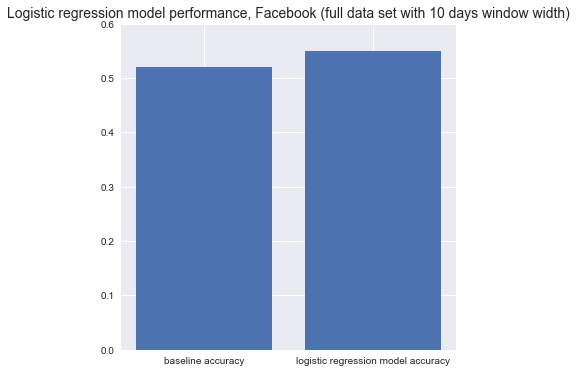

In [253]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.52, 0.549])
plt.xticks([1,2], ['baseline accuracy', 'logistic regression model accuracy'])
plt.ylim(0, 0.6)
plt.title('Logistic regression model performance, Facebook (full data set with 10 days window width)', fontsize=14);

In [254]:

#compare  performances of logistic regression

#model performance data frame
logreg_google_simple = [0.521, 0.54]
logreg_google_intermediate = [0.522, 0.535]
logreg_google_complex = [0.522, 0.516]
logreg_apple_simple = [0.54, 0.534]
logreg_apple_intermediate = [0.541, 0.520]
logreg_apple_complex = [0.541, 0.501]
logreg_facebook_simple = [0.519, 0.527]
logreg_facebook_intermediate = [0.520, 0.520]
logreg_facebook_complex = [0.520, 0.549]

df_performance = pd.DataFrame({
                'logreg_Google_simple_model': logreg_google_simple,
                'logreg_Google_intermediate_model': logreg_google_intermediate,
                'logreg_Google_complex_model': logreg_google_complex,
                'logreg_Apple_simple_model': logreg_apple_simple,
                'logreg_Apple_intermediate_model': logreg_apple_intermediate,
                'logreg_Apple_complex_model': logreg_apple_complex,
                'logreg_Facebook_simple_model': logreg_facebook_simple,
                'logreg_Facebook_intermediate_model' : logreg_facebook_intermediate,
                'logreg_Facebook_complex_model' : logreg_facebook_complex
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance


Baseline accuracy  Model accuracy
logreg_Apple_complex_model                      0.541           0.501
logreg_Apple_intermediate_model                 0.541           0.520
logreg_Apple_simple_model                       0.540           0.534
logreg_Facebook_complex_model                   0.520           0.549
logreg_Facebook_intermediate_model              0.520           0.520
logreg_Facebook_simple_model                    0.519           0.527
logreg_Google_complex_model                     0.522           0.516
logreg_Google_intermediate_model                0.522           0.535
logreg_Google_simple_model                      0.521           0.540

In [255]:
df_performance_knn[6:7]

Baseline accuracy  Model accuracy
knn_Facebook_complex_model              0.508           0.542


For Facebook complex model logistic regression performace is slightly better with 0.549 vs 0.542 of kNN

Now let's compute predictions

In [256]:
#Compute predictions for Facebook data
#Collect predictions in the data frame 

predictions_fb_logreg_10d_full = data_logreg_tuned2(fb_data_logreg_10d_full, 0.1) #C parameter

fb_data_logreg_10d_full['y'] = np.where(fb_data_logreg_10d_full['Day price (t)'].shift(-1) > 0, 1, -1)
fb_data_logreg_10d_full['Predictions'] = predictions_fb_logreg_10d_full
fb_data_logreg_10d_full.tail(5)

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24  0.015035  0.001351 -0.001745  0.008917  0.003066 -0.004351   
2019-04-25  0.001351 -0.001745  0.008917  0.003066 -0.004351 -0.000503   
2019-04-26 -0.001745  0.008917  0.003066 -0.004351 -0.000503 -0.002801   
2019-04-29  0.008917  0.003066 -0.004351 -0.000503 -0.002801  0.017570   
2019-04-30  0.003066 -0.004351 -0.000503 -0.002801  0.017570  0.012814   

               (t-4)     (t-3)     (t-2)     (t-1)     ...       \
2019-04-24 -0.000503 -0.002801  0.017570  0.012814     ...        
2019-04-25 -0.002801  0.017570  0.012814 -0.006551     ...        
2019-04-26  0.017570  0.012814 -0.006551  0.056848     ...        
2019-04-29  0.012814 -0.006551  0.056848 -0.009201     ...        
2019-04-30 -0.006551  0.056848 -0.009201  0.017035     ...        

            Europe__mob_users  Americas__mob_users  Asia_web_users  \
2019-04-24           6.701346             7.048908        7.579015   
2019-04-25           6.701346             7.048994        7.579270   
2019-04-26           6.701346             7.049081        7.579577   
2019-04-29           6.701346             7.049168        7.579832   
2019-04-30           6.701346             7.049168        7.580087   

            Africa__web_users  Arab_States__web_users  CIS__web_users  \
2019-04-24           5.484382                5.256453        5.305293   
2019-04-25           5.484797                5.256974        5.305293   
2019-04-26           5.485212                5.256974        5.305789   
2019-04-29           5.485626                5.257495        5.305789   
2019-04-30           5.486041                5.257495        5.305789   

            Europe__web_users  Americas__web_users  y  Predictions  
2019-04-24           6.248236             6.536402  1           -1  
2019-04-25           6.248430             6.536547 -1           -1  
2019-04-26           6.248430             6.536692  1            1  
2019-04-29           6.248623             6.536837 -1           -1  
2019-04-30           6.248623             6.536981 -1            1  

[5 rows x 43 columns]

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

As a next step let's compute cumulative log returns and cumulative predicted log returns and visualiye it to compare.<br>
Cumulative log returns is a cumulative sum of daily log returns.<br>
Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 


In [257]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
fb_data_logreg_10d_full['Cumulative_returns'] = fb_data_logreg_10d_full[split:]['Day price (t)'].cumsum()*100
fb_cumulative_returns_logreg_10d_full = fb_data_logreg_10d_full['Cumulative_returns']

#Compute cumulative predicted returns
fb_data_logreg_10d_full['Predicted returns'] = (np.abs(fb_data_logreg_10d_full['Day price (t)']))*(fb_data_logreg_10d_full['Predictions'].shift(1))
fb_data_logreg_10d_full['Predicted returns_cum'] = fb_data_logreg_10d_full[split:]['Predicted returns'].cumsum()*100
fb_predicted_returns_cum_logreg_10d_full = fb_data_logreg_10d_full['Predicted returns_cum']

fb_data_logreg_10d_full.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24  0.015035  0.001351 -0.001745  0.008917  0.003066 -0.004351   
2019-04-25  0.001351 -0.001745  0.008917  0.003066 -0.004351 -0.000503   
2019-04-26 -0.001745  0.008917  0.003066 -0.004351 -0.000503 -0.002801   
2019-04-29  0.008917  0.003066 -0.004351 -0.000503 -0.002801  0.017570   
2019-04-30  0.003066 -0.004351 -0.000503 -0.002801  0.017570  0.012814   

               (t-4)     (t-3)     (t-2)     (t-1)          ...            \
2019-04-24 -0.000503 -0.002801  0.017570  0.012814          ...             
2019-04-25 -0.002801  0.017570  0.012814 -0.006551          ...             
2019-04-26  0.017570  0.012814 -0.006551  0.056848          ...             
2019-04-29  0.012814 -0.006551  0.056848 -0.009201          ...             
2019-04-30 -0.006551  0.056848 -0.009201  0.017035          ...             

            Africa__web_users  Arab_States__web_users  CIS__web_users  \
2019-04-24           5.484382                5.256453        5.305293   
2019-04-25           5.484797                5.256974        5.305293   
2019-04-26           5.485212                5.256974        5.305789   
2019-04-29           5.485626                5.257495        5.305789   
2019-04-30           5.486041                5.257495        5.305789   

            Europe__web_users  Americas__web_users  y  Predictions  \
2019-04-24           6.248236             6.536402  1           -1   
2019-04-25           6.248430             6.536547 -1           -1   
2019-04-26           6.248430             6.536692  1            1   
2019-04-29           6.248623             6.536837 -1           -1   
2019-04-30           6.248623             6.536981 -1            1   

            Cumulative_returns  Predicted returns  Predicted returns_cum  
2019-04-24           19.628657          -0.006551              -0.526152  
2019-04-25           25.313453          -0.056848              -6.210948  
2019-04-26           24.393374          -0.009201              -7.131028  
2019-04-29           26.096883           0.017035              -5.427518  
2019-04-30           25.385867          -0.007110              -6.138534  

[5 rows x 46 columns]

Let's visualise it and compare with the same plot for kNN model.

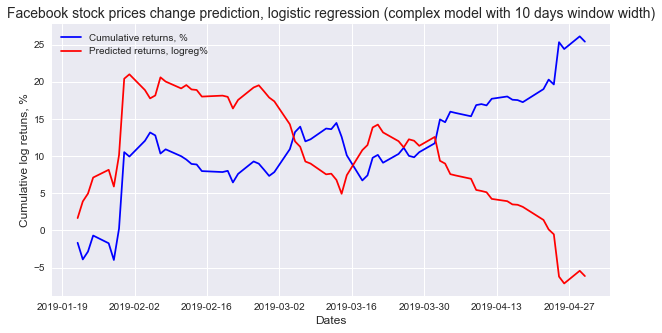

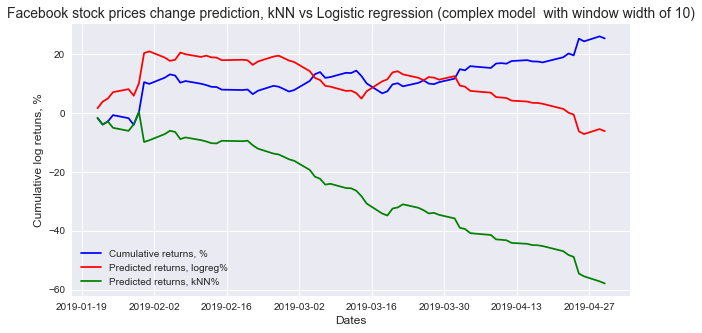

In [258]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(fb_cumulative_returns_logreg_10d_full, color = 'b', label = 'Cumulative returns, %')
plt.plot(fb_predicted_returns_cum_logreg_10d_full, color = 'r', label = 'Predicted returns, logreg%')
plt.title('Facebook stock prices change prediction, logistic regression (complex model with 10 days window width)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()



#Plot the results

plt.figure(figsize=(10,5))
plt.plot(fb_cumulative_returns_logreg_10d_full, color = 'b', label = 'Cumulative returns, %')
plt.plot(fb_predicted_returns_cum_logreg_10d_full, color = 'r', label = 'Predicted returns, logreg%')
plt.plot(fb_predicted_returns_cum_10d_full, color = 'g', label = 'Predicted returns, kNN%')
plt.title('Facebook stock prices change prediction, kNN vs Logistic regression (complex model  with window width of 10)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

We can see that Logistic regression prediction curve is closer to cumulative log return curve than kNN's one.

Let's continue analysis with Amazon data.



<img src ='amazon.png'>
#### 2.3.4. Amazon: Logistic regression

##### 2.3.4.1.  Amazon-1: simple model (5 days window width)

In [259]:
#Amazon data for 5 days window width

amz_data_logreg = dataset(df_log['Close Amazon'], 5)
amz_data_logreg.tail()


(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)
2019-04-24  0.009801  0.000955 -0.001680  0.013668  0.019134      -0.011512
2019-04-25  0.000955 -0.001680  0.013668  0.019134 -0.011512       0.000263
2019-04-26 -0.001680  0.013668  0.019134 -0.011512  0.000263       0.025115
2019-04-29  0.013668  0.019134 -0.011512  0.000263  0.025115      -0.006274
2019-04-30  0.019134 -0.011512  0.000263  0.025115 -0.006274      -0.006163

In [260]:
#Apply function to fit Logistic regression model to Amazon data with 5 days window width

amz_acc_logreg = data_logreg(amz_data_logreg)
amz_acc_logreg.head()

Train set shape: (1110, 6) (1110,)
Test set shape: (476, 6) (476,)
Baseline accuracy: 0.561


C   mean_te    std_te
1    1  0.525225  0.026456
0  0.1  0.524324  0.025440
2   10  0.524324  0.025440

Baseline accuracy is about 0.561

Let fit model with hyperparameter C.

In [261]:
#Accuracy and classes probabilities

amz_proba = data_logreg_tuned1(amz_data_logreg, 10)
amz_proba


Accuracy: 0.555


down        up
2017-06-08  0.473628  0.526372
2017-06-09  0.451618  0.548382
2017-06-12  0.418906  0.581094
2017-06-13  0.432617  0.567383
2017-06-14  0.447365  0.552635
2017-06-15  0.438625  0.561375
2017-06-16  0.446208  0.553792
2017-06-19  0.482468  0.517532
2017-06-20  0.459462  0.540538
2017-06-21  0.483461  0.516539

So the model accuracy we've got is about 0.555 that is a little bit less than baseline which is 0.561.

Let's visualise it and put it into the Performance data frame to compare.

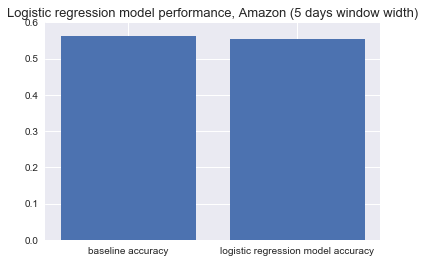

In [262]:
plt.figure(figsize=(6,4))
plt.bar([1,2], [0.561, 0.555])
plt.xticks([1,2], ['baseline accuracy', 'logistic regression model accuracy'])
plt.ylim(0, 0.6)
plt.title('Logistic regression model performance, Amazon (5 days window width)', fontsize=13);

In [263]:
#compare  performances of logistic regression

#model performance data frame
logreg_google_simple = [0.521, 0.54]
logreg_google_intermediate = [0.522, 0.535]
logreg_google_complex = [0.522, 0.516]
logreg_apple_simple = [0.54, 0.534]
logreg_apple_intermediate = [0.541, 0.520]
logreg_apple_complex = [0.541, 0.501]
logreg_facebook_simple = [0.519, 0.527]
logreg_facebook_intermediate = [0.520, 0.520]
logreg_facebook_complex = [0.520, 0.549]
logreg_amazon_simple = [0.561, 0.555]

df_performance = pd.DataFrame({
                'logreg_Google_simple_model': logreg_google_simple,
                'logreg_Google_intermediate_model': logreg_google_intermediate,
                'logreg_Google_complex_model': logreg_google_complex,
                'logreg_Apple_simple_model': logreg_apple_simple,
                'logreg_Apple_intermediate_model': logreg_apple_intermediate,
                'logreg_Apple_complex_model': logreg_apple_complex,
                'logreg_Facebook_simple_model': logreg_facebook_simple,
                'logreg_Facebook_intermediate_model' : logreg_facebook_intermediate,
                'logreg_facebook_complex_model' : logreg_facebook_complex,
                'logreg_Amazon_simple_model' : logreg_amazon_simple
    
    
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance


Baseline accuracy  Model accuracy
logreg_Amazon_simple_model                      0.561           0.555
logreg_Apple_complex_model                      0.541           0.501
logreg_Apple_intermediate_model                 0.541           0.520
logreg_Apple_simple_model                       0.540           0.534
logreg_Facebook_intermediate_model              0.520           0.520
logreg_Facebook_simple_model                    0.519           0.527
logreg_Google_complex_model                     0.522           0.516
logreg_Google_intermediate_model                0.522           0.535
logreg_Google_simple_model                      0.521           0.540
logreg_facebook_complex_model                   0.520           0.549

In [264]:
df_performance_knn[2:3]

Baseline accuracy  Model accuracy
knn_Amazon_simple_model              0.575           0.581

For Amazon simple model kNN performace is better with 0.581 vs 0.555 of logistic regression

Now let's use model to compute predictions

In [265]:
#Compute predictions for Amazon data, using the best C parameter
#Collect predictions in the data frame 

predictions_amz_logreg = data_logreg_tuned2(amz_data_logreg, 1) #C parameter

amz_data_logreg['y'] = np.where(amz_data_logreg['Day price (t)'].shift(-1) > 0, 1, -1)
amz_data_logreg['Predictions'] = predictions_amz_logreg
amz_data_logreg.tail(5)

(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24  0.009801  0.000955 -0.001680  0.013668  0.019134      -0.011512   
2019-04-25  0.000955 -0.001680  0.013668  0.019134 -0.011512       0.000263   
2019-04-26 -0.001680  0.013668  0.019134 -0.011512  0.000263       0.025115   
2019-04-29  0.013668  0.019134 -0.011512  0.000263  0.025115      -0.006274   
2019-04-30  0.019134 -0.011512  0.000263  0.025115 -0.006274      -0.006163   

            y  Predictions  
2019-04-24  1            1  
2019-04-25  1            1  
2019-04-26 -1            1  
2019-04-29 -1            1  
2019-04-30 -1            1

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

As a next step let's compute cumulative log returns and cumulative predicted log returns and visualiye it to compare.<br>
Cumulative log returns is a cumulative sum of daily log returns.<br>
Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 


In [266]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
amz_data_logreg['Cumulative_returns'] = amz_data_logreg[split:]['Day price (t)'].cumsum()*100
amz_cumulative_returns_logreg = amz_data_logreg['Cumulative_returns']

#Compute cumulative predicted returns
amz_data_logreg['Predicted returns'] = (np.abs(amz_data_logreg['Day price (t)']))*(amz_data_logreg['Predictions'].shift(1))
amz_data_logreg['Predicted returns_cum'] = amz_data_logreg[split:]['Predicted returns'].cumsum()*100
amz_predicted_returns_cum_logreg = amz_data_logreg['Predicted returns_cum']

amz_data_logreg.tail()

(t-5)     (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  \
2019-04-24  0.009801  0.000955 -0.001680  0.013668  0.019134      -0.011512   
2019-04-25  0.000955 -0.001680  0.013668  0.019134 -0.011512       0.000263   
2019-04-26 -0.001680  0.013668  0.019134 -0.011512  0.000263       0.025115   
2019-04-29  0.013668  0.019134 -0.011512  0.000263  0.025115      -0.006274   
2019-04-30  0.019134 -0.011512  0.000263  0.025115 -0.006274      -0.006163   

            y  Predictions  Cumulative_returns  Predicted returns  \
2019-04-24  1            1           14.773683           0.011512   
2019-04-25  1            1           14.799971           0.000263   
2019-04-26 -1            1           17.311472           0.025115   
2019-04-29 -1            1           16.684071           0.006274   
2019-04-30 -1            1           16.067759           0.006163   

            Predicted returns_cum  
2019-04-24              50.914440  
2019-04-25              50.940728  
2019-04-26              53.452228  
2019-04-29              54.079629  
2019-04-30              54.695940

Let's visualise it and compare with the same plot for kNN model.

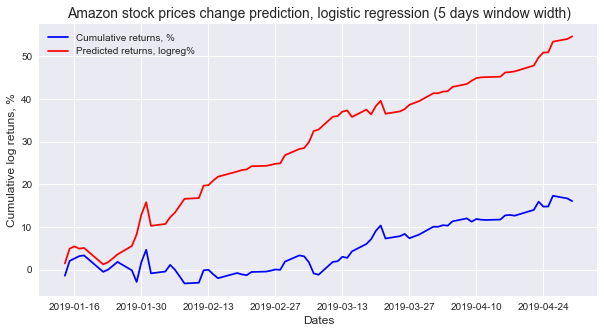

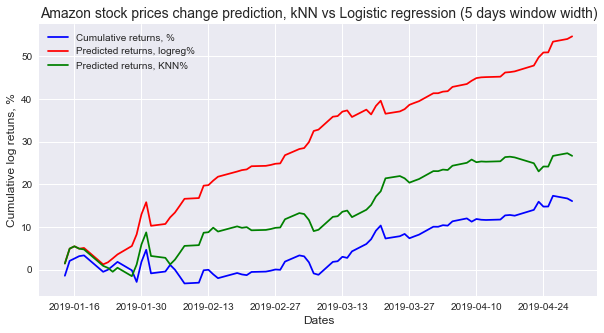

In [267]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(amz_cumulative_returns_logreg, color = 'b', label = 'Cumulative returns, %')
plt.plot(amz_predicted_returns_cum_logreg, color = 'r', label = 'Predicted returns, logreg%')
plt.title('Amazon stock prices change prediction, logistic regression (5 days window width)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

#Plot the results
plt.figure(figsize=(10,5))
plt.plot(amz_cumulative_returns_logreg, color = 'b', label = 'Cumulative returns, %')
plt.plot(amz_predicted_returns_cum_logreg, color = 'r', label = 'Predicted returns, logreg%')

plt.plot(amz_predicted_returns_cum, color = 'g', label = 'Predicted returns, KNN%')

plt.title('Amazon stock prices change prediction, kNN vs Logistic regression (5 days window width)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

We can see that kNN predictions seem to be closer to cumulative returns curve than Logistic regression's one.

Now, let's fit Logistic regression classifier to Amazon data set with windw width of 10 days.

##### 2.3.4.2. Amazon-2: intermediate model (10 days window width)

In [268]:
#Facebook data for 10 days window width

amz_data_logreg_10d = dataset(df_log['Close Amazon'], 10)
amz_data_logreg_10d.tail()


(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.007608  0.006239 -0.001766 -0.000548  0.000982  0.009801   
2019-04-25  0.006239 -0.001766 -0.000548  0.000982  0.009801  0.000955   
2019-04-26 -0.001766 -0.000548  0.000982  0.009801  0.000955 -0.001680   
2019-04-29 -0.000548  0.000982  0.009801  0.000955 -0.001680  0.013668   
2019-04-30  0.000982  0.009801  0.000955 -0.001680  0.013668  0.019134   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  
2019-04-24  0.000955 -0.001680  0.013668  0.019134      -0.011512  
2019-04-25 -0.001680  0.013668  0.019134 -0.011512       0.000263  
2019-04-26  0.013668  0.019134 -0.011512  0.000263       0.025115  
2019-04-29  0.019134 -0.011512  0.000263  0.025115      -0.006274  
2019-04-30 -0.011512  0.000263  0.025115 -0.006274      -0.006163

In [269]:
#Apply function to fit Logistic regression model to Facebook data set with 10 days window width

amz_acc_logreg_10d = data_logreg(amz_data_logreg_10d)
amz_acc_logreg_10d.head()

Train set shape: (1106, 11) (1106,)
Test set shape: (475, 11) (475,)
Baseline accuracy: 0.562


C  mean_te    std_te
0  0.1  0.51085  0.030862
1    1  0.51085  0.030862
2   10  0.51085  0.030862

Baseline accuracy is about 0.562

Let fit model with hyperparameter C.

In [270]:
#Accuracy and classes probabilities

amz_proba_10d = data_logreg_tuned1(amz_data_logreg_10d, 0.1)
amz_proba_10d


Accuracy: 0.549


down        up
2017-06-09  0.458712  0.541288
2017-06-12  0.425063  0.574937
2017-06-13  0.439225  0.560775
2017-06-14  0.446291  0.553709
2017-06-15  0.436704  0.563296
2017-06-16  0.456273  0.543727
2017-06-19  0.485253  0.514747
2017-06-20  0.447891  0.552109
2017-06-21  0.487086  0.512914
2017-06-22  0.482152  0.517848

So the model accuracy we've got is about 0.549 that  is little bit lower than baseline which is 0.562.

Let's visualise it and put it into the Performance data frame to compare.

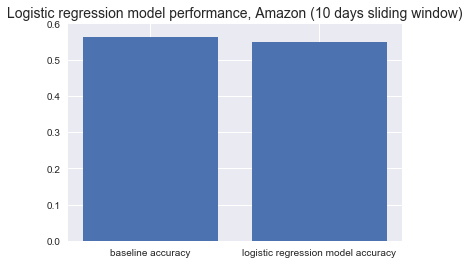

In [271]:
plt.figure(figsize=(6,4))
plt.bar([1,2], [0.562, 0.549])
plt.xticks([1,2], ['baseline accuracy', 'logistic regression model accuracy'])
plt.ylim(0, 0.6)
plt.title('Logistic regression model performance, Amazon (10 days sliding window)', fontsize=14);

In [272]:
#compare  performances of logistic regression

#model performance data frame
logreg_google_simple = [0.521, 0.54]
logreg_google_intermediate = [0.522, 0.535]
logreg_google_complex = [0.522, 0.516]
logreg_apple_simple = [0.54, 0.534]
logreg_apple_intermediate = [0.541, 0.520]
logreg_apple_complex = [0.541, 0.501]
logreg_facebook_simple = [0.519, 0.527]
logreg_facebook_intermediate = [0.520, 0.520]
logreg_facebook_complex = [0.520, 0.549]
logreg_amazon_simple = [0.561, 0.555]
logreg_amazon_intermediate = [0.562, 0.549]

df_performance = pd.DataFrame({
                'logreg_Google_simple_model': logreg_google_simple,
                'logreg_Google_intermediate_model': logreg_google_intermediate,
                'logreg_Google_complex_model': logreg_google_complex,
                'logreg_Apple_simple_model': logreg_apple_simple,
                'logreg_Apple_intermediate_model': logreg_apple_intermediate,
                'logreg_Apple_complex_model': logreg_apple_complex,
                'logreg_Facebook_simple_model': logreg_facebook_simple,
                'logreg_Facebook_intermediate_model' : logreg_facebook_intermediate,
                'logreg_Facebook_complex_model' : logreg_facebook_complex,
                'logreg_Amazon_simple_model' : logreg_amazon_simple,
                'logreg_Amazon_intermediate_model' : logreg_amazon_intermediate
    
    
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance

Baseline accuracy  Model accuracy
logreg_Amazon_intermediate_model                0.562           0.549
logreg_Amazon_simple_model                      0.561           0.555
logreg_Apple_complex_model                      0.541           0.501
logreg_Apple_intermediate_model                 0.541           0.520
logreg_Apple_simple_model                       0.540           0.534
logreg_Facebook_complex_model                   0.520           0.549
logreg_Facebook_intermediate_model              0.520           0.520
logreg_Facebook_simple_model                    0.519           0.527
logreg_Google_complex_model                     0.522           0.516
logreg_Google_intermediate_model                0.522           0.535
logreg_Google_simple_model                      0.521           0.540

In [273]:
df_performance_knn[1:2]

Baseline accuracy  Model accuracy
knn_Amazon_intermediate_model              0.574            0.58


For Amazon intermediate model kNN performace is better with 0.58 vs 0.549 of logistic regression

Now let's compute predictions

In [274]:
#Compute predictions for Amazon data
#Collect predictions in the data frame 

predictions_amz_logreg_10d = data_logreg_tuned2(amz_data_logreg_10d, 0.1) #C parameter
amz_data_logreg_10d['y'] = np.where(amz_data_logreg_10d['Day price (t)'].shift(-1) > 0, 1, -1)
amz_data_logreg_10d['Predictions'] = predictions_amz_logreg_10d
amz_data_logreg_10d.tail(5)

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.007608  0.006239 -0.001766 -0.000548  0.000982  0.009801   
2019-04-25  0.006239 -0.001766 -0.000548  0.000982  0.009801  0.000955   
2019-04-26 -0.001766 -0.000548  0.000982  0.009801  0.000955 -0.001680   
2019-04-29 -0.000548  0.000982  0.009801  0.000955 -0.001680  0.013668   
2019-04-30  0.000982  0.009801  0.000955 -0.001680  0.013668  0.019134   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-24  0.000955 -0.001680  0.013668  0.019134      -0.011512  1   
2019-04-25 -0.001680  0.013668  0.019134 -0.011512       0.000263  1   
2019-04-26  0.013668  0.019134 -0.011512  0.000263       0.025115 -1   
2019-04-29  0.019134 -0.011512  0.000263  0.025115      -0.006274 -1   
2019-04-30 -0.011512  0.000263  0.025115 -0.006274      -0.006163 -1   

            Predictions  
2019-04-24            1  
2019-04-25            1  
2019-04-26            1  
2019-04-29            1  
2019-04-30            1

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

As a next step let's compute cumulative log returns and cumulative predicted log returns and visualiye it to compare.<br>
Cumulative log returns is a cumulative sum of daily log returns.<br>
Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 


In [275]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
amz_data_logreg_10d['Cumulative_returns'] = amz_data_logreg_10d[split:]['Day price (t)'].cumsum()*100
amz_cumulative_returns_logreg_10d = amz_data_logreg_10d['Cumulative_returns']

#Compute cumulative predicted returns
amz_data_logreg_10d['Predicted returns'] = (np.abs(amz_data_logreg_10d['Day price (t)']))*(amz_data_logreg_10d['Predictions'].shift(1))
amz_data_logreg_10d['Predicted returns_cum'] = amz_data_logreg_10d[split:]['Predicted returns'].cumsum()*100
amz_predicted_returns_cum_logreg_10d = amz_data_logreg_10d['Predicted returns_cum']

amz_data_logreg_10d.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.007608  0.006239 -0.001766 -0.000548  0.000982  0.009801   
2019-04-25  0.006239 -0.001766 -0.000548  0.000982  0.009801  0.000955   
2019-04-26 -0.001766 -0.000548  0.000982  0.009801  0.000955 -0.001680   
2019-04-29 -0.000548  0.000982  0.009801  0.000955 -0.001680  0.013668   
2019-04-30  0.000982  0.009801  0.000955 -0.001680  0.013668  0.019134   

               (t-4)     (t-3)     (t-2)     (t-1)  Day price (t)  y  \
2019-04-24  0.000955 -0.001680  0.013668  0.019134      -0.011512  1   
2019-04-25 -0.001680  0.013668  0.019134 -0.011512       0.000263  1   
2019-04-26  0.013668  0.019134 -0.011512  0.000263       0.025115 -1   
2019-04-29  0.019134 -0.011512  0.000263  0.025115      -0.006274 -1   
2019-04-30 -0.011512  0.000263  0.025115 -0.006274      -0.006163 -1   

            Predictions  Cumulative_returns  Predicted returns  \
2019-04-24            1           11.438409           0.011512   
2019-04-25            1           11.464697           0.000263   
2019-04-26            1           13.976197           0.025115   
2019-04-29            1           13.348797           0.006274   
2019-04-30            1           12.732485           0.006163   

            Predicted returns_cum  
2019-04-24              49.785028  
2019-04-25              49.811316  
2019-04-26              52.322816  
2019-04-29              52.950217  
2019-04-30              53.566529

Let's visualise it and compare with the same plot for kNN model.

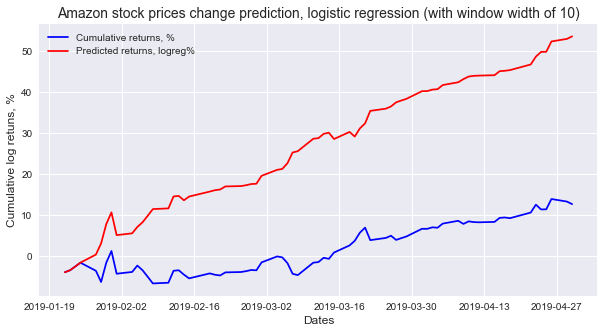

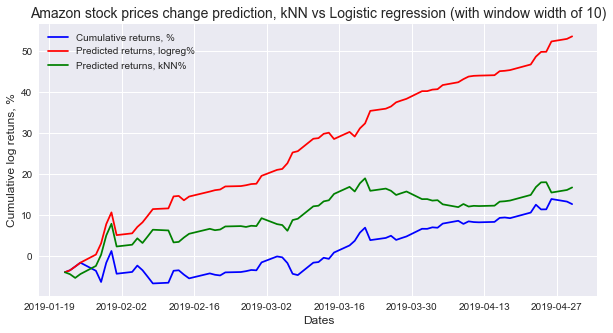

In [276]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(amz_cumulative_returns_logreg_10d, color = 'b', label = 'Cumulative returns, %')
plt.plot(amz_predicted_returns_cum_logreg_10d, color = 'r', label = 'Predicted returns, logreg%')
plt.title('Amazon stock prices change prediction, logistic regression (with window width of 10)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()



#Plot the results

plt.figure(figsize=(10,5))
plt.plot(amz_cumulative_returns_logreg_10d, color = 'b', label = 'Cumulative returns, %')
plt.plot(amz_predicted_returns_cum_logreg_10d, color = 'r', label = 'Predicted returns, logreg%')

plt.plot(amz_predicted_returns_cum_10d, color = 'g', label = 'Predicted returns, kNN%')
plt.title('Amazon stock prices change prediction, kNN vs Logistic regression (with window width of 10)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

We can see here that kNN's curve seems to be closer to cumulative returns one than Logististic regression's.


As a next step, let's try fit the model to dataset with all features (indexes, capitalistaion, mobile and Internet users)

#### 2.3.4.3. Amazon-3: Complex model (all variables and 10 days window width)

In [277]:
#create data set with all features (indexes, capitalistaion, mobile and Internet users) and with 10 days window width

amz_data_logreg_10d = dataset(df_log['Close Amazon'], 10)
amz_data_logreg_10d_full = pd.concat([amz_data_logreg_10d, df_log], axis=1)
amz_data_logreg_10d_full.dropna(inplace=True)
amz_data_logreg_10d_full.head()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2013-01-17  0.004537  0.002589  0.035295 -0.007778 -0.000113 -0.003799   
2013-01-18  0.002589  0.035295 -0.007778 -0.000113 -0.003799  0.009751   
2013-01-22  0.035295 -0.007778 -0.000113 -0.003799  0.009751  0.017719   
2013-01-23 -0.007778 -0.000113 -0.003799  0.009751  0.017719 -0.003048   
2013-01-24 -0.000113 -0.003799  0.009751  0.017719 -0.003048 -0.010983   

               (t-4)     (t-3)     (t-2)     (t-1)         ...           \
2013-01-17  0.009751  0.017719 -0.003048 -0.010983         ...            
2013-01-18  0.017719 -0.003048 -0.010983  0.005747         ...            
2013-01-22 -0.003048 -0.010983  0.005747  0.006045         ...            
2013-01-23 -0.010983  0.005747  0.006045 -0.007118         ...            
2013-01-24  0.005747  0.006045 -0.007118 -0.007728         ...            

            Arab_States__mob_users  CIS__mob_users  Europe__mob_users  \
2013-01-17                5.974573        5.744604           6.691463   
2013-01-18                5.974573        5.744924           6.691463   
2013-01-22                5.974827        5.744924           6.691463   
2013-01-23                5.974827        5.744924           6.691463   
2013-01-24                5.974827        5.744924           6.691463   

            Americas__mob_users  Asia_web_users  Africa__web_users  \
2013-01-17             6.929810        7.020012           4.427239   
2013-01-18             6.929908        7.020459           4.428433   
2013-01-22             6.930006        7.020905           4.429626   
2013-01-23             6.930104        7.021352           4.430817   
2013-01-24             6.930104        7.021887           4.432007   

            Arab_States__web_users  CIS__web_users  Europe__web_users  \
2013-01-17                4.670021        4.960044           6.071892   
2013-01-18                4.670958        4.960044           6.071892   
2013-01-22                4.671894        4.960044           6.072122   
2013-01-23                4.671894        4.960745           6.072122   
2013-01-24                4.672829        4.960745           6.072353   

            Americas__web_users  
2013-01-17             6.254406  
2013-01-18             6.254598  
2013-01-22             6.254790  
2013-01-23             6.254982  
2013-01-24             6.255174  

[5 rows x 41 columns]

In [278]:
#Apply function to fit Logistic regression model to Facebook full data set data with 10 days window width

amz_acc_logreg_10d_full = data_logreg(amz_data_logreg_10d_full)
amz_acc_logreg_10d_full.head()

Train set shape: (1106, 41) (1106,)
Test set shape: (475, 41) (475,)
Baseline accuracy: 0.562


C   mean_te    std_te
0  0.1  0.509042  0.042905
1    1  0.487342  0.068722
2   10  0.455696  0.089527

Baseline accuracy is about 0.562

Let fit model with hyperparameter C.

In [279]:
#Accuracy and classes probabilities

amz_proba_10d_full = data_logreg_tuned1(amz_data_logreg_10d_full, 10)
amz_proba_10d_full


Accuracy: 0.488


down        up
2017-06-09  0.365924  0.634076
2017-06-12  0.414091  0.585909
2017-06-13  0.405253  0.594747
2017-06-14  0.457304  0.542696
2017-06-15  0.440144  0.559856
2017-06-16  0.455281  0.544719
2017-06-19  0.495538  0.504462
2017-06-20  0.360230  0.639770
2017-06-21  0.394648  0.605352
2017-06-22  0.409252  0.590748

So the model accuracy we've got is about 0.488 that is lower than baseline which is 0.562.
Let's visualise it.

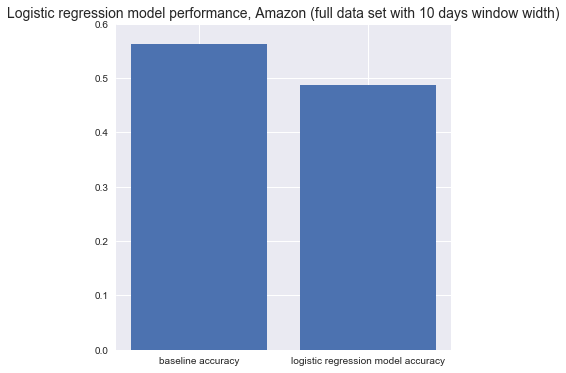

In [280]:
plt.figure(figsize=(6,6))
plt.bar([1,2], [0.562, 0.488])
plt.xticks([1,2], ['baseline accuracy', 'logistic regression model accuracy'])
plt.ylim(0, 0.6)
plt.title('Logistic regression model performance, Amazon (full data set with 10 days window width)', fontsize=14);

In [281]:
#compare  performances of logistic regression

#model performance data frame
logreg_google_simple = [0.521, 0.54]
logreg_google_intermediate = [0.522, 0.535]
logreg_google_complex = [0.522, 0.516]
logreg_apple_simple = [0.54, 0.534]
logreg_apple_intermediate = [0.541, 0.520]
logreg_apple_complex = [0.541, 0.501]
logreg_facebook_simple = [0.519, 0.527]
logreg_facebook_intermediate = [0.520, 0.520]
logreg_facebook_complex = [0.520, 0.549]
logreg_amazon_simple = [0.561, 0.555]
logreg_amazon_intermediate = [0.562, 0.549]
logreg_amazon_complex = [0.562, 0.488]

df_performance = pd.DataFrame({
                'logreg_Google_simple_model': logreg_google_simple,
                'logreg_Google_intermediate_model': logreg_google_intermediate,
                'logreg_Google_complex_model': logreg_google_complex,
                'logreg_Apple_simple_model': logreg_apple_simple,
                'logreg_Apple_intermediate_model': logreg_apple_intermediate,
                'logreg_Apple_complex_model': logreg_apple_complex,
                'logreg_Facebook_simple_model': logreg_facebook_simple,
                'logreg_Facebook_intermediate_model' : logreg_facebook_intermediate,
                'logreg_Facebook_complex_model' : logreg_facebook_complex,
                'logreg_Amazon_simple_model' : logreg_amazon_simple,
                'logreg_Amazon_intermediate_model' : logreg_amazon_intermediate,
                'logreg_Amazon_complex_model' : logreg_amazon_complex 
    
    
                }, index=['Baseline accuracy', 'Model accuracy']).T
df_performance


Baseline accuracy  Model accuracy
logreg_Amazon_complex_model                     0.562           0.488
logreg_Amazon_intermediate_model                0.562           0.549
logreg_Amazon_simple_model                      0.561           0.555
logreg_Apple_complex_model                      0.541           0.501
logreg_Apple_intermediate_model                 0.541           0.520
logreg_Apple_simple_model                       0.540           0.534
logreg_Facebook_complex_model                   0.520           0.549
logreg_Facebook_intermediate_model              0.520           0.520
logreg_Facebook_simple_model                    0.519           0.527
logreg_Google_complex_model                     0.522           0.516
logreg_Google_intermediate_model                0.522           0.535
logreg_Google_simple_model                      0.521           0.540

In [282]:
df_performance_knn[0:1]

Baseline accuracy  Model accuracy
knn_Amazon_complex_model              0.574           0.593


For Amazon complex model kNN performace is better with 0.593 vs 0.488 of logistic regression

Now let's compute predictions

In [283]:
#Compute predictions for Google data
#Collect predictions in the data frame 

predictions_amz_logreg_10d_full = data_logreg_tuned2(amz_data_logreg_10d_full, 10) #C parameter

amz_data_logreg_10d_full['y'] = np.where(amz_data_logreg_10d_full['Day price (t)'].shift(-1) > 0, 1, -1)
amz_data_logreg_10d_full['Predictions'] = predictions_amz_logreg_10d_full
amz_data_logreg_10d_full.tail(5)

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.007608  0.006239 -0.001766 -0.000548  0.000982  0.009801   
2019-04-25  0.006239 -0.001766 -0.000548  0.000982  0.009801  0.000955   
2019-04-26 -0.001766 -0.000548  0.000982  0.009801  0.000955 -0.001680   
2019-04-29 -0.000548  0.000982  0.009801  0.000955 -0.001680  0.013668   
2019-04-30  0.000982  0.009801  0.000955 -0.001680  0.013668  0.019134   

               (t-4)     (t-3)     (t-2)     (t-1)     ...       \
2019-04-24  0.000955 -0.001680  0.013668  0.019134     ...        
2019-04-25 -0.001680  0.013668  0.019134 -0.011512     ...        
2019-04-26  0.013668  0.019134 -0.011512  0.000263     ...        
2019-04-29  0.019134 -0.011512  0.000263  0.025115     ...        
2019-04-30 -0.011512  0.000263  0.025115 -0.006274     ...        

            Europe__mob_users  Americas__mob_users  Asia_web_users  \
2019-04-24           6.701346             7.048908        7.579015   
2019-04-25           6.701346             7.048994        7.579270   
2019-04-26           6.701346             7.049081        7.579577   
2019-04-29           6.701346             7.049168        7.579832   
2019-04-30           6.701346             7.049168        7.580087   

            Africa__web_users  Arab_States__web_users  CIS__web_users  \
2019-04-24           5.484382                5.256453        5.305293   
2019-04-25           5.484797                5.256974        5.305293   
2019-04-26           5.485212                5.256974        5.305789   
2019-04-29           5.485626                5.257495        5.305789   
2019-04-30           5.486041                5.257495        5.305789   

            Europe__web_users  Americas__web_users  y  Predictions  
2019-04-24           6.248236             6.536402  1            1  
2019-04-25           6.248430             6.536547  1            1  
2019-04-26           6.248430             6.536692 -1            1  
2019-04-29           6.248623             6.536837 -1            1  
2019-04-30           6.248623             6.536981 -1            1  

[5 rows x 43 columns]

We can see in column 'Predictions' predicted signal whether stock prices change is positive or negative.<br>

As a next step let's compute cumulative log returns and cumulative predicted log returns and visualiye it to compare.<br>
Cumulative log returns is a cumulative sum of daily log returns.<br>
Cumulative predicted log returns could be calculated as cumulative sum of daily log returns multiplyed by predicted signal (1 or -1). 


In [284]:

split_share = 0.95
split = int(split_share*len(df))

#Compute cumulative returns
amz_data_logreg_10d_full['Cumulative_returns'] = amz_data_logreg_10d_full[split:]['Day price (t)'].cumsum()*100
amz_cumulative_returns_logreg_10d_full = amz_data_logreg_10d_full['Cumulative_returns']

#Compute cumulative predicted returns
amz_data_logreg_10d_full['Predicted returns'] = (np.abs(amz_data_logreg_10d_full['Day price (t)']))*(amz_data_logreg_10d_full['Predictions'].shift(1))
amz_data_logreg_10d_full['Predicted returns_cum'] = amz_data_logreg_10d_full[split:]['Predicted returns'].cumsum()*100
amz_predicted_returns_cum_logreg_10d_full = amz_data_logreg_10d_full['Predicted returns_cum']

amz_data_logreg_10d_full.tail()

(t-10)     (t-9)     (t-8)     (t-7)     (t-6)     (t-5)  \
2019-04-24 -0.007608  0.006239 -0.001766 -0.000548  0.000982  0.009801   
2019-04-25  0.006239 -0.001766 -0.000548  0.000982  0.009801  0.000955   
2019-04-26 -0.001766 -0.000548  0.000982  0.009801  0.000955 -0.001680   
2019-04-29 -0.000548  0.000982  0.009801  0.000955 -0.001680  0.013668   
2019-04-30  0.000982  0.009801  0.000955 -0.001680  0.013668  0.019134   

               (t-4)     (t-3)     (t-2)     (t-1)          ...            \
2019-04-24  0.000955 -0.001680  0.013668  0.019134          ...             
2019-04-25 -0.001680  0.013668  0.019134 -0.011512          ...             
2019-04-26  0.013668  0.019134 -0.011512  0.000263          ...             
2019-04-29  0.019134 -0.011512  0.000263  0.025115          ...             
2019-04-30 -0.011512  0.000263  0.025115 -0.006274          ...             

            Africa__web_users  Arab_States__web_users  CIS__web_users  \
2019-04-24           5.484382                5.256453        5.305293   
2019-04-25           5.484797                5.256974        5.305293   
2019-04-26           5.485212                5.256974        5.305789   
2019-04-29           5.485626                5.257495        5.305789   
2019-04-30           5.486041                5.257495        5.305789   

            Europe__web_users  Americas__web_users  y  Predictions  \
2019-04-24           6.248236             6.536402  1            1   
2019-04-25           6.248430             6.536547  1            1   
2019-04-26           6.248430             6.536692 -1            1   
2019-04-29           6.248623             6.536837 -1            1   
2019-04-30           6.248623             6.536981 -1            1   

            Cumulative_returns  Predicted returns  Predicted returns_cum  
2019-04-24           11.438409           0.011512              75.997903  
2019-04-25           11.464697           0.000263              76.024192  
2019-04-26           13.976197           0.025115              78.535692  
2019-04-29           13.348797           0.006274              79.163092  
2019-04-30           12.732485           0.006163              79.779404  

[5 rows x 46 columns]

Let's visualise it and compare with the same plot for kNN model.

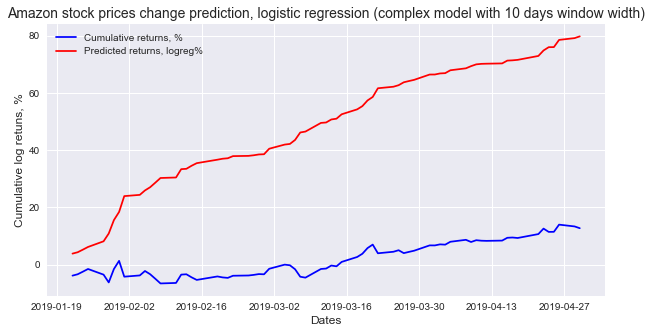

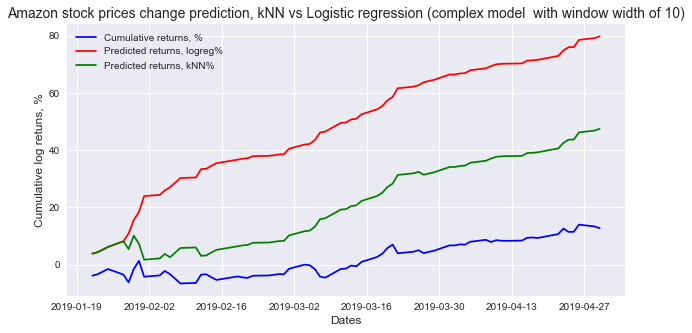

In [285]:
#Plot the results

plt.figure(figsize=(10,5))
plt.plot(amz_cumulative_returns_logreg_10d_full, color = 'b', label = 'Cumulative returns, %')
plt.plot(amz_predicted_returns_cum_logreg_10d_full, color = 'r', label = 'Predicted returns, logreg%')
plt.title('Amazon stock prices change prediction, logistic regression (complex model with 10 days window width)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()


#Plot the results

plt.figure(figsize=(10,5))
plt.plot(amz_cumulative_returns_logreg_10d_full, color = 'b', label = 'Cumulative returns, %')
plt.plot(amz_predicted_returns_cum_logreg_10d_full, color = 'r', label = 'Predicted returns, logreg%')
plt.plot(amz_predicted_returns_cum_10d_full, color = 'g', label = 'Predicted returns, kNN%')
plt.title('Amazon stock prices change prediction, kNN vs Logistic regression (complex model  with window width of 10)', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Cumulative log retuns, %', fontsize=12)
plt.legend()
plt.show()

We can see that kNN prediction curve is closer to cumulative log return curve than logistic regression's one

To conclude, let's look at performances of logistic regression

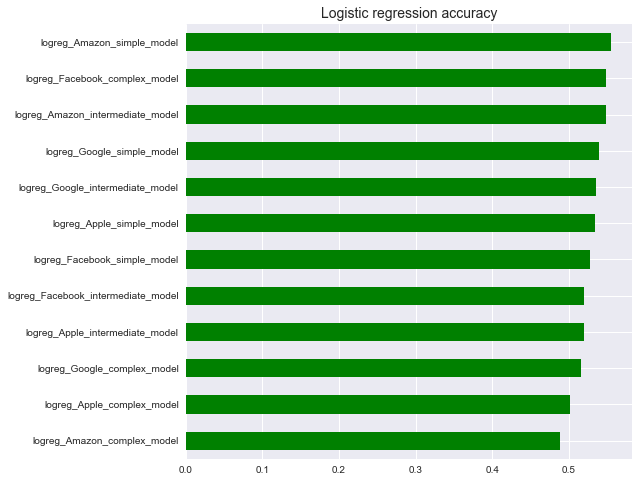

In [286]:
df_performance.sort_values(by='Model accuracy', ascending=False).head()
df_performance['Model accuracy'].sort_values().plot.barh(color='green').set_title('Logistic regression accuracy', fontsize=14);

If compare both classifiers, kNN seems to have better accuracies. 

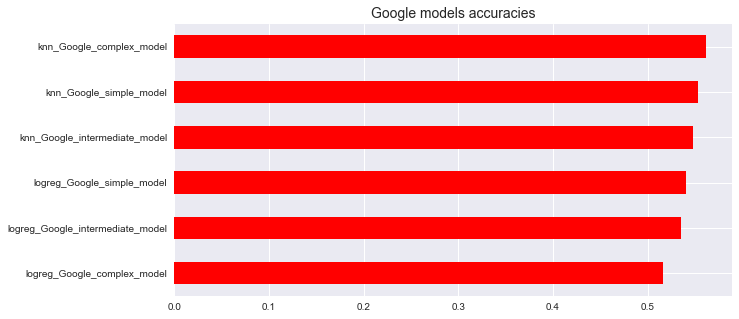

In [287]:
google_perf = pd.concat([df_performance[9:12], df_performance_knn[9:12]], axis=0)
google_perf
google_perf['Model accuracy'].sort_values().plot.barh(figsize=(10,5), color='red').set_title('Google models accuracies', fontsize=14);

Best model for Google is kNN on compex model

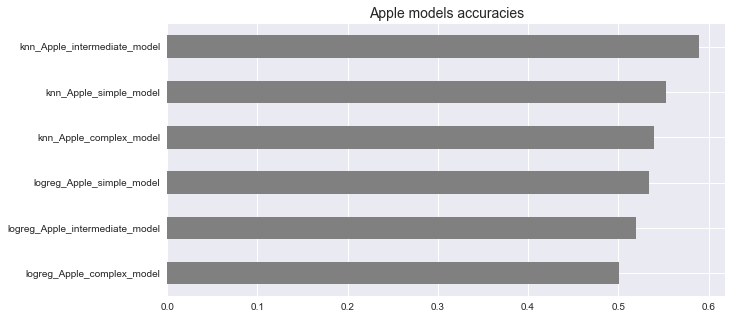

In [288]:
apple_perf = pd.concat([df_performance[3:6], df_performance_knn[3:6]], axis=0)
apple_perf
apple_perf['Model accuracy'].sort_values().plot.barh(figsize=(10,5), color='grey').set_title('Apple models accuracies', fontsize=14);

Best model for Apple is kNN on intermediate model

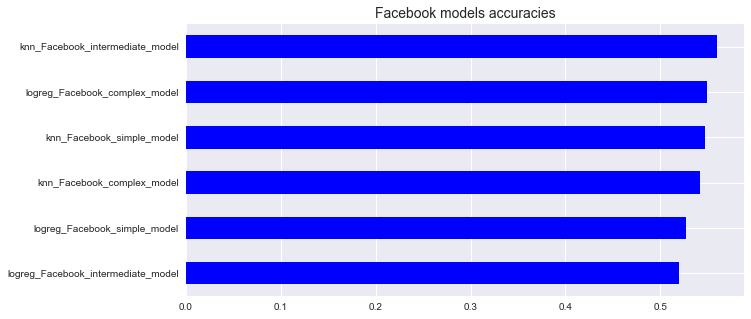

In [289]:
fb_perf = pd.concat([df_performance[6:9], df_performance_knn[6:9]], axis=0)
fb_perf
fb_perf['Model accuracy'].sort_values().plot.barh(figsize=(10,5), color='blue').set_title('Facebook models accuracies', fontsize=14);

Best model for Facebook is kNN on intermediate model

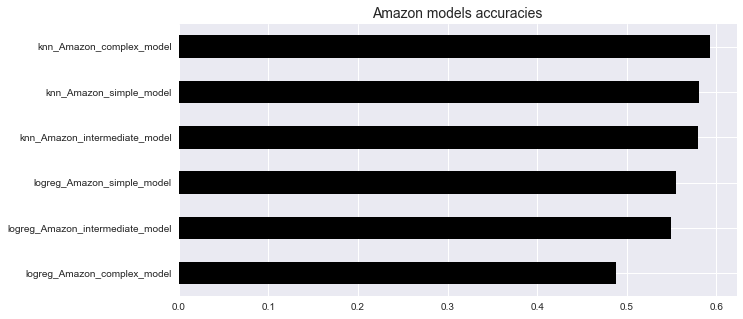

In [290]:
amazon_perf = pd.concat([df_performance[0:3], df_performance_knn[0:3]], axis=0)
amazon_perf
amazon_perf['Model accuracy'].sort_values().plot.barh(figsize=(10,5), color='black').set_title('Amazon models accuracies', fontsize=14);

Best model for Amazon is kNN on complex model


<img src ='GAFA.jpg'>
## Conclusion

This project was dedicated to stock prices analysis of ones of the  largest companies working in Internet and high technologies industry known as GAFA - Google, Apple, Facebook, Amazon.

In the exploratory part of the project it was analysed stock market performance during last 6 years (from 2013 till April 2019). To get a bigger view of a market performace main stock market indexes (S&P 500, Dow Jones and NASDAQ) were analysed as well. To understand better companies performance its market capitalisations were also taken into account.

The main conclusions made are that the stock prices data are very volatile. There are many periods of growth and decline, some of them are common, some are specific to one or another company. But for all companies as well as for indexes there is a constant trend of growth and there is no seasonality in its stock prices dynamics. Another important point worth to be mentioned is the impressive return on investments (ROI) especially for Facebook and Amazon which was at about 600% during analysed period.

As GAFA companies are operating in Internet and mobile industries  trends concerning internet and mobile users in the world in different regio were analysed as well. These data make part of data sets for predictive analysis.

In the second part of project focused on predictive analysis two estimators were fitted and evaluated
to predict stock price change. The approach used was a classification task, i.e. aimed to predict whether stock price will go up or down. KNN model and Logistic regression model were used to three variations of data sets for each of four companies: simple model based on data set with 5 days window width, intermediate model based on data set with 10 days window width and complex model fitted on data set including all variables analysed in project. As a main resul kNN estimator gave better result than logistics regression.

As a possible further step to this analysis it would be interesting to fit other estimators and to see how they will be performed. 
